In [1]:
import torchvision as tv
import torch as t
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show=ToPILImage()                         #Tensor转换为Image   利于后续可视化
transform=transforms.Compose([
    transforms.ToTensor(),                #图片转换为Tensor才能进行后续处理
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),         #括号1：RGB三通道均值  括号2：RGB三通道标准差
    #像素值new=（像素值old-平均值mean）/ 标准差std   
    #注意：0.5只是一个近似的操作，实际上其均值和方差并不是这么多，但是就这个示例而言 影响可不计
    #你用的是自己创建的数据集，从头训练，那最好还是要自己统计自己数据集的mean和std
    #平均值mean求法，所有图片每个像素点求和取均值
    ])
trainset=tv.datasets.CIFAR10(
    root='/media/n/SanDiskSSD/HardDisk/data/CIFAR10/cifar-10-python',
    #trainset testset共用torchvision.datasets.CIFAR10函数，区别在trainset的train为True
    train=True,                           
    download=False,
    transform=transform)

trainloader=t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,      #洗牌 打乱
    num_workers=1)

testset=tv.datasets.CIFAR10(
    root='/media/n/SanDiskSSD/HardDisk/data/CIFAR10/cifar-10-python',
    train=False,
    download=False,
    transform=transform)

testloader=t.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,    #测试集不用打乱  
    num_workers=1)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [2]:
(data,label)=trainset[0]
print(classes[label])

frog


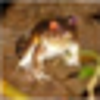

In [3]:
show((data+1)/2).resize((100,100))
##transforms.Normalize处理刚好将0～1转换为-1～+1,这里做复原

        cat      horse        cat        dog


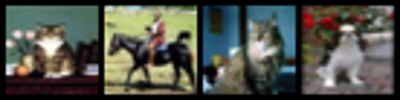

In [4]:
dataiter=iter(trainloader)   #iter()生成迭代器
images,labels=next(dataiter)
print(''.join('%11s'%classes[labels[j]] for j in range(4))) 
# %11s格式化输出，长度为11的字符串，%classes[labels[j]]为对应的变量名
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [5]:
a=[1,2,3]
b=iter(a)
###  python2中用*.next()  python3中要用next(*)  否则报错
#b.next()
next(b)


1

In [6]:
labels


tensor([3, 7, 3, 5])

In [7]:
images.size()


torch.Size([4, 3, 32, 32])

In [8]:
#定义模型
import torch.nn as nn
import torch.nn.functional as F
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(x.size()[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

net=LeNet()
print(net)     

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
from torch import optim
#定义损失函数
criterion=nn.CrossEntropyLoss()
#定义优化器
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
#定义网络
#流程：输入数据——>梯度清零——>正向传播/反向传播——>参数更新
for epoch in range(2):
    print('Training start')
    running_loss=0.0
    #enumerate() 函数用于将一个可遍历的数据对象(如列表、元组、字符串、迭代器或其他支持迭代对象)组合为一个索引序列，
    #同时列出数据和数据下标
    for i,data in enumerate(trainloader,0):  #0代表起始位置
        #输入数据
        inputs,labels=data
        #inputs,labels=Variable(inputs),Variable(labels)
        
        #梯度清零
        optimizer.zero_grad()
        #前向 反向传播
        outputs= net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        #参数更新
        optimizer.step()
        
        #打印log信息
        running_loss+=loss
        if i%2000 == 1999: #2000次iter(一次iter，一个batch，4张images）打印一次
            print('[%d,%5d] loss:%.3f'\
                 %(epoch+1,i+1,running_loss/2000))
            running_loss=0.0
print('Training finished')
        
                    

Training start
tensor([[ 0.0698, -0.0714,  0.0759, -0.0278,  0.0256,  0.0138, -0.0074,  0.0028,
          0.0361, -0.1027],
        [ 0.0720, -0.0791,  0.0707, -0.0230,  0.0178,  0.0099, -0.0022,  0.0016,
          0.0362, -0.0972],
        [ 0.0730, -0.0753,  0.0878, -0.0313,  0.0286,  0.0035, -0.0112,  0.0003,
          0.0276, -0.1002],
        [ 0.0707, -0.0580,  0.0620, -0.0245,  0.0112,  0.0201, -0.0083,  0.0182,
          0.0485, -0.0959]], grad_fn=<AddmmBackward>)
tensor([4, 9, 3, 8])
tensor([[ 0.0632, -0.0652,  0.0730, -0.0295,  0.0253,  0.0145, -0.0088,  0.0095,
          0.0384, -0.1020],
        [ 0.0589, -0.0579,  0.0555, -0.0268,  0.0105,  0.0086, -0.0105,  0.0194,
          0.0308, -0.0942],
        [ 0.0702, -0.0685,  0.0718, -0.0285,  0.0220,  0.0199, -0.0039,  0.0069,
          0.0449, -0.1056],
        [ 0.0708, -0.0719,  0.0725, -0.0218,  0.0145,  0.0147, -0.0092,  0.0046,
          0.0429, -0.0978]], grad_fn=<AddmmBackward>)
tensor([1, 3, 2, 9])
tensor([[ 0.0693, -

tensor([[ 0.0578, -0.0667,  0.0784, -0.0128,  0.0149,  0.0042, -0.0006, -0.0027,
          0.0328, -0.0833],
        [ 0.0495, -0.0580,  0.0795, -0.0175,  0.0228,  0.0193, -0.0176,  0.0005,
          0.0389, -0.0975],
        [ 0.0592, -0.0616,  0.0832, -0.0167,  0.0173,  0.0030, -0.0227, -0.0030,
          0.0273, -0.0929],
        [ 0.0502, -0.0608,  0.0810, -0.0192,  0.0216,  0.0165, -0.0083,  0.0012,
          0.0396, -0.0936]], grad_fn=<AddmmBackward>)
tensor([7, 8, 7, 2])
tensor([[ 0.0530, -0.0593,  0.0819, -0.0164,  0.0235,  0.0119,  0.0002, -0.0039,
          0.0336, -0.0933],
        [ 0.0591, -0.0528,  0.0725, -0.0151,  0.0004,  0.0118, -0.0033,  0.0153,
          0.0451, -0.0871],
        [ 0.0598, -0.0563,  0.0865, -0.0070,  0.0008,  0.0064, -0.0077,  0.0127,
          0.0192, -0.0853],
        [ 0.0531, -0.0538,  0.0722, -0.0144,  0.0070,  0.0146, -0.0105,  0.0070,
          0.0385, -0.0881]], grad_fn=<AddmmBackward>)
tensor([6, 5, 3, 6])
tensor([[ 0.0565, -0.0594,  0.0900

          0.0250, -0.0971]], grad_fn=<AddmmBackward>)
tensor([9, 6, 5, 6])
tensor([[ 0.0550, -0.0673,  0.1074, -0.0186,  0.0035, -0.0085,  0.0013,  0.0092,
          0.0221, -0.0809],
        [ 0.0433, -0.0517,  0.0877, -0.0157,  0.0092,  0.0148, -0.0134,  0.0093,
          0.0232, -0.0896],
        [ 0.0650, -0.0424,  0.0863, -0.0073, -0.0161,  0.0220, -0.0167,  0.0174,
          0.0392, -0.0870],
        [ 0.0498, -0.0436,  0.0866, -0.0122, -0.0067,  0.0211, -0.0133,  0.0149,
          0.0392, -0.0955]], grad_fn=<AddmmBackward>)
tensor([7, 2, 9, 5])
tensor([[ 4.2785e-02, -5.1324e-02,  8.6364e-02, -1.8769e-02,  7.5443e-03,
          1.0150e-02, -3.4691e-03,  1.3363e-02,  2.9362e-02, -9.1737e-02],
        [ 5.2569e-02, -4.3642e-02,  7.1439e-02, -1.4163e-02, -1.9774e-02,
          2.2399e-02, -1.4577e-02,  3.1864e-02,  2.9622e-02, -7.7571e-02],
        [ 3.3828e-02, -4.6439e-02,  8.2315e-02, -1.3849e-02,  1.9871e-03,
          1.4581e-02, -1.3007e-02,  1.4139e-02,  1.5761e-02, -9.1587e-

tensor([[ 0.0300, -0.0605,  0.0628, -0.0304, -0.0031,  0.0446,  0.0104,  0.0187,
          0.0458, -0.0607],
        [ 0.0311, -0.0612,  0.0627, -0.0311,  0.0030,  0.0395,  0.0042,  0.0138,
          0.0312, -0.0688],
        [ 0.0548, -0.0575,  0.0562, -0.0306, -0.0316,  0.0368,  0.0054,  0.0394,
          0.0436, -0.0499],
        [ 0.0414, -0.0650,  0.0628, -0.0344, -0.0101,  0.0258,  0.0040,  0.0171,
          0.0300, -0.0571]], grad_fn=<AddmmBackward>)
tensor([3, 4, 0, 7])
tensor([[ 0.0364, -0.0641,  0.0643, -0.0344,  0.0038,  0.0385,  0.0088,  0.0064,
          0.0328, -0.0658],
        [ 0.0363, -0.0664,  0.0618, -0.0319, -0.0050,  0.0304,  0.0127,  0.0170,
          0.0251, -0.0563],
        [ 0.0469, -0.0693,  0.0541, -0.0419, -0.0054,  0.0390,  0.0079,  0.0247,
          0.0392, -0.0521],
        [ 0.0506, -0.0799,  0.0509, -0.0342, -0.0114,  0.0171,  0.0262,  0.0240,
          0.0294, -0.0443]], grad_fn=<AddmmBackward>)
tensor([7, 7, 8, 3])
tensor([[ 0.0573, -0.0663,  0.0432

tensor([[ 0.0594, -0.0798,  0.0504, -0.0325, -0.0312,  0.0360,  0.0173,  0.0155,
          0.0439, -0.0412],
        [ 0.0509, -0.0771,  0.0606, -0.0240, -0.0221,  0.0482,  0.0235,  0.0111,
          0.0496, -0.0535],
        [ 0.0381, -0.0758,  0.0703, -0.0295, -0.0041,  0.0377,  0.0113, -0.0038,
          0.0315, -0.0604],
        [ 0.0374, -0.0762,  0.0706, -0.0362,  0.0036,  0.0323,  0.0265, -0.0060,
          0.0456, -0.0597]], grad_fn=<AddmmBackward>)
tensor([8, 5, 2, 0])
tensor([[ 0.0373, -0.0691,  0.0611, -0.0285, -0.0117,  0.0419,  0.0245,  0.0039,
          0.0501, -0.0567],
        [ 0.0501, -0.0741,  0.0765, -0.0254, -0.0154,  0.0360,  0.0113,  0.0012,
          0.0148, -0.0565],
        [ 0.0463, -0.0712,  0.0626, -0.0209, -0.0214,  0.0414,  0.0155,  0.0191,
          0.0320, -0.0458],
        [ 0.0384, -0.0697,  0.0488, -0.0241, -0.0289,  0.0354,  0.0277,  0.0105,
          0.0322, -0.0419]], grad_fn=<AddmmBackward>)
tensor([5, 5, 3, 9])
tensor([[ 0.0346, -0.0722,  0.0671

tensor([[ 2.6056e-02, -6.1707e-02,  2.9173e-02, -2.3966e-02, -3.7561e-02,
          5.1073e-02,  5.0205e-03,  1.6905e-02,  3.8781e-02, -2.8626e-02],
        [ 2.2787e-02, -5.4508e-02,  3.9665e-02, -2.7390e-02, -2.2048e-02,
          6.4465e-02,  1.3699e-02,  1.5100e-02,  6.3241e-02, -5.2671e-02],
        [ 2.8437e-02, -6.3092e-02,  3.6087e-02, -3.4574e-02, -2.8503e-02,
          6.1524e-02,  1.3457e-02, -2.8722e-06,  6.1329e-02, -5.0559e-02],
        [ 3.4592e-02, -5.8362e-02,  2.9936e-02, -1.9801e-02, -4.0443e-02,
          5.0314e-02,  3.6095e-03,  1.7322e-02,  4.0226e-02, -2.8334e-02]],
       grad_fn=<AddmmBackward>)
tensor([0, 2, 0, 7])
tensor([[ 0.0249, -0.0693,  0.0438, -0.0261, -0.0164,  0.0631,  0.0091,  0.0044,
          0.0436, -0.0489],
        [ 0.0388, -0.0635,  0.0276, -0.0292, -0.0373,  0.0522,  0.0108,  0.0175,
          0.0542, -0.0382],
        [ 0.0173, -0.0553,  0.0372, -0.0181, -0.0249,  0.0680,  0.0074,  0.0072,
          0.0503, -0.0542],
        [ 0.0298, -0.05

tensor([[ 0.0182, -0.0523,  0.0437, -0.0342, -0.0092,  0.0688,  0.0031,  0.0016,
          0.0636, -0.0516],
        [ 0.0267, -0.0640,  0.0441, -0.0319, -0.0137,  0.0722, -0.0044,  0.0048,
          0.0617, -0.0466],
        [ 0.0311, -0.0592,  0.0446, -0.0569, -0.0062,  0.0703, -0.0020,  0.0105,
          0.0822, -0.0294],
        [ 0.0397, -0.0745,  0.0304, -0.0338, -0.0292,  0.0589, -0.0097,  0.0179,
          0.0593, -0.0221]], grad_fn=<AddmmBackward>)
tensor([4, 7, 1, 9])
tensor([[ 1.6915e-02, -5.8183e-02,  4.7025e-02, -4.1442e-02,  3.9708e-04,
          6.7343e-02, -1.4815e-03, -6.0279e-03,  6.3074e-02, -5.0588e-02],
        [ 3.9234e-02, -5.2200e-02,  4.3651e-02, -3.9196e-02, -3.8168e-02,
          6.1889e-02, -1.0076e-02,  2.9401e-02,  5.6693e-02, -2.4186e-02],
        [ 2.3382e-02, -5.4118e-02,  3.4918e-02, -3.4388e-02, -1.7420e-02,
          7.4781e-02,  3.2263e-03,  9.4861e-05,  7.0543e-02, -4.8391e-02],
        [ 4.7267e-02, -6.3694e-02,  3.6571e-02, -3.0554e-02, -5.0575e-

tensor([[ 0.0097, -0.0474,  0.0405, -0.0487,  0.0009,  0.0813,  0.0177, -0.0012,
          0.0645, -0.0535],
        [ 0.0052, -0.0469,  0.0400, -0.0426, -0.0071,  0.0733,  0.0107, -0.0017,
          0.0479, -0.0547],
        [ 0.0113, -0.0479,  0.0553, -0.0471, -0.0040,  0.0626,  0.0177, -0.0015,
          0.0413, -0.0452],
        [ 0.0132, -0.0573,  0.0494, -0.0462, -0.0009,  0.0677,  0.0099, -0.0052,
          0.0445, -0.0486]], grad_fn=<AddmmBackward>)
tensor([5, 0, 1, 2])
tensor([[ 0.0082, -0.0542,  0.0489, -0.0454,  0.0013,  0.0647,  0.0144, -0.0077,
          0.0393, -0.0446],
        [ 0.0086, -0.0530,  0.0423, -0.0457,  0.0006,  0.0740,  0.0125, -0.0040,
          0.0424, -0.0553],
        [ 0.0100, -0.0549,  0.0477, -0.0483,  0.0021,  0.0723,  0.0108, -0.0104,
          0.0450, -0.0513],
        [ 0.0215, -0.0443,  0.0545, -0.0456, -0.0131,  0.0829,  0.0157,  0.0006,
          0.0645, -0.0494]], grad_fn=<AddmmBackward>)
tensor([1, 7, 2, 6])
tensor([[ 0.0107, -0.0480,  0.0417

tensor([[ 0.0126, -0.0380,  0.0284, -0.0428, -0.0178,  0.0723,  0.0254,  0.0138,
          0.0349, -0.0475],
        [ 0.0141, -0.0440,  0.0283, -0.0427, -0.0156,  0.0704,  0.0237,  0.0112,
          0.0321, -0.0442],
        [ 0.0103, -0.0365,  0.0369, -0.0378, -0.0291,  0.0675,  0.0161,  0.0185,
          0.0231, -0.0398],
        [ 0.0059, -0.0361,  0.0301, -0.0358, -0.0314,  0.0667,  0.0245,  0.0282,
          0.0188, -0.0382]], grad_fn=<AddmmBackward>)
tensor([4, 4, 7, 5])
tensor([[ 0.0116, -0.0364,  0.0182, -0.0364, -0.0330,  0.0656,  0.0287,  0.0206,
          0.0320, -0.0346],
        [ 0.0168, -0.0366,  0.0249, -0.0449, -0.0259,  0.0675,  0.0215,  0.0294,
          0.0357, -0.0369],
        [ 0.0335, -0.0431,  0.0097, -0.0343, -0.0557,  0.0802,  0.0231,  0.0433,
          0.0407, -0.0244],
        [ 0.0078, -0.0405,  0.0213, -0.0350, -0.0343,  0.0672,  0.0278,  0.0195,
          0.0240, -0.0346]], grad_fn=<AddmmBackward>)
tensor([2, 4, 8, 3])
tensor([[ 0.0187, -0.0409,  0.0123

tensor([[ 0.0372, -0.0286, -0.0193, -0.0137, -0.0544,  0.0706,  0.0174,  0.0340,
         -0.0073, -0.0020],
        [ 0.0359, -0.0244,  0.0005, -0.0225, -0.0315,  0.0932,  0.0248,  0.0242,
          0.0171, -0.0231],
        [ 0.0198, -0.0122,  0.0022, -0.0203, -0.0264,  0.0818,  0.0141,  0.0296,
         -0.0012, -0.0276],
        [ 0.0296, -0.0237, -0.0025, -0.0202, -0.0359,  0.0869,  0.0173,  0.0267,
          0.0032, -0.0243]], grad_fn=<AddmmBackward>)
tensor([0, 1, 6, 2])
tensor([[ 0.0167, -0.0273,  0.0054, -0.0211, -0.0280,  0.0821,  0.0216,  0.0178,
         -0.0102, -0.0214],
        [ 0.0516, -0.0323, -0.0173, -0.0202, -0.0696,  0.0590,  0.0043,  0.0433,
         -0.0018,  0.0172],
        [ 0.0141, -0.0151, -0.0082, -0.0139, -0.0324,  0.0734,  0.0177,  0.0327,
         -0.0159, -0.0132],
        [ 0.0453, -0.0218, -0.0034, -0.0149, -0.0442,  0.0810,  0.0192,  0.0300,
          0.0100, -0.0198]], grad_fn=<AddmmBackward>)
tensor([3, 8, 7, 6])
tensor([[ 0.0345, -0.0292, -0.0010

tensor([[ 0.0410, -0.0131, -0.0064, -0.0278, -0.0212,  0.0695,  0.0136,  0.0206,
          0.0077, -0.0262],
        [ 0.0436, -0.0195, -0.0087, -0.0347, -0.0333,  0.0581,  0.0102,  0.0264,
          0.0032, -0.0167],
        [ 0.0534, -0.0098, -0.0113, -0.0132, -0.0497,  0.0702, -0.0039,  0.0334,
          0.0051, -0.0206],
        [ 0.0377, -0.0202, -0.0023, -0.0310, -0.0147,  0.0696,  0.0082,  0.0103,
          0.0088, -0.0327]], grad_fn=<AddmmBackward>)
tensor([0, 9, 0, 8])
tensor([[ 0.0375, -0.0109,  0.0159, -0.0310, -0.0171,  0.0754,  0.0040,  0.0157,
          0.0199, -0.0363],
        [ 0.0506, -0.0124, -0.0121, -0.0176, -0.0398,  0.0822,  0.0053,  0.0342,
          0.0097, -0.0222],
        [ 0.0569, -0.0215, -0.0145, -0.0340, -0.0424,  0.0540,  0.0035,  0.0313,
          0.0067, -0.0009],
        [ 0.0294, -0.0051, -0.0017, -0.0118, -0.0279,  0.0748,  0.0195,  0.0250,
         -0.0032, -0.0319]], grad_fn=<AddmmBackward>)
tensor([7, 5, 8, 3])
tensor([[ 0.0182, -0.0074,  0.0040

tensor([[ 0.0320, -0.0087,  0.0024, -0.0350, -0.0293,  0.0757,  0.0132,  0.0156,
          0.0213, -0.0410],
        [ 0.0284, -0.0059,  0.0071, -0.0337, -0.0350,  0.0809,  0.0153,  0.0279,
          0.0230, -0.0370],
        [ 0.0523, -0.0119,  0.0051, -0.0360, -0.0533,  0.0852, -0.0012,  0.0359,
          0.0383, -0.0329],
        [ 0.0132,  0.0080, -0.0033, -0.0103, -0.0458,  0.0665,  0.0140,  0.0383,
         -0.0054, -0.0265]], grad_fn=<AddmmBackward>)
tensor([2, 3, 0, 1])
tensor([[ 0.0157, -0.0096, -0.0005, -0.0236, -0.0240,  0.0748,  0.0214,  0.0200,
         -0.0017, -0.0290],
        [ 0.0451, -0.0073,  0.0035, -0.0318, -0.0491,  0.0815,  0.0057,  0.0265,
          0.0311, -0.0403],
        [ 0.0410,  0.0001,  0.0031, -0.0216, -0.0402,  0.0874,  0.0094,  0.0254,
          0.0371, -0.0446],
        [ 0.0227,  0.0015, -0.0085, -0.0314, -0.0392,  0.0761,  0.0140,  0.0335,
          0.0115, -0.0252]], grad_fn=<AddmmBackward>)
tensor([6, 0, 6, 9])
tensor([[ 0.0196, -0.0039,  0.0070

tensor([[ 0.0467, -0.0160,  0.0198, -0.0299, -0.0410,  0.0640,  0.0022,  0.0264,
          0.0055,  0.0029],
        [ 0.0822, -0.0219,  0.0159, -0.0010, -0.0822,  0.0719, -0.0084,  0.0406,
          0.0029,  0.0037],
        [ 0.0643, -0.0265,  0.0200, -0.0212, -0.0505,  0.0623, -0.0046,  0.0192,
          0.0163, -0.0144],
        [ 0.0250, -0.0233,  0.0095, -0.0215, -0.0349,  0.0578,  0.0201,  0.0184,
         -0.0103, -0.0083]], grad_fn=<AddmmBackward>)
tensor([1, 5, 8, 9])
tensor([[ 0.0353, -0.0343,  0.0109, -0.0268, -0.0374,  0.0577,  0.0120,  0.0186,
         -0.0124, -0.0023],
        [ 0.0241, -0.0209,  0.0259, -0.0131, -0.0305,  0.0655,  0.0155,  0.0163,
         -0.0135, -0.0138],
        [ 0.0471, -0.0205,  0.0240, -0.0172, -0.0435,  0.0725,  0.0053,  0.0183,
          0.0016, -0.0119],
        [ 0.0105, -0.0195,  0.0310, -0.0125, -0.0220,  0.0497,  0.0154,  0.0130,
         -0.0398, -0.0038]], grad_fn=<AddmmBackward>)
tensor([2, 1, 5, 8])
tensor([[ 2.9509e-02, -2.3860e-02,

tensor([[ 0.0364, -0.0161,  0.0192, -0.0062, -0.0499,  0.0723, -0.0064,  0.0302,
         -0.0318,  0.0109],
        [ 0.0530, -0.0260,  0.0121, -0.0204, -0.0380,  0.0848, -0.0047,  0.0174,
         -0.0033, -0.0227],
        [ 0.0536, -0.0132,  0.0104, -0.0191, -0.0516,  0.0682, -0.0122,  0.0252,
         -0.0214,  0.0003],
        [ 0.0630, -0.0261,  0.0142, -0.0158, -0.0569,  0.0805, -0.0116,  0.0227,
         -0.0050, -0.0253]], grad_fn=<AddmmBackward>)
tensor([4, 5, 9, 4])
tensor([[ 0.0991, -0.0309, -0.0060, -0.0169, -0.1014,  0.0614, -0.0232,  0.0508,
         -0.0262,  0.0445],
        [ 0.0403, -0.0144,  0.0111, -0.0195, -0.0331,  0.0925,  0.0081,  0.0283,
         -0.0065, -0.0103],
        [ 0.0716, -0.0161,  0.0207, -0.0191, -0.0617,  0.0995, -0.0192,  0.0311,
          0.0127, -0.0035],
        [ 0.0494, -0.0150,  0.0232, -0.0279, -0.0538,  0.0834, -0.0197,  0.0263,
         -0.0041,  0.0020]], grad_fn=<AddmmBackward>)
tensor([7, 8, 7, 1])
tensor([[ 0.0476, -0.0152,  0.0047

tensor([[ 0.0688, -0.0185,  0.0321, -0.0263, -0.0591,  0.0967, -0.0295,  0.0326,
          0.0253, -0.0317],
        [ 0.0945, -0.0249,  0.0373, -0.0182, -0.0825,  0.1065, -0.0356,  0.0403,
          0.0222, -0.0354],
        [ 0.1138, -0.0275,  0.0141, -0.0234, -0.0953,  0.0829, -0.0416,  0.0531,
          0.0323, -0.0124],
        [ 0.0779, -0.0330,  0.0230, -0.0095, -0.0813,  0.0954, -0.0290,  0.0433,
         -0.0107, -0.0055]], grad_fn=<AddmmBackward>)
tensor([0, 5, 8, 7])
tensor([[ 0.0670, -0.0219,  0.0371, -0.0246, -0.0576,  0.0938, -0.0290,  0.0311,
          0.0114, -0.0345],
        [ 0.1431, -0.0364, -0.0058, -0.0143, -0.1419,  0.0851, -0.0607,  0.0876,
          0.0238,  0.0146],
        [ 0.0681, -0.0170,  0.0291, -0.0242, -0.0780,  0.0733, -0.0468,  0.0552,
         -0.0198,  0.0012],
        [ 0.0891, -0.0292,  0.0282, -0.0170, -0.0981,  0.0801, -0.0336,  0.0669,
         -0.0014, -0.0134]], grad_fn=<AddmmBackward>)
tensor([2, 7, 5, 5])
tensor([[ 0.0610, -0.0221,  0.0291

tensor([3, 3, 3, 8])
tensor([[ 0.2035, -0.0541, -0.0094, -0.0259, -0.1902,  0.1354, -0.1018,  0.1003,
          0.0720,  0.0258],
        [ 0.0656, -0.0265,  0.0409, -0.0284, -0.0660,  0.1203, -0.0271,  0.0264,
          0.0010, -0.0430],
        [ 0.0505, -0.0061,  0.0464, -0.0248, -0.0718,  0.1166, -0.0298,  0.0351,
         -0.0168, -0.0313],
        [ 0.1569, -0.0355,  0.0395, -0.0059, -0.1522,  0.1356, -0.0650,  0.0609,
          0.0275, -0.0218]], grad_fn=<AddmmBackward>)
tensor([0, 2, 3, 5])
tensor([[ 0.1506, -0.0317,  0.0375, -0.0139, -0.1496,  0.1518, -0.0794,  0.0737,
          0.0508, -0.0279],
        [ 0.0871, -0.0309,  0.0294, -0.0309, -0.0906,  0.1234, -0.0354,  0.0379,
          0.0168, -0.0284],
        [ 0.0967, -0.0207,  0.0331, -0.0124, -0.1054,  0.1326, -0.0489,  0.0344,
          0.0105, -0.0296],
        [ 0.0869, -0.0269,  0.0261, -0.0247, -0.0958,  0.1236, -0.0349,  0.0378,
          0.0163, -0.0372]], grad_fn=<AddmmBackward>)
tensor([5, 4, 5, 7])
tensor([[ 0.0

tensor([[ 0.0846, -0.0424,  0.0546, -0.0318, -0.0813,  0.1029, -0.0274,  0.0002,
          0.0164, -0.0383],
        [ 0.0723, -0.0239,  0.0593, -0.0243, -0.0845,  0.1105, -0.0388,  0.0116,
          0.0192, -0.0380],
        [ 0.1470, -0.0447,  0.0379, -0.0167, -0.1338,  0.1143, -0.0624,  0.0297,
          0.0616, -0.0306],
        [ 0.1718, -0.0579,  0.0342, -0.0274, -0.1416,  0.1197, -0.0788,  0.0348,
          0.0810, -0.0255]], grad_fn=<AddmmBackward>)
tensor([2, 1, 0, 0])
tensor([[ 8.3800e-02, -3.6378e-02,  6.1829e-02, -1.8953e-02, -7.5203e-02,
          1.1725e-01, -4.0241e-02, -1.1602e-04,  2.5617e-02, -5.9216e-02],
        [ 8.2132e-02, -3.3262e-02,  5.9739e-02, -1.2785e-02, -9.0685e-02,
          1.0901e-01, -2.9134e-02,  8.1564e-03,  8.1827e-03, -5.2204e-02],
        [ 1.2321e-01, -2.5627e-02,  6.0715e-02, -2.7917e-02, -1.0297e-01,
          1.3388e-01, -6.0449e-02,  6.6365e-03,  6.5855e-02, -3.7189e-02],
        [ 9.3231e-02, -2.4121e-02,  5.5708e-02, -1.3842e-02, -1.0483e-

tensor([[ 0.1521, -0.0818,  0.0381, -0.0413, -0.1339,  0.0732, -0.0349, -0.0049,
          0.0803,  0.0198],
        [ 0.2376, -0.1011,  0.0095, -0.0319, -0.2056,  0.1107, -0.0965,  0.0392,
          0.1434,  0.0277],
        [ 0.1158, -0.0627,  0.0326, -0.0367, -0.1074,  0.0702, -0.0289,  0.0030,
          0.0652,  0.0112],
        [ 0.1005, -0.0469,  0.0403, -0.0343, -0.1063,  0.0680, -0.0355, -0.0122,
          0.0594,  0.0250]], grad_fn=<AddmmBackward>)
tensor([7, 5, 4, 9])
tensor([[ 0.0647, -0.0539,  0.0578, -0.0113, -0.0787,  0.0886,  0.0088, -0.0148,
          0.0151,  0.0001],
        [ 0.0645, -0.0556,  0.0701, -0.0126, -0.0728,  0.0968, -0.0102, -0.0088,
          0.0192, -0.0024],
        [ 0.0668, -0.0499,  0.0606, -0.0186, -0.0750,  0.0998, -0.0073, -0.0120,
          0.0361, -0.0298],
        [ 0.0288, -0.0506,  0.0746, -0.0244, -0.0447,  0.0764,  0.0093, -0.0219,
         -0.0141, -0.0233]], grad_fn=<AddmmBackward>)
tensor([1, 6, 5, 6])
tensor([[ 0.0423, -0.0517,  0.0719

tensor([5, 2, 9, 8])
tensor([[ 0.0458, -0.0471,  0.0477, -0.0427, -0.0554,  0.0401,  0.0399, -0.0241,
         -0.0076,  0.0161],
        [ 0.2516, -0.0992, -0.0034, -0.0442, -0.1996,  0.1204, -0.0898,  0.0405,
          0.1262,  0.0433],
        [ 0.0550, -0.0506,  0.0545, -0.0425, -0.0513,  0.0659,  0.0317, -0.0220,
          0.0018, -0.0024],
        [ 0.0537, -0.0622,  0.0551, -0.0501, -0.0316,  0.0648,  0.0365, -0.0364,
          0.0118, -0.0233]], grad_fn=<AddmmBackward>)
tensor([1, 0, 5, 8])
tensor([[ 0.2399, -0.0900,  0.0120, -0.0462, -0.2034,  0.1356, -0.1059,  0.0332,
          0.1229,  0.0356],
        [ 0.0260, -0.0511,  0.0721, -0.0454, -0.0155,  0.0522,  0.0461, -0.0362,
         -0.0286, -0.0116],
        [ 0.1771, -0.0719,  0.0117, -0.0621, -0.1231,  0.0770, -0.0467,  0.0016,
          0.1032,  0.0320],
        [ 0.0065, -0.0445,  0.0938, -0.0357, -0.0203,  0.0305,  0.0493, -0.0361,
         -0.0745,  0.0111]], grad_fn=<AddmmBackward>)
tensor([5, 6, 0, 7])
tensor([[ 0.0

tensor([2, 6, 8, 6])
tensor([[ 0.0298, -0.0142,  0.0706, -0.0556, -0.0168,  0.0359,  0.0141, -0.0087,
          0.0036, -0.0180],
        [ 0.1037, -0.0381,  0.0052, -0.0613, -0.1014,  0.0098, -0.0089,  0.0174,
          0.0370,  0.0775],
        [ 0.0749, -0.0314,  0.0744, -0.0290, -0.0784,  0.0698, -0.0041,  0.0206,
         -0.0149, -0.0251],
        [ 0.0047, -0.0172,  0.0631, -0.0350, -0.0313,  0.0445,  0.0334,  0.0043,
         -0.0424, -0.0089]], grad_fn=<AddmmBackward>)
tensor([9, 8, 7, 7])
tensor([[ 2.0703e-01, -5.5963e-02, -4.7503e-03, -6.9867e-02, -1.6676e-01,
          7.8693e-02, -1.0499e-01,  5.9183e-02,  1.4595e-01,  2.3001e-02],
        [ 1.1292e-01, -3.7625e-02,  3.2804e-02, -3.9448e-02, -1.0544e-01,
          7.6752e-02, -3.9079e-02,  4.2390e-02,  4.1611e-02, -9.5490e-05],
        [ 2.2448e-01, -4.8724e-02, -1.8447e-02, -3.8629e-02, -2.0935e-01,
          1.1996e-01, -1.1910e-01,  7.1741e-02,  1.2648e-01,  3.8051e-02],
        [ 1.2313e-01, -3.4879e-02,  4.4672e-03, -

tensor([[ 0.0459, -0.0152,  0.0454, -0.0654, -0.0532,  0.0073,  0.0209, -0.0055,
         -0.0068,  0.0374],
        [ 0.2866, -0.0448, -0.0176, -0.0931, -0.2142,  0.0610, -0.1683,  0.0656,
          0.1918,  0.0620],
        [ 0.1987, -0.0071, -0.0034, -0.0872, -0.1723, -0.0034, -0.1006,  0.0394,
          0.1286,  0.1144],
        [ 0.4283, -0.0614, -0.1050, -0.0959, -0.3541,  0.1114, -0.2709,  0.1209,
          0.3027,  0.1353]], grad_fn=<AddmmBackward>)
tensor([8, 0, 8, 0])
tensor([[ 0.0073, -0.0042,  0.0791, -0.0432, -0.0245,  0.0439,  0.0346, -0.0207,
         -0.0365, -0.0020],
        [ 0.2179, -0.0229, -0.0050, -0.0578, -0.2211,  0.0089, -0.0856,  0.0659,
          0.0976,  0.1058],
        [ 0.0346, -0.0003,  0.0260, -0.0692, -0.0530, -0.0288,  0.0286, -0.0033,
         -0.0147,  0.0800],
        [ 0.2360, -0.0294,  0.0060, -0.0537, -0.1974,  0.1006, -0.1333,  0.0412,
          0.1517,  0.0161]], grad_fn=<AddmmBackward>)
tensor([3, 0, 9, 8])
tensor([[ 0.0868, -0.0071,  0.0737

tensor([[-0.0914,  0.0099,  0.0667, -0.0609,  0.0443, -0.0393,  0.0934, -0.0487,
         -0.1030,  0.0791],
        [-0.0278, -0.0026,  0.0335, -0.0669, -0.0019, -0.0442,  0.0506, -0.0277,
         -0.0745,  0.1063],
        [ 0.0049,  0.0035,  0.0602, -0.0653, -0.0097,  0.0100,  0.0269, -0.0275,
         -0.0410,  0.0714],
        [ 0.2774, -0.0291, -0.0800, -0.0875, -0.2319, -0.0005, -0.1399,  0.0406,
          0.2062,  0.1862]], grad_fn=<AddmmBackward>)
tensor([9, 2, 9, 8])
tensor([[ 0.2587, -0.0196, -0.1267, -0.0743, -0.2602, -0.0334, -0.1011,  0.0583,
          0.1760,  0.2584],
        [ 0.0587,  0.0077, -0.0105, -0.0352, -0.1092, -0.0212,  0.0128,  0.0147,
         -0.0254,  0.1424],
        [-0.0416,  0.0208,  0.0227, -0.0626, -0.0098, -0.1076,  0.0594, -0.0310,
         -0.0738,  0.1604],
        [ 0.1466, -0.0386, -0.0263, -0.0565, -0.1467, -0.0094, -0.0067,  0.0114,
          0.0501,  0.1598]], grad_fn=<AddmmBackward>)
tensor([1, 1, 9, 0])
tensor([[-0.1349,  0.0146,  0.0894

tensor([3, 5, 6, 0])
tensor([[ 0.0890, -0.0369, -0.0563, -0.0663, -0.1232, -0.0547,  0.0942, -0.0139,
         -0.0499,  0.2330],
        [ 0.0448,  0.0088, -0.0288, -0.0711, -0.0646, -0.0082,  0.0467, -0.0412,
         -0.0023,  0.1587],
        [ 0.2708, -0.0198, -0.1867, -0.0842, -0.2969, -0.0504, -0.0256,  0.0311,
          0.0832,  0.3625],
        [ 0.2622, -0.0040, -0.1581, -0.0937, -0.2448,  0.0180, -0.0859,  0.0179,
          0.1732,  0.2769]], grad_fn=<AddmmBackward>)
tensor([3, 1, 6, 9])
tensor([[-0.1798,  0.0320,  0.0228, -0.0308,  0.1103, -0.1442,  0.2818, -0.0995,
         -0.2452,  0.2633],
        [ 0.3896,  0.0033, -0.2094, -0.0629, -0.3587,  0.0767, -0.1499,  0.0484,
          0.2486,  0.2902],
        [-0.0023, -0.0043, -0.0011, -0.0450, -0.0286,  0.0303,  0.1039, -0.0233,
         -0.0928,  0.1333],
        [-0.2143,  0.0237,  0.0667, -0.0243,  0.1507, -0.0903,  0.3024, -0.0978,
         -0.2387,  0.1317]], grad_fn=<AddmmBackward>)
tensor([7, 1, 6, 6])
tensor([[-0.1

tensor([[ 0.3817, -0.0246, -0.2823, -0.1158, -0.3998,  0.0074, -0.1537,  0.0463,
          0.3636,  0.3586],
        [ 0.8846, -0.1049, -0.5252, -0.1610, -0.7571,  0.3348, -0.5287,  0.1253,
          0.8522,  0.2928],
        [-0.1182,  0.0067,  0.0118, -0.0573,  0.0550, -0.0619,  0.1821, -0.0445,
         -0.1091,  0.1110],
        [-0.0632,  0.0151, -0.0677, -0.0388, -0.0589, -0.0797,  0.1881, -0.0320,
         -0.1055,  0.2447]], grad_fn=<AddmmBackward>)
tensor([7, 8, 3, 7])
tensor([[-0.2820,  0.0466,  0.0700, -0.0108,  0.1754, -0.0752,  0.2995, -0.0672,
         -0.2040,  0.1060],
        [ 0.3969, -0.0122, -0.2453, -0.1257, -0.3476,  0.0910, -0.2395,  0.0573,
          0.4179,  0.2282],
        [-0.1194,  0.0136,  0.0172, -0.0677,  0.0745, -0.0506,  0.1777, -0.0317,
         -0.1162,  0.0966],
        [ 0.1500,  0.0113, -0.1065, -0.0862, -0.1789,  0.0587, -0.0766,  0.0154,
          0.1824,  0.1747]], grad_fn=<AddmmBackward>)
tensor([2, 8, 4, 0])
tensor([[-3.9564e-01,  8.2074e-02,

tensor([9, 9, 8, 3])
tensor([[-0.4451,  0.0781,  0.1222,  0.0859,  0.2532, -0.1471,  0.3933, -0.0237,
         -0.3407,  0.1477],
        [-0.2944,  0.0387,  0.0792,  0.0534,  0.1408, -0.0712,  0.2653, -0.0027,
         -0.2214,  0.0820],
        [ 0.5694, -0.0195, -0.4228, -0.1554, -0.5595,  0.2421, -0.5938,  0.2901,
          0.8392,  0.2284],
        [-0.3078,  0.0296,  0.1017,  0.0243,  0.1840, -0.0943,  0.2717, -0.0289,
         -0.2414,  0.0832]], grad_fn=<AddmmBackward>)
tensor([3, 3, 9, 4])
tensor([[-0.0716,  0.0063,  0.0085,  0.0449, -0.0734,  0.0564,  0.0918,  0.0680,
         -0.0812,  0.0586],
        [-0.2910,  0.0439,  0.0594,  0.0414,  0.1247, -0.0929,  0.2310,  0.0099,
         -0.2085,  0.1259],
        [ 0.0388, -0.0040, -0.1042, -0.0155, -0.1455,  0.0290, -0.0091,  0.1003,
          0.1055,  0.1795],
        [ 0.0217,  0.0564, -0.1095, -0.0477, -0.1444,  0.0319, -0.0873,  0.1079,
          0.1551,  0.1644]], grad_fn=<AddmmBackward>)
tensor([6, 1, 3, 3])
tensor([[-0.0

tensor([7, 1, 8, 3])
tensor([[ 0.1689,  0.0172, -0.3426, -0.0692, -0.3348, -0.1612, -0.2426,  0.3142,
          0.2891,  0.5033],
        [-0.4538,  0.1085, -0.0602,  0.1615,  0.1072, -0.1529,  0.3691,  0.1419,
         -0.3715,  0.2825],
        [-0.0873,  0.0778, -0.2665,  0.0505, -0.2019, -0.1667,  0.0171,  0.3278,
         -0.0222,  0.5326],
        [-0.2607,  0.0307,  0.0170,  0.0543,  0.0784, -0.0417,  0.2349,  0.0528,
         -0.1956,  0.0899]], grad_fn=<AddmmBackward>)
tensor([3, 3, 7, 6])
tensor([[ 0.7276,  0.0144, -0.6174, -0.1514, -0.6812,  0.1135, -0.7964,  0.4756,
          0.9733,  0.4300],
        [ 0.2824,  0.0397, -0.3566, -0.0977, -0.3542, -0.0651, -0.3585,  0.2878,
          0.4642,  0.3791],
        [-0.3901,  0.1245, -0.0512,  0.1172,  0.1015, -0.0730,  0.2907,  0.0923,
         -0.2236,  0.1588],
        [ 0.2195,  0.0639, -0.3856, -0.0841, -0.3670, -0.1408, -0.3161,  0.3313,
          0.3710,  0.5561]], grad_fn=<AddmmBackward>)
tensor([0, 8, 7, 9])
tensor([[-0.6

tensor([[-0.8354,  0.2056, -0.1382,  0.4122,  0.3119, -0.0890,  0.7829,  0.1387,
         -0.6729,  0.2773],
        [ 0.1366,  0.0981, -0.2871, -0.0233, -0.2199, -0.0526, -0.1066,  0.1305,
          0.1613,  0.2652],
        [ 0.1257,  0.1122, -0.3570,  0.1030, -0.3490,  0.2674, -0.0850,  0.2156,
          0.1948,  0.1327],
        [ 0.6740,  0.2712, -0.9142, -0.0616, -0.7968, -0.0565, -0.5877,  0.4137,
          0.7885,  0.7334]], grad_fn=<AddmmBackward>)
tensor([7, 8, 5, 8])
tensor([[ 0.7761,  0.1548, -0.6884, -0.1302, -0.6698,  0.1228, -0.6575,  0.3004,
          0.8239,  0.3853],
        [-0.4479,  0.1083, -0.1120,  0.2203,  0.0873,  0.0050,  0.4437,  0.1044,
         -0.3756,  0.1410],
        [-0.4490,  0.1864, -0.2368,  0.2902,  0.0121,  0.0987,  0.4423,  0.1585,
         -0.3113,  0.1903],
        [-0.5353,  0.1818, -0.1523,  0.3004,  0.0839,  0.0979,  0.5215,  0.1025,
         -0.3441,  0.1345]], grad_fn=<AddmmBackward>)
tensor([5, 7, 3, 5])
tensor([[ 0.3744,  0.1164, -0.4099

tensor([7, 9, 8, 5])
tensor([[-0.4358,  0.1079,  0.1276,  0.2453,  0.2210, -0.0478,  0.3001,  0.0504,
         -0.5104,  0.0558],
        [-0.6314,  0.1956,  0.1565,  0.4062,  0.2813, -0.0553,  0.4371,  0.1080,
         -0.7208,  0.0914],
        [-0.0624,  0.2350, -0.0959,  0.1086, -0.1669, -0.1331, -0.1560,  0.1684,
         -0.1943,  0.2723],
        [ 0.7735,  0.2116, -0.4333, -0.0320, -0.6660,  0.2095, -0.8188,  0.1802,
          0.6811,  0.1892]], grad_fn=<AddmmBackward>)
tensor([6, 7, 5, 0])
tensor([[-0.4052,  0.2831, -0.0042,  0.2326,  0.0765, -0.2524,  0.1006,  0.1438,
         -0.5509,  0.3195],
        [-0.2375,  0.2579, -0.0305,  0.1341,  0.0031, -0.1365, -0.0012,  0.0434,
         -0.2393,  0.2185],
        [-0.8153,  0.2174,  0.2023,  0.4806,  0.4429, -0.1241,  0.5893,  0.0797,
         -0.8840,  0.1543],
        [-0.2647,  0.2961, -0.0433,  0.1581, -0.0256, -0.2312, -0.0641,  0.1435,
         -0.3248,  0.3478]], grad_fn=<AddmmBackward>)
tensor([6, 1, 4, 9])
tensor([[ 3.9

tensor([[-0.9115,  0.2046,  0.1630,  0.6591,  0.4368, -0.1373,  0.6171,  0.1090,
         -0.9953,  0.2718],
        [-0.6650,  0.1027,  0.1447,  0.4687,  0.3523, -0.1030,  0.4605,  0.0785,
         -0.7638,  0.1816],
        [ 0.0770,  0.2204, -0.2190,  0.1328, -0.2984, -0.1991, -0.2846,  0.2168,
         -0.0311,  0.5098],
        [-0.5121,  0.2294, -0.0494,  0.4895,  0.0782, -0.2315,  0.2384,  0.2181,
         -0.6789,  0.5273]], grad_fn=<AddmmBackward>)
tensor([6, 4, 2, 0])
tensor([[ 0.5015,  0.1069, -0.2439,  0.1007, -0.4866,  0.2784, -0.5407,  0.1106,
          0.4098, -0.0085],
        [-0.4675,  0.1033,  0.0609,  0.4471,  0.1257, -0.0056,  0.3031,  0.1339,
         -0.6237,  0.1587],
        [-0.2600,  0.0706,  0.0832,  0.4733, -0.0761,  0.1218,  0.1644,  0.1151,
         -0.4822,  0.0431],
        [ 0.1256,  0.2122, -0.2097,  0.1062, -0.2974, -0.1892, -0.3341,  0.1945,
          0.0371,  0.4699]], grad_fn=<AddmmBackward>)
tensor([0, 7, 4, 4])
tensor([[-0.3059,  0.0956,  0.0223

tensor([7, 4, 6, 3])
tensor([[ 0.8813,  0.5572, -0.6811, -0.1603, -0.8914, -0.1368, -1.1602,  0.2832,
          1.1263,  0.6720],
        [ 0.6085,  0.4154, -0.4838, -0.1225, -0.6365, -0.0883, -0.7991,  0.1881,
          0.7970,  0.4576],
        [-0.1971,  0.1003, -0.0183,  0.1204, -0.0034, -0.0037,  0.0911,  0.1087,
         -0.2339,  0.1712],
        [-0.3440,  0.0156,  0.0939,  0.1699,  0.1662,  0.0460,  0.2583,  0.0702,
         -0.3802,  0.0308]], grad_fn=<AddmmBackward>)
tensor([9, 0, 3, 2])
tensor([[-0.3134,  0.1986,  0.0365,  0.1849,  0.0353, -0.0583,  0.0477,  0.1132,
         -0.3039,  0.2181],
        [-0.5984,  0.0645,  0.1252,  0.3572,  0.3128, -0.0196,  0.4205,  0.1281,
         -0.6940,  0.1390],
        [-0.0467,  0.2211, -0.1661,  0.1141, -0.2258, -0.0398, -0.1322,  0.1954,
         -0.0899,  0.3485],
        [-0.2447,  0.2886, -0.0701,  0.4333, -0.1673,  0.3376, -0.0382,  0.2332,
         -0.2458,  0.0779]], grad_fn=<AddmmBackward>)
tensor([9, 2, 3, 3])
tensor([[-0.7

tensor([[-4.6630e-01,  4.8927e-02,  1.8345e-01,  2.0696e-01,  3.3592e-01,
         -4.5834e-03,  2.8975e-01,  7.2939e-03, -5.2247e-01,  8.5117e-04],
        [ 4.5451e-01,  5.6902e-01, -3.5217e-01, -8.9752e-02, -5.6767e-01,
         -1.6664e-01, -8.5621e-01,  1.0405e-01,  5.2796e-01,  6.5345e-01],
        [ 6.2157e-01,  7.3720e-01, -4.7090e-01, -1.2324e-01, -7.7413e-01,
         -2.6758e-01, -1.1453e+00,  1.1735e-01,  7.7576e-01,  8.0617e-01],
        [-7.9358e-01,  1.0159e-01,  2.4880e-01,  3.6641e-01,  5.5055e-01,
         -9.1334e-02,  5.4799e-01, -1.7622e-02, -7.8876e-01,  9.2586e-02]],
       grad_fn=<AddmmBackward>)
tensor([2, 0, 8, 6])
tensor([[ 0.7524,  0.6431, -0.4742, -0.1214, -0.8176, -0.2186, -1.1216,  0.1373,
          0.7766,  0.7990],
        [ 0.6432,  0.5228, -0.3449, -0.0558, -0.7006, -0.1173, -0.9551,  0.0886,
          0.6084,  0.5834],
        [ 0.1705,  0.2912, -0.1094,  0.1214, -0.3428,  0.0836, -0.4041,  0.0790,
          0.0736,  0.2326],
        [-0.2480,  0.23

tensor([0, 9, 6, 4])
tensor([[-0.2033,  0.0643,  0.0514,  0.3644,  0.1108,  0.3358,  0.0702,  0.0274,
         -0.2392, -0.1885],
        [-0.8429,  0.1304,  0.1205,  0.4089,  0.6426, -0.1279,  0.5758,  0.0062,
         -0.8075,  0.0866],
        [ 1.4578,  0.1886, -0.4670, -0.0794, -0.9490,  0.0982, -1.3565, -0.0103,
          1.0171,  0.4317],
        [ 1.2788,  0.0876, -0.3757, -0.0154, -0.8692,  0.1092, -1.1182,  0.0221,
          0.8178,  0.3348]], grad_fn=<AddmmBackward>)
tensor([5, 9, 8, 0])
tensor([[-0.1476,  0.2359, -0.0411,  0.2882,  0.0375,  0.0618, -0.1719,  0.0661,
         -0.2233,  0.2116],
        [-0.7787,  0.0714,  0.1333,  0.4016,  0.6210, -0.1011,  0.5178,  0.0442,
         -0.8044,  0.0662],
        [-0.2312, -0.0515,  0.1021,  0.4470,  0.1542,  0.2893,  0.1901,  0.0983,
         -0.4450, -0.2069],
        [ 0.0999,  0.2385, -0.1901,  0.1646, -0.1847, -0.3213, -0.2896,  0.1020,
         -0.1943,  0.6433]], grad_fn=<AddmmBackward>)
tensor([9, 9, 1, 1])
tensor([[-0.5

tensor([[ 0.5020,  0.1974, -0.3325, -0.0657, -0.3423, -0.2499, -0.6048,  0.1167,
          0.2874,  0.6269],
        [-0.7549,  0.0302,  0.0696,  0.3321,  0.6274, -0.1035,  0.5255,  0.1561,
         -0.7213,  0.0859],
        [-0.7435,  0.1545,  0.0055,  0.2599,  0.5536, -0.2160,  0.4565,  0.1331,
         -0.6560,  0.2625],
        [-0.1269,  0.2555, -0.2450,  0.1065,  0.0362, -0.4822, -0.2080,  0.1692,
         -0.2631,  0.8117]], grad_fn=<AddmmBackward>)
tensor([5, 6, 3, 9])
tensor([[ 2.3706e-01,  1.0533e-01, -2.0060e-01,  4.0046e-01, -2.1146e-01,
          4.2745e-01, -3.7147e-01,  2.1779e-01,  3.5870e-03,  6.5660e-03],
        [-1.4857e-01,  1.3975e-01, -2.0360e-01,  2.1578e-01,  2.0452e-02,
         -1.4422e-01, -8.1115e-04,  2.8663e-01, -3.8882e-01,  5.0903e-01],
        [-6.5805e-01,  7.2716e-02, -2.6976e-03,  3.5645e-01,  4.6427e-01,
          5.6399e-02,  4.9385e-01,  1.8293e-01, -6.2764e-01,  1.2030e-02],
        [ 1.9559e+00,  1.6280e-01, -6.9847e-01, -3.0819e-01, -1.0947e+

tensor([7, 7, 1, 7])
tensor([[ 1.3825,  0.3046, -0.7676, -0.2464, -1.1486, -0.0986, -1.4064,  0.3527,
          0.9968,  1.1127],
        [ 1.4780,  0.3644, -0.7566, -0.4050, -1.0716, -0.0664, -1.5627,  0.2281,
          1.2529,  1.0582],
        [-0.7386,  0.3981, -0.3893,  0.3622,  0.0078, -0.1743,  0.3437,  0.6077,
         -0.7627,  0.8644],
        [ 1.2707,  0.3198, -0.6946, -0.1287, -1.0453,  0.3610, -1.3698,  0.2591,
          0.9167,  0.6346]], grad_fn=<AddmmBackward>)
tensor([5, 8, 4, 9])
tensor([[-1.1353,  0.2908, -0.0705,  0.5553,  0.4687,  0.1498,  0.7861,  0.4642,
         -0.9492,  0.1330],
        [-0.4854,  0.3661, -0.3109,  0.1658, -0.0895, -0.2478,  0.1068,  0.4092,
         -0.4711,  0.7097],
        [-1.2435,  0.3590, -0.1132,  0.5431,  0.5180,  0.1120,  0.8774,  0.4708,
         -0.9799,  0.1754],
        [ 0.5096,  0.6137, -0.6478, -0.1483, -0.7263, -0.0991, -0.9786,  0.3361,
          0.5830,  1.0368]], grad_fn=<AddmmBackward>)
tensor([6, 9, 2, 9])
tensor([[ 1.3

tensor([[-0.0048,  0.3748, -0.2926, -0.1043, -0.3568,  0.0773, -0.5053,  0.3348,
         -0.0753,  0.7823],
        [ 1.1091,  0.4826, -0.5711, -0.2821, -1.0579,  0.6314, -1.5693,  0.2064,
          0.9367,  0.6775],
        [-0.6026,  0.5536, -0.3155, -0.0284, -0.1166, -0.1502, -0.1580,  0.5372,
         -0.5379,  1.1982],
        [-1.6315,  0.3387,  0.1162,  0.5244,  0.9286,  0.2550,  1.1159,  0.4609,
         -1.2611,  0.1251]], grad_fn=<AddmmBackward>)
tensor([5, 1, 7, 6])
tensor([[-0.0526,  0.1818, -0.1026, -0.0706, -0.0898,  0.1441, -0.2250,  0.1711,
         -0.0306,  0.2849],
        [-2.1769,  0.4998,  0.1208,  0.6541,  1.2016,  0.2320,  1.4513,  0.6222,
         -1.6817,  0.2376],
        [-0.9979,  0.3849, -0.1060,  0.2497,  0.3442,  0.2038,  0.3868,  0.5728,
         -0.8830,  0.5210],
        [-1.6439,  0.4141,  0.0684,  0.4163,  0.9038,  0.1818,  1.1037,  0.4372,
         -1.2124,  0.1606]], grad_fn=<AddmmBackward>)
tensor([2, 1, 3, 1])
tensor([[-0.8240,  0.3165, -0.0059

tensor([[ 2.3247,  0.5993, -0.6978, -0.9031, -1.4981,  0.7301, -2.8429, -0.0052,
          2.0541,  0.6879],
        [ 2.2569,  0.5442, -0.7645, -0.7419, -1.5846,  1.1442, -2.7323,  0.0050,
          1.9578,  0.2882],
        [ 0.2188,  0.3540, -0.0372, -0.1039, -0.3205,  0.3617, -0.6283,  0.1359,
          0.1503,  0.0952],
        [ 0.2105,  0.3509, -0.0400,  0.1146, -0.3583,  0.9655, -0.6809,  0.1940,
          0.2933, -0.3659]], grad_fn=<AddmmBackward>)
tensor([0, 0, 9, 7])
tensor([[ 0.0659,  0.5059, -0.0050, -0.1340, -0.3120,  0.1783, -0.8020,  0.3726,
         -0.0820,  0.5755],
        [-0.4242,  0.1568,  0.2074,  0.3866,  0.1946,  0.6908,  0.0707,  0.3640,
         -0.4714, -0.4301],
        [-0.4767,  0.1103,  0.2018,  0.2348,  0.2940,  0.3161,  0.2107,  0.2884,
         -0.5365, -0.2182],
        [ 2.4087,  0.5072, -0.7614, -0.6980, -1.7086,  1.2771, -2.8061,  0.0517,
          1.9546,  0.1736]], grad_fn=<AddmmBackward>)
tensor([9, 7, 2, 2])
tensor([[ 1.9416,  0.7034, -0.6488

tensor([[ 0.9933,  0.5807,  0.0498, -0.4045, -0.7093,  0.3473, -1.6213, -0.0070,
          0.6846,  0.3048],
        [-0.5221,  0.6082,  0.4091,  0.1043,  0.0929,  0.2712, -0.3894,  0.3412,
         -0.5195,  0.1379],
        [ 0.4346,  0.7580,  0.1689, -0.1854, -0.6358,  0.2200, -1.3091,  0.1520,
          0.2148,  0.5895],
        [ 0.4740,  0.7448,  0.1732, -0.3329, -0.6195, -0.0389, -1.5032,  0.2351,
          0.1987,  0.8254]], grad_fn=<AddmmBackward>)
tensor([5, 1, 9, 5])
tensor([[-0.4581,  0.2909,  0.3448,  0.1724,  0.1397,  0.2495, -0.0281,  0.2431,
         -0.5431, -0.0375],
        [-0.2385,  0.4034,  0.3363,  0.0442, -0.0606,  0.0919, -0.4580,  0.3189,
         -0.4935,  0.3304],
        [-0.9016,  0.5907,  0.5416,  0.4428,  0.2216,  0.4211, -0.0126,  0.4759,
         -1.0002,  0.0113],
        [ 0.0334,  0.3059,  0.2038, -0.0293, -0.1410,  0.2545, -0.4871,  0.0794,
         -0.0741, -0.0098]], grad_fn=<AddmmBackward>)
tensor([1, 0, 2, 2])
tensor([[ 0.4187,  0.5896,  0.0706

tensor([[-0.9297,  0.2998,  0.4693,  0.4943,  0.2956,  0.0908,  0.3016,  0.4880,
         -0.9989,  0.0851],
        [ 1.1328,  0.4684,  0.0955, -0.4153, -0.9517,  0.2005, -1.8785, -0.0874,
          1.0023,  0.6592],
        [-0.0464,  0.5459,  0.2283, -0.0254, -0.4907, -0.2489, -0.9403,  0.3052,
         -0.1816,  1.0146],
        [ 1.0034,  0.5830,  0.0352, -0.5151, -0.9054, -0.1831, -1.7991, -0.0062,
          0.9630,  1.0943]], grad_fn=<AddmmBackward>)
tensor([4, 8, 7, 0])
tensor([[-0.6939,  0.2084,  0.3542,  0.3492,  0.2281,  0.0939,  0.2232,  0.3254,
         -0.6794,  0.0271],
        [-0.9104,  0.2603,  0.4339,  0.4662,  0.3337,  0.1099,  0.3597,  0.4664,
         -0.9475,  0.0134],
        [-0.8771,  0.1527,  0.4659,  0.5539,  0.3412,  0.1917,  0.3779,  0.4769,
         -0.9421, -0.0799],
        [-0.8540,  0.3135,  0.4079,  0.3890,  0.2619,  0.0189,  0.2542,  0.4048,
         -0.8318,  0.1299]], grad_fn=<AddmmBackward>)
tensor([6, 7, 6, 6])
tensor([[-0.7373,  0.1979,  0.3145

tensor([3, 2, 5, 4])
tensor([[-1.1309,  0.2695,  0.4700,  0.5976,  0.5421,  0.3430,  0.6740,  0.6660,
         -1.1060, -0.3881],
        [-0.4925,  0.1450,  0.2994,  0.3197,  0.1645,  0.2806,  0.1369,  0.4410,
         -0.5933, -0.1593],
        [ 0.6518,  0.3121, -0.0030, -0.2716, -0.5443,  0.2571, -1.0160,  0.0873,
          0.5201,  0.2425],
        [ 0.7200,  0.2114,  0.1515, -0.2022, -0.6004,  0.0906, -1.0654,  0.2398,
          0.2876,  0.3771]], grad_fn=<AddmmBackward>)
tensor([1, 6, 8, 5])
tensor([[-0.0863,  0.1338,  0.1977,  0.2964, -0.1128,  0.6354, -0.1732,  0.1781,
         -0.1972, -0.4367],
        [ 2.3750,  0.5116, -0.1723, -0.8487, -1.4505,  0.4152, -2.8338, -0.0713,
          1.8255,  0.6782],
        [ 1.6701,  0.6065, -0.1657, -0.7579, -1.1071,  0.1507, -2.2264, -0.0178,
          1.4623,  0.8045],
        [-1.2380,  0.1598,  0.5608,  0.7967,  0.6621,  0.3986,  0.7511,  0.8492,
         -1.3814, -0.4491]], grad_fn=<AddmmBackward>)
tensor([3, 9, 9, 5])
tensor([[ 5.4

tensor([[ 1.6153,  0.7019, -0.2239, -1.1661, -1.0231,  0.0800, -3.0886, -0.3441,
          2.0700,  1.7965],
        [ 0.5014,  0.3136,  0.0171, -0.3015, -0.3781,  0.4772, -1.1897, -0.1540,
          0.6503,  0.2962],
        [-1.0521,  0.2589,  0.3315,  0.4037,  0.5740,  0.4158,  0.5442,  0.3839,
         -0.8151, -0.3270],
        [ 1.1328,  0.1687,  0.2151, -0.2744, -0.7223,  0.8220, -1.9032, -0.2073,
          0.9243,  0.3091]], grad_fn=<AddmmBackward>)
tensor([8, 4, 7, 2])
tensor([[-1.2508e+00,  2.6713e-01,  3.9182e-01,  5.3500e-01,  7.3255e-01,
          3.4816e-01,  7.4903e-01,  4.4776e-01, -1.0687e+00, -3.3358e-01],
        [ 1.4736e+00,  4.1778e-01, -1.4506e-01, -1.0337e+00, -8.0430e-01,
         -3.4241e-02, -2.5108e+00, -2.4059e-01,  1.7291e+00,  1.5597e+00],
        [-9.3238e-01,  4.0854e-01,  3.2397e-01,  1.8132e-01,  4.1562e-01,
          5.1819e-02, -5.6748e-04,  4.2959e-01, -7.0827e-01,  4.2487e-01],
        [-9.5119e-01,  1.6081e-01,  3.1488e-01,  4.0734e-01,  5.5860e-

tensor([[ 0.1886,  0.4545, -0.1524, -0.6736, -0.1028, -0.3592, -1.0320, -0.0059,
          0.6784,  1.1438],
        [-1.4059,  0.0938,  0.4304,  0.6632,  0.9736,  0.5297,  1.1339,  0.5110,
         -1.2145, -0.5337],
        [-0.7456,  0.1666,  0.2452,  0.5117,  0.4462,  0.7820,  0.4817,  0.2615,
         -0.6309, -0.6379],
        [-1.4313,  0.2529,  0.3657,  0.4151,  0.9741,  0.3328,  1.1025,  0.4160,
         -1.0966, -0.3993]], grad_fn=<AddmmBackward>)
tensor([9, 3, 5, 6])
tensor([[-1.2953,  0.1121,  0.4101,  0.5392,  0.9100,  0.4187,  1.0509,  0.4379,
         -1.1423, -0.4821],
        [ 0.8500,  0.1005,  0.0167, -0.5285, -0.3020,  0.2448, -1.2765, -0.2879,
          0.9706,  0.2964],
        [ 0.3011,  0.0852,  0.4356,  0.5414, -0.2051,  1.5431, -0.8346,  0.0462,
          0.2217, -0.9452],
        [-0.4492,  0.5894, -0.0564, -0.3989,  0.1446, -0.2004, -0.4708,  0.1057,
          0.2053,  0.9350]], grad_fn=<AddmmBackward>)
tensor([4, 2, 0, 0])
tensor([[-0.3028,  0.3453,  0.0092

tensor([[ 1.2804,  0.4450,  0.0358, -1.0134, -0.3319, -0.4263, -1.9143, -0.3634,
          1.2736,  1.0666],
        [-0.9176,  0.2264,  0.4575,  0.0279,  0.8340,  0.1120,  0.6931,  0.1250,
         -0.9341, -0.1615],
        [-0.6296, -0.0043,  0.4334,  0.1767,  0.6725,  0.3216,  0.5570,  0.1589,
         -0.8210, -0.4133],
        [ 0.6352,  0.5596,  0.0748, -0.6845, -0.1705,  0.0566, -1.3838, -0.2786,
          0.7556,  0.6323]], grad_fn=<AddmmBackward>)
tensor([1, 6, 3, 9])
tensor([[ 1.6597,  0.6877, -0.0573, -1.2800, -0.4237, -0.3399, -2.5602, -0.6535,
          1.8397,  1.0705],
        [ 1.0023,  0.3956, -0.0074, -0.7696, -0.2946, -0.2179, -1.5322, -0.3066,
          1.0740,  0.7456],
        [ 0.0903,  0.3442,  0.1604, -0.5413,  0.1718, -0.3290, -0.6593,  0.0206,
         -0.0506,  0.9042],
        [-0.6866,  0.0618,  0.4987,  0.2932,  0.7594,  0.5741,  0.5128,  0.2224,
         -0.9858, -0.4702]], grad_fn=<AddmmBackward>)
tensor([1, 0, 3, 3])
tensor([[ 0.1469,  0.3867,  0.2369

tensor([[ 0.8388,  0.4935,  0.0756, -0.6564, -0.2987, -0.3028, -1.3084, -0.1159,
          0.6417,  0.7804],
        [-1.2138,  0.0934,  0.7090,  0.4690,  1.1069,  0.4220,  1.1394,  0.2071,
         -1.4459, -0.6083],
        [-1.1356, -0.0971,  0.7898,  0.6631,  1.1353,  0.5409,  1.1076,  0.2981,
         -1.5731, -0.7283],
        [ 2.0528,  0.7527,  0.1950, -1.1098, -0.6223, -0.2680, -2.6982, -0.4134,
          1.3527,  0.8552]], grad_fn=<AddmmBackward>)
tensor([1, 2, 1, 3])
tensor([[ 0.2457,  0.2165,  0.3430, -0.2440,  0.0875, -0.0317, -0.7074,  0.1209,
         -0.2289,  0.4530],
        [-0.7106,  0.1885,  0.5500,  0.3957,  0.6492,  0.6557,  0.5872,  0.1066,
         -0.9324, -0.5822],
        [ 2.0162,  0.9503,  0.0699, -1.1183, -0.6842, -0.0118, -2.9387, -0.5215,
          1.5534,  0.7844],
        [ 1.5275,  0.7781,  0.0799, -1.0327, -0.4826, -0.4779, -2.2674, -0.2790,
          1.2369,  1.0634]], grad_fn=<AddmmBackward>)
tensor([3, 3, 9, 8])
tensor([[ 5.6379e-02,  1.9783e-01,

tensor([[-0.3816, -0.0149,  0.4681,  0.5334,  0.2869,  0.3769,  0.3490,  0.1853,
         -0.7344, -0.5026],
        [-0.5325, -0.1007,  0.6047,  0.8299,  0.5099,  0.6759,  0.6361,  0.3177,
         -1.0043, -0.9235],
        [-0.8711,  0.2577,  0.5092,  0.4529,  0.5405,  0.0778,  0.7035,  0.2914,
         -1.0509, -0.2804],
        [-1.1798,  0.2625,  0.6537,  0.6751,  0.7433,  0.2360,  1.0521,  0.3269,
         -1.3519, -0.5219]], grad_fn=<AddmmBackward>)
tensor([3, 6, 4, 9])
tensor([[ 0.6292,  1.0633, -0.1476, -0.5224, -0.5435, -0.8383, -1.5881,  0.1029,
          0.7271,  1.3094],
        [-0.3091,  0.7586,  0.0378,  0.0964, -0.1099, -0.0794, -0.2951,  0.1918,
         -0.2105,  0.4296],
        [ 1.6146,  0.2971,  0.2715,  0.0784, -0.6271,  0.3532, -1.8741, -0.2656,
          0.5534, -0.3036],
        [-0.9485,  0.1013,  0.5406,  0.5999,  0.6276,  0.2801,  0.9882,  0.2181,
         -1.1103, -0.5798]], grad_fn=<AddmmBackward>)
tensor([9, 9, 0, 2])
tensor([[-0.1076,  0.6039,  0.0390

tensor([[ 0.1592, -0.0344,  0.3529,  0.7954, -0.1388,  0.6517, -0.1200,  0.0738,
         -0.7106, -0.4596],
        [ 1.3830,  1.1441, -0.4059, -0.8709, -0.8171, -1.3380, -2.4011, -0.1796,
          1.5118,  2.2854],
        [ 0.0030,  0.3871, -0.0997, -0.0937, -0.1852, -0.4209, -0.5117,  0.2380,
         -0.1806,  1.0801],
        [-0.6159,  0.6785, -0.2940, -0.1114, -0.1610, -0.8501, -0.0760,  0.2555,
         -0.3632,  1.7504]], grad_fn=<AddmmBackward>)
tensor([3, 0, 8, 1])
tensor([[-0.4974,  0.2215,  0.0700,  0.1519,  0.1559, -0.3300,  0.1035,  0.3386,
         -0.6633,  0.8517],
        [ 0.0718,  0.9367, -0.3577, -0.4612, -0.4275, -0.9338, -0.8902,  0.0761,
          0.3847,  1.8490],
        [ 0.7202,  0.3865,  0.0923,  0.1826, -0.5048, -0.2683, -1.1740,  0.1993,
         -0.1082,  0.8964],
        [-1.2992,  0.1693,  0.2044,  0.5333,  0.6202,  0.0168,  1.1748,  0.3398,
         -1.2608,  0.3141]], grad_fn=<AddmmBackward>)
tensor([6, 1, 7, 4])
tensor([[-0.8601,  0.1837,  0.0897

tensor([[-1.2641e+00,  3.7809e-02,  2.5400e-01,  8.9135e-01,  7.9941e-01,
          9.1530e-01,  1.2642e+00,  1.3146e-01, -1.0391e+00, -6.7435e-01],
        [ 4.9390e-01,  4.7446e-01, -3.3195e-02, -1.3329e-01, -2.9862e-01,
          5.8743e-02, -9.7635e-01, -2.4876e-01,  5.0638e-01,  3.9692e-01],
        [-9.5855e-01,  3.2100e-01,  8.2705e-02,  4.4921e-01,  5.0843e-01,
          5.3376e-01,  6.4849e-01,  5.3981e-04, -6.3917e-01, -1.7426e-01],
        [ 2.6176e+00,  1.2063e-01,  2.1856e-01, -1.3151e-01, -8.0134e-01,
          1.5471e-02, -2.6575e+00, -6.5044e-01,  1.1988e+00,  2.4444e-01]],
       grad_fn=<AddmmBackward>)
tensor([3, 8, 5, 0])
tensor([[-3.1768e-01, -1.4496e-01,  3.4376e-01,  8.2587e-01,  3.4868e-01,
          7.5184e-01,  2.0261e-01,  1.2838e-01, -7.3782e-01, -4.3747e-01],
        [-1.2546e+00,  1.6532e-01,  1.9630e-01,  7.0126e-01,  7.0972e-01,
          6.5436e-01,  1.0596e+00,  7.0278e-02, -9.8531e-01, -2.4977e-01],
        [ 4.9501e-01,  5.6655e-01, -6.1874e-02,  8.3

tensor([[-0.9141,  0.0097,  0.4232,  0.7386,  0.5994,  0.8676,  0.8851,  0.1522,
         -0.8943, -0.7804],
        [ 1.0826,  0.1922,  0.0678,  0.0299, -0.4566,  0.4757, -1.2129, -0.4368,
          0.6941, -0.2837],
        [ 0.2238,  0.4622,  0.0631,  0.0961, -0.2072,  0.5417, -0.6090, -0.2215,
          0.2774, -0.1871],
        [-0.7751, -0.0439,  0.3943,  0.5902,  0.5975,  0.6634,  0.8001,  0.1056,
         -0.7864, -0.6673]], grad_fn=<AddmmBackward>)
tensor([3, 3, 9, 4])
tensor([[ 0.6285,  0.2523,  0.0761, -0.1267, -0.3374, -0.0779, -0.9526,  0.0049,
          0.3512,  0.5861],
        [ 0.7092,  0.6059, -0.1172,  0.0498, -0.5834,  0.4381, -1.1743, -0.2604,
          0.6506,  0.2323],
        [-1.0575,  0.0316,  0.4130,  0.6860,  0.6936,  0.7784,  1.0836,  0.1095,
         -0.9109, -0.7286],
        [ 1.1979,  0.7044, -0.0991, -0.2262, -0.6207,  0.3192, -1.8080, -0.5434,
          1.1074,  0.2046]], grad_fn=<AddmmBackward>)
tensor([7, 5, 5, 0])
tensor([[-0.7563, -0.0498,  0.3713

tensor([[ 1.6611,  0.1277,  0.1640, -0.0733, -0.7472, -0.1095, -1.8111, -0.3632,
          1.1398,  0.1847],
        [ 0.2949,  0.6854, -0.2164, -0.0651, -0.5951, -0.1046, -1.0386, -0.0497,
          0.7706,  0.9011],
        [ 0.3121, -0.0034,  0.2590,  0.3787, -0.2961,  0.0920, -0.4645,  0.0890,
         -0.0946,  0.0693],
        [ 0.2408,  0.0307,  0.2529,  0.2724, -0.2161,  0.1185, -0.4814,  0.1300,
         -0.0985, -0.0089]], grad_fn=<AddmmBackward>)
tensor([3, 5, 4, 9])
tensor([[-1.0235,  0.0096,  0.3030,  0.8357,  0.4416,  0.7673,  1.0354,  0.1263,
         -0.8672, -0.6072],
        [ 2.1436,  0.0841,  0.3876,  0.1203, -0.9650,  0.0082, -2.3276, -0.5357,
          1.2247, -0.1675],
        [ 0.7489,  0.6795, -0.0086, -0.4328, -0.5839, -0.7378, -1.5930, -0.1470,
          1.1392,  1.1443],
        [-0.0867,  0.5135, -0.1427, -0.1373, -0.3619, -0.4391, -0.4935,  0.0642,
          0.2879,  1.1496]], grad_fn=<AddmmBackward>)
tensor([2, 7, 8, 9])
tensor([[ 2.2325,  0.1121,  0.3428

tensor([[-4.7057e-01,  6.0476e-01,  4.9629e-02,  2.8431e-01, -1.1940e-01,
          4.7820e-01, -2.9174e-01,  4.3481e-02, -1.5643e-01,  1.5482e-01],
        [ 1.5209e+00,  1.4963e+00, -5.6640e-02, -1.0178e+00, -1.0953e+00,
         -1.3316e+00, -3.3496e+00, -1.6469e-01,  2.1830e+00,  2.1628e+00],
        [-1.3925e-01,  6.7319e-01, -2.1148e-02, -3.6222e-02, -2.8350e-01,
          1.1591e-01, -7.1861e-01, -3.2721e-03,  1.7678e-01,  5.3815e-01],
        [-1.3509e+00,  1.7116e-01,  4.5854e-01,  9.1193e-01,  5.1879e-01,
          6.4795e-01,  6.5006e-01,  4.2168e-01, -1.2618e+00, -8.9643e-02]],
       grad_fn=<AddmmBackward>)
tensor([7, 8, 2, 3])
tensor([[ 1.0649,  0.4896,  0.2778, -0.2419, -0.6049, -0.3016, -1.8016, -0.0699,
          0.8207,  0.5763],
        [-0.1532,  0.4230,  0.0478, -0.1176, -0.2018, -0.2042, -0.6338,  0.1951,
          0.0297,  0.8499],
        [-1.1454,  0.2662,  0.2773,  0.4642,  0.4970,  0.3676,  0.6070,  0.2653,
         -0.8779, -0.0134],
        [ 1.6823,  0.46

tensor([[ 9.4930e-01,  4.8010e-01, -6.2476e-02, -4.7438e-01, -5.7195e-01,
         -3.0095e-01, -1.5294e+00, -5.7160e-04,  1.0675e+00,  5.7811e-01],
        [-1.2057e+00, -5.2526e-02,  3.5463e-01,  3.4187e-01,  7.4661e-01,
          2.9978e-01,  1.0417e+00,  4.0948e-01, -1.1121e+00, -1.0770e-01],
        [ 1.2910e+00,  9.1877e-01, -2.2468e-01, -1.0959e+00, -8.7698e-01,
         -1.0915e+00, -2.3608e+00,  2.4317e-01,  1.8024e+00,  1.7729e+00],
        [ 1.8218e+00,  3.7069e-01,  2.0132e-02, -3.2001e-01, -9.6776e-01,
          1.3942e-01, -2.4011e+00, -3.7644e-02,  1.4092e+00,  1.1798e-01]],
       grad_fn=<AddmmBackward>)
tensor([8, 9, 0, 1])
tensor([[-0.3846,  0.2959,  0.2441,  0.2636,  0.0834,  0.5546, -0.1606,  0.4192,
         -0.3765, -0.2188],
        [-0.4591,  0.4135, -0.1135, -0.4340, -0.1008, -0.6144, -0.2776,  0.7060,
         -0.2745,  1.4411],
        [-1.3316, -0.0598,  0.3653,  0.6106,  0.7674,  0.6343,  1.2773,  0.4882,
         -1.2826, -0.3994],
        [-0.5034,  0.23

tensor([4, 6, 6, 2])
tensor([[-1.0491, -0.1074,  0.2118,  0.3383,  0.5823,  0.0871,  1.0263,  0.3103,
         -0.8975,  0.0475],
        [-1.3911, -0.1673,  0.3417,  0.4927,  0.8402,  0.0986,  1.4116,  0.3138,
         -1.2286, -0.0724],
        [-1.3636, -0.1749,  0.3478,  0.5196,  0.8374,  0.1761,  1.4126,  0.2907,
         -1.2174, -0.1779],
        [-1.1494, -0.2898,  0.3727,  0.5799,  0.7564,  0.3522,  1.2262,  0.3360,
         -1.1280, -0.3254]], grad_fn=<AddmmBackward>)
tensor([3, 6, 6, 8])
tensor([[ 0.7393,  0.0528, -0.0045,  0.2400, -0.5198,  0.4625, -0.8139, -0.0079,
          0.5049, -0.3905],
        [ 1.8946, -0.0891,  0.0778, -0.0143, -0.8293,  0.2344, -1.7626,  0.0273,
          1.1743, -0.3969],
        [-1.0986, -0.1809,  0.2962,  0.4642,  0.6381,  0.1958,  1.1254,  0.3296,
         -1.0466, -0.0836],
        [ 0.1624,  0.2480, -0.2194, -0.3621, -0.3149, -0.6377, -0.5395,  0.4779,
          0.2562,  1.0914]], grad_fn=<AddmmBackward>)
tensor([2, 0, 1, 9])
tensor([[-0.7

tensor([[-0.5622, -0.1562,  0.1483,  0.3366,  0.2218,  0.4520,  0.4385,  0.3314,
         -0.7138, -0.0178],
        [ 1.5443,  0.5524, -0.1931, -0.4625, -1.1160, -0.2605, -2.3279,  0.3298,
          1.6465,  1.0961],
        [ 0.2907,  0.1196, -0.1647, -0.2653, -0.4435, -0.2123, -0.7043,  0.5122,
          0.2305,  1.0974],
        [ 1.1930,  0.3010, -0.2037, -0.3684, -0.8658, -0.0819, -1.6778,  0.2138,
          1.2797,  0.7275]], grad_fn=<AddmmBackward>)
tensor([6, 4, 7, 8])
tensor([[ 2.1113,  1.0956, -0.7083, -1.2975, -1.5217, -1.0775, -3.4468,  0.2111,
          3.0476,  2.2611],
        [ 1.7841,  0.6892, -0.3801, -0.5969, -1.2387, -0.0426, -2.7809,  0.0057,
          2.1215,  0.8465],
        [-0.1678,  0.2546, -0.1920, -0.2924, -0.2105, -0.2408, -0.2110,  0.2076,
          0.0433,  0.9506],
        [ 1.6396,  0.4161, -0.2275, -0.6628, -0.9861, -0.4283, -2.2320,  0.1074,
          1.8103,  0.9388]], grad_fn=<AddmmBackward>)
tensor([7, 1, 6, 1])
tensor([[ 1.4858,  0.0783, -0.0031

tensor([[-1.4134,  0.0491,  0.2938,  0.4514,  0.8427,  0.5433,  1.1340,  0.2585,
         -1.1891, -0.1697],
        [ 0.8864,  0.6383, -0.2735, -0.2306, -0.7318, -0.0093, -1.9069,  0.4260,
          1.1945,  0.4865],
        [-0.6498,  0.1069,  0.1412,  0.4553,  0.3085,  0.8291,  0.2810,  0.2936,
         -0.5940, -0.4305],
        [-1.1269,  0.0333,  0.2792,  0.1937,  0.7832,  0.2153,  0.7559,  0.2784,
         -0.9986,  0.0394]], grad_fn=<AddmmBackward>)
tensor([5, 9, 6, 4])
tensor([[ 0.3410,  0.5862, -0.1191, -0.0148, -0.4344,  0.2676, -1.2756,  0.3247,
          0.5210,  0.1917],
        [-0.2334,  0.4252, -0.1879, -0.3773, -0.1141, -0.4185, -0.5741,  0.4415,
          0.0229,  1.0539],
        [-0.4546,  0.1859,  0.0964,  0.2430,  0.2176,  0.5717, -0.1612,  0.5270,
         -0.5058, -0.1366],
        [-1.1545, -0.1816,  0.4080,  0.4784,  0.9265,  0.5461,  0.9762,  0.2538,
         -1.1158, -0.4073]], grad_fn=<AddmmBackward>)
tensor([2, 9, 7, 2])
tensor([[-0.4925,  0.2299, -0.1254

tensor([[ 2.1056e-03,  1.4781e-01,  1.4744e-02, -6.3502e-02, -4.7434e-02,
         -1.1858e-02, -4.9690e-01,  3.1368e-01, -1.4147e-01,  3.2516e-01],
        [ 7.6554e-01,  3.8406e-01,  3.6704e-03,  3.1365e-01, -5.5171e-01,
          7.7761e-01, -1.4381e+00, -2.2294e-02,  4.7429e-01, -5.2481e-01],
        [-6.0514e-01, -2.9733e-01,  3.0543e-01,  4.6405e-01,  5.4563e-01,
          5.1044e-01,  5.0373e-01,  3.2864e-01, -8.6698e-01, -4.5318e-01],
        [ 1.6540e+00,  1.2026e+00, -4.4516e-01, -8.9487e-01, -9.4699e-01,
         -1.0338e+00, -3.0052e+00,  2.9493e-02,  2.1941e+00,  1.4392e+00]],
       grad_fn=<AddmmBackward>)
tensor([4, 1, 4, 8])
tensor([[ 0.3848,  0.1515,  0.0830,  0.1769, -0.2304,  0.3684, -0.6752,  0.0660,
          0.0916, -0.2584],
        [-0.4732, -0.0448,  0.1772,  0.1496,  0.3805,  0.2339,  0.2698,  0.2369,
         -0.5384, -0.1080],
        [ 0.3995,  0.9485, -0.3514, -0.1717, -0.6904, -0.0033, -1.5355,  0.2304,
          0.7575,  0.8957],
        [-1.1528, -0.19

tensor([[ 0.3600, -0.0094,  0.0101,  0.8499, -0.2160,  1.3908, -0.4338,  0.1785,
         -0.4342, -1.0274],
        [-0.3075, -0.1422,  0.0297,  0.4242,  0.2637,  0.6997,  0.2769,  0.3606,
         -0.7332, -0.2903],
        [-0.4182,  0.1533, -0.2772, -0.0345,  0.1832,  0.1603,  0.1455,  0.4380,
         -0.6234,  0.6200],
        [ 0.5044,  0.3530, -0.1913,  0.1057, -0.3203,  0.6468, -0.8690,  0.0318,
          0.2359, -0.1014]], grad_fn=<AddmmBackward>)
tensor([3, 6, 9, 8])
tensor([[-0.7254, -0.0151, -0.2456,  0.0977,  0.4471,  0.3438,  0.6435,  0.5879,
         -1.1048,  0.5665],
        [-0.8635,  0.1389, -0.1952, -0.0151,  0.4937,  0.1553,  0.7873,  0.2540,
         -0.8920,  0.4535],
        [-0.3375, -0.0817, -0.0497,  0.2037,  0.2313,  0.4066,  0.2677,  0.2627,
         -0.6316,  0.0163],
        [-0.7863,  0.3954, -0.3027, -0.1952,  0.3551,  0.0195,  0.5349,  0.1881,
         -0.6226,  0.7477]], grad_fn=<AddmmBackward>)
tensor([9, 6, 6, 2])
tensor([[-1.6670e-01,  2.2785e-01,

tensor([[-1.3571,  0.1821,  0.1639,  0.1234,  0.9766,  0.4669,  1.3938,  0.4261,
         -1.2520, -0.2140],
        [-0.8251, -0.0673,  0.2809,  0.4789,  0.6889,  0.8063,  0.8068,  0.4964,
         -1.3095, -0.5819],
        [-1.6588, -0.0614,  0.3690,  0.1373,  1.4013,  0.3232,  1.7335,  0.5956,
         -1.7106, -0.3018],
        [-1.3002, -0.1166,  0.2529,  0.1878,  1.1094,  0.3705,  1.2857,  0.6284,
         -1.5042, -0.2212]], grad_fn=<AddmmBackward>)
tensor([6, 3, 9, 9])
tensor([[ 1.2962,  1.5179, -0.7612, -1.4316, -0.5041, -1.6344, -2.4890, -0.1786,
          1.8499,  2.2868],
        [ 1.1242,  0.3127, -0.0753, -0.1350, -0.2547,  0.0965, -1.2576, -0.2037,
          0.6475, -0.0994],
        [-1.5050, -0.1952,  0.4371,  0.4133,  1.2952,  0.6178,  1.5748,  0.6809,
         -1.7392, -0.5225],
        [-0.7726, -0.0515,  0.1715,  0.0360,  0.6453,  0.2135,  0.7985,  0.2921,
         -0.8511, -0.1567]], grad_fn=<AddmmBackward>)
tensor([8, 5, 5, 2])
tensor([[-0.8147,  0.3050, -0.1573

tensor([[ 2.9994,  0.2212, -0.0659, -0.3702, -0.6512, -0.1079, -2.9916, -0.7392,
          1.8141, -0.2230],
        [ 0.0038,  0.0405,  0.1265, -0.1978,  0.1188, -0.0509, -0.4333,  0.5051,
         -0.3517,  0.4593],
        [ 2.7866,  0.3765, -0.1788, -0.4510, -0.6643, -0.0940, -2.9439, -0.7244,
          1.9279, -0.0487],
        [-0.7734, -0.1483,  0.4810,  0.2891,  0.5600,  0.5253,  0.5697,  0.4879,
         -1.0591, -0.3201]], grad_fn=<AddmmBackward>)
tensor([0, 7, 0, 2])
tensor([[-0.6214, -0.0885,  0.4896,  0.2741,  0.4989,  0.4155, -0.0066,  0.7588,
         -1.0694,  0.0529],
        [-0.1015,  0.3626,  0.0454, -0.4269,  0.0289, -0.3695, -0.8184,  0.6236,
         -0.2576,  1.1733],
        [ 0.6251,  0.6061, -0.1514, -0.0325, -0.3748,  0.4699, -1.2661, -0.2986,
          0.6672, -0.1196],
        [-0.3016, -0.4523,  0.4785,  0.7689,  0.3866,  1.1051,  0.2721,  0.6391,
         -1.0036, -0.9531]], grad_fn=<AddmmBackward>)
tensor([1, 9, 0, 3])
tensor([[-0.7936,  0.0152,  0.4635

tensor([9, 4, 1, 2])
tensor([[-2.9137e-04,  4.3316e-01,  3.6158e-01, -1.3395e-01, -7.0786e-02,
          1.6033e-02, -7.1857e-01,  1.5010e-01, -7.6033e-02,  1.7404e-01],
        [-5.7528e-01, -4.1181e-01,  7.7217e-01,  6.4218e-01,  4.8729e-01,
          7.1992e-01,  5.6524e-01,  5.1892e-01, -1.2281e+00, -8.0238e-01],
        [-3.8363e-01,  3.4998e-01,  2.6327e-01, -6.7970e-01,  1.2953e-02,
         -1.0060e+00, -4.0513e-01,  5.5245e-01, -3.7877e-01,  1.5389e+00],
        [ 2.2030e-01,  3.7749e-01,  2.9009e-01, -3.2413e-01, -8.5946e-02,
         -1.7108e-01, -8.8435e-01,  1.2665e-01,  1.1507e-01,  3.1181e-01]],
       grad_fn=<AddmmBackward>)
tensor([0, 3, 9, 1])
tensor([[-0.6166, -0.5761,  1.2480,  1.0114,  0.5863,  1.0441,  0.4834,  0.8647,
         -1.8813, -1.1874],
        [ 0.3782, -0.0466,  0.4564,  0.1213, -0.0439,  0.3359, -0.6602,  0.3656,
         -0.2812, -0.2300],
        [-1.2444, -0.1153,  1.1380,  0.4174,  0.6770,  0.2927,  0.8608,  0.5996,
         -1.7628, -0.3005],
  

tensor([[ 4.5435e-01,  3.9619e-01,  1.9289e-01, -2.3867e-03, -4.6084e-01,
          2.4100e-01, -1.0482e+00,  3.0021e-01,  3.6820e-01, -4.1087e-02],
        [ 3.5268e+00,  6.2893e-01, -5.3796e-01, -1.6389e+00, -1.1348e+00,
         -1.5197e+00, -4.2928e+00, -7.5071e-02,  4.0449e+00,  1.2257e+00],
        [ 3.0474e-01,  2.9201e-01,  1.0637e-01, -9.3210e-02, -2.7805e-01,
          1.6432e-01, -7.0531e-01,  1.0977e-01,  3.1832e-01, -2.7818e-02],
        [ 3.3358e-01, -1.6897e-02,  4.1657e-01,  3.3270e-01, -2.0386e-01,
          5.5206e-01, -4.9383e-01,  2.4320e-01, -2.0268e-01, -6.3005e-01]],
       grad_fn=<AddmmBackward>)
tensor([0, 1, 4, 3])
tensor([[ 1.1831,  0.9958, -0.3821, -1.4888, -0.8457, -1.8310, -2.4354,  0.5093,
          2.2179,  2.3261],
        [-0.6522, -0.2437,  0.8877,  0.3271,  0.4160,  0.1875,  0.6048,  0.4872,
         -1.1271, -0.4538],
        [ 0.9622,  0.5382,  0.0900, -0.6561, -0.5007, -0.5949, -1.7042,  0.2679,
          1.1109,  0.5669],
        [ 2.2245,  1.50

tensor([[-1.0793, -0.4622,  0.9874,  0.9351,  0.5581,  0.6810,  1.5474,  0.8512,
         -1.9715, -0.9565],
        [-0.9147, -0.5466,  0.9176,  1.0067,  0.5508,  0.7519,  1.3892,  0.7884,
         -1.7935, -1.1022],
        [-1.2478, -0.1548,  0.9769,  0.5844,  0.3924,  0.2240,  1.5197,  0.9765,
         -2.1601, -0.3641],
        [-0.1582, -0.3207,  0.5454,  0.2677,  0.0157,  0.1323,  0.2438,  1.1566,
         -1.1545, -0.1199]], grad_fn=<AddmmBackward>)
tensor([1, 7, 8, 5])
tensor([[-0.3273,  0.4152,  0.2027, -0.2689, -0.4007, -0.5175, -0.0382,  1.1848,
         -0.8278,  1.0085],
        [-1.3873, -0.6484,  1.2865,  1.3088,  0.8114,  0.9272,  2.0072,  1.0338,
         -2.5173, -1.3656],
        [-0.1707, -0.3910,  0.6764,  0.6094,  0.0660,  0.5327,  0.3982,  0.9522,
         -1.3209, -0.6359],
        [-1.5161, -0.4904,  1.2709,  1.0789,  0.7329,  0.6629,  2.0312,  1.1029,
         -2.6890, -0.9740]], grad_fn=<AddmmBackward>)
tensor([9, 6, 2, 9])
tensor([[-0.9696, -0.5297,  0.9516

tensor([[-0.5525,  0.0689,  0.2551, -0.0554,  0.1717,  0.0971,  0.5101,  0.5939,
         -0.9348,  0.1627],
        [-0.0298, -0.4741,  0.4100,  0.7276,  0.1546,  1.0025,  0.3522,  0.6108,
         -0.9335, -1.1090],
        [ 2.0739, -0.3299,  0.5528,  0.1910, -0.7366,  0.6582, -1.6840,  0.5098,
          0.3123, -1.2541],
        [-0.0593, -0.2094,  0.2853,  0.7430, -0.0514,  1.2057,  0.2688,  0.5184,
         -0.7988, -1.0624]], grad_fn=<AddmmBackward>)
tensor([5, 1, 0, 3])
tensor([[ 0.4474,  0.2604, -0.1537, -0.6166, -0.4336, -0.3954, -0.9094,  1.0782,
          0.2065,  1.0820],
        [ 0.8229, -0.0533,  0.2252,  0.6126, -0.4982,  1.3206, -0.7235,  0.3393,
          0.0086, -1.2932],
        [-0.8239, -0.2750,  0.4927,  0.3841,  0.5780,  0.5520,  1.0113,  0.7273,
         -1.4403, -0.4515],
        [-0.1635,  0.3171, -0.0226, -0.1593, -0.1853,  0.0847, -0.0850,  0.3262,
         -0.1262,  0.2898]], grad_fn=<AddmmBackward>)
tensor([7, 5, 5, 0])
tensor([[ 1.3079,  1.0298, -0.4304

tensor([[-0.8786,  0.0212,  0.3819,  0.4541,  0.4656,  0.5029,  0.5817,  0.7194,
         -1.5525, -0.0077],
        [ 1.0850,  1.0052,  0.0143, -0.5574, -0.7152, -0.0693, -2.2590,  0.1457,
          1.0512,  0.5371],
        [ 0.7565,  0.6252,  0.2303, -0.0298, -0.5518,  0.2393, -1.4582,  0.0404,
          0.3247, -0.0662],
        [-0.5817, -0.5909,  0.6679,  1.0672,  0.7179,  1.1137,  0.7041,  0.7471,
         -1.7064, -1.1438]], grad_fn=<AddmmBackward>)
tensor([3, 1, 1, 6])
tensor([[-0.4376, -0.2197,  0.4476,  0.9406,  0.2899,  1.1121,  0.4819,  0.3724,
         -1.1761, -1.0188],
        [ 0.3101,  0.9919, -0.1498, -0.6681, -0.5585, -0.5722, -1.3245,  0.3654,
          0.5045,  1.2702],
        [-0.2126, -0.2420,  0.6482,  0.5906,  0.3376,  0.6830,  0.1151,  0.5202,
         -1.1375, -0.8409],
        [ 0.2781,  0.0547,  0.5565,  0.7311, -0.1797,  0.9313, -0.5054,  0.2617,
         -0.6124, -0.9988]], grad_fn=<AddmmBackward>)
tensor([5, 9, 4, 5])
tensor([[ 0.4975, -0.1936,  0.6768

tensor([5, 9, 9, 6])
tensor([[ 0.5376,  1.7290, -0.4012, -1.5408, -0.9218, -1.6316, -2.1458,  0.5122,
          1.1019,  2.9481],
        [ 0.7131,  1.1762, -0.0590, -0.3650, -0.8025,  0.0407, -1.7813,  0.0750,
          0.5662,  0.8233],
        [-1.1638, -0.1705,  0.7039,  0.7109,  0.7933,  0.8795,  1.1905,  0.4756,
         -1.9421, -0.6120],
        [ 0.3116, -0.0917,  0.4852,  1.2412, -0.2157,  1.6825, -0.2535,  0.0527,
         -0.7886, -1.5978]], grad_fn=<AddmmBackward>)
tensor([8, 9, 6, 5])
tensor([[-0.6548,  0.7717,  0.2410, -0.0029, -0.1440,  0.1906,  0.0447,  0.3426,
         -0.9799,  0.6143],
        [ 1.9778,  0.6871,  0.5071, -0.6705, -0.7449, -0.4620, -2.5278, -0.0479,
          0.9667,  0.2606],
        [ 1.1144,  1.0447,  0.0345, -0.9040, -0.5672, -0.7656, -2.0653, -0.0562,
          1.1890,  1.0603],
        [ 0.6011,  0.4815,  0.2637, -0.3518, -0.3880, -0.1194, -1.1520,  0.4013,
         -0.0369,  0.4954]], grad_fn=<AddmmBackward>)
tensor([1, 3, 8, 5])
tensor([[ 0.4

tensor([[-0.7839, -0.4450,  0.5548,  0.6764,  0.8277,  0.6492,  0.8296,  0.3549,
         -1.1795, -0.7481],
        [-1.2916, -0.7875,  0.9151,  1.5428,  1.3061,  1.3431,  1.3247,  0.7833,
         -2.2127, -1.3457],
        [ 0.6080,  0.3878,  0.2327, -0.2787, -0.4286, -0.5871, -1.5053,  0.1200,
          0.9645,  0.7406],
        [-0.8933, -0.7246,  0.8083,  1.3465,  0.9167,  1.1801,  0.8083,  0.8418,
         -1.9687, -1.0860]], grad_fn=<AddmmBackward>)
tensor([4, 5, 2, 7])
tensor([[ 0.3199,  0.8010,  0.0730,  0.6015, -0.6248,  0.9530, -1.5698, -0.4216,
          0.5737, -0.3510],
        [-0.0765,  0.8979, -0.1161, -0.6182, -0.5981, -1.0914, -1.4208,  0.4874,
          0.9453,  1.9336],
        [-0.4476,  0.1151,  0.1926,  0.0051,  0.0125, -0.2455, -0.2417,  0.8345,
         -0.6873,  0.8622],
        [-0.7765, -0.2636,  0.4694,  0.5461,  0.6104,  0.4619,  0.6012,  0.4793,
         -1.1592, -0.3365]], grad_fn=<AddmmBackward>)
tensor([8, 9, 9, 6])
tensor([[-0.9527,  0.2772,  0.2764

tensor([[ 8.0766e-01, -3.8736e-01,  3.9549e-01,  8.6586e-01, -3.2099e-01,
          9.4595e-01, -6.7154e-01,  4.4517e-02, -2.3088e-01, -9.8093e-01],
        [-1.5475e-01,  3.7502e-01, -6.6489e-05, -2.2321e-01, -3.2847e-01,
         -5.1311e-01, -5.2312e-01,  4.0489e-01, -7.0329e-02,  1.2356e+00],
        [ 2.9543e-03, -6.5776e-01,  4.6159e-01,  6.8945e-01,  2.7510e-01,
          6.6897e-01,  5.1927e-02,  7.7251e-01, -1.1226e+00, -2.6885e-01],
        [-1.3661e+00, -6.1623e-01,  9.0878e-01,  7.8328e-01,  1.1872e+00,
          7.0321e-01,  1.3770e+00,  6.1956e-01, -2.2072e+00, -3.7444e-01]],
       grad_fn=<AddmmBackward>)
tensor([1, 1, 4, 4])
tensor([[ 0.1683,  0.1769,  0.0450, -0.1502, -0.4291, -0.5076, -0.8417,  0.6735,
         -0.1236,  1.3640],
        [ 1.0924,  0.9365, -0.4169, -0.8186, -1.1583, -1.5027, -2.4325,  0.5203,
          1.7859,  2.6566],
        [ 0.3272, -0.3369,  0.3571,  1.0418, -0.1476,  1.1439, -0.3878,  0.2828,
         -0.7134, -0.8057],
        [ 2.6098, -0.33

tensor([[-1.5660, -0.0286,  0.7645,  0.7551,  0.9531,  0.3852,  1.3602,  0.5009,
         -1.9905, -0.2642],
        [ 1.4051,  0.8924, -0.0538, -0.1343, -1.0329, -0.4534, -2.4702, -0.0729,
          1.5799,  0.6572],
        [ 0.7913, -0.0395,  0.3134,  0.6430, -0.3967,  0.5435, -0.9256,  0.1305,
          0.1020, -0.5853],
        [ 0.4444,  0.8097, -0.1384, -0.2528, -0.5963, -0.4599, -1.3726, -0.0414,
          1.0871,  0.7776]], grad_fn=<AddmmBackward>)
tensor([6, 8, 3, 8])
tensor([[-0.8833, -0.0696,  0.4960,  0.9498,  0.4984,  0.8236,  0.7506,  0.4403,
         -1.3237, -0.6163],
        [-0.8413, -0.0315,  0.6442,  0.6023,  0.5876,  0.3958,  0.7809,  0.2092,
         -1.2131, -0.4600],
        [-0.7821, -0.7628,  0.7352,  1.3101,  1.0061,  1.0142,  0.8546,  0.8424,
         -1.9071, -1.0276],
        [ 0.3741,  0.2073,  0.1066, -0.1116, -0.4130, -0.5303, -0.9570,  0.5931,
          0.2761,  0.8047]], grad_fn=<AddmmBackward>)
tensor([3, 7, 4, 2])
tensor([[-0.7969, -0.0772,  0.3719

tensor([[ 0.4533, -0.3269,  0.5440,  0.2401, -0.2759, -0.2777, -0.4955,  0.5123,
         -0.1169,  0.0030],
        [-0.1751, -0.0641,  0.3597,  0.6211, -0.3125,  0.1481, -0.0445,  0.6038,
         -0.5331,  0.0198],
        [-0.4926,  0.0254,  0.3040,  0.0070,  0.0078, -0.3935,  0.3135,  0.3016,
         -0.4397,  0.3465],
        [ 0.0912, -0.2281,  0.4936,  0.1073, -0.2889, -0.5864, -0.3472,  0.8555,
         -0.3053,  0.5892]], grad_fn=<AddmmBackward>)
tensor([7, 8, 2, 7])
tensor([[-0.8749,  0.3471,  0.3866, -0.1204, -0.2580, -1.0666,  0.5164,  0.6049,
         -0.6906,  1.1712],
        [ 0.5400, -1.1629,  1.1618,  1.9261, -0.1280,  0.8955, -0.0773,  0.9101,
         -1.4425, -1.6871],
        [-1.1529, -0.6953,  0.8202,  1.1493,  0.9096,  0.5328,  1.4572,  0.5992,
         -1.8223, -0.8341],
        [ 0.7247, -0.1923,  0.5849,  0.3236, -0.4259, -0.1691, -0.8568,  0.3724,
          0.2301, -0.1954]], grad_fn=<AddmmBackward>)
tensor([9, 6, 6, 5])
tensor([[-1.1681e+00,  5.2628e-01,

tensor([[ 0.2833, -0.0263,  0.1953, -0.1664, -0.1438, -0.1897, -0.3410,  0.2130,
         -0.0059,  0.2716],
        [-0.5283, -0.0094,  0.0060, -0.0444,  0.0690, -0.0650,  0.4499,  0.4480,
         -0.6348,  0.6206],
        [-1.3200, -0.2183,  0.2946,  0.2839,  0.7097,  0.3301,  1.4444,  0.3227,
         -1.3352,  0.2427],
        [ 0.0020,  0.1720, -0.1397, -0.5428, -0.3679, -0.5562, -0.4776,  0.9748,
         -0.0948,  1.6086]], grad_fn=<AddmmBackward>)
tensor([2, 3, 2, 0])
tensor([[ 1.7235,  1.3060,  0.0078, -1.1721, -1.0029, -1.2619, -2.7817, -0.2226,
          2.1842,  1.4118],
        [-1.1716,  0.0507,  0.1636, -0.0696,  0.4044, -0.0917,  1.1812,  0.3383,
         -1.1604,  0.8567],
        [-0.9403, -0.6818,  0.4096,  1.0252,  0.7434,  1.0727,  1.1671,  0.4691,
         -1.6818, -0.7551],
        [-0.7961, -0.1562,  0.1904, -0.0032,  0.3922,  0.0081,  0.7644,  0.3685,
         -0.9309,  0.5197]], grad_fn=<AddmmBackward>)
tensor([4, 9, 3, 6])
tensor([[-0.4126,  0.5842, -0.2611

tensor([5, 3, 8, 1])
tensor([[-0.3802, -0.4091,  0.3558,  0.3194,  0.4445,  0.3551,  0.6625,  0.3051,
         -1.0176, -0.2592],
        [ 1.6227,  1.1930, -0.1009, -0.1342, -0.9132,  0.0212, -2.3871, -0.4714,
          1.4358,  0.3019],
        [-0.8994, -0.8851,  0.4762,  1.0166,  1.1008,  0.9916,  1.4277,  0.4316,
         -1.7288, -0.9378],
        [ 1.0800,  0.1523,  0.2742,  0.0294, -0.3643, -0.0414, -1.1479,  0.1284,
          0.4181,  0.0241]], grad_fn=<AddmmBackward>)
tensor([2, 8, 7, 8])
tensor([[ 0.0260, -0.2464,  0.4276,  0.3288,  0.2145,  0.3096,  0.0165,  0.3257,
         -0.7054, -0.3117],
        [ 1.7594,  0.7419,  0.0406, -0.2858, -0.7961, -0.2198, -2.2298, -0.1793,
          1.3482,  0.4091],
        [ 0.0096, -0.6807,  0.3838,  0.5575,  0.3250,  0.4855,  0.3512,  0.6139,
         -1.1349, -0.3584],
        [ 0.4366, -0.1221,  0.0300,  0.4261, -0.3210,  0.4340, -0.4382,  0.4537,
         -0.3696,  0.1663]], grad_fn=<AddmmBackward>)
tensor([4, 1, 2, 0])
tensor([[-0.4

tensor([[ 1.1819,  2.3009, -0.3752, -0.9543, -1.1815, -0.8014, -2.7617, -0.5501,
          2.1094,  1.2655],
        [-0.1732, -0.1695,  0.4498,  0.5580,  0.2458,  0.5242,  0.1666,  0.5919,
         -1.1263, -0.3233],
        [-0.5898, -0.7524,  0.6517,  0.8279,  0.9716,  0.7407,  0.9034,  0.7921,
         -1.7956, -0.7544],
        [ 0.7806, -0.3281,  0.3228, -0.0219, -0.1494, -0.2242, -0.5858,  0.9966,
         -0.5937,  0.3786]], grad_fn=<AddmmBackward>)
tensor([9, 4, 2, 0])
tensor([[ 2.8307,  0.7282,  0.5532, -0.5504, -0.8710, -0.7060, -2.8972, -0.4292,
          1.4918, -0.2103],
        [-0.3429,  0.6085,  0.1142, -0.0852, -0.2449, -0.2384, -0.0778,  0.3720,
         -0.5995,  0.8652],
        [-0.4845, -0.3716,  0.3831,  0.4426,  0.5919,  0.4831,  0.6471,  0.2530,
         -0.9056, -0.5473],
        [-1.3589, -0.4880,  0.7436,  0.8345,  1.1643,  0.7184,  1.7054,  0.5278,
         -2.2254, -0.5042]], grad_fn=<AddmmBackward>)
tensor([8, 1, 6, 6])
tensor([[-0.8234,  0.0710,  0.4680

tensor([[-1.0897, -0.5071,  0.9645,  0.5888,  1.1709,  0.2664,  1.3094,  0.2305,
         -1.7790, -0.2013],
        [ 1.7811,  0.2830,  0.0448, -0.7441, -0.6422, -1.0862, -2.1271, -0.0408,
          1.8630,  1.4353],
        [-1.2500, -0.5480,  0.8265,  0.9153,  1.1556,  0.5555,  1.4367,  0.3304,
         -1.9561, -0.2468],
        [-0.4472, -0.4183,  0.6549,  0.2856,  0.6724,  0.0835,  0.5564,  0.2798,
         -1.0912, -0.0739]], grad_fn=<AddmmBackward>)
tensor([4, 7, 6, 4])
tensor([[ 1.6026,  0.3245,  0.0630, -0.1174, -0.5502, -0.3685, -1.8175, -0.6538,
          1.4849,  0.4035],
        [ 3.2985,  0.1905,  0.3693, -0.7300, -0.7808, -1.2324, -3.2819, -1.0344,
          2.5669,  0.5364],
        [ 2.8613,  0.1162,  0.3299, -0.6556, -0.7762, -1.1328, -2.8391, -0.5527,
          2.2154,  0.7974],
        [-0.9961, -0.5930,  0.8527,  0.6682,  1.1885,  0.4220,  1.2014,  0.3178,
         -1.6918, -0.4212]], grad_fn=<AddmmBackward>)
tensor([8, 2, 4, 6])
tensor([[-0.4191, -0.9225,  0.7913

tensor([[-1.0766,  0.6143,  0.1823,  0.1654,  0.2023, -0.4708,  0.6726, -0.4425,
         -0.5251,  1.1723],
        [-1.6837, -0.1935,  0.7261,  0.8503,  1.2542,  0.1790,  1.8475, -0.1981,
         -1.7053, -0.1425],
        [-1.3836, -0.2731,  0.7169,  0.6665,  1.1321,  0.0963,  1.4625, -0.0919,
         -1.5419, -0.1287],
        [-0.6105,  0.4807,  0.1545,  0.0051, -0.1855, -1.0029, -0.1607,  0.0487,
         -0.5075,  2.1015]], grad_fn=<AddmmBackward>)
tensor([1, 6, 6, 1])
tensor([[-0.0131, -0.8133,  0.9064,  0.8253,  0.7392,  0.0800,  0.1517,  0.7091,
         -1.4366, -0.1922],
        [ 0.0938,  1.4842, -0.3586, -0.8342, -0.7993, -1.3333, -1.5121, -0.4974,
          1.5495,  2.5817],
        [ 0.9326, -0.3661,  0.6010,  0.4102, -0.0140, -0.1123, -0.8141, -0.0873,
          0.0199, -0.2527],
        [-0.3919,  1.6126, -0.2048, -0.0842, -0.5284, -0.4488, -0.8314, -0.9071,
          0.8151,  1.4682]], grad_fn=<AddmmBackward>)
tensor([5, 1, 0, 1])
tensor([[ 1.1650,  0.9160,  0.1729

tensor([[ 0.9319,  1.4641,  0.1633,  0.2591, -0.6886,  0.0331, -2.1458, -1.0482,
          0.9155,  0.3646],
        [ 0.9264, -0.1161,  0.7579,  0.4918, -0.0535,  0.0900, -0.8637, -0.2004,
         -0.1966, -0.5420],
        [ 0.9035,  0.9571,  0.2099, -0.4403, -0.5888, -0.8368, -1.8052, -0.5220,
          1.1524,  1.1201],
        [-0.1356,  1.2139,  0.1591,  0.3146, -0.2768,  0.1790, -0.8748, -0.6548,
          0.1755,  0.1595]], grad_fn=<AddmmBackward>)
tensor([8, 2, 8, 1])
tensor([[ 0.6808, -0.2617,  0.6653,  1.3066, -0.0104,  0.7406, -0.5211, -0.1506,
         -0.7202, -1.0549],
        [ 0.8269,  0.7015,  0.6276,  0.3139, -0.4916, -0.2757, -1.4495, -0.6576,
          0.2456,  0.2366],
        [-0.0057,  1.2610,  0.0027,  0.7537, -0.4075,  0.7571, -0.8826, -1.0807,
          0.2770, -0.3037],
        [ 1.0968,  1.3449,  0.1401, -0.5500, -0.6308, -0.8632, -2.3403, -0.8209,
          1.4700,  1.1781]], grad_fn=<AddmmBackward>)
tensor([7, 4, 3, 4])
tensor([[ 1.5110,  1.1490,  0.2986

tensor([[ 1.4931,  1.6982, -0.1564, -0.5195, -0.7823, -1.0943, -2.9214, -0.6881,
          1.9984,  1.2113],
        [ 0.7784, -0.6499,  0.6060,  0.6846,  0.2122,  0.1440, -0.4253,  0.8375,
         -0.7917, -0.4415],
        [ 1.3032, -0.0549,  0.5595,  0.8938, -0.3126,  0.3560, -1.0228, -0.2883,
         -0.0756, -1.1150],
        [ 0.4832,  0.5110,  0.0314,  0.5219, -0.2911,  0.3309, -0.8644, -0.3040,
          0.2433, -0.3283]], grad_fn=<AddmmBackward>)
tensor([8, 7, 0, 4])
tensor([[-0.8114, -0.3971,  0.6905,  0.8393,  1.0374,  0.3340,  1.0660,  0.3860,
         -1.5124, -0.7920],
        [-0.2785,  1.1019, -0.0302,  0.0830, -0.3085, -0.2694, -0.6395, -0.1374,
          0.2243,  0.5521],
        [ 0.2491, -0.8391,  0.7876,  1.6909,  0.7836,  0.8485,  0.2766,  0.6745,
         -1.5722, -1.7510],
        [-0.6106, -0.3219,  0.5376,  0.5172,  0.7730,  0.1706,  0.7774,  0.2497,
         -1.0856, -0.5379]], grad_fn=<AddmmBackward>)
tensor([4, 9, 6, 4])
tensor([[-0.8630,  0.5947,  0.4726

tensor([[-0.0912,  0.0840, -0.0037,  0.6668, -0.2225,  0.2249, -0.0411,  0.8802,
         -0.7032,  0.2745],
        [-1.0631,  0.3220,  0.1187,  0.5852,  0.4112,  0.2550,  1.0610,  0.2700,
         -0.8382, -0.0742],
        [-0.7038, -0.3884,  0.5149,  0.5943,  0.8933,  0.2779,  1.0543,  0.3405,
         -1.1955, -0.6735],
        [-0.4222,  0.3538, -0.0965,  0.0386, -0.0860, -0.3231,  0.1168,  0.7230,
         -0.4777,  0.8730]], grad_fn=<AddmmBackward>)
tensor([5, 4, 3, 0])
tensor([[-1.0558,  0.2864,  0.2675,  0.5474,  0.4973,  0.1512,  1.1199,  0.1383,
         -0.8999, -0.0843],
        [-0.5689,  1.0784,  0.0229,  0.1029, -0.2044, -0.2124, -0.0813, -0.2661,
          0.1158,  0.4073],
        [-1.5133, -0.2531,  0.6725,  0.9644,  1.3034,  0.4032,  1.9545,  0.3566,
         -1.8286, -0.7579],
        [ 2.0339,  0.6845,  0.3225, -0.5000, -0.6928, -1.2262, -2.4640, -0.1556,
          1.7497,  0.6504]], grad_fn=<AddmmBackward>)
tensor([4, 1, 6, 8])
tensor([[-0.3468,  0.9863, -0.1953

tensor([[-1.2194, -0.5191,  0.6426,  0.8769,  1.4605,  0.5667,  1.7493,  0.5340,
         -1.8487, -0.8101],
        [-0.1462, -0.8862,  0.5077,  1.2233,  0.7871,  0.7789,  0.7708,  0.6913,
         -1.4103, -1.2222],
        [-0.9030, -0.1693,  0.3196,  0.6137,  0.7098,  0.2689,  1.0638,  0.5357,
         -1.3176,  0.0562],
        [ 0.8803,  1.3620, -0.4101, -1.1255, -0.9323, -1.6888, -2.5219,  0.0169,
          2.0844,  2.9019]], grad_fn=<AddmmBackward>)
tensor([2, 7, 3, 9])
tensor([[-0.6717,  0.7424, -0.1390,  0.3307,  0.0616,  0.3850,  0.3871, -0.1396,
         -0.1463,  0.1750],
        [ 0.6905,  1.1435, -0.4495, -0.5735, -0.7420, -0.9150, -2.0179, -0.0814,
          1.7335,  2.0706],
        [-0.8962, -0.5116,  0.5063,  0.6047,  1.1861,  0.3785,  1.3640,  0.2536,
         -1.2926, -0.7591],
        [-1.3648, -0.5113,  0.6130,  0.9540,  1.5287,  0.6247,  1.9604,  0.4376,
         -1.8728, -0.8970]], grad_fn=<AddmmBackward>)
tensor([6, 2, 4, 6])
tensor([[ 0.2062,  0.8602, -0.2059

tensor([7, 0, 6, 8])
tensor([[-0.0599,  1.1052, -0.4304, -0.2925, -0.6890, -0.3979, -0.6814,  0.2678,
          0.6070,  1.6260],
        [ 0.1678,  0.8799, -0.2260,  0.1438, -0.3380,  0.2727, -0.8621, -0.3963,
          0.6530,  0.2048],
        [ 0.6954,  0.6784, -0.1734, -0.6963, -0.5691, -0.9430, -1.4607,  0.1489,
          1.2686,  1.6789],
        [ 1.4047,  0.2611,  0.1658, -0.2003, -0.4351, -0.3495, -1.7580, -0.0724,
          1.0941,  0.4610]], grad_fn=<AddmmBackward>)
tensor([9, 1, 0, 0])
tensor([[ 0.0478,  0.9034, -0.1900, -0.3209, -0.5678, -0.6364, -0.7857,  0.3756,
          0.4134,  1.6265],
        [-0.1058,  0.5565, -0.0399,  1.2732, -0.0423,  1.2253, -0.0372, -0.3598,
         -0.2404, -1.0970],
        [-0.4422,  0.1041,  0.2510,  0.6599,  0.3501,  0.4586,  0.6594,  0.1224,
         -0.7842, -0.4612],
        [ 0.0868,  0.3481,  0.0224,  0.9085, -0.0484,  0.8800, -0.2217, -0.0913,
         -0.1872, -0.7877]], grad_fn=<AddmmBackward>)
tensor([9, 3, 3, 3])
tensor([[ 2.5

tensor([8, 2, 9, 9])
tensor([[ 1.3397e+00, -6.5951e-01,  7.4578e-01,  5.9151e-01,  3.4190e-03,
          1.2301e-01, -5.4519e-01,  8.2987e-01, -8.2378e-01, -6.1452e-01],
        [-6.9857e-01,  7.7913e-01,  1.2042e-01,  6.2788e-01,  2.5201e-01,
          5.1395e-01,  6.8199e-01, -3.3499e-01, -6.1804e-01, -3.7296e-01],
        [ 7.2784e-01, -3.8953e-01,  5.1720e-01,  7.1025e-01,  1.0678e-01,
          4.8338e-01, -2.8222e-01,  6.4852e-01, -6.6072e-01, -8.7835e-01],
        [ 3.4454e+00,  3.6293e-01,  5.3101e-01,  2.2701e-01, -9.5239e-01,
         -3.7442e-02, -3.1942e+00, -7.1603e-01,  1.4260e+00, -4.4120e-01]],
       grad_fn=<AddmmBackward>)
tensor([2, 1, 5, 0])
tensor([[-0.4688,  0.5281,  0.0980,  0.0203,  0.1323, -0.1941,  0.3867, -0.0144,
         -0.4140,  0.3328],
        [ 2.6083,  1.0570,  0.0317, -1.1827, -1.1097, -1.4523, -3.2951,  0.0260,
          2.3217,  1.9502],
        [ 0.7024,  0.6350, -0.1325,  0.4827, -0.6457,  0.4305, -0.9864,  0.2115,
          0.1404,  0.2754],
  

tensor([[ 1.3685, -0.2370,  0.1306, -0.1751, -0.7215, -0.6580, -1.1781,  1.3341,
          0.4905,  1.1147],
        [ 0.3710, -0.3746,  0.2971,  0.4675, -0.0723,  0.1880, -0.0560,  1.0071,
         -0.7417, -0.1002],
        [ 0.1183,  0.1616,  0.1450,  0.1470, -0.2279, -0.0977, -0.2120,  0.6367,
         -0.2874,  0.2695],
        [-1.2436, -0.5054,  0.8054,  1.1294,  1.4562,  0.5279,  2.1149,  0.3939,
         -2.0291, -1.2423]], grad_fn=<AddmmBackward>)
tensor([0, 0, 4, 5])
tensor([[-0.6592, -0.1739,  0.3769,  0.9904,  0.5883,  0.6574,  1.0857,  0.2942,
         -1.1438, -0.9184],
        [ 0.2239, -0.5351,  0.4723,  0.9776,  0.1825,  0.6769,  0.2690,  0.7186,
         -0.9589, -1.0224],
        [ 0.1816, -0.2806,  0.3656,  0.9609, -0.0310,  0.4463,  0.0530,  1.5027,
         -1.3236, -0.2262],
        [ 0.8257,  0.4780,  0.0091,  0.9949, -0.8753,  0.6600, -0.9929,  0.1296,
          0.1595, -0.3246]], grad_fn=<AddmmBackward>)
tensor([4, 3, 2, 8])
tensor([[-1.5706, -0.3906,  0.8774

tensor([[-0.4316, -0.4985,  0.4543,  1.3261,  0.2679,  0.8848,  0.9797,  0.3763,
         -1.0063, -0.9907],
        [ 1.7014,  0.5151,  0.1919, -0.0765, -0.9921, -0.5983, -1.9316, -0.1340,
          1.4546,  0.3949],
        [ 1.1002,  1.4863, -0.4055, -0.4396, -1.3731, -1.0218, -2.3035, -0.0113,
          1.9980,  1.6948],
        [ 2.8713,  0.8732,  0.2133, -0.7828, -1.4411, -1.4988, -3.4105, -0.1951,
          2.7054,  1.1501]], grad_fn=<AddmmBackward>)
tensor([5, 0, 1, 0])
tensor([[ 0.9501,  1.0921, -0.3614, -0.7140, -1.2452, -1.2701, -1.8600,  0.3037,
          1.8845,  2.0523],
        [ 3.2867,  0.2814,  0.5406, -0.7749, -1.2147, -1.4579, -3.3069,  0.3270,
          2.4649,  0.8940],
        [-1.3311, -0.0260,  0.5631,  0.7107,  0.8202,  0.1435,  1.8909,  0.0821,
         -1.1483, -0.3812],
        [ 3.1510,  1.7632, -0.1025, -1.2997, -1.8275, -2.3049, -4.4339, -0.2267,
          3.9308,  2.3398]], grad_fn=<AddmmBackward>)
tensor([8, 0, 6, 8])
tensor([[ 0.3305,  0.8768, -0.2113

tensor([[ 3.0737, -0.2778,  0.9750, -0.0374, -1.1032, -1.1791, -3.1248, -0.3629,
          2.7623, -0.0573],
        [ 0.7638,  1.0511, -0.2837, -0.5826, -1.3576, -1.6785, -2.0211,  0.0274,
          2.5787,  2.4099],
        [ 1.4467,  0.7144,  0.1215, -0.2029, -0.9179, -0.8403, -2.3763, -0.3670,
          2.3289,  0.7993],
        [-0.8554, -0.7911,  0.6008,  1.3728,  0.7205,  0.8348,  0.9927,  0.8380,
         -1.0788, -0.8401]], grad_fn=<AddmmBackward>)
tensor([0, 3, 8, 3])
tensor([[ 2.0330,  1.3853,  0.1330, -0.6106, -1.5277, -1.7392, -3.6854, -0.7769,
          3.3731,  1.5964],
        [-0.4482,  0.5339,  0.0678,  0.4682, -0.2379,  0.1695, -0.2208,  0.2268,
          0.2770,  0.1967],
        [-1.1212, -1.1601,  0.9842,  1.2836,  1.4425,  0.8040,  1.6591,  0.6553,
         -1.5907, -1.3798],
        [-1.0442, -0.7468,  0.7332,  0.8469,  1.1738,  0.5652,  1.4991,  0.2325,
         -1.2008, -1.0592]], grad_fn=<AddmmBackward>)
tensor([1, 7, 7, 2])
tensor([[ 0.9530,  0.8451,  0.0134

tensor([[-9.8778e-01, -1.1567e+00,  8.0487e-01,  1.4118e+00,  1.2525e+00,
          1.2751e+00,  1.3763e+00,  7.8693e-01, -1.4514e+00, -1.5859e+00],
        [-2.1263e-02, -5.2954e-01,  4.4959e-01,  7.3490e-01,  2.3536e-03,
          4.1729e-01,  1.8246e-01,  7.0802e-01, -5.3508e-01, -1.9716e-01],
        [ 2.1860e+00,  3.6310e-01,  3.6577e-01, -3.4805e-01, -9.6160e-01,
         -8.7311e-01, -2.3381e+00, -2.6764e-01,  1.8762e+00,  5.3409e-01],
        [ 1.9259e+00,  7.8530e-01,  1.8750e-01, -6.2673e-01, -9.0680e-01,
         -1.2299e+00, -2.4936e+00, -3.4297e-01,  2.1364e+00,  1.0594e+00]],
       grad_fn=<AddmmBackward>)
tensor([7, 3, 0, 9])
tensor([[ 0.0113,  0.6541,  0.0310, -0.0822, -0.7722, -0.6259, -0.5103,  0.3016,
          0.5524,  1.4050],
        [ 3.8280,  0.5863,  0.6759, -0.3495, -1.4151, -1.2444, -4.0063, -0.9339,
          2.9900,  0.3075],
        [-0.9945, -0.8257,  0.6401,  0.9136,  1.0563,  0.8078,  1.3626,  0.4953,
         -1.1973, -1.0361],
        [-0.9756, -0.53

tensor([[ 0.3422,  1.1625, -0.0954, -0.3357, -0.6909, -0.3926, -1.2870, -0.2605,
          0.9571,  0.8431],
        [-0.4829,  0.2989,  0.0761,  0.3992, -0.0952,  0.3006,  0.0096,  0.4541,
         -0.2182,  0.1880],
        [-0.7068, -0.6190,  0.6309,  0.6726,  1.1012,  0.5664,  0.7754,  0.5659,
         -1.0127, -1.0090],
        [ 1.2638,  0.5938,  0.2906,  0.0292, -0.8146, -0.1006, -1.8707,  0.4311,
          0.7331,  0.2951]], grad_fn=<AddmmBackward>)
tensor([0, 3, 4, 7])
tensor([[-0.4123,  1.3549, -0.1419, -0.0982, -0.5592, -0.1557, -0.5367, -0.1259,
          0.5005,  0.8022],
        [-0.9690,  0.0822,  0.6493,  0.7098,  0.7003,  0.5898,  0.9329,  0.0832,
         -0.8201, -0.7872],
        [-1.3451,  0.1615,  0.5922,  0.6873,  0.8221,  0.4394,  1.0500,  0.4400,
         -1.0429, -0.3903],
        [ 2.4262,  1.3048,  0.3230, -0.8655, -1.1728, -1.2230, -3.2589, -0.3183,
          2.3724,  0.9266]], grad_fn=<AddmmBackward>)
tensor([8, 3, 6, 9])
tensor([[ 0.9589,  2.4528, -0.1984

tensor([[ 2.4149,  1.1263,  0.3064, -0.9262, -1.3049, -1.3265, -3.3342, -0.3872,
          2.5499,  1.3645],
        [ 0.0704,  1.1374, -0.1687, -0.3477, -0.9367, -0.6858, -1.0767,  0.0991,
          0.8664,  1.5612],
        [ 3.7297,  0.9126,  0.8316, -0.5865, -1.5493, -1.0600, -4.5052, -0.9275,
          2.9732,  0.2493],
        [-0.4162, -0.5351,  0.5189,  0.7048,  0.6982,  0.4831,  0.4397,  0.5410,
         -0.8012, -0.8192]], grad_fn=<AddmmBackward>)
tensor([0, 1, 0, 2])
tensor([[-0.7584, -0.4852,  0.7598,  0.7303,  0.9255,  0.3558,  0.7698,  0.6317,
         -1.1010, -0.7556],
        [ 0.4698, -0.1388,  0.2875,  0.1432, -0.0959,  0.1256, -0.5334,  0.1732,
          0.2015, -0.2636],
        [ 2.3853, -0.6638,  1.0586,  0.8382, -0.7991,  0.3112, -2.1340,  0.2506,
          0.9592, -1.1168],
        [-0.4699,  0.1202,  0.4408,  0.5323,  0.1060,  0.1902,  0.1811,  0.4834,
         -0.4180, -0.0478]], grad_fn=<AddmmBackward>)
tensor([7, 2, 0, 7])
tensor([[-0.4632, -0.7461,  0.7314

tensor([[-0.8090, -0.1538,  0.5549,  0.6162,  0.6482,  0.5399,  0.8927,  0.2138,
         -0.6744, -0.8279],
        [-0.6536, -0.5020,  0.6776,  0.3363,  0.7804,  0.2063,  0.8252,  0.6073,
         -0.9133, -0.5960],
        [ 1.0788,  1.6556, -0.2604, -1.4651, -1.5867, -2.1618, -2.5768,  0.2361,
          2.4030,  3.4632],
        [ 0.2448, -1.3517,  0.9634,  0.6764,  0.5850,  0.4300, -0.0277,  2.2141,
         -1.2271, -0.4749]], grad_fn=<AddmmBackward>)
tensor([4, 6, 1, 7])
tensor([[-0.3002, -0.2569,  0.2359,  0.4879,  0.0202,  0.3061,  0.2308,  0.6442,
         -0.3840, -0.0831],
        [ 0.4238, -0.7626,  0.7170,  0.2477,  0.0228, -0.1606, -0.2004,  1.4762,
         -0.6263,  0.1716],
        [ 0.9332, -1.3546,  1.1211,  0.4078,  0.2363,  0.0027, -0.4786,  1.8238,
         -0.7038, -0.4881],
        [ 1.5442,  1.0038,  0.0893, -0.9437, -0.9892, -1.2122, -2.3236, -0.2034,
          2.1411,  1.5539]], grad_fn=<AddmmBackward>)
tensor([3, 7, 7, 0])
tensor([[-0.5792, -0.5188,  0.7324

tensor([[-1.1378,  0.4579,  0.3364,  0.5535,  0.1592,  0.4052,  0.7021,  0.3328,
         -0.4776,  0.0884],
        [ 0.1108,  1.3271, -0.3523, -0.6909, -1.0810, -1.1633, -1.1250,  0.1111,
          1.2443,  2.2353],
        [ 0.6434,  1.8771, -0.3385, -0.3198, -1.2884, -0.5256, -2.4120, -0.3237,
          2.1595,  1.7999],
        [ 1.3235,  0.0888,  0.4601,  0.2670, -0.5313,  0.3650, -1.6004, -0.1146,
          0.9320, -0.6011]], grad_fn=<AddmmBackward>)
tensor([4, 1, 9, 0])
tensor([[ 0.4610,  2.6037, -0.5024, -0.7726, -1.2960, -0.8291, -2.4597, -0.7213,
          2.0980,  1.9899],
        [-0.3391,  0.1176,  0.2799,  0.3651, -0.1147,  0.2313, -0.0048,  0.6731,
         -0.3572,  0.1525],
        [-1.0290,  0.5938,  0.3877,  0.1342,  0.2056, -0.1516,  0.8088, -0.1171,
         -0.2764,  0.3541],
        [-0.1611, -0.1412,  0.1698,  0.5487, -0.0663,  0.5511, -0.3141,  0.7866,
         -0.2096, -0.1379]], grad_fn=<AddmmBackward>)
tensor([1, 6, 0, 3])
tensor([[ 0.6167,  1.9059, -0.3082

tensor([[ 0.4303,  0.0515,  0.2509,  1.0434, -0.3756,  1.1395, -0.8517,  0.0208,
          0.1128, -1.2295],
        [-1.3890, -0.2514,  0.5425,  1.2187,  1.0495,  1.0642,  1.0809,  0.7614,
         -1.3762, -1.0945],
        [-1.0483, -0.3615,  0.6041,  0.8567,  1.0613,  0.7548,  0.8921,  0.6744,
         -1.1932, -1.0126],
        [ 0.0480,  0.5542, -0.2595,  0.9638, -0.9035,  0.9564, -1.1121,  0.9253,
          0.2408,  0.1928]], grad_fn=<AddmmBackward>)
tensor([3, 4, 6, 5])
tensor([[-0.8901, -0.3499,  0.5019,  0.7463,  0.9165,  0.6872,  0.7744,  0.5437,
         -1.0208, -0.9268],
        [-1.2811, -0.5160,  0.6488,  1.3859,  1.2145,  1.1439,  0.9665,  1.0562,
         -1.5967, -1.2978],
        [ 2.9058,  2.0142,  0.4149, -1.3112, -1.4366, -1.7365, -4.3549, -0.6970,
          3.2418,  1.2328],
        [ 0.5564, -0.3109,  0.3504,  0.6459, -0.3659,  0.3863, -0.7192,  0.8891,
         -0.0053, -0.3309]], grad_fn=<AddmmBackward>)
tensor([2, 4, 8, 2])
tensor([[ 2.3593,  1.2190,  0.5335

tensor([[ 1.1314,  1.1689,  0.1638, -0.1834, -0.9857, -0.6851, -2.3565,  0.1210,
          1.2538,  0.8997],
        [-1.1337, -1.2805,  1.1807,  1.8427,  1.7140,  1.2613,  0.9514,  1.7370,
         -2.2964, -1.8477],
        [ 1.4361,  0.8599,  0.4533,  0.3956, -0.6836,  0.4992, -2.4428, -0.4275,
          0.8559, -0.8022],
        [-0.7088,  0.0936,  0.4801,  0.5677,  0.0566, -0.2582,  0.2520,  0.8840,
         -1.0503,  0.3190]], grad_fn=<AddmmBackward>)
tensor([1, 4, 7, 0])
tensor([[-0.7227,  0.4473,  0.5640,  1.3522,  0.1889,  1.0789, -0.1545,  0.5199,
         -0.8079, -1.0269],
        [-1.0224, -1.1825,  1.1427,  1.4676,  1.7148,  1.0445,  0.8895,  1.4873,
         -2.0364, -1.6695],
        [ 0.5140,  1.5397, -0.1323, -0.2797, -0.8560, -0.5256, -1.7611,  0.0394,
          0.9082,  1.1049],
        [-0.2767,  1.6982, -0.3309, -0.3088, -0.8768, -0.8861, -0.9142,  0.0323,
          0.7622,  1.7419]], grad_fn=<AddmmBackward>)
tensor([9, 4, 1, 1])
tensor([[-1.4904,  0.2403,  0.2374

tensor([[ 1.5793,  1.0977,  0.1583, -0.7092, -0.7634, -1.1673, -2.6148,  0.7730,
          1.3658,  0.9452],
        [ 0.2966,  1.4769, -0.4620, -0.3268, -0.9336, -0.7477, -1.5788,  0.5564,
          1.0585,  1.5074],
        [-0.1528, -0.6859,  0.3632,  0.4811,  0.4359,  0.4186,  0.0302,  1.3396,
         -0.9357, -0.3296],
        [-0.1349,  2.9381, -0.6101,  0.5847, -1.3211,  0.3935, -2.6606, -0.4825,
          1.0284,  0.7169]], grad_fn=<AddmmBackward>)
tensor([8, 1, 7, 1])
tensor([[ 2.2237,  0.5525,  0.3981,  0.0410, -0.5746, -0.0488, -2.9367, -0.0714,
          1.4855, -0.7962],
        [ 0.0681,  2.0906, -0.5825, -0.0171, -0.8139, -0.0120, -1.8701, -0.2252,
          1.2591,  0.9087],
        [-0.3742,  0.5779, -0.1380,  1.1893, -0.4751,  0.9150, -0.4578,  0.1699,
         -0.2355, -0.2533],
        [-1.6774, -0.3353,  0.8238,  0.9642,  1.4932,  0.7731,  1.4134,  0.5560,
         -1.6510, -0.8761]], grad_fn=<AddmmBackward>)
tensor([5, 1, 9, 6])
tensor([[ 0.8983,  0.1056,  0.0977

tensor([[-0.6166,  0.0285,  0.4133,  1.7739,  0.1727,  1.9071, -0.5202,  0.3646,
         -0.5815, -1.2676],
        [-0.2549,  1.1025, -0.0806,  0.2241, -0.6757,  0.1194, -1.1683,  0.6510,
          0.1988,  0.7906],
        [-1.0272, -1.3693,  1.6074,  1.4236,  2.0602,  1.2138,  0.8429,  1.3066,
         -2.2140, -1.9272],
        [-0.0205, -0.3009,  0.4174,  2.2164, -0.2018,  2.3778, -1.2025,  0.6295,
         -0.4648, -1.8032]], grad_fn=<AddmmBackward>)
tensor([5, 9, 3, 5])
tensor([[-1.1687, -0.9217,  1.6158,  1.1158,  1.8076,  0.8544,  0.8048,  1.1168,
         -2.1340, -1.4327],
        [ 1.3587,  0.3922,  0.4208,  0.3779, -0.7907,  0.3057, -2.5038,  0.3649,
          1.0392, -0.3444],
        [-1.4494, -0.5089,  1.6739,  0.6031,  1.9387,  0.4384,  1.3820,  0.3456,
         -1.8522, -1.3580],
        [-0.7111, -1.3152,  1.4083,  1.4275,  1.6189,  1.2484,  0.4883,  1.4299,
         -1.9459, -1.7657]], grad_fn=<AddmmBackward>)
tensor([7, 1, 2, 5])
tensor([[-0.9216,  0.4986,  0.6847

tensor([5, 0, 3, 4])
tensor([[-0.5677, -0.1413,  0.4218,  0.3806,  0.1140,  0.2404,  0.1907,  0.6302,
         -0.8945,  0.2792],
        [ 2.9408,  0.2406,  0.8520, -0.5164, -0.6686,  0.2866, -3.6102, -0.2566,
          1.6932, -0.5746],
        [-0.2401, -0.1786,  0.6879,  1.0092,  0.1234,  1.0619, -0.2895,  0.2052,
         -0.7763, -0.7714],
        [-0.5939,  0.5454,  0.2438,  1.0297, -0.1786,  1.3662, -0.3041, -0.5201,
         -0.1406, -0.6285]], grad_fn=<AddmmBackward>)
tensor([5, 0, 8, 8])
tensor([[-1.0120, -0.8452,  1.2694,  0.6737,  1.5029,  0.7703,  0.9850,  0.4554,
         -1.5173, -1.1869],
        [ 2.6191,  1.7947,  0.2115, -1.2553, -1.0327, -0.5225, -4.4171, -0.8415,
          2.8265,  0.7127],
        [-0.6972, -0.2467,  1.0993,  0.5327,  0.7623,  0.5481,  0.3642,  0.2445,
         -1.1590, -0.6936],
        [ 0.2534, -0.7003,  0.7570,  0.4927,  0.0377,  0.3960, -0.2910,  1.0471,
         -0.9998, -0.2314]], grad_fn=<AddmmBackward>)
tensor([2, 1, 2, 7])
tensor([[ 2.5

tensor([[-1.1767, -0.7286,  1.0599,  0.8869,  1.1112,  0.7880,  0.7660,  1.1405,
         -1.9852, -0.3506],
        [-0.4072,  1.0006, -0.1050,  0.2008, -0.3849,  0.3515, -0.6136, -0.4526,
          0.2330,  0.3465],
        [ 1.1738,  1.4758, -0.4345, -1.3295, -0.7896, -1.1394, -2.3926,  0.3263,
          1.7255,  2.1090],
        [ 0.2949,  1.1806, -0.3422, -0.3748, -0.8684, -0.3687, -1.4416,  0.3410,
          0.7538,  1.7185]], grad_fn=<AddmmBackward>)
tensor([5, 7, 0, 9])
tensor([[-0.8080,  1.2048, -0.3647, -0.3002, -0.6000, -0.7205, -0.0215,  0.4196,
          0.0267,  2.0974],
        [-0.1708, -1.1988,  0.9102,  0.5800,  0.8083,  0.6962, -0.0463,  2.0510,
         -1.8587, -0.1373],
        [-0.4894,  1.5466, -0.3560,  0.0125, -0.4966,  0.4614, -0.8346, -0.4585,
          0.5468,  0.6644],
        [-1.3448, -0.5985,  1.4265,  0.5967,  1.5270,  0.4936,  1.2265,  0.3403,
         -1.7855, -0.8758]], grad_fn=<AddmmBackward>)
tensor([9, 7, 6, 0])
tensor([[ 1.7388, -0.0535,  0.4265

tensor([[ 0.8257, -1.2075,  0.8687,  0.6893,  0.3688,  0.9994, -0.7429,  1.1370,
         -0.7855, -1.0083],
        [ 1.4232, -1.0005,  0.3156,  0.5068, -0.1249,  1.1587, -1.2969,  0.7311,
          0.0999, -0.9373],
        [ 0.1125,  0.7066, -0.1288, -0.3070, -0.5393, -0.3197, -0.8052,  0.2179,
          0.3915,  1.0595],
        [ 2.3643, -1.1368,  0.6354,  0.1142,  0.0291,  1.0440, -2.1499,  0.4175,
          0.5072, -1.2978]], grad_fn=<AddmmBackward>)
tensor([5, 9, 1, 0])
tensor([[ 1.4513,  1.4794, -0.6633, -1.4519, -0.9389, -1.3513, -2.6633,  0.3130,
          2.2231,  2.4725],
        [-0.2812, -0.5893,  0.4731,  0.6098,  0.2030,  0.7213, -0.3662,  1.4079,
         -1.0409,  0.2620],
        [ 0.0292,  1.5745, -0.4769, -0.5305, -0.6457, -0.3815, -1.3063, -0.3935,
          1.1089,  1.3270],
        [-1.2734, -0.5752,  0.2537,  2.1786,  0.4195,  2.9316,  0.2247,  0.7531,
         -1.1401, -1.1479]], grad_fn=<AddmmBackward>)
tensor([9, 4, 1, 3])
tensor([[ 0.4400, -0.5461,  0.1923

tensor([[ 5.2896e-01,  2.8213e+00, -9.5178e-01, -1.6390e+00, -6.7254e-01,
         -1.6105e+00, -3.0511e+00, -1.0407e+00,  3.0570e+00,  2.3398e+00],
        [-6.5487e-01,  1.3584e+00, -4.5449e-01, -4.3383e-01, -8.3390e-01,
         -8.9551e-01, -6.3104e-01,  4.9657e-01,  5.8537e-01,  2.2757e+00],
        [-1.0862e+00, -2.0830e-03,  8.5016e-01,  4.9717e-01,  6.8522e-01,
          3.4104e-01,  6.3293e-01, -6.2211e-02, -6.5009e-01, -3.3646e-01],
        [ 1.0216e-01, -4.0349e-01,  1.9418e-01, -7.3048e-02,  1.1860e-01,
          7.2781e-02, -2.4446e-01,  8.1936e-01, -2.6165e-01,  1.8743e-01]],
       grad_fn=<AddmmBackward>)
tensor([9, 7, 4, 7])
tensor([[-0.0876,  2.3176, -0.7913, -1.1081, -0.9063, -1.3584, -1.7885, -0.3644,
          1.9562,  2.3447],
        [-0.1966,  1.2665, -0.3196, -0.6814, -0.5915, -1.0384, -0.7426, -0.1741,
          1.0804,  1.6264],
        [-1.3171,  0.3362,  0.4884,  0.2665,  0.4153, -0.0957,  0.8968, -0.1510,
         -0.5228,  0.4410],
        [-1.0419, -0.36

tensor([8, 7, 4, 4])
tensor([[ 1.5128,  1.7719, -0.4964, -1.9991, -0.4523, -2.1481, -2.8075, -0.2878,
          2.7968,  2.2699],
        [-1.0019, -0.8396,  1.0550,  0.6533,  1.4644,  0.5131,  0.7987,  0.7277,
         -1.3737, -0.9290],
        [ 1.5137,  1.6086, -0.3986, -1.6889, -0.3490, -1.7108, -2.6839, -0.6468,
          2.6343,  1.7381],
        [-0.5975, -0.7774,  0.8703,  0.4666,  1.1017,  0.3310,  0.4562,  0.6566,
         -1.0867, -0.7077]], grad_fn=<AddmmBackward>)
tensor([1, 6, 9, 4])
tensor([[-7.4166e-01,  2.3809e-01,  2.3870e-01,  3.3808e-01,  2.0650e-01,
          1.2016e-01,  4.1742e-01, -1.9497e-03, -1.9424e-01,  3.2077e-03],
        [ 8.4497e-01, -1.7047e-01,  1.5351e-01, -6.5123e-01, -1.6275e-02,
         -5.3770e-01, -1.1352e+00,  1.3973e+00,  2.9729e-01,  8.6066e-01],
        [ 4.6039e-01,  4.5433e-01,  1.2785e-01, -4.7222e-01, -1.1008e-03,
         -4.1856e-01, -9.3030e-01, -2.2228e-01,  6.7397e-01,  2.4539e-01],
        [ 1.6442e+00,  9.1430e-01, -1.4308e-01, -

tensor([5, 3, 7, 2])
tensor([[-0.1339, -0.9978,  0.6523,  0.8239,  0.7318,  0.8175, -0.1629,  1.3448,
         -1.1531, -0.8028],
        [-0.7672, -1.1876,  0.7405,  1.0052,  1.3549,  1.0295,  0.3629,  1.7181,
         -1.7274, -0.9054],
        [ 0.0875,  1.0419, -0.4839, -0.6968, -0.7380, -0.9788, -0.9751,  0.5750,
          0.8399,  2.0709],
        [-0.5076, -0.6626,  0.5428,  0.4748,  0.9006,  0.4908,  0.3422,  0.7144,
         -0.8795, -0.6572]], grad_fn=<AddmmBackward>)
tensor([2, 7, 9, 2])
tensor([[-1.2212, -0.7253,  0.6637,  0.8262,  1.3307,  0.6558,  0.9230,  0.9109,
         -1.4322, -0.7611],
        [ 0.1910,  0.9489, -0.3837,  0.0468, -0.4528,  0.2769, -1.3582, -0.5091,
          1.3181,  0.5889],
        [ 0.4956,  1.0299, -0.4415, -0.7452, -0.6167, -0.7988, -1.3428, -0.2035,
          1.4219,  1.4865],
        [-1.3253, -0.4215,  0.3284,  1.3158,  0.8262,  1.1691,  0.6135,  0.7219,
         -1.0345, -0.7115]], grad_fn=<AddmmBackward>)
tensor([3, 1, 8, 3])
tensor([[ 0.6

tensor([9, 4, 9, 8])
tensor([[-1.3782, -0.1957,  0.4033,  0.6905,  0.7988,  0.4498,  1.1196,  0.5964,
         -1.2708, -0.2573],
        [-0.2549, -0.6150,  0.3150,  1.1411,  0.2967,  1.4235, -0.2549,  1.0517,
         -0.8744, -0.9714],
        [ 1.8973,  2.9286, -1.0769, -2.3593, -1.0533, -1.8033, -3.8648, -0.7115,
          2.8282,  3.2023],
        [-0.6910,  1.1920, -0.5294, -0.1610, -0.6831, -0.4611, -0.0905,  0.4238,
         -0.0528,  1.8120]], grad_fn=<AddmmBackward>)
tensor([6, 7, 9, 9])
tensor([[ 0.0432,  1.1886, -0.3822, -0.4965, -0.5108, -0.1759, -0.8935,  0.3287,
          0.3486,  1.2400],
        [-1.4999, -0.3470,  0.6802,  0.4770,  1.2227,  0.1616,  1.4980,  0.6354,
         -1.5617, -0.3662],
        [ 0.9805, -0.6578,  0.3065,  0.0257,  0.1243,  0.6184, -1.2024,  1.7972,
         -0.4586,  0.0852],
        [-0.8585,  0.2777,  0.2346,  0.6504,  0.1721,  0.5277,  0.1496,  0.7905,
         -0.9591,  0.1107]], grad_fn=<AddmmBackward>)
tensor([1, 2, 7, 1])
tensor([[ 0.5

tensor([[-0.9935, -0.1391,  0.3375,  0.4662,  0.4474,  0.1342,  0.9555,  0.1193,
         -0.7051, -0.0329],
        [-0.6754, -1.1185,  0.7505,  1.1970,  0.9855,  1.0849,  0.4603,  1.5146,
         -1.6423, -1.0104],
        [ 2.0880,  2.3033, -0.9572, -2.0158, -0.8553, -1.5689, -3.5374, -0.9736,
          2.9977,  2.6379],
        [ 1.4689,  2.3458, -1.2577, -1.6183, -1.4560, -1.5654, -3.0726, -0.4768,
          2.7599,  3.5506]], grad_fn=<AddmmBackward>)
tensor([6, 4, 8, 9])
tensor([[ 1.2346,  0.6987, -0.3912, -0.0858, -0.5230,  0.5611, -2.1321, -0.5612,
          1.3939,  0.2050],
        [ 2.2637, -0.4188,  0.2483, -0.1544, -0.2361,  0.4287, -2.0193, -0.0591,
          1.0377, -0.4291],
        [-0.3227,  0.9957, -0.6913,  0.3744, -1.1674,  0.1303, -0.6872,  0.3022,
          0.4379,  1.6012],
        [ 1.8855,  2.4612, -1.2174, -1.7715, -1.0588, -1.4178, -3.6515, -1.2608,
          3.3861,  2.8547]], grad_fn=<AddmmBackward>)
tensor([2, 7, 9, 8])
tensor([[ 1.3508,  0.3291, -0.1548

tensor([[ 0.8088,  1.7246, -0.8061, -1.3665, -1.3505, -1.5823, -2.1089,  0.4373,
          2.2108,  2.9198],
        [ 0.9031,  0.2399,  0.0038, -0.8549, -0.3866, -0.7592, -1.2649,  1.0135,
          0.7314,  1.1996],
        [-0.4451,  1.1165, -0.5278, -0.6839, -1.0383, -1.3922, -0.4677,  0.8172,
          0.6066,  2.7081],
        [-0.4217, -0.6654,  0.1177,  1.5160, -0.1737,  1.7509, -0.0992,  1.2208,
         -0.6424, -0.8459]], grad_fn=<AddmmBackward>)
tensor([8, 2, 1, 3])
tensor([[-0.7945, -0.0969,  0.7077,  0.5746,  0.4064,  0.1684,  0.5932,  0.2087,
         -0.6943, -0.4888],
        [-0.9443,  2.2674, -0.2998,  0.5150, -1.1467,  0.3407, -0.8096, -1.3547,
          1.2698,  0.4381],
        [ 0.1584,  0.4293,  0.0696,  0.4897, -0.2614,  0.6523, -0.8555, -0.5909,
          0.5511, -0.5843],
        [-1.7219,  0.4848,  0.4789,  1.1876,  0.1371,  0.5999,  1.3626, -0.4689,
         -0.5177, -0.3439]], grad_fn=<AddmmBackward>)
tensor([4, 1, 2, 2])
tensor([[-0.0489,  2.3166, -0.5106

tensor([7, 5, 6, 5])
tensor([[ 0.8595,  0.7390,  0.3473, -0.2364, -0.5758, -0.3393, -2.0142,  0.1181,
          1.0287,  0.4667],
        [ 0.0757,  0.7375,  0.4003,  0.4364, -0.2626,  0.4197, -1.0531, -0.8605,
          0.4473, -0.6743],
        [-1.8323,  0.4666,  1.1645,  0.7085,  0.6362, -0.2690,  1.6281, -0.5490,
         -1.0263, -0.2370],
        [-0.3847,  2.1723, -0.0517, -0.5653, -1.0825, -1.0332, -1.1366, -0.6553,
          1.2614,  1.5968]], grad_fn=<AddmmBackward>)
tensor([3, 0, 6, 9])
tensor([[ 0.2350,  2.8061, -0.2980, -0.5011, -1.2879, -0.6144, -2.8541, -1.2836,
          2.0729,  1.4184],
        [-0.8400, -0.0723,  0.7180,  2.3408,  0.0236,  2.3707, -0.3722,  0.0093,
         -0.7104, -1.9889],
        [ 0.8920,  1.7336, -0.2175, -1.0897, -0.8920, -1.2772, -2.4172, -0.3041,
          2.0815,  1.7837],
        [-1.3402, -0.6499,  1.2139,  1.1392,  1.1524,  0.6945,  1.2132,  0.5544,
         -1.5878, -1.2197]], grad_fn=<AddmmBackward>)
tensor([0, 5, 1, 5])
tensor([[ 0.4

tensor([7, 1, 9, 8])
tensor([[ 0.3226,  1.1142, -0.0864,  0.3656, -0.8971,  0.4666, -1.9421, -0.4976,
          0.8437,  0.6961],
        [ 0.5581,  0.4794,  0.0752, -0.6900, -0.2714, -0.7904, -1.0054,  0.1498,
          0.6211,  1.0368],
        [-0.7767, -0.4980,  1.0437,  1.1021,  0.7157,  0.8739,  0.6283,  0.1429,
         -1.0083, -1.3043],
        [-1.6700, -0.1396,  1.0830,  0.5815,  0.8541, -0.0071,  1.4915,  0.4300,
         -1.5125, -0.0693]], grad_fn=<AddmmBackward>)
tensor([5, 8, 4, 2])
tensor([[-0.6348, -0.3416,  0.5810,  1.2598,  0.4066,  1.4695,  0.0612,  0.1703,
         -0.5173, -1.2580],
        [-0.9928, -0.6442,  0.9282,  0.3214,  1.1818,  0.2165,  1.2090,  0.3195,
         -1.1754, -0.7848],
        [ 0.9076,  1.2389, -0.0403, -0.9043, -0.8141, -1.3618, -2.0607, -0.0643,
          1.3972,  2.1871],
        [ 2.3167,  0.8946,  0.3196, -1.3796, -0.6121, -1.6960, -3.4301,  0.1131,
          2.0042,  2.1486]], grad_fn=<AddmmBackward>)
tensor([7, 4, 6, 9])
tensor([[-1.3

tensor([[-0.9838, -1.1159,  1.2558,  0.7749,  1.5290,  0.7393,  0.9535,  0.7564,
         -1.5265, -1.2779],
        [ 0.3413,  0.2179,  0.0921, -0.3190, -0.2373, -0.4041, -0.8800,  0.4583,
          0.3663,  0.8648],
        [ 0.4600, -0.1029,  0.4922, -0.1777, -0.0744, -0.3523, -0.8136,  0.7143,
         -0.1073,  0.5321],
        [-0.0407,  0.0812,  0.5453,  1.6186, -0.2233,  2.0641, -1.4080, -0.2563,
          0.1273, -1.5448]], grad_fn=<AddmmBackward>)
tensor([7, 8, 0, 1])
tensor([[ 2.0661, -0.7560,  0.9464, -0.1603,  0.1665,  0.0033, -2.1299,  0.3610,
          0.4126, -0.5257],
        [-0.5500, -1.0340,  1.2095,  1.2385,  0.7379,  1.2529, -0.0508,  1.5265,
         -1.5736, -1.0884],
        [-0.9763, -0.9187,  1.1671,  0.6293,  1.3567,  0.5880,  0.9512,  0.5824,
         -1.3622, -1.0740],
        [ 0.2658, -0.1984,  0.5251,  1.4273, -0.1764,  1.8156, -1.2336, -0.4018,
          0.1970, -1.7168]], grad_fn=<AddmmBackward>)
tensor([8, 3, 6, 8])
tensor([[-1.5270, -1.5003,  1.6012

tensor([[-1.4100,  0.0550,  0.7649,  0.9784,  0.4296,  0.5803,  1.0834, -0.1691,
         -0.6913, -0.5733],
        [ 0.0140, -0.6661,  0.4423,  0.8027, -0.1892,  0.4910, -0.1574,  0.4825,
         -0.2003, -0.1808],
        [-1.8606, -0.7618,  1.4849,  0.7955,  1.6245,  0.3597,  1.9191,  0.2924,
         -1.8230, -1.0552],
        [-1.8087,  0.2705,  0.5986,  0.6570,  0.1773, -0.3560,  1.2843,  0.1697,
         -1.0517,  0.7969]], grad_fn=<AddmmBackward>)
tensor([4, 6, 6, 3])
tensor([[-0.7463,  0.1391,  0.6703,  0.9842,  0.1244,  0.7013,  0.1755, -0.3521,
         -0.1676, -0.6993],
        [-0.2399,  0.3885, -0.0821, -0.0225, -0.6026, -0.5660, -0.3685,  0.4143,
          0.2622,  1.5434],
        [-0.9207, -0.6103,  1.2191,  0.6524,  0.9395,  0.3244,  0.6951,  0.6169,
         -1.3295, -0.7678],
        [-1.6210, -0.2268,  1.0686,  0.9388,  0.8241,  0.3155,  1.4615,  0.0203,
         -1.2604, -0.6989]], grad_fn=<AddmmBackward>)
tensor([3, 3, 0, 5])
tensor([[-1.9541, -0.9152,  1.2858

tensor([[ 2.2539, -0.9308,  1.2401,  0.2080, -0.0052, -0.1434, -1.5933, -0.2788,
          0.5956, -1.2326],
        [ 2.9041,  0.4402,  0.5671, -1.1594, -0.1460, -1.8866, -3.1339, -0.7981,
          2.0423,  1.0101],
        [-0.6168, -0.5121,  0.6519,  1.3875,  0.3109,  1.4511,  0.0471,  0.6704,
         -0.6437, -1.2992],
        [-0.7017, -0.4440,  0.7859,  0.2015,  0.8439,  0.1409,  0.9486,  0.2664,
         -0.9425, -0.6490]], grad_fn=<AddmmBackward>)
tensor([0, 9, 7, 4])
tensor([[-2.0282, -0.5075,  1.0983,  0.9280,  1.4474,  0.4781,  2.3900,  0.1776,
         -1.7792, -1.1094],
        [-1.0489, -0.4093,  0.7796,  0.3543,  0.9606,  0.2658,  1.3358,  0.1896,
         -1.1284, -0.7324],
        [-0.9500, -0.6248,  0.9905,  0.4626,  1.1640,  0.4228,  1.1659,  0.4255,
         -1.2570, -0.9687],
        [-1.4344,  0.2346,  0.8754,  0.4124,  0.6801, -0.1353,  1.4892, -0.1108,
         -1.1050, -0.3410]], grad_fn=<AddmmBackward>)
tensor([6, 6, 2, 3])
tensor([[ 0.7147, -1.1020,  1.1815

tensor([[-0.3699, -1.2710,  1.0272,  1.0332,  1.2320,  0.9972,  0.5690,  1.2558,
         -1.3938, -1.4928],
        [-0.7632,  0.0857,  0.4298,  0.5254,  0.4075,  0.1966,  0.7210, -0.0925,
         -0.4756, -0.4916],
        [-0.4089, -1.0311,  0.7626,  0.6357,  0.9707,  0.4505,  0.4616,  1.3414,
         -1.4098, -0.6867],
        [-0.6090, -1.2847,  0.7192,  1.1015,  1.1080,  0.9178,  0.6919,  1.2616,
         -1.4964, -1.2183]], grad_fn=<AddmmBackward>)
tensor([3, 8, 4, 7])
tensor([[ 1.7677, -0.0617,  0.1637, -0.5147, -0.3530, -1.2383, -1.8077,  0.5649,
          1.1156,  1.3250],
        [ 1.1664,  0.2964,  0.0996, -0.2687, -0.6276, -1.3299, -1.4555,  0.4915,
          0.8205,  1.5814],
        [-0.0065, -1.1766,  0.5663,  0.6496,  0.5536,  0.2504,  0.2446,  1.6288,
         -1.2710, -0.3129],
        [ 1.6360,  0.8568,  0.0431, -0.2924, -0.6535, -1.5464, -2.3201, -0.9255,
          1.8144,  1.3222]], grad_fn=<AddmmBackward>)
tensor([8, 1, 7, 9])
tensor([[ 2.0798, -0.3742,  0.3049

tensor([[ 0.5259,  0.5625, -0.5685, -0.2717, -1.0013, -2.0502, -0.9316,  0.9007,
          0.8624,  3.3323],
        [-2.3020, -0.2854,  0.3828,  1.6746,  1.0518,  0.4646,  2.2679,  0.3594,
         -1.8138, -0.4910],
        [ 0.5466, -0.2238,  0.1618,  0.1914, -0.1834, -0.4754, -0.7046,  0.7977,
         -0.0103,  0.6377],
        [-0.8766, -1.2618,  1.0042,  1.5689,  1.4183,  0.7242,  0.9482,  1.8092,
         -2.2567, -1.1886]], grad_fn=<AddmmBackward>)
tensor([6, 3, 2, 4])
tensor([[ 3.0422,  0.7474, -0.0174, -0.8709, -0.5606, -2.4411, -3.5317, -1.0047,
          3.0944,  2.0901],
        [ 1.9624, -0.2004, -0.0496,  0.9196, -0.6310,  0.0171, -2.3983, -0.6718,
          2.0128, -0.0204],
        [-0.6556,  0.6690,  0.1915,  0.8900, -0.4133, -0.7366, -0.1628,  0.0901,
         -0.3704,  0.8735],
        [-0.8573, -2.1779,  0.9693,  1.8566,  1.8608,  1.2552,  1.1826,  2.5510,
         -2.7221, -1.4885]], grad_fn=<AddmmBackward>)
tensor([8, 8, 9, 7])
tensor([[-0.3961,  1.1134, -0.2828

tensor([[ 1.2297, -0.3761,  0.5415,  0.9653, -0.2513,  0.5393, -1.4284, -0.1307,
          0.8105, -1.3856],
        [-1.8587,  1.2364, -0.2388,  1.2384, -0.8389,  0.0924,  0.6383,  0.8786,
         -0.6381,  1.0116],
        [ 0.3327, -0.0442,  0.0761,  0.8809, -0.3888,  0.5756, -0.6459, -0.2402,
          0.5628, -0.8341],
        [-0.7469, -0.2768,  0.0952,  0.7818, -0.2957, -0.0093,  0.3522,  1.6644,
         -1.0909,  0.7158]], grad_fn=<AddmmBackward>)
tensor([0, 2, 2, 5])
tensor([[ 1.9367,  1.4109, -0.5362, -0.9798, -0.9276, -1.8063, -2.8689, -0.4940,
          3.0502,  1.6531],
        [-1.9017, -0.5998,  0.9619,  1.4204,  0.8516,  0.7177,  1.2325,  1.9355,
         -2.3861, -0.3037],
        [-0.0723,  1.3367, -0.4071,  0.5308, -0.9368,  0.2997, -1.4027, -0.3272,
          1.3185,  0.4273],
        [-0.4368, -1.5904,  1.1186,  0.7499,  1.3743,  0.8158,  0.6163,  1.8145,
         -1.8609, -1.1482]], grad_fn=<AddmmBackward>)
tensor([1, 3, 2, 7])
tensor([[-0.2763, -0.3109,  0.3662

tensor([[ 2.2366e+00,  2.6658e+00,  6.3574e-01, -1.0732e+00, -6.3525e-01,
         -1.9085e+00, -4.2372e+00, -2.0936e+00,  3.0744e+00, -1.5004e-03],
        [-9.7536e-01,  1.7988e+00,  2.7790e-01,  2.4635e-01, -9.0275e-01,
         -6.6149e-02, -8.5542e-01,  3.6696e-01, -1.2985e-01,  7.0883e-01],
        [-1.4716e-01,  3.3394e+00, -2.7578e-01, -6.6172e-01, -1.3492e+00,
         -1.5361e+00, -2.3745e+00, -1.1543e+00,  2.1712e+00,  1.6344e+00],
        [-6.9177e-02,  7.4980e-01,  4.7581e-02, -4.0055e-01, -4.2071e-01,
         -6.0108e-01, -6.0334e-01,  5.6044e-01,  2.8720e-01,  9.3890e-01]],
       grad_fn=<AddmmBackward>)
tensor([0, 9, 1, 8])
tensor([[-2.5520,  1.3913,  0.5407,  0.9412, -0.1618,  0.5242,  1.4169, -0.1323,
         -0.8552,  0.1155],
        [-1.0650, -1.2078,  0.9795,  1.2586,  0.8165,  1.5983,  0.3972,  2.0080,
         -1.9397, -1.0249],
        [ 0.3510,  1.4741,  0.5041,  0.0781, -0.6949, -0.2902, -1.8844,  0.0411,
          0.5234,  0.1795],
        [-2.3494, -0.48

tensor([[ 1.4099,  2.1896, -0.0322, -1.5334, -1.0473, -2.4893, -2.8242, -1.2398,
          2.7242,  2.4725],
        [-1.0820, -1.4344,  1.3238,  0.3203,  1.7253,  0.5127,  1.5558,  0.9668,
         -1.9121, -1.0194],
        [ 1.7419,  0.6592,  0.4598, -0.8681, -0.3259, -1.3814, -1.9705, -0.9972,
          1.9050,  0.7022],
        [ 0.7655,  0.9832,  0.3335, -0.8367, -0.3430, -1.2347, -1.4027, -0.5304,
          1.0889,  0.8883]], grad_fn=<AddmmBackward>)
tensor([1, 4, 8, 1])
tensor([[ 0.1024, -0.5074,  0.6964,  0.3592,  0.3311,  0.4764, -0.1404,  0.4471,
         -0.4586, -0.7365],
        [-0.9701, -0.5272,  0.8021,  0.0500,  0.8719,  0.0224,  1.2721,  0.2443,
         -1.1409, -0.2828],
        [-1.3786, -1.5433,  1.6270,  0.2814,  2.0692,  0.4827,  2.0325,  1.2147,
         -2.4284, -1.0212],
        [-0.3039,  0.4724,  0.2904,  0.9888, -0.7361,  0.9246, -0.6148, -0.5740,
          0.4972, -0.4641]], grad_fn=<AddmmBackward>)
tensor([4, 3, 4, 2])
tensor([[-0.1495,  1.9565, -0.0426

tensor([[ 0.6554,  1.4495, -0.2625, -1.2024, -1.0948, -1.6142, -1.2861,  0.0268,
          1.2335,  2.5756],
        [-0.6226, -1.4754,  0.9914,  0.3798,  1.0792,  0.6895,  0.9245,  1.7200,
         -2.0086, -0.3830],
        [ 0.4863,  0.1786,  0.3976, -0.5279, -0.2277, -0.5839, -0.4946,  0.4394,
         -0.1393,  0.7663],
        [ 2.3337,  1.9314,  0.2635, -1.5429, -0.9826, -2.3040, -3.1477, -1.6676,
          2.9056,  1.8584]], grad_fn=<AddmmBackward>)
tensor([9, 2, 5, 8])
tensor([[-0.2121, -1.3637,  0.7904,  0.4610,  0.5142,  0.6910,  0.6180,  1.5138,
         -1.5978, -0.4854],
        [-1.1681, -0.6530,  0.7051,  0.2698,  0.5993,  0.2733,  1.4777,  0.7329,
         -1.5832,  0.2253],
        [-0.8714,  0.5781,  0.1125,  0.0938, -0.7557, -0.3646,  0.5746,  0.1415,
         -0.6343,  1.6377],
        [-0.4537, -1.1989,  1.0472,  1.1546,  0.6155,  1.2679,  0.5210,  0.8721,
         -1.3728, -1.4381]], grad_fn=<AddmmBackward>)
tensor([2, 6, 9, 3])
tensor([[-1.3689, -1.2411,  0.9968

tensor([[ 0.1712,  0.7208, -0.4098, -0.4237, -1.0886, -0.3001, -0.9563,  1.0621,
          0.8326,  1.8325],
        [-1.4560,  0.1240,  0.3030,  0.3908,  0.1477,  0.1846,  1.3664,  0.2002,
         -0.9696,  0.5203],
        [-0.0753,  1.4743, -0.6410, -0.8851, -1.3572, -1.3657, -0.8548,  0.3484,
          1.2930,  2.9376],
        [-1.5345, -1.4346,  1.3408,  0.9817,  1.8318,  0.9589,  1.8504,  1.2699,
         -2.5416, -1.1331]], grad_fn=<AddmmBackward>)
tensor([1, 4, 9, 2])
tensor([[ 0.2734, -0.7372,  0.1798, -0.2912, -0.1746, -0.0360, -0.4416,  2.6068,
         -0.7075,  1.3296],
        [-1.1583,  1.4699, -0.0253,  0.5642, -1.2569,  0.0243,  0.0329, -0.4884,
          0.1708,  1.2086],
        [-1.7401, -1.3451,  1.1379,  1.0721,  1.8139,  1.1186,  2.0472,  0.8065,
         -2.1938, -1.3224],
        [ 0.8649,  1.5680, -0.1568, -0.5170, -1.3864, -0.8574, -2.0719, -0.2836,
          1.9977,  1.6537]], grad_fn=<AddmmBackward>)
tensor([7, 9, 6, 9])
tensor([[ 0.0140,  1.3673,  0.0317

tensor([[ 1.3213,  1.2207,  0.0716, -0.8350, -0.3284, -1.1915, -2.1412, -0.9971,
          2.1393,  0.4137],
        [-1.2408,  0.2934,  0.4254,  0.0979,  0.4233, -0.3160,  1.0234,  0.3832,
         -1.0028,  0.5418],
        [-1.2900, -1.6569,  1.0741,  0.9756,  1.7619,  0.9208,  1.2866,  2.1004,
         -2.6195, -0.9336],
        [ 1.8606,  1.4356, -0.0084, -1.1366, -0.3863, -1.5808, -2.7504, -1.1676,
          2.9803,  0.6214]], grad_fn=<AddmmBackward>)
tensor([8, 3, 3, 0])
tensor([[-0.3514, -1.4296,  0.6959,  0.9157,  0.9594,  1.1703,  0.3824,  1.7936,
         -1.2995, -1.2297],
        [-0.6442, -1.8752,  1.3329,  0.9232,  1.9044,  1.0145,  0.8178,  2.3029,
         -2.3227, -1.4347],
        [ 2.2995, -0.3618,  0.5681, -0.7420,  0.2385, -0.5891, -2.1202,  0.8369,
          1.4315, -0.3955],
        [ 1.3676, -0.5379,  0.4913, -0.6087,  0.1592, -0.6157, -1.1598,  1.4607,
          0.2368,  0.3012]], grad_fn=<AddmmBackward>)
tensor([7, 4, 8, 1])
tensor([[ 1.4008e-01,  2.0661e+00,

tensor([[-0.1243,  0.9352, -0.0606,  0.6103, -0.6905,  0.3413, -1.2286,  0.4334,
          0.4516,  0.3530],
        [-1.1280, -1.6632,  0.9231,  0.9808,  1.9068,  0.9705,  1.3668,  1.3758,
         -1.9596, -1.3400],
        [ 0.1576, -1.6950,  0.8136,  1.0199,  1.0324,  1.2437, -0.4709,  2.6327,
         -1.4279, -1.3493],
        [-1.1366, -1.8787,  0.9059,  1.2591,  1.9153,  1.3104,  1.2021,  1.8347,
         -2.1577, -1.5055]], grad_fn=<AddmmBackward>)
tensor([1, 6, 3, 6])
tensor([[ 1.2545,  0.2321,  0.4100, -0.2551,  0.1901, -0.0730, -1.9315,  0.3383,
          0.9055, -0.6543],
        [-1.7379,  0.2737,  0.0768,  0.4319,  0.3957, -0.0190,  1.4299,  0.1884,
         -0.9228,  0.6685],
        [ 0.0942, -1.1774,  0.2908,  0.3974,  0.6769,  0.6961, -0.4134,  2.5101,
         -0.9467, -0.1806],
        [-2.2959, -1.4353,  0.4117,  2.0728,  1.4566,  1.9360,  2.2051,  1.2879,
         -1.9858, -1.4569]], grad_fn=<AddmmBackward>)
tensor([9, 7, 7, 6])
tensor([[-0.9030, -1.1639,  0.7813

tensor([[ 1.6179, -0.0450,  0.0858, -0.7145,  0.2070, -0.9594, -1.6203,  0.5254,
          1.1213,  0.8542],
        [-1.7561, -0.8326,  0.2298,  2.6145,  0.3983,  2.3670,  1.2004,  0.2018,
         -0.9425, -1.7674],
        [-1.5873, -0.2662,  0.3340,  1.2361,  0.5752,  0.5546,  1.3137,  0.0557,
         -1.1689, -0.0902],
        [ 1.1367,  1.0351,  0.1784, -0.2896, -0.3640, -0.9476, -1.9625, -0.6865,
          1.2563,  0.5130]], grad_fn=<AddmmBackward>)
tensor([0, 5, 6, 0])
tensor([[-1.3426, -0.1749,  0.3032,  1.0862,  0.4918,  0.7737,  1.2993, -0.3664,
         -0.7107, -0.6557],
        [-0.3029,  0.6505,  0.2559,  1.1677, -0.2292,  0.9435, -0.9100, -0.5685,
          0.3058, -0.9221],
        [-0.0977, -1.3226,  0.4710,  1.7967,  0.4720,  1.6683, -0.1809,  1.2378,
         -1.0401, -1.4742],
        [-1.6953, -0.0970,  0.2335,  0.8078,  0.6290,  0.2555,  1.8175, -0.2698,
         -0.9963,  0.0841]], grad_fn=<AddmmBackward>)
tensor([7, 1, 3, 1])
tensor([[ 1.0542,  1.4188, -0.6595

tensor([[-1.0397e+00, -1.6038e-01,  1.9460e-01,  9.5490e-01,  2.7764e-02,
          1.0362e+00,  2.8713e-01,  1.2291e+00, -1.3975e+00, -9.0753e-04],
        [-6.2289e-01, -7.3340e-02,  1.7983e-01,  6.5271e-01,  8.3217e-02,
          1.0196e+00, -2.3020e-01,  1.2890e+00, -9.5486e-01, -1.2478e-01],
        [-3.6618e-02,  1.4274e+00,  2.9388e-01, -2.3239e-01, -6.0478e-01,
         -3.3615e-01, -1.1135e+00,  3.2490e-01, -2.6480e-01,  8.6345e-01],
        [-1.1422e+00,  1.7052e+00,  2.5535e-01, -2.1364e-01, -4.6281e-01,
         -6.4860e-01,  3.9890e-01, -5.6971e-01, -2.8307e-01,  1.1872e+00]],
       grad_fn=<AddmmBackward>)
tensor([3, 5, 4, 3])
tensor([[-0.4572, -0.2969,  0.9298,  0.8944,  0.5388,  0.9671, -0.4973,  1.4034,
         -1.6298, -0.8132],
        [-1.0628, -1.2538,  1.1605,  0.7254,  1.8179,  0.7789,  1.1631,  0.8347,
         -1.8875, -1.3959],
        [-1.1217, -0.5296,  0.4701,  0.9116,  0.7114,  1.1010,  0.8712,  0.5258,
         -1.0821, -0.9280],
        [ 0.5319,  3.80

tensor([[-0.5382, -1.1112,  0.8822,  0.6736,  1.1008,  0.8266,  0.1392,  1.4942,
         -1.6086, -0.8472],
        [-1.0375,  2.2855,  0.2585,  0.3746, -1.1503, -0.1600, -1.2263,  0.1346,
         -0.4888,  1.5360],
        [-0.3760,  1.1701,  0.2849,  0.1409, -0.3437,  0.0954, -1.0316,  0.0623,
         -0.0658,  0.3148],
        [ 1.2875,  2.0379,  0.3827, -1.3414, -0.3625, -1.8186, -2.7892, -1.1091,
          1.8290,  1.2217]], grad_fn=<AddmmBackward>)
tensor([4, 9, 0, 0])
tensor([[-1.7226, -0.7267,  0.3370,  2.0959,  0.3905,  2.5478,  0.4206,  1.2522,
         -1.2652, -1.3804],
        [-2.3265, -1.6432,  1.4694,  1.1653,  2.5765,  1.1533,  2.4530,  1.0435,
         -2.8521, -1.5658],
        [-0.8639, -0.9996,  0.7873,  0.8782,  1.0424,  1.0176,  0.3841,  1.1645,
         -1.5359, -0.9894],
        [-2.1223, -2.4499,  1.9080,  1.5886,  3.1714,  1.6562,  1.9368,  2.0151,
         -3.4665, -2.1948]], grad_fn=<AddmmBackward>)
tensor([3, 6, 3, 4])
tensor([[-1.2241,  0.0975,  0.6323

tensor([[-0.1735, -0.6659,  0.4780,  1.0571,  0.0824,  0.9381, -0.4273,  1.4234,
         -0.9923, -0.3926],
        [-0.8051,  0.1075,  0.2495,  1.4301, -0.2998,  1.2866, -0.2162,  0.2170,
         -0.4377, -0.5709],
        [ 0.1113,  1.9615,  0.1229, -0.1893, -0.9468, -0.7784, -1.6550, -1.0313,
          0.8990,  1.0332],
        [ 1.8529, -0.8428,  0.7857, -0.3044,  0.3259, -0.4859, -1.5995,  0.7978,
          0.7458, -0.1693]], grad_fn=<AddmmBackward>)
tensor([7, 4, 1, 4])
tensor([[ 1.9131,  0.3174,  0.2849, -0.6701, -0.2577, -0.8903, -2.0690,  0.1213,
          1.6836,  0.6688],
        [-1.1800, -1.8695,  1.2711,  1.3766,  1.9117,  1.2057,  1.1146,  1.5160,
         -2.3203, -1.4585],
        [ 1.6414,  0.5491,  0.8336, -0.6346, -0.0725, -0.9720, -2.0732, -0.8234,
          1.0888, -0.1796],
        [-2.0205, -2.4780,  1.6485,  1.8220,  2.7512,  1.5793,  2.0477,  1.8195,
         -3.3095, -1.9414]], grad_fn=<AddmmBackward>)
tensor([0, 7, 9, 1])
tensor([[ 3.0368, -0.5273,  1.3994

tensor([[-0.5750, -0.0705,  0.1455,  0.4658,  0.1227,  0.3228,  0.3778,  0.2031,
         -0.5213, -0.1664],
        [ 0.3253,  1.3446, -0.4632, -0.7097, -0.8048, -1.1889, -1.1181, -0.1960,
          1.3518,  1.9505],
        [ 1.5472, -0.6096,  0.8085, -0.1219,  0.5095, -0.3624, -1.6848,  1.2187,
         -0.0141, -0.3318],
        [ 0.9434,  0.9036,  0.2124, -0.4464, -0.2678, -0.8098, -1.5456, -1.1975,
          1.7817,  0.4407]], grad_fn=<AddmmBackward>)
tensor([3, 3, 0, 9])
tensor([[ 1.4493,  0.5626,  0.2166, -0.9071,  0.0107, -1.1208, -1.7785, -0.3078,
          1.5327,  0.6398],
        [-0.3247,  1.0359, -0.1793, -0.4446, -0.5767, -0.9194, -0.0207, -0.5194,
          0.7569,  1.4071],
        [ 0.3166, -1.0850,  1.0784,  0.6562,  0.9780,  0.5227, -0.3343,  0.8575,
         -0.9193, -1.4676],
        [-0.8657, -0.4428,  0.1777,  0.6551,  0.2728,  0.2121,  0.7050,  0.8607,
         -1.2914,  0.2402]], grad_fn=<AddmmBackward>)
tensor([8, 8, 2, 5])
tensor([[-0.6554, -0.2456,  0.1777

tensor([[-1.3172,  0.5129, -0.0590,  1.2464, -0.5159,  1.0230,  0.5576,  0.0658,
         -0.4025, -0.0062],
        [-0.8691, -1.0126,  1.2691,  1.5721,  1.0539,  1.0960,  0.4111,  1.4365,
         -2.0322, -1.2930],
        [ 1.2930,  0.2417,  0.3475, -0.5238,  0.0764, -0.7229, -1.3669, -0.6139,
          1.3274,  0.0663],
        [-1.7357, -0.5125,  0.5852,  1.2215,  0.7720,  0.8995,  1.6081,  0.2663,
         -1.3394, -0.6631]], grad_fn=<AddmmBackward>)
tensor([1, 5, 0, 2])
tensor([[-0.7112,  0.3802,  0.3347,  0.1252,  0.0572, -0.2131,  0.6622, -0.3176,
         -0.3770,  0.2106],
        [-1.8525, -1.6957,  1.9156,  1.1501,  2.6101,  0.8318,  2.3488,  1.1171,
         -2.8903, -1.8872],
        [-0.4544,  0.1792, -0.1940,  1.5477, -0.6555,  1.6220, -0.6892,  0.4553,
          0.0522, -0.4692],
        [-1.5452, -0.9053,  1.1945,  1.4046,  1.3627,  1.0157,  1.3934,  0.7302,
         -1.9933, -1.3172]], grad_fn=<AddmmBackward>)
tensor([6, 4, 3, 5])
tensor([[-0.6801, -0.6783,  1.1333

tensor([[ 1.7184,  1.6863, -0.5117, -1.0389, -1.3862, -1.4454, -2.2673, -0.2534,
          1.7737,  2.6664],
        [ 0.4111,  1.4473, -0.3096, -0.3364, -0.9563, -0.3427, -1.0724, -0.6619,
          1.0245,  1.3344],
        [ 0.3672,  3.3725, -0.4104, -0.3140, -1.9490, -0.4433, -2.4887, -1.3560,
          1.0726,  2.0102],
        [-0.9220, -1.5148,  1.4593,  1.4677,  1.3188,  1.2286,  0.9040,  1.5337,
         -2.9799, -1.0824]], grad_fn=<AddmmBackward>)
tensor([1, 3, 1, 5])
tensor([[ 0.8688,  2.5192, -0.4337, -0.5005, -1.8604, -1.2237, -1.9320, -1.1485,
          1.4034,  2.7851],
        [ 0.1183,  1.8393, -0.1623, -0.5979, -1.0899, -1.0174, -0.6368, -0.9922,
          0.9552,  1.8379],
        [ 0.8385,  1.1328, -0.2022, -0.7359, -0.7717, -1.1139, -1.1162, -0.6702,
          1.2829,  1.5907],
        [ 3.5788,  0.4659,  0.6734, -1.6825, -0.0901, -2.0868, -3.3403, -0.4653,
          2.3429,  1.2453]], grad_fn=<AddmmBackward>)
tensor([9, 8, 8, 8])
tensor([[-0.1061,  0.9202, -0.3474

tensor([1, 9, 7, 0])
tensor([[ 0.3313,  2.3303, -0.3767, -0.9852, -0.9427, -1.2587, -0.8678, -1.0823,
          1.4601,  1.8087],
        [-0.9142, -1.3022,  1.4302,  0.4271,  1.9576,  0.4241,  1.6828,  0.5364,
         -2.0164, -1.4586],
        [ 0.4888,  2.2028, -0.0327, -0.1987, -0.8856, -0.3369, -1.7376, -1.1082,
          0.8111,  0.6663],
        [-0.9185, -2.2422,  2.4668,  0.3407,  3.4159,  0.3441,  2.1727,  1.3756,
         -3.2174, -2.1693]], grad_fn=<AddmmBackward>)
tensor([8, 4, 1, 4])
tensor([[ 1.6027, -0.7856,  0.7820,  0.9556,  0.3569,  1.2051, -1.7121,  0.2926,
          0.1003, -1.8004],
        [ 0.5532,  3.4302, -0.6114, -1.0861, -1.7454, -1.8283, -1.7778, -1.1931,
          1.5458,  2.8776],
        [ 2.2725, -0.0352,  0.7999,  0.4104, -0.0059,  0.3601, -2.2885, -0.4311,
          0.8029, -1.3401],
        [-1.0825,  0.8791,  0.3754, -0.1367,  0.1016, -0.4435,  1.4345, -0.6354,
         -0.7413,  0.5914]], grad_fn=<AddmmBackward>)
tensor([0, 1, 2, 5])
tensor([[ 2.3

tensor([[ 0.2018,  0.1332,  0.0886, -0.1528, -0.1366, -0.2412, -0.3167,  0.9136,
         -0.6405,  0.6664],
        [-0.8093, -1.5980,  1.4044,  0.8706,  2.0032,  0.9059,  1.0798,  1.4382,
         -2.2778, -1.6486],
        [-0.3821, -0.7918,  0.1841,  0.6597,  0.3907,  0.7423,  0.2982,  2.2919,
         -1.9294,  0.3080],
        [-0.3703,  1.4536, -0.1355,  0.6987, -1.0795,  0.6766, -0.5814,  0.1046,
         -0.6728,  0.5548]], grad_fn=<AddmmBackward>)
tensor([7, 4, 7, 1])
tensor([[ 0.2150, -0.5317,  0.4980,  0.9078,  0.2737,  1.2825, -0.6762,  1.1806,
         -1.1376, -1.1661],
        [ 1.5031,  2.7590, -1.0354, -0.9468, -1.4728, -1.0460, -2.4910, -0.7902,
          2.1802,  2.1622],
        [ 1.4662, -1.3399,  0.4919, -0.0868,  0.6706, -0.0170, -1.2917,  2.2214,
         -0.4531, -0.4462],
        [-0.5655, -1.3422,  1.3622,  0.8416,  1.5988,  0.7407,  0.7826,  1.4682,
         -2.2710, -1.3915]], grad_fn=<AddmmBackward>)
tensor([7, 1, 7, 4])
tensor([[ 2.0572,  2.1320, -0.4573

tensor([[ 1.3371e+00,  1.4083e+00, -7.1563e-01, -1.0577e+00, -4.5586e-01,
         -1.1741e+00, -1.9090e+00, -6.9714e-01,  2.1369e+00,  1.6353e+00],
        [-8.4000e-01, -4.3204e-01, -1.8303e-01,  1.4539e+00, -6.1759e-02,
          1.6239e+00,  3.7696e-01,  1.1304e+00, -1.1185e+00, -3.5541e-01],
        [ 2.6621e-01,  1.1154e-02,  1.9024e-01,  4.6033e-01, -1.1572e-04,
          5.6878e-01, -6.5451e-01,  8.2753e-01, -5.9064e-01, -3.1344e-01],
        [ 1.0737e+00,  5.8924e-01, -8.6987e-02, -5.7820e-01,  6.3459e-03,
         -3.7006e-01, -1.5208e+00,  3.5509e-01,  6.1664e-01,  3.7914e-01]],
       grad_fn=<AddmmBackward>)
tensor([8, 3, 4, 9])
tensor([[-0.4258, -1.2691,  0.9830,  0.6483,  1.4812,  0.6331,  0.6729,  1.1879,
         -1.6373, -1.2417],
        [-0.4554, -0.7594,  0.3834,  1.0227,  0.6596,  1.0830,  0.1767,  1.7797,
         -1.8419, -0.5129],
        [ 0.7665,  1.4721, -0.8891, -0.7579, -0.9691, -0.9291, -1.3326,  0.1851,
          1.1602,  2.2850],
        [-1.1524, -0.58

tensor([[-1.7669, -0.7052,  0.7101,  1.5741,  1.1115,  1.0282,  2.2683,  0.1349,
         -1.9542, -1.0361],
        [ 0.0761,  0.4954, -0.1622, -0.0039, -0.3643, -0.5276, -0.1169, -0.4589,
          0.2439,  1.0158],
        [-1.4549, -0.1846,  0.5298,  0.6941,  0.7782,  0.0616,  2.1495, -0.4148,
         -1.3021, -0.1927],
        [-0.4584, -0.7460,  0.2562,  0.4740,  0.5969,  0.1999,  0.6478,  0.6898,
         -1.0046, -0.1664]], grad_fn=<AddmmBackward>)
tensor([5, 9, 6, 3])
tensor([[ 3.2563, -0.5296,  1.0639, -0.7838,  0.6952, -1.6148, -2.5970, -0.9879,
          1.7200, -0.4451],
        [-1.1909, -1.0922,  0.5914,  0.9951,  1.2331,  0.7106,  1.6013,  0.6590,
         -1.6503, -0.8207],
        [ 0.3430,  1.7462, -1.1718,  0.0629, -1.5135, -0.0262, -1.4443, -0.1662,
          1.3655,  2.2511],
        [-0.3650, -0.0472,  0.0901,  0.5120,  0.0816,  0.4412,  0.2953,  0.0738,
         -0.3765, -0.1507]], grad_fn=<AddmmBackward>)
tensor([2, 5, 8, 5])
tensor([[-1.4970, -1.6092,  0.9820

tensor([[-0.6732, -1.6825,  1.2127,  1.4427,  1.7194,  1.2272,  0.7738,  1.1595,
         -1.9085, -1.8633],
        [ 1.2118,  0.3684,  0.1400, -0.4978,  0.1370, -0.5847, -1.4483, -0.4955,
          1.3665,  0.2688],
        [-0.8953, -1.6862,  1.1696,  1.6150,  1.7487,  1.3604,  1.0662,  1.1285,
         -2.0768, -1.9064],
        [ 1.4178, -0.3554,  0.6525,  0.3518,  0.3605,  0.1230, -1.6976,  0.1586,
          0.7435, -0.6289]], grad_fn=<AddmmBackward>)
tensor([7, 1, 3, 8])
tensor([[ 0.7986,  0.8075,  0.1340, -0.4510, -0.0751, -0.6516, -1.3010, -0.1217,
          0.4962,  0.4513],
        [-0.7607, -0.3327,  0.0590,  0.9718,  0.0886,  0.6277,  0.7858,  0.4593,
         -0.9021,  0.0224],
        [ 0.6659,  1.8124, -0.6556, -0.5240, -0.7877, -0.7006, -1.3645, -0.7480,
          1.5670,  1.4954],
        [ 0.8918, -0.2141,  0.2252, -0.2112,  0.2625, -0.2184, -0.9658,  0.2950,
          0.5744, -0.0641]], grad_fn=<AddmmBackward>)
tensor([0, 4, 1, 5])
tensor([[-1.2073, -0.5186,  0.8158

tensor([[ 0.4966,  0.2637, -0.4942, -0.2031, -0.3832, -0.6012, -0.8166,  0.7559,
          0.6919,  1.2590],
        [ 1.1980, -0.8584,  0.6149,  0.9536,  0.3142,  0.6553, -1.3868,  0.5141,
          0.4020, -1.3478],
        [-1.2103, -1.3457,  0.3252,  2.2606,  0.5612,  1.8886,  0.9806,  1.3326,
         -1.6030, -1.3287],
        [-1.3307, -0.4926,  0.3213,  1.4231,  0.3263,  0.5269,  1.4906,  0.4319,
         -1.4442, -0.1393]], grad_fn=<AddmmBackward>)
tensor([9, 0, 2, 5])
tensor([[ 0.1144,  1.9799, -0.3764, -0.2939, -0.7614, -0.7368, -0.7940, -1.1378,
          1.1923,  0.9793],
        [ 1.1725,  0.7725,  0.2625, -0.5266,  0.1379, -1.0262, -1.5495, -1.1679,
          1.5140,  0.1008],
        [-1.1573, -1.5190,  1.4513,  0.9092,  1.9137,  0.2866,  2.0240,  0.4052,
         -1.9146, -1.5762],
        [-1.2077, -1.2652,  1.0574,  1.1238,  1.4220,  0.5939,  1.7821,  0.5276,
         -1.7310, -1.2929]], grad_fn=<AddmmBackward>)
tensor([8, 0, 4, 6])
tensor([[ 0.6540, -0.5669,  0.7649

tensor([[-0.6867, -1.4111,  1.2989,  0.6548,  1.5220,  0.3620,  1.4013,  0.6584,
         -1.6049, -1.3758],
        [ 1.5654, -0.1973,  0.4796, -0.1272,  0.2260, -0.5207, -1.4863, -0.5606,
          1.3302, -0.5589],
        [-1.0668, -0.2434,  0.3636,  0.9704,  0.1784,  0.5058,  1.2878,  0.3189,
         -1.1000, -0.1955],
        [ 1.6864,  1.0630, -0.2642, -0.2308, -0.4304, -0.8222, -2.3102, -1.0283,
          2.3564,  0.6636]], grad_fn=<AddmmBackward>)
tensor([2, 8, 0, 3])
tensor([[ 0.9911,  2.4458, -0.5512, -0.7940, -0.7715, -1.4297, -2.1484, -1.2682,
          2.0124,  1.5253],
        [-0.6514, -0.6984,  0.2418,  1.0710,  0.2086,  1.0529,  0.6867,  0.5372,
         -0.6825, -0.7236],
        [ 0.6849,  0.2393, -0.2551, -0.3623, -0.1292, -0.4892, -0.8730,  0.5595,
          0.6357,  0.6625],
        [ 0.2284,  2.2807, -1.2862, -0.5350, -1.5269, -1.0257, -1.2149, -0.2142,
          1.8651,  2.5575]], grad_fn=<AddmmBackward>)
tensor([9, 4, 8, 1])
tensor([[-1.0700, -0.9842,  0.4339

tensor([[-4.8335e-01, -6.7035e-01, -5.8123e-03,  1.4529e+00, -2.6555e-01,
          2.5255e+00, -6.8511e-02,  8.9193e-01, -6.7297e-01, -9.8294e-01],
        [ 3.2450e-01,  9.6723e-01,  1.0478e-01, -2.5159e-01, -1.5668e-01,
         -2.2134e-01, -5.4650e-01, -5.6537e-01,  4.7464e-01,  5.1438e-02],
        [-1.0642e+00, -2.1595e+00,  1.3238e+00,  1.6346e+00,  1.4517e+00,
          2.2347e+00,  1.3928e+00,  1.5898e+00, -2.4674e+00, -1.9866e+00],
        [-9.5012e-01, -1.0532e-01, -1.7187e-03,  7.8630e-01, -2.8976e-01,
          7.1803e-01,  1.1818e+00,  3.3156e-01, -1.2051e+00,  3.9439e-01]],
       grad_fn=<AddmmBackward>)
tensor([3, 1, 5, 3])
tensor([[-0.1908, -1.3406,  0.9254,  1.3448,  0.5927,  1.9667, -0.0410,  1.5924,
         -1.7025, -1.4817],
        [ 0.2696,  2.4968, -0.7608, -0.1899, -1.1197,  0.0494, -1.3866, -0.6549,
          0.8528,  1.1380],
        [ 0.0989,  0.6100, -0.2257,  0.2923, -0.5766,  0.5566, -0.6586,  0.6463,
         -0.3524,  0.5015],
        [ 0.3663, -0.93

tensor([[ 1.3546,  2.7693, -1.4387, -1.3628, -1.0056, -1.1509, -2.7630,  0.0078,
          2.2922,  2.7823],
        [ 2.1566,  1.1248,  0.0125, -1.0365,  0.0826, -0.8929, -2.8298, -0.5766,
          1.9290,  0.3686],
        [-1.2351, -0.2595, -0.0256,  0.6174,  0.0215,  0.8621,  1.4605,  0.4419,
         -1.2058,  0.4213],
        [-0.7231, -0.8372,  0.3136,  0.7815,  0.3209,  1.3092,  0.8350,  0.7859,
         -1.0600, -0.4638]], grad_fn=<AddmmBackward>)
tensor([9, 8, 6, 7])
tensor([[ 3.3295,  0.8723,  0.6917, -0.0208, -0.0911,  0.4654, -4.6355, -0.7260,
          1.6776, -1.2520],
        [-0.9443, -1.0862, -0.0450,  0.6956,  0.2105,  1.1929,  0.9866,  1.6394,
         -1.4707,  0.4571],
        [-1.2039, -1.6189,  1.4207,  0.9314,  1.4832,  1.4046,  1.7805,  0.7751,
         -2.0774, -1.4519],
        [ 0.6282,  3.0788, -1.4780, -0.3048, -1.6268, -0.0723, -2.6166, -0.1555,
          1.4444,  2.4204]], grad_fn=<AddmmBackward>)
tensor([0, 1, 4, 9])
tensor([[ 2.8096,  1.4945,  0.2345

tensor([[ 0.0718, -1.6418,  1.3981,  0.7453,  1.1510,  1.1553,  0.0250,  1.1369,
         -1.3075, -1.5235],
        [-0.1338, -0.7429,  0.5116,  0.6304,  0.3524,  0.8482, -0.1136,  1.3341,
         -1.1632, -0.0563],
        [ 2.8625,  0.5037,  0.6224, -0.2704,  0.2438, -0.1935, -3.6816, -0.7995,
          1.7030, -0.8034],
        [ 0.1535, -1.6243,  1.0131,  1.9903,  0.5099,  2.9570, -0.9473,  1.5748,
         -1.3509, -2.0161]], grad_fn=<AddmmBackward>)
tensor([2, 0, 8, 5])
tensor([[ 4.1128, -1.1336,  1.5507,  0.0483,  0.5547, -0.3176, -3.9057, -0.0801,
          1.4656, -1.5481],
        [ 3.0465,  2.6734, -0.5921, -2.0877, -0.1664, -2.8780, -4.0454, -1.7951,
          3.6464,  1.7224],
        [ 0.6921,  0.9180, -0.1204, -0.4332, -0.2599, -0.5562, -1.1780,  0.0777,
          0.4207,  0.7441],
        [-0.7015, -1.7582,  1.9104,  0.7965,  1.9025,  1.0995,  1.2310,  0.4631,
         -1.7416, -2.0633]], grad_fn=<AddmmBackward>)
tensor([0, 8, 4, 6])
tensor([[ 1.5358e+00, -6.4603e-01,

tensor([[ 1.6369,  0.8344, -0.4061, -0.8763, -0.1946, -0.9006, -2.9248,  0.8261,
          2.1287,  1.0851],
        [ 0.3857,  0.1365,  0.1073,  1.0207, -0.1496,  1.3304, -1.5923, -0.3904,
          1.0119, -1.0351],
        [-1.0499, -0.9413,  1.2174,  0.7763,  1.1383,  0.9666,  1.3452,  0.3175,
         -1.4390, -1.2531],
        [ 0.5244, -0.0175, -0.0722, -0.3803,  0.0943, -0.3762, -0.9365,  0.3125,
          1.0395,  0.3708]], grad_fn=<AddmmBackward>)
tensor([4, 3, 4, 5])
tensor([[-0.7383, -0.1723,  0.1451,  1.9410, -0.1837,  2.6416, -0.3352,  0.1288,
         -0.4159, -1.5177],
        [-0.3001, -2.5635,  1.7791,  1.2791,  1.4138,  1.6209, -0.0312,  2.6641,
         -2.3719, -1.5035],
        [-1.4596, -1.1909,  1.6108,  1.0229,  1.3996,  0.7498,  2.0638,  0.2597,
         -2.1561, -1.2582],
        [ 0.4598,  1.4958, -0.6708, -0.6673, -0.6134, -1.1328, -1.3603, -0.1574,
          1.4937,  1.6140]], grad_fn=<AddmmBackward>)
tensor([5, 3, 5, 4])
tensor([[-1.1406, -0.5040,  0.9065

tensor([[-0.1414,  2.4813, -0.8720, -0.3757, -0.8917, -0.8491, -0.9778, -1.2491,
          1.9613,  1.4509],
        [-0.7114, -0.4857,  0.6260,  0.7342,  0.1476,  0.7832,  0.6249,  0.7472,
         -1.1558, -0.3221],
        [ 0.0922, -1.8934,  1.6322,  1.0827,  0.8626,  1.4055, -0.4202,  1.8491,
         -1.3403, -1.7739],
        [ 1.2902,  0.9292,  0.0979, -0.9390,  0.3008, -1.4160, -2.0370, -0.8728,
          2.4513,  0.2836]], grad_fn=<AddmmBackward>)
tensor([9, 5, 3, 8])
tensor([[ 0.0127,  3.6997, -1.0185, -0.9726, -0.7573, -1.5282, -1.8325, -1.2471,
          2.0198,  1.7590],
        [-0.7545, -1.2720,  0.8292,  0.9525,  0.5576,  1.2519,  0.7701,  1.4086,
         -1.4616, -0.6585],
        [-0.9724, -0.4420,  0.0310,  1.0838, -0.1688,  1.3204,  0.8908,  0.1133,
         -0.5308, -0.3992],
        [-0.9319, -0.0676, -0.3155,  1.1510, -0.7163,  1.3766,  0.2257,  1.3375,
         -0.9037,  0.6024]], grad_fn=<AddmmBackward>)
tensor([0, 5, 5, 5])
tensor([[-0.2228,  0.8106, -1.0283

tensor([[ 2.4769e+00, -6.9690e-01,  1.5993e+00, -2.3104e-01,  6.7749e-01,
         -7.4311e-01, -2.1245e+00, -1.0943e+00,  1.8503e+00, -1.9188e+00],
        [-8.2253e-01, -1.0847e+00,  9.3022e-01,  5.7509e-01,  8.8014e-01,
          9.2674e-01,  1.5684e+00,  3.7066e-01, -1.3723e+00, -1.1108e+00],
        [ 1.0528e+00,  1.2758e-01,  1.2493e-01, -2.7307e-01,  3.7488e-02,
         -6.1868e-01, -1.1343e+00, -1.0611e+00,  2.1280e+00, -1.5476e-03],
        [-1.6284e+00,  1.0499e-01, -5.3774e-01,  9.5531e-01, -4.8988e-01,
          1.5456e+00,  2.0369e+00,  2.5075e-01, -8.7912e-01,  2.9916e-01]],
       grad_fn=<AddmmBackward>)
tensor([0, 3, 8, 1])
tensor([[-0.1603, -1.8423,  1.4444,  0.5490,  1.1637,  1.1390,  0.6257,  1.5063,
         -1.6565, -1.4571],
        [-1.0746, -1.4059,  0.8115,  1.2220,  0.6620,  1.8831,  1.9403,  0.8718,
         -1.8350, -1.2886],
        [-0.3646, -0.3481, -0.0555,  0.0979, -0.1302,  0.3670,  0.7194,  0.9321,
         -0.8276,  0.5465],
        [-0.9782, -0.72

tensor([[-1.7381, -1.1285,  0.9803,  1.2352,  0.8912,  2.0152,  2.7783,  0.3857,
         -2.3871, -1.3526],
        [ 0.1445, -0.2258,  0.2813,  0.0353,  0.1979,  0.6792, -0.0555,  0.3996,
         -0.3015, -0.4010],
        [ 0.9569, -1.9553,  1.2619,  0.1316,  0.7968,  0.5466, -0.4029,  0.9447,
         -0.3516, -1.1496],
        [-1.2138, -0.6376,  0.9864,  0.6166,  0.6607,  1.1175,  2.3967,  0.1700,
         -2.0115, -0.8542]], grad_fn=<AddmmBackward>)
tensor([3, 2, 2, 2])
tensor([[-0.0604, -1.1832,  0.8688,  0.1654,  0.5502,  0.9098,  0.5354,  1.5453,
         -1.7400, -0.3946],
        [-1.0537, -1.1937,  1.0381,  0.7607,  1.0074,  1.4073,  1.8623,  0.4020,
         -1.7849, -1.2720],
        [-1.4353, -0.8757,  0.9980,  0.7499,  0.8654,  1.1781,  2.5878,  0.0457,
         -2.0119, -1.0664],
        [ 1.2453, -0.4714,  0.8771, -0.2622,  0.3796,  0.2100, -1.1405,  0.7614,
         -0.2883, -0.5802]], grad_fn=<AddmmBackward>)
tensor([0, 6, 6, 2])
tensor([[-7.1776e-01, -1.5900e+00,

tensor([[ 0.4318,  3.0883, -0.4289, -0.1803, -0.6570,  0.0715, -1.7261, -1.9770,
          1.6165,  0.6732],
        [-0.7369,  2.5031, -0.5184,  0.0414, -0.9593, -0.4102,  0.8212, -1.7142,
          0.6014,  1.3306],
        [-0.8429, -0.0580,  0.3816,  0.6239,  0.0485,  0.6923,  1.0618, -0.0356,
         -1.0344, -0.2257],
        [-1.2131, -0.1934,  0.3881,  1.4206, -0.1998,  1.5708,  1.2657,  0.0362,
         -1.5177, -0.4212]], grad_fn=<AddmmBackward>)
tensor([0, 1, 6, 5])
tensor([[-1.2386, -0.3814,  0.2843,  1.7935, -0.3369,  2.3131,  1.0167,  0.9612,
         -2.0680, -0.3287],
        [ 1.5303, -0.1078,  1.1840, -0.7814,  0.5625, -0.8365, -1.5138, -0.1566,
          0.8150, -0.5892],
        [-1.0202, -0.8643,  1.2878,  0.7072,  0.9496,  0.9870,  1.6619,  0.1609,
         -1.6599, -1.2979],
        [-1.0906, -0.4627,  0.1105,  1.9405, -0.3638,  2.8415,  0.8135,  0.1346,
         -1.0649, -1.2071]], grad_fn=<AddmmBackward>)
tensor([3, 2, 4, 3])
tensor([[ 0.7950,  0.4712,  0.8553

tensor([[ 3.0040e+00,  6.2693e-01,  7.7475e-01, -1.4351e+00,  3.9107e-01,
         -2.1704e+00, -3.1505e+00, -2.4080e+00,  3.7794e+00,  8.9782e-01],
        [-1.3286e+00, -1.5034e+00,  9.9526e-01,  1.5152e+00,  1.0459e+00,
          1.9963e+00,  1.5559e+00,  7.5858e-01, -1.8207e+00, -1.6318e+00],
        [ 3.9508e-01,  1.2464e+00, -4.2760e-01, -3.0856e-01, -4.6458e-01,
         -5.6346e-01, -6.5908e-01, -1.2054e+00,  1.5351e+00,  1.0917e+00],
        [-1.4545e-01,  4.1266e-01, -7.6736e-02, -2.0863e-01, -1.9374e-02,
         -3.8289e-01,  2.9004e-01,  3.4969e-03, -1.1044e-01,  6.7740e-01]],
       grad_fn=<AddmmBackward>)
tensor([8, 5, 8, 8])
tensor([[-1.3190, -1.7184,  0.9324,  1.4633,  0.9798,  2.0486,  1.4104,  1.8199,
         -2.5130, -1.0510],
        [ 0.2705, -2.0178,  1.4650,  0.4961,  1.0600,  1.3592, -0.3778,  2.6907,
         -1.8027, -1.0963],
        [ 1.3555,  0.8815, -0.1239, -0.8438, -0.2050, -1.6295, -1.6123, -1.4356,
          2.6747,  1.7470],
        [-1.4963, -1.44

tensor([[-0.5285,  1.3598, -0.8092, -0.1482, -0.6274, -1.0158,  1.2487, -0.9636,
          0.1658,  1.8205],
        [ 0.0380,  0.6147, -0.7761, -0.3384, -0.3798, -0.4430, -0.0660,  0.5585,
          0.0332,  1.7652],
        [ 0.9322,  2.1901, -0.5346, -0.7194, -0.3573, -0.7688, -1.3998, -1.3952,
          1.5168,  0.8962],
        [-0.6541, -0.0259,  0.0279,  0.9610,  0.0989,  1.4413,  0.5407,  0.1542,
         -0.8706, -0.6393]], grad_fn=<AddmmBackward>)
tensor([9, 7, 9, 4])
tensor([[-0.2085,  0.9993, -0.5086,  0.5113, -0.4567,  0.8646, -0.0174, -0.2951,
          0.0626,  0.2728],
        [ 1.0332,  1.8167, -0.8561, -0.3667, -0.8007, -0.5772, -1.4342, -1.3818,
          1.9340,  1.5703],
        [ 1.5702,  2.7634, -0.6446, -1.1468, -0.3720, -1.3611, -2.1709, -2.1097,
          2.3900,  1.3045],
        [-1.4009, -0.8539,  0.3938,  1.2909,  0.5999,  1.5944,  1.7080,  0.6915,
         -1.8511, -0.7320]], grad_fn=<AddmmBackward>)
tensor([5, 8, 1, 3])
tensor([[ 1.7850,  3.7316, -0.9998

tensor([[ 2.5562,  3.2861, -1.3745, -1.2336, -1.1044, -2.1569, -2.5113, -2.2091,
          3.0295,  2.7312],
        [-1.6822, -0.4334, -0.1069,  2.0872, -0.0427,  2.0341,  1.8281,  0.0990,
         -1.6346, -0.5269],
        [-1.9653, -0.4542, -0.1516,  2.3403, -0.0133,  2.3620,  2.0246,  0.3042,
         -1.8867, -0.5368],
        [ 2.1910,  0.2690,  0.3879, -0.8508,  0.1579, -1.1648, -1.5748, -0.9147,
          1.4928,  0.3803]], grad_fn=<AddmmBackward>)
tensor([8, 6, 6, 8])
tensor([[-0.6303,  0.0304, -0.4289,  1.0018, -0.3379,  1.2146,  0.5234,  0.2671,
         -0.5412,  0.1140],
        [-1.1324,  0.0132, -0.2977,  1.4499, -0.3286,  1.3492,  1.1086,  0.3389,
         -1.4263,  0.1728],
        [ 0.1906,  0.5083, -0.6334,  0.1635, -0.5211, -0.1941, -0.1416,  0.2911,
         -0.3575,  1.4980],
        [ 1.8411,  0.8917, -0.0840, -0.5944, -0.2482, -0.7125, -1.9341, -0.2690,
          0.8989,  0.9079]], grad_fn=<AddmmBackward>)
tensor([7, 3, 6, 2])
tensor([[ 1.0143,  1.3916, -0.4782

tensor([0, 0, 8, 6])
tensor([[-1.3199, -1.5540,  0.4986,  1.3577,  0.8007,  1.2824,  1.3974,  2.5662,
         -2.9991,  0.0667],
        [ 1.9688,  1.9136, -0.7960, -1.3341, -0.3946, -2.0091, -1.8528, -1.1458,
          2.3822,  1.7203],
        [ 1.2181, -0.6189,  0.6688, -0.7376,  0.5412, -0.8389, -0.8347,  0.5527,
          0.2523,  0.2473],
        [ 2.8122,  1.5354, -0.0166, -1.5946,  0.0236, -2.0355, -2.6680, -1.1539,
          2.2587,  0.8248]], grad_fn=<AddmmBackward>)
tensor([7, 1, 0, 8])
tensor([[-1.8242, -1.1445,  1.0994,  1.2999,  1.3986,  0.8757,  2.8223,  0.0982,
         -2.2328, -1.3398],
        [-0.0332,  0.3290, -0.1265,  0.3954, -0.1619,  0.1471,  0.1437, -0.6154,
          0.2474,  0.1019],
        [-1.2235, -1.3896,  1.0856,  1.0600,  1.2756,  1.0025,  1.7681,  0.7474,
         -1.9863, -1.2520],
        [ 1.7482, -0.2517,  0.6826, -0.4993,  0.3168, -0.7679, -1.2252, -0.7909,
          1.4848, -0.1982]], grad_fn=<AddmmBackward>)
tensor([6, 4, 4, 8])
tensor([[-0.5

tensor([6, 1, 8, 7])
tensor([[ 0.1595,  2.9316, -1.2522,  0.3280, -1.2522, -0.4111, -0.7948, -1.4063,
          1.0293,  1.9540],
        [-1.3878,  1.0074, -0.2779,  0.8700, -0.0871, -0.5295,  1.9302, -0.9672,
         -1.0200,  1.2699],
        [ 0.6079,  1.6421, -0.1101, -0.5416, -0.1378, -1.0253, -0.5709, -1.4210,
          1.1690,  0.7043],
        [ 2.3321,  3.6275, -1.5485, -1.1107, -1.3070, -2.1181, -3.0304, -2.7140,
          3.7671,  3.1530]], grad_fn=<AddmmBackward>)
tensor([6, 3, 0, 0])
tensor([[ 1.0053,  1.1473, -0.3193, -0.9444, -0.1580, -1.3238, -1.1686, -0.0622,
          0.6556,  1.6130],
        [ 1.8539,  1.5257, -0.6765, -0.8637, -0.6505, -1.8701, -1.9845, -1.4002,
          2.3871,  2.4120],
        [-0.3936,  1.3163, -0.6865,  0.3240, -0.4915, -0.3331,  0.0947,  0.1417,
         -0.5497,  1.6448],
        [ 0.8102,  4.0331, -1.7493, -0.5007, -1.6095, -1.6619, -1.2419, -1.8614,
          1.9378,  3.1340]], grad_fn=<AddmmBackward>)
tensor([5, 1, 7, 1])
tensor([[-1.7

tensor([[-0.6064, -2.0545,  0.9740,  1.6665,  0.8682,  2.1459,  0.0743,  1.9610,
         -1.9097, -1.0609],
        [-1.8803, -2.0753,  1.2323,  2.4918,  1.5278,  2.5366,  1.8398,  0.5703,
         -2.3021, -1.8552],
        [ 1.8250,  0.3759,  0.1027, -0.7013, -0.0070, -1.4727, -1.5753, -1.1225,
          1.9134,  1.2898],
        [-0.7974, -0.0290, -0.3536,  2.1315, -0.5784,  1.8753, -0.1717,  0.6408,
         -1.3598,  0.5245]], grad_fn=<AddmmBackward>)
tensor([5, 6, 8, 5])
tensor([[ 1.8162,  1.7875, -0.7116, -0.7787, -0.7277, -1.8396, -1.8943, -1.5979,
          2.2610,  2.4844],
        [ 1.0327, -1.5676,  0.8755,  0.5818,  0.3797,  0.3558, -0.7990,  0.1754,
          0.3498, -0.1526],
        [-1.0787,  0.0728, -1.1865,  1.4806, -0.9088,  0.2021,  0.7551,  0.7375,
         -1.3748,  2.7241],
        [ 0.9439,  0.9000, -0.5533, -0.4684, -0.4733, -1.4651, -0.9193, -0.8812,
          1.4759,  2.1237]], grad_fn=<AddmmBackward>)
tensor([1, 5, 6, 8])
tensor([[ 0.1505, -1.4801,  0.5722

tensor([[-1.0221, -0.5049,  0.5537,  1.0394,  0.4850,  0.5308,  1.4952, -0.5292,
         -1.0120, -0.5899],
        [-0.8151, -1.2789,  1.2226,  0.6001,  1.2836,  0.7626,  0.9744,  0.8432,
         -1.7448, -1.0692],
        [ 2.7513, -0.2645,  1.4635, -0.9277,  0.2188, -1.6347, -2.2424, -1.6370,
          2.6934,  0.0473],
        [ 1.5797,  1.7308, -0.3146, -1.1557, -0.6004, -2.3899, -1.5587, -1.3532,
          2.4280,  2.3944]], grad_fn=<AddmmBackward>)
tensor([6, 4, 0, 9])
tensor([[-1.0049, -1.1636,  0.3312,  1.2728,  0.3315,  0.9913,  1.1478,  0.8012,
         -1.7520, -0.0029],
        [-0.9505, -1.3279,  1.3938,  0.5286,  1.6338,  0.5034,  1.5263,  0.3272,
         -1.5742, -1.3096],
        [-0.6856, -1.3092,  1.3496,  0.4763,  1.4638,  0.5027,  1.1870,  0.3535,
         -1.3622, -1.2661],
        [-0.7525, -1.6237,  1.5904,  0.4622,  1.7622,  0.5938,  1.2289,  0.7895,
         -1.7035, -1.3648]], grad_fn=<AddmmBackward>)
tensor([6, 4, 4, 4])
tensor([[-2.0045, -0.7470,  0.4421

tensor([[-0.3755, -1.0440,  0.7877,  0.5474,  0.8613,  0.6840,  0.5687,  0.4810,
         -0.9818, -0.9878],
        [ 1.6123,  2.5177, -0.3289, -1.1031, -0.5928, -1.8237, -1.8686, -1.1050,
          1.5963,  1.3087],
        [-1.6209, -0.2146,  0.2260,  1.2130,  0.8108,  0.4849,  2.2176,  0.5322,
         -2.2103, -0.1354],
        [-0.4942, -1.9962,  1.2458,  0.7132,  1.5738,  1.3558,  0.4171,  2.2782,
         -2.2011, -1.0730]], grad_fn=<AddmmBackward>)
tensor([2, 8, 6, 2])
tensor([[ 0.6971, -0.0052,  0.4231,  0.0818, -0.0564, -0.3011, -0.4036, -0.5034,
          0.4215, -0.0701],
        [ 1.4143,  4.3495, -1.3532, -1.2196, -1.2962, -2.3206, -2.0865, -1.2382,
          1.9491,  2.5463],
        [ 0.6664,  0.2652, -0.2645,  0.3408, -0.4337, -0.1474, -0.7131, -0.7256,
          1.2365,  0.6438],
        [-0.3342,  0.0395,  0.3663,  0.0731,  0.4267, -0.5222,  1.0278, -0.4047,
         -0.5838, -0.0581]], grad_fn=<AddmmBackward>)
tensor([1, 1, 8, 2])
tensor([[ 0.0139,  1.8297, -1.1418

tensor([[ 0.5405, -0.6465, -0.2812,  0.0027,  0.1497, -0.3073, -0.2237,  0.8636,
          0.0774,  1.0782],
        [ 2.1420,  0.0675,  0.1468, -0.7385, -0.0850, -1.0786, -1.6666, -0.5105,
          1.9046,  0.7679],
        [ 1.6761, -1.2415,  1.0395, -0.1423,  0.2617, -0.3717, -0.8877, -0.3444,
          1.0292, -0.4607],
        [-0.1311, -1.4067,  0.7651,  0.5168,  0.9289,  0.4421,  0.4982,  1.0467,
         -1.2458, -0.3376]], grad_fn=<AddmmBackward>)
tensor([0, 1, 5, 4])
tensor([[-0.5481, -0.4961, -0.0301,  1.9059, -0.0975,  1.6251,  0.2828,  0.1520,
         -0.8488, -0.6503],
        [-1.4221, -0.6843,  0.1009,  2.0805,  0.3496,  1.0376,  1.8258, -0.0326,
         -1.8654, -0.2704],
        [-1.0075,  0.1495, -0.4638,  1.1190, -0.0043,  0.0307,  1.6473, -0.4836,
         -0.7809,  0.5627],
        [-0.8849, -1.1191,  1.5538,  0.4982,  1.8348,  0.0248,  2.1449,  0.0586,
         -1.9925, -1.3466]], grad_fn=<AddmmBackward>)
tensor([8, 5, 8, 6])
tensor([[-0.9803, -1.8214,  0.5758

tensor([[ 1.2661, -2.2700,  1.8219,  0.2397,  1.2103,  1.0255, -1.5423,  1.2119,
         -0.1725, -1.3825],
        [-0.2191, -0.4171, -0.0744,  1.3983, -0.1861,  1.5772, -0.5004,  0.3739,
         -0.4104, -0.2169],
        [ 0.6095, -1.0959,  0.5903, -0.3978,  0.8143,  0.0667, -0.7178,  1.4120,
         -0.4578,  0.2648],
        [ 0.8616,  0.6192, -0.8690, -0.3628, -0.5258, -1.0285, -1.0308, -0.0295,
          1.3661,  2.1962]], grad_fn=<AddmmBackward>)
tensor([0, 3, 2, 8])
tensor([[-0.7912, -1.6589,  1.3029,  0.8567,  1.7388,  1.3708,  0.8682,  0.8420,
         -1.5852, -1.6173],
        [-0.1018, -0.8005,  0.8551, -0.0855,  1.0279,  0.1974,  0.2828,  0.5948,
         -0.8305, -0.6584],
        [ 0.1776, -0.9140,  0.3718,  1.1611,  0.1561,  1.3505, -0.5867,  0.4313,
         -0.3636, -0.4576],
        [-0.3556, -0.4940, -0.3326,  2.1318, -0.5238,  2.5397, -0.8483,  0.1645,
          0.1033, -0.3558]], grad_fn=<AddmmBackward>)
tensor([3, 7, 9, 8])
tensor([[-0.4440, -0.9913,  0.1143

tensor([8, 8, 9, 6])
tensor([[-0.2257,  0.9389, -0.9487,  0.5211, -0.8212, -0.1831,  0.0071, -0.3755,
          0.5428,  1.5182],
        [-0.5780, -0.9812,  0.5315,  0.6229,  0.9632,  1.0175,  0.4120,  0.7125,
         -0.8333, -0.7203],
        [ 1.1420,  0.3335, -0.0057, -0.4715, -0.1732, -0.9312, -1.1241, -0.6815,
          1.4538,  0.9645],
        [ 0.1737, -0.9704,  0.5495,  0.0322,  0.9382,  0.8305, -0.9200,  1.9964,
         -0.9414,  0.0122]], grad_fn=<AddmmBackward>)
tensor([3, 3, 0, 7])
tensor([[ 0.3726,  2.3044, -1.5461,  0.0588, -1.4218, -1.3059, -0.6918, -0.9992,
          1.4286,  2.8536],
        [-0.6704, -0.1711, -0.3218,  0.8050,  0.0142,  0.5188,  0.5335, -0.0534,
         -0.1863,  0.4035],
        [ 2.0782,  1.1829, -0.5304, -1.3702, -0.3843, -2.1522, -2.2972, -0.2429,
          2.2308,  2.7256],
        [-0.0149,  0.9424, -1.0203,  0.4582, -0.7467, -0.2558, -0.5402,  0.1292,
          0.3471,  1.9898]], grad_fn=<AddmmBackward>)
tensor([9, 7, 8, 4])
tensor([[-0.5

tensor([[-0.4165,  1.8080, -0.9621,  0.3008, -0.6431, -0.3575, -0.2925, -0.2029,
          0.1705,  1.4638],
        [ 1.7482,  0.3427,  1.0488, -0.8349,  0.3653, -0.7950, -2.1393,  0.2091,
          0.5303, -0.2370],
        [ 1.6312,  2.4251, -0.7518, -0.7397, -1.0234, -2.1614, -2.1672, -1.7850,
          2.6612,  2.3688],
        [ 0.8652,  4.9862, -2.0326, -0.5054, -1.7250, -1.7488, -2.5119, -1.7093,
          2.3343,  3.1853]], grad_fn=<AddmmBackward>)
tensor([3, 2, 8, 1])
tensor([[ 0.9262,  2.9254, -1.5923, -0.9889, -1.0191, -1.9692, -1.8605, -0.1747,
          1.7042,  3.1546],
        [-1.1274, -1.2052,  1.3415,  0.8701,  1.9205,  0.9211,  1.4416,  0.1688,
         -1.4364, -1.7644],
        [ 0.9671,  2.2331, -0.7625, -0.6766, -0.6723, -1.2496, -1.7866, -0.5880,
          1.4919,  1.7708],
        [-1.1317, -1.1914,  1.1680,  0.9372,  1.6841,  1.1296,  1.0673,  0.6875,
         -1.5962, -1.4231]], grad_fn=<AddmmBackward>)
tensor([9, 3, 1, 2])
tensor([[-0.5052,  1.7556, -0.9070

tensor([[-0.7877, -1.2731,  1.4388,  0.3978,  1.8003,  0.5787,  1.1346,  0.6513,
         -1.4632, -1.4456],
        [-0.3754, -1.4095,  1.2941,  1.4274,  1.0757,  2.1917, -0.6450,  1.9655,
         -1.6343, -1.6667],
        [-0.1781, -2.0046,  1.9383,  0.7304,  1.7605,  1.4114, -0.1294,  1.9289,
         -1.7861, -1.9443],
        [ 1.7214, -1.7188,  2.1995,  0.2223,  0.6267,  0.0558, -1.3490,  0.0099,
          0.5096, -1.5956]], grad_fn=<AddmmBackward>)
tensor([4, 7, 4, 2])
tensor([[ 0.1333,  1.5094, -0.9710, -0.0860, -0.6735, -0.9630, -0.5155, -0.3565,
          0.8587,  1.7030],
        [-0.7249, -1.2057,  1.6072,  0.3244,  1.8497,  0.4266,  1.2263,  0.5586,
         -1.4503, -1.5385],
        [ 0.0305,  0.3858,  0.1566,  0.6363, -0.0361,  0.9537, -1.0617,  0.5887,
         -0.2345, -0.4293],
        [ 2.2269, -0.7999,  1.8389, -0.8317,  0.6228, -1.0050, -1.6677, -0.1510,
          0.8955, -0.8984]], grad_fn=<AddmmBackward>)
tensor([9, 4, 2, 0])
tensor([[-0.5163, -1.1235,  0.5629

tensor([8, 3, 4, 9])
tensor([[ 0.6460,  2.9678, -1.4989, -0.2941, -1.2403, -1.5527, -1.3766, -0.5439,
          1.3000,  2.5676],
        [ 2.4624,  3.5362, -1.7769, -1.7279, -1.0530, -3.1824, -3.7552, -0.3875,
          2.9522,  3.7279],
        [ 1.2354,  3.2300, -1.6622, -0.2244, -1.6253, -1.7677, -2.5213, -1.1267,
          2.3995,  3.1504],
        [ 2.5348,  3.7033, -0.6503, -1.3576, -0.7966, -2.5651, -3.9083, -1.5072,
          2.2774,  1.8896]], grad_fn=<AddmmBackward>)
tensor([9, 9, 9, 1])
tensor([[-0.6981,  0.5518, -0.2361,  0.2204,  0.1781, -0.6879,  1.3470, -0.4521,
         -0.2756,  0.6530],
        [ 1.3466,  2.5951, -1.2428, -0.8639, -0.8139, -1.7054, -2.0200, -0.4033,
          1.7697,  2.2811],
        [ 1.9774,  2.2267, -0.8237, -1.2375, -0.5516, -2.5689, -2.6303, -1.1137,
          2.6587,  2.3359],
        [ 1.5521,  2.3954, -0.9411, -0.8958, -0.7688, -1.8630, -2.4988, -0.3490,
          1.7179,  2.2581]], grad_fn=<AddmmBackward>)
tensor([1, 9, 8, 8])
tensor([[ 3.3

tensor([[ 0.9531,  2.5483, -2.0644, -0.6430, -1.4318, -2.5879, -2.1139, -0.4036,
          2.6104,  4.3866],
        [ 1.5438,  2.1218, -2.0107, -1.0923, -1.1852, -2.8771, -3.0241, -0.3246,
          3.5763,  4.4909],
        [ 2.7169,  0.6996, -0.6526, -1.4332, -0.2268, -2.6754, -3.3389, -0.8055,
          4.0511,  2.8608],
        [ 2.2333, -0.8013,  0.7784, -0.5431,  0.3314, -0.5940, -2.6013,  0.0897,
          2.0997,  0.3178]], grad_fn=<AddmmBackward>)
tensor([1, 9, 8, 8])
tensor([[ 0.5223,  1.6055, -1.4204, -0.3505, -0.9824, -1.6942, -1.4597, -0.3477,
          2.1312,  3.1611],
        [-0.5903, -1.1321,  0.7133,  0.2023,  1.2610,  0.1844,  0.7328,  0.8493,
         -1.0461, -0.3730],
        [-0.3747, -0.3895,  0.0246,  0.2800,  0.4585,  0.5542, -0.1694,  0.8238,
         -0.2702,  0.0511],
        [ 0.0802,  0.9074, -0.7184,  0.2770, -0.6778, -0.5605, -0.4070, -0.5556,
          0.9074,  1.4538]], grad_fn=<AddmmBackward>)
tensor([9, 8, 8, 4])
tensor([[-0.3746, -2.3044,  2.2085

tensor([[-0.0247, -1.4121,  1.0346,  0.0652,  1.1514,  0.6076, -0.2644,  1.4324,
         -0.9221, -0.7149],
        [-0.6502, -0.7916,  0.7070,  0.6332,  1.0005,  0.9068,  0.0314,  1.2538,
         -1.1526, -0.5364],
        [ 1.9112,  1.8481, -1.0304, -0.8883, -0.6847, -2.3413, -2.9152, -1.2188,
          3.3369,  2.7872],
        [-0.6965, -1.4297,  1.5839,  0.1768,  1.9600,  0.3262,  1.0583,  0.7001,
         -1.4101, -1.2792]], grad_fn=<AddmmBackward>)
tensor([3, 3, 8, 4])
tensor([[ 0.5218,  2.3206, -1.6863, -0.1418, -1.5119, -1.9214, -1.7423, -0.2452,
          1.7442,  3.8179],
        [ 3.0931,  0.3496,  0.0832, -1.5306,  0.2479, -2.2310, -3.5986, -0.3907,
          3.4399,  1.5624],
        [-0.9869, -1.3880,  1.5694,  0.4107,  1.9943,  0.4258,  1.3482,  0.7576,
         -1.6913, -1.2118],
        [ 1.8973,  2.0885, -0.9042, -0.7921, -0.6866, -1.8878, -3.1152, -0.9503,
          2.7312,  2.3602]], grad_fn=<AddmmBackward>)
tensor([1, 0, 6, 1])
tensor([[-3.8956e-01,  9.8379e-01,

tensor([[ 2.3593,  1.5193, -0.3903, -0.8939, -0.3362, -1.7870, -2.9247, -0.4767,
          2.3418,  1.2519],
        [ 2.0938,  1.6998, -0.2227, -0.9308, -0.3092, -1.9590, -2.4516, -1.0759,
          2.1971,  1.1086],
        [-0.8444, -0.5761,  1.0603,  0.4072,  1.1966, -0.1098,  1.8290, -0.0954,
         -1.3030, -0.9675],
        [-1.8094, -0.5103,  0.2826,  2.6500,  0.0879,  2.0958,  1.6174,  0.4568,
         -2.0085, -0.9472]], grad_fn=<AddmmBackward>)
tensor([0, 0, 2, 3])
tensor([[-0.6884, -1.2553,  0.9876,  1.7562,  0.6253,  2.0709,  0.1506,  1.4461,
         -1.8220, -1.6312],
        [ 1.5030,  0.7142, -0.2853, -0.9328, -0.0280, -1.6210, -1.7787,  0.3482,
          1.4512,  1.2458],
        [-0.0503, -1.6682,  1.1301,  0.5210,  1.1550,  1.3676, -0.5940,  2.9614,
         -1.7099, -1.1187],
        [-1.2426, -0.6448,  1.1232,  0.7533,  1.2949,  0.1092,  2.2332, -0.2665,
         -1.5955, -1.1162]], grad_fn=<AddmmBackward>)
tensor([7, 0, 7, 2])
tensor([[ 0.9232,  2.0446, -0.3879

tensor([[ 2.5635,  0.3775,  0.4422, -1.0534,  0.2664, -1.1837, -2.9611,  0.3596,
          2.0742,  0.1154],
        [-0.6657, -1.5766,  1.2714,  0.9076,  1.4200,  1.7854,  0.2257,  2.3306,
         -1.9112, -1.5452],
        [ 0.4826,  1.0918, -0.4776, -0.1518, -0.5003, -0.8131, -0.6268, -0.3635,
          0.9271,  1.0276],
        [ 1.6518,  2.0648, -0.4298, -0.8139, -0.3651, -1.1904, -2.3863, -0.5498,
          1.7683,  0.8259]], grad_fn=<AddmmBackward>)
tensor([9, 4, 9, 1])
tensor([[ 1.5425,  0.2403,  0.4682, -0.7270,  0.1909, -1.1789, -1.5511, -0.3217,
          1.3413,  0.0494],
        [ 1.3395,  1.0895,  0.2303, -0.6168, -0.0166, -0.8992, -1.6829, -0.4701,
          1.0875, -0.0038],
        [ 2.7231,  1.6293, -0.0051, -1.4034, -0.0616, -1.6858, -3.5929,  0.1970,
          2.1104,  0.6704],
        [-1.0110, -0.8841,  1.2477,  0.6790,  1.3516,  0.6139,  1.5788,  0.1988,
         -1.5085, -1.3706]], grad_fn=<AddmmBackward>)
tensor([8, 0, 1, 2])
tensor([[-0.6795, -0.7572,  1.2330

tensor([[ 0.1444,  0.1575, -0.0167, -0.2407,  0.0974, -0.4615, -0.4245,  0.8451,
         -0.0867,  0.6081],
        [ 0.9467,  2.3348, -0.6493, -0.5032, -0.8747, -1.7259, -1.4228, -1.2761,
          2.0550,  1.6909],
        [ 3.7083,  0.5982,  1.3657, -1.7707,  0.2611, -3.0322, -3.8478, -1.0688,
          3.5026,  0.0984],
        [-1.4701, -0.0761,  0.5858,  1.0583,  0.6348,  0.3834,  2.2678, -0.3709,
         -1.5975, -0.5704]], grad_fn=<AddmmBackward>)
tensor([9, 1, 8, 7])
tensor([[-0.5725, -0.7314,  1.0322,  0.1738,  1.1656,  0.1375,  1.1264,  0.1769,
         -0.9561, -1.0152],
        [ 0.9678,  2.2287, -0.6133, -0.2968, -0.9788, -1.5609, -1.5340, -1.3511,
          2.1166,  1.7011],
        [ 2.4054,  2.1595, -0.1075, -1.1455, -0.4982, -2.3381, -3.2157, -1.4281,
          3.1358,  1.2887],
        [-1.3844,  0.2402,  0.2534,  1.3610,  0.1251,  0.7971,  1.7888, -0.2750,
         -1.1735, -0.4266]], grad_fn=<AddmmBackward>)
tensor([4, 8, 0, 3])
tensor([[-0.9206, -0.5166,  1.0831

tensor([[-0.5848,  0.6769, -0.6292,  1.5703, -1.0215,  1.2766, -0.6412,  1.3396,
         -0.5826,  0.9046],
        [-1.1319, -1.1690,  0.6259,  1.2266,  0.8866,  1.4858,  0.9035,  1.4439,
         -1.7761, -0.8840],
        [-0.8210, -1.1769,  1.2106,  0.5351,  1.4582,  0.9417,  0.9943,  1.3341,
         -1.6818, -1.3135],
        [-0.4986, -0.4815,  0.4204,  1.1904,  0.0332,  1.5530, -0.1241,  0.7047,
         -0.7245, -0.8434]], grad_fn=<AddmmBackward>)
tensor([4, 7, 4, 3])
tensor([[ 1.3509,  1.3108, -0.0604, -0.7889, -0.3340, -1.2124, -2.2065, -0.0878,
          1.5391,  1.0902],
        [ 0.7471,  1.2010, -0.0322, -0.4044, -0.3839, -0.9300, -1.3278, -0.4276,
          1.0362,  0.8567],
        [ 1.1915,  1.0260,  0.0070, -0.4782, -0.4528, -1.0050, -1.9244, -0.0291,
          1.4395,  1.0494],
        [-0.4929, -0.3685,  0.7690,  1.3698,  0.1855,  1.6853, -0.7061,  1.3923,
         -1.0976, -1.0478]], grad_fn=<AddmmBackward>)
tensor([8, 8, 3, 2])
tensor([[-1.3780, -1.2588,  1.0216

tensor([[ 2.1133,  1.9774,  0.0371, -1.3586, -0.4482, -2.1888, -2.8225, -0.7490,
          2.2163,  1.5577],
        [-1.0835, -0.7471,  1.1850,  0.9505,  1.0666,  1.6918,  0.6384,  1.3640,
         -1.9357, -1.2900],
        [ 1.8432,  3.9396, -0.5505, -1.0401, -1.3901, -2.2240, -3.5743, -1.1942,
          2.0999,  2.5125],
        [-0.6924, -0.3223,  0.6804,  0.6205,  0.5321,  0.7430,  0.8318, -0.0569,
         -0.7942, -0.7954]], grad_fn=<AddmmBackward>)
tensor([1, 5, 1, 6])
tensor([[ 0.2843,  2.8361, -0.3330,  0.0060, -1.0824, -0.0412, -2.0291, -0.1639,
          0.3854,  1.1624],
        [ 1.0911,  3.4244, -0.7342, -0.3238, -1.8389, -1.8455, -2.2415, -1.5386,
          2.0091,  3.0251],
        [-1.8315, -1.5917,  1.2859,  1.8011,  1.5242,  2.8691,  1.4601,  0.8558,
         -1.9332, -2.0998],
        [-2.1987, -0.8545,  0.8273,  1.8560,  0.9635,  2.2269,  2.3838,  0.3398,
         -2.2205, -1.1768]], grad_fn=<AddmmBackward>)
tensor([5, 8, 5, 3])
tensor([[ 4.2249e+00,  1.6902e+00,

tensor([[ 1.3414, -0.3716,  1.0683, -0.1006,  0.0243, -0.0633, -1.5450,  0.3651,
          0.7441, -0.5056],
        [ 3.9406,  0.9316,  1.8215, -2.0227,  0.0516, -2.7511, -4.1379, -0.9630,
          2.6219,  0.0213],
        [ 0.1596,  2.0532, -0.9327,  0.0288, -1.3770, -0.1794, -0.9380, -0.0087,
          0.5633,  2.1568],
        [-0.3815, -0.0094, -0.8728,  0.1706, -0.5601, -0.0989, -0.0344,  2.0705,
         -0.5369,  2.1414]], grad_fn=<AddmmBackward>)
tensor([2, 0, 3, 9])
tensor([[ 2.9931,  0.6110,  1.4889, -1.4317,  0.0793, -1.8448, -3.1088, -0.7089,
          1.9603, -0.1728],
        [-0.0565, -1.1102,  1.0187,  0.1125,  0.8290,  0.5728,  0.2382,  1.0417,
         -0.8724, -0.9702],
        [ 1.1159, -0.6302,  1.2792,  0.7037, -0.2416,  0.9405, -1.4678,  0.1105,
          0.2693, -1.3376],
        [-0.6034,  2.0881, -1.0469,  0.8497, -1.7627,  0.8819, -0.7096,  0.0490,
          0.0637,  1.7394]], grad_fn=<AddmmBackward>)
tensor([2, 6, 5, 7])
tensor([[ 0.6689,  2.9495, -0.6128

tensor([[ 3.4719,  0.8213,  2.2051, -1.8990,  0.2528, -2.0653, -4.0317, -0.0515,
          2.0791, -0.4812],
        [ 0.3505,  0.4310,  0.6341,  0.1908, -0.2656,  0.3069, -0.8932,  0.5008,
         -0.4073, -0.1172],
        [-1.8844, -1.4307,  0.6250,  1.9346,  0.7904,  2.2651,  1.9417,  0.8648,
         -1.7841, -1.2207],
        [-1.4603, -1.7257,  1.5328,  0.9978,  1.7532,  1.1438,  2.1805,  0.7543,
         -2.1374, -1.6982]], grad_fn=<AddmmBackward>)
tensor([0, 1, 3, 4])
tensor([[ 1.6621,  1.6392, -0.3521, -1.5904, -0.6306, -2.0847, -2.8765,  1.2187,
          1.9794,  2.7254],
        [-0.6699,  0.1054, -0.2735,  0.5769, -0.3452,  0.4739,  0.2073,  1.2187,
         -0.8891,  0.9412],
        [ 0.4871,  1.8621,  0.2003, -0.0576, -0.7710, -0.2865, -1.7612, -0.6968,
          0.4800,  0.6311],
        [-0.9727, -0.1693,  0.0356,  1.5093, -0.3731,  1.9056, -0.0553,  1.4397,
         -1.0577, -0.1105]], grad_fn=<AddmmBackward>)
tensor([1, 6, 8, 3])
tensor([[ 0.7983,  3.0471, -0.0532

tensor([[-0.5750,  0.4064, -0.3136,  1.9368, -1.1771,  0.9608, -0.3390, -0.4766,
         -0.0639,  0.7229],
        [-1.4992, -1.0632,  0.9263,  1.4993,  1.1288,  0.7629,  2.0243, -0.4271,
         -1.4410, -1.0627],
        [-0.3634,  1.0873, -0.1523,  2.1624, -1.5509,  1.1556, -1.2212, -0.6813,
         -0.1204,  0.6753],
        [-0.6988, -1.5357,  1.5648,  0.8638,  1.6701,  0.5695,  0.9865,  0.5724,
         -1.4708, -1.5713]], grad_fn=<AddmmBackward>)
tensor([1, 4, 1, 2])
tensor([[-1.2736, -0.5152, -0.3145,  2.2103, -0.3277,  1.6914,  0.3318,  0.8791,
         -1.0614,  0.1992],
        [-0.1038,  0.8571, -0.2565,  1.3826, -1.0782,  0.9333, -1.2085,  0.1755,
         -0.1053,  0.5751],
        [-1.1169, -1.4052,  0.5784,  2.2348,  0.5605,  1.7269,  0.4101,  1.5706,
         -1.8106, -0.7884],
        [ 0.9018,  4.1436, -1.4167, -0.0663, -2.5843, -2.5739, -2.2385, -1.0457,
          1.5391,  4.8969]], grad_fn=<AddmmBackward>)
tensor([5, 1, 5, 1])
tensor([[ 2.1257,  2.0099, -0.0650

tensor([[-1.8481, -0.9473,  0.8032,  1.5434,  1.4181,  0.7504,  2.4860, -0.7223,
         -1.5161, -1.0723],
        [-0.5575,  0.2580, -0.6444,  0.7267, -0.5367, -0.1317,  0.1683,  0.0943,
          0.0898,  1.3389],
        [ 1.6757,  2.5181, -0.1718, -0.2819, -1.2685, -1.5202, -2.9801, -1.4157,
          2.0089,  2.0063],
        [-0.9768, -1.6580,  1.2637,  1.0213,  1.8852,  1.0339,  0.8760,  0.9846,
         -1.5634, -1.5199]], grad_fn=<AddmmBackward>)
tensor([6, 9, 1, 2])
tensor([[ 0.2587, -1.5380,  1.1395,  0.9598,  0.7795,  1.2205, -0.9203,  1.2060,
         -0.4922, -1.3757],
        [-1.8123, -1.5858,  1.1217,  1.8192,  1.8952,  1.4636,  1.9712,  0.3798,
         -1.9556, -1.5374],
        [ 2.8675,  1.2630,  0.8385, -0.8979, -0.4738, -1.9974, -3.2775, -1.2229,
          2.3676,  0.8450],
        [ 0.2551,  0.9093, -0.2639,  0.6525, -0.6946, -0.0125, -0.9518, -0.6757,
          0.7849,  0.9976]], grad_fn=<AddmmBackward>)
tensor([5, 2, 0, 8])
tensor([[-1.1250, -1.6224,  1.2058

tensor([[ 2.9939,  2.4303,  0.0907, -1.5710, -0.7382, -2.6561, -3.9335, -1.3632,
          3.2434,  1.8808],
        [-0.9160, -1.2721,  1.2710,  0.7821,  1.5596,  0.7132,  1.1636, -0.0925,
         -1.1032, -1.4147],
        [ 2.4031,  4.7359, -0.7910, -1.5201, -1.5258, -2.8003, -4.2596, -1.8211,
          3.0565,  2.9612],
        [-1.4457, -0.6786,  0.5554,  1.5693,  0.8948,  1.2839,  0.9029,  0.6192,
         -1.3969, -0.4359]], grad_fn=<AddmmBackward>)
tensor([8, 4, 1, 5])
tensor([[ 1.4809,  1.0567,  0.3442, -0.6271, -0.2906, -1.2992, -1.8992, -1.0223,
          1.6896,  0.7330],
        [-0.8668,  0.4612,  0.3749,  0.6563,  0.2376, -0.0233,  1.0667, -0.9443,
         -0.4819,  0.0554],
        [-1.4813, -0.8360,  0.5790,  2.1791,  0.6945,  2.3677,  0.0883,  1.1004,
         -1.4690, -1.0393],
        [-1.2454, -0.3799, -0.0998,  1.2902,  0.2532,  0.6467,  0.6392,  0.8535,
         -1.2763,  0.5713]], grad_fn=<AddmmBackward>)
tensor([8, 8, 5, 4])
tensor([[ 0.1765, -0.5656,  1.0767

tensor([[-0.7312, -1.5802,  1.7702,  0.4312,  2.3049,  0.2167,  0.9364,  0.9875,
         -1.6510, -1.6225],
        [ 1.5417,  3.1282, -1.2406, -1.1481, -1.2492, -1.9610, -3.2987,  0.0924,
          2.7902,  2.4457],
        [ 1.7663,  1.3676, -0.4119, -1.2137, -0.1537, -1.0745, -3.4321,  1.9134,
          1.9806,  1.0122],
        [ 0.3939, -0.9722,  1.2194,  0.9751,  0.9102,  1.0194, -1.6077,  1.4805,
         -0.1833, -1.5246]], grad_fn=<AddmmBackward>)
tensor([4, 9, 9, 7])
tensor([[ 3.9118,  3.8923, -0.3616, -2.2880, -1.0411, -3.3249, -6.0820, -0.6609,
          4.6929,  1.9721],
        [ 0.5852,  2.7604, -0.4583,  0.0258, -1.2270, -0.8648, -2.1425, -1.1834,
          1.5742,  1.2198],
        [ 1.2318, -0.8952,  1.4877,  0.5441,  0.7997,  0.6888, -2.3403,  1.0355,
          0.6469, -1.7978],
        [ 0.8403,  2.5599, -1.3862, -0.6640, -1.4845, -1.8684, -2.0910, -0.3099,
          2.5986,  2.9937]], grad_fn=<AddmmBackward>)
tensor([9, 2, 4, 9])
tensor([[ 0.7917,  2.7613, -0.9001

tensor([[ 0.2282,  0.7119,  0.3416, -0.6296,  0.5862, -0.8989, -0.4473,  0.7059,
         -0.2876,  0.0959],
        [ 1.1718,  3.1552, -0.8557, -1.2346, -1.0010, -2.2640, -2.3049, -1.0657,
          2.6217,  2.4090],
        [ 2.5413,  1.4193,  0.1155, -2.0619,  0.2984, -2.5318, -3.6726,  1.1788,
          2.5666,  1.3012],
        [-0.3817, -1.1724,  0.6046,  0.7720,  1.3938,  1.1113, -0.8091,  2.6648,
         -1.1498, -1.0529]], grad_fn=<AddmmBackward>)
tensor([2, 8, 0, 5])
tensor([[-0.5537,  1.5902, -0.8181, -0.1233, -0.5525, -1.5138,  0.1832,  0.1066,
          0.2955,  2.2739],
        [ 0.1337,  1.6331, -0.5783, -0.4173, -0.7164, -1.4935, -0.3242, -0.8411,
          1.4077,  1.8470],
        [-0.5847, -0.9705,  1.0404,  0.3495,  1.6658,  0.2631,  0.6383,  0.9487,
         -1.1757, -1.1484],
        [ 1.7237,  2.8212, -0.8430, -1.1932, -0.7426, -1.9464, -4.1103,  1.8818,
          1.7684,  2.4316]], grad_fn=<AddmmBackward>)
tensor([9, 6, 2, 8])
tensor([[ 2.6361,  4.5905, -0.9663

tensor([[-0.5007,  3.2031, -1.2655,  1.1526, -2.1138, -0.4148, -0.4859, -0.8910,
          0.2331,  2.4634],
        [-1.3264, -0.6633,  1.1482,  0.7454,  1.5040,  0.1956,  2.1887, -0.5237,
         -1.7129, -1.0937],
        [ 1.3848,  3.9101, -0.2276,  0.2555, -1.6355, -1.0075, -3.2695, -2.0624,
          1.2589,  1.0818],
        [ 0.9701, -0.5402,  0.7931, -0.0938,  0.2921, -0.5866, -0.8688, -0.0252,
          0.7208, -0.0679]], grad_fn=<AddmmBackward>)
tensor([9, 6, 1, 4])
tensor([[-1.0391,  1.6732, -0.0548,  0.6323, -0.1021, -0.4577,  1.4279, -0.9371,
         -0.7617,  0.6415],
        [ 2.0801,  2.1171,  0.4008, -0.1881, -0.8982, -1.3372, -2.8978, -1.6119,
          1.8187,  0.8408],
        [-1.8216, -0.4950,  0.2751,  2.5584,  0.3832,  2.2596,  1.1923,  0.5445,
         -1.8405, -1.0305],
        [ 0.4490,  2.9738, -0.2993, -0.5072, -0.6937, -1.2147, -0.7866, -0.5545,
          0.3102,  1.1253]], grad_fn=<AddmmBackward>)
tensor([2, 0, 3, 0])
tensor([[-1.4739, -0.4414,  0.9243

tensor([[ 0.9586,  0.7836, -0.3492,  0.1461, -0.7835, -0.4023, -1.7201, -0.0802,
          1.4995,  1.3693],
        [-1.4912, -1.3683,  1.4365,  1.2655,  1.8651,  1.1380,  1.8257,  0.5105,
         -2.2208, -1.5516],
        [ 4.4494,  1.6551,  0.6492, -2.4749, -0.2357, -3.9054, -4.7283, -0.3929,
          3.6651,  2.0204],
        [-0.2505, -0.0712, -0.1256,  0.8010,  0.0790,  1.3655, -0.9013,  1.9963,
         -0.6082, -0.0076]], grad_fn=<AddmmBackward>)
tensor([9, 4, 9, 7])
tensor([[-2.6767, -2.0467,  1.1375,  3.2669,  1.7368,  3.0516,  1.9939,  1.7587,
         -3.7006, -1.7501],
        [-0.2788, -0.2801,  0.6788,  0.4942,  0.7665,  0.8025, -0.1218,  1.2102,
         -1.0492, -0.7338],
        [-0.9603, -0.4315, -0.0195,  1.1226,  0.3087,  0.9337,  0.3578,  1.4762,
         -1.3742,  0.3255],
        [-2.3846, -1.3504,  0.6148,  2.5793,  1.2486,  2.6428,  2.0331,  0.9345,
         -2.5047, -1.3190]], grad_fn=<AddmmBackward>)
tensor([3, 9, 7, 3])
tensor([[-0.5950, -0.2578,  0.3282

tensor([[ 0.7188, -0.3574,  0.0897, -0.1491,  0.1403, -0.2380, -1.5787,  2.1616,
         -0.0079,  0.8810],
        [-0.8669, -0.6264,  1.1283,  0.1970,  1.3562,  0.0341,  1.4380,  0.0400,
         -1.2631, -0.8692],
        [ 0.2206, -1.8453,  1.9740,  1.2860,  1.0151,  0.9665, -0.2324,  0.5029,
         -1.1376, -1.6849],
        [ 1.2343,  1.1779, -0.0315, -0.4059, -0.6033, -1.3198, -1.7855, -0.9384,
          1.7427,  1.6490]], grad_fn=<AddmmBackward>)
tensor([4, 2, 2, 8])
tensor([[ 1.1514,  1.8449, -0.3715, -0.7934, -0.8317, -1.9343, -1.7114, -0.7340,
          1.6977,  2.3023],
        [-1.3995,  0.7177,  0.0426,  0.7888, -0.0735,  0.1604,  1.3858, -0.1526,
         -1.1954,  0.6413],
        [ 0.1308, -0.7108,  1.2091,  0.4083,  1.0799,  0.6924, -0.4945,  1.3450,
         -1.0374, -1.1174],
        [-0.2840, -0.6416, -0.0083,  0.3264,  0.2358,  0.2171, -0.2462,  1.8992,
         -0.7765,  0.8002]], grad_fn=<AddmmBackward>)
tensor([9, 6, 1, 7])
tensor([[-1.3038, -2.1412,  1.3530

tensor([[ 0.4398, -2.5848,  2.3417,  1.2560,  1.3526,  1.2905, -0.7707,  1.0866,
         -0.7359, -2.1191],
        [-0.0878,  3.1058, -1.1955, -0.3510, -1.8548, -0.9607, -1.9296,  0.3409,
          1.3158,  3.2843],
        [ 2.6791, -1.3619,  3.1261, -0.3538,  0.8970, -1.1322, -2.4553, -0.9325,
          1.4099, -1.4274],
        [-1.3596, -1.7497,  1.2281,  1.4523,  1.5810,  1.7638,  1.1503,  1.0734,
         -1.8784, -1.7257]], grad_fn=<AddmmBackward>)
tensor([2, 9, 0, 7])
tensor([[ 0.1032,  0.2346,  0.6842,  0.4680, -0.0047,  0.4888, -1.1197,  1.2442,
         -0.6755, -0.2809],
        [ 1.5023, -1.4682,  1.5222, -0.3211,  0.6181, -0.8521, -1.5771,  0.8228,
          0.9985,  0.0441],
        [ 0.8682,  1.4045, -0.3267, -0.8838, -0.5050, -1.5383, -2.0090, -0.2272,
          2.0905,  2.2834],
        [-0.3131,  3.0898, -0.7946,  0.0470, -1.3441,  0.2539, -2.1537,  0.6892,
          0.4935,  1.7263]], grad_fn=<AddmmBackward>)
tensor([3, 7, 0, 8])
tensor([[-1.5503, -1.2303,  0.6411

tensor([[-2.4837, -1.5840,  0.6977,  2.5105,  1.3340,  2.2684,  2.3526,  0.9654,
         -2.0654, -1.6618],
        [ 2.3137, -1.0278,  1.9046, -0.7613,  0.7642, -1.7686, -2.5014, -0.3791,
          2.2398, -0.0948],
        [ 1.0657, -2.0640,  2.2354,  0.4179,  1.5627,  0.1132, -1.6854,  1.7010,
         -0.1943, -1.6025],
        [-1.4877, -0.1643,  0.7015,  1.4565,  0.3895,  1.0422,  1.4493, -0.8938,
         -0.1646, -0.8127]], grad_fn=<AddmmBackward>)
tensor([6, 0, 5, 9])
tensor([[-0.2206,  2.4585, -0.2963, -0.2476, -0.9400, -0.8368, -0.8051, -0.9623,
          1.0434,  1.3716],
        [-1.8936, -0.6474,  0.9928,  0.7934,  1.3922, -0.0056,  3.1705, -0.5371,
         -1.5883, -0.7128],
        [-1.9678, -0.9793,  0.5675,  1.7525,  0.7994,  1.2139,  2.1988, -0.0551,
         -1.1977, -0.8119],
        [-2.1131,  0.9716,  0.0775,  0.6081,  0.1166, -0.6141,  2.8931, -0.5044,
         -1.2895,  1.0045]], grad_fn=<AddmmBackward>)
tensor([9, 9, 5, 9])
tensor([[-1.2302, -0.7974, -0.3704

tensor([8, 4, 8, 9])
tensor([[-1.5038, -0.2438,  0.0696,  0.7262,  0.4229,  0.2223,  2.0448, -0.4192,
         -0.7478,  0.2847],
        [ 0.0222,  0.5223, -0.1661,  0.6801, -0.2617,  0.8465, -1.4804,  0.7451,
          0.4037,  0.0513],
        [-0.4148, -1.5119,  0.4469,  1.1863,  0.9114,  1.7295, -0.9605,  2.9403,
         -1.1320, -0.8686],
        [-1.3079, -0.2001,  0.0347,  0.6505,  0.6212,  0.5573,  1.3124,  0.4729,
         -0.9104,  0.0214]], grad_fn=<AddmmBackward>)
tensor([6, 4, 5, 4])
tensor([[-0.8235, -1.0000,  0.7843,  0.5901,  1.3067,  0.4941,  0.9902,  0.8870,
         -1.3632, -0.7621],
        [ 2.2214, -0.0757,  1.1901, -1.1739,  0.5650, -1.5287, -2.2370, -0.4937,
          1.7917, -0.0867],
        [-0.5977, -1.5077,  0.9576,  0.8038,  1.4422,  0.9275,  0.0679,  1.9600,
         -1.5734, -0.9669],
        [-0.9888, -1.0019,  0.2714,  1.2532,  0.5482,  1.0974,  0.7851,  0.3641,
         -0.8197, -0.6455]], grad_fn=<AddmmBackward>)
tensor([4, 0, 4, 6])
tensor([[ 3.1

tensor([[ 2.0256,  0.9884,  0.2049, -1.0488,  0.0361, -1.1657, -2.5937, -0.8190,
          2.3270,  0.6633],
        [-0.2640,  1.6384, -0.7531, -0.2993, -0.7547, -1.1716,  0.0868, -0.7674,
          0.5471,  2.3820],
        [ 0.3272, -0.5822, -0.5872,  0.0786,  0.2569,  0.6538, -1.4744,  2.3934,
          0.0767,  0.5497],
        [-1.4603,  0.8767, -0.8716,  0.3569,  0.0600,  0.6141,  0.9010,  0.7513,
         -0.4333,  0.9732]], grad_fn=<AddmmBackward>)
tensor([8, 9, 2, 7])
tensor([[-1.3900, -1.7131,  0.9888,  1.3902,  1.9025,  1.3698,  1.2838,  1.4675,
         -2.3673, -1.2735],
        [ 0.0702,  0.6220, -0.5464, -0.0245, -0.5405, -0.2415, -0.6092, -0.4560,
          1.1729,  1.3900],
        [-1.4414, -1.5066,  0.8307,  1.2799,  1.7686,  1.4197,  1.3961,  1.0627,
         -1.9985, -1.2480],
        [-1.6591, -0.0186, -0.2080,  0.7880,  0.3165,  0.2438,  2.3131, -0.6563,
         -0.9514,  0.6666]], grad_fn=<AddmmBackward>)
tensor([4, 8, 5, 3])
tensor([[-1.0300, -0.3347, -0.4902

tensor([[-1.1719, -1.0953,  0.6618,  0.7274,  1.6872,  0.8694,  1.5791,  0.4154,
         -1.5851, -0.9943],
        [-1.3938, -1.1822,  1.1448,  0.5181,  2.3980,  0.4666,  2.2801,  0.1108,
         -2.0738, -1.2285],
        [ 0.7678, -0.1032,  0.7654, -0.3350,  0.4562, -0.4521, -0.7228, -0.3081,
          0.3584, -0.5219],
        [-1.4012, -0.3628, -0.7216,  0.9478,  0.2554,  0.4373,  1.4269,  0.6715,
         -1.5041,  1.4473]], grad_fn=<AddmmBackward>)
tensor([4, 6, 2, 8])
tensor([[ 1.6883,  2.5798, -0.7778, -1.6686, -0.6251, -1.7122, -2.4318, -0.7464,
          2.3071,  1.9873],
        [-0.3409, -2.0121,  0.9256,  1.0542,  1.7679,  1.6732, -0.2253,  2.2256,
         -1.6209, -1.4846],
        [-0.3470,  0.9894,  0.1291, -0.6953,  0.9584, -0.6603,  0.6642, -0.3270,
         -0.4658,  0.2676],
        [ 0.3629, -0.8259,  0.6153, -0.1886,  0.9882, -0.0034, -0.5209,  1.1899,
         -0.6258, -0.3400]], grad_fn=<AddmmBackward>)
tensor([9, 7, 1, 6])
tensor([[-1.0005, -1.6339,  1.1415

tensor([[-1.6129, -1.6666,  0.9536,  1.6266,  2.1122,  2.1452,  1.8461,  0.5897,
         -2.3021, -1.7597],
        [ 2.9536, -0.3972,  1.6623, -1.0267,  0.4514, -1.6018, -2.4843, -1.2936,
          2.1029, -0.1692],
        [-1.3317, -0.4284,  0.7857,  0.2089,  1.7755,  0.0621,  2.6826, -0.9750,
         -1.4338, -0.7399],
        [ 1.6912,  4.0578, -1.0316, -1.9888, -0.7773, -1.2605, -3.4712, -0.1695,
          1.9196,  2.2758]], grad_fn=<AddmmBackward>)
tensor([2, 0, 6, 9])
tensor([[ 2.9899,  0.2360,  1.0595, -1.4270,  0.2678, -1.8755, -2.8770, -1.3849,
          2.9463,  0.6179],
        [-0.4497, -0.8276,  0.4079,  0.6660,  1.1913,  1.9471, -0.2352,  2.0193,
         -1.4433, -0.9679],
        [-0.2814, -1.4985,  0.3469,  1.5413,  0.4686,  2.2959, -0.4406,  0.7387,
         -0.4929, -1.0338],
        [-1.0935, -1.4106,  0.7183,  2.0488,  1.0987,  2.6258,  0.4058,  0.8507,
         -1.5008, -1.5251]], grad_fn=<AddmmBackward>)
tensor([8, 7, 5, 5])
tensor([[ 1.0244,  0.3674,  0.1883

tensor([[-1.1935, -0.9754,  1.2646,  0.4390,  1.9577,  0.5375,  2.3375, -0.3964,
         -1.6868, -1.3943],
        [-0.6338,  0.7196, -0.7717,  0.5655, -0.7425,  1.0826, -0.0753,  0.1462,
          0.2794,  0.9352],
        [-0.3628, -1.3421,  1.3127,  0.5812,  1.4811,  1.1777,  0.1215,  1.6691,
         -1.7930, -1.3859],
        [ 2.4244,  2.1456, -1.1355, -2.2274, -0.7088, -2.4165, -3.1340, -0.7045,
          4.0815,  3.2772]], grad_fn=<AddmmBackward>)
tensor([6, 8, 6, 9])
tensor([[ 1.0359,  0.2587, -0.1342, -0.7413, -0.2032, -1.0410, -1.2882,  0.3683,
          1.1551,  1.5513],
        [-2.3621, -2.2293,  0.3850,  3.0150,  1.2953,  4.4918,  1.9248,  2.2229,
         -2.7958, -2.0162],
        [-0.6879, -0.2721,  0.0672,  0.3339,  0.4079,  0.3274,  1.2143, -0.1076,
         -0.6188,  0.2088],
        [-0.8322, -0.3976,  0.3541,  0.3755,  0.8309,  0.7567,  1.0693,  0.5380,
         -1.1595, -0.5003]], grad_fn=<AddmmBackward>)
tensor([9, 3, 5, 4])
tensor([[-0.9721, -0.2628,  1.0434

tensor([[ 0.1402,  0.7751, -0.4967, -0.7619, -0.0923, -1.2105,  0.3013, -0.4402,
          0.3650,  1.7935],
        [-1.2972, -0.8725,  0.5109,  1.5370,  0.8555,  1.1790,  1.5330,  0.1940,
         -1.8076, -0.4890],
        [-1.3066, -1.7223,  1.2262,  1.0653,  2.1810,  1.1305,  2.2210,  0.2731,
         -1.9989, -1.8125],
        [-1.9971, -1.9113,  0.8505,  1.9697,  2.1131,  2.0752,  2.8451,  0.7137,
         -2.5220, -1.7427]], grad_fn=<AddmmBackward>)
tensor([4, 3, 4, 3])
tensor([[-0.3541, -1.9125,  1.8160,  0.7593,  1.9754,  0.7243,  0.7340,  0.8522,
         -1.7362, -1.8451],
        [-1.3272, -1.2313,  0.4021,  1.4658,  1.0438,  1.1664,  1.5258,  0.7005,
         -1.8414, -0.3307],
        [ 1.0304,  4.4034, -2.0381, -1.5858, -2.2399, -2.5664, -1.3181, -0.9354,
          1.8547,  4.9343],
        [-0.4514, -1.7463,  1.1429,  1.1919,  1.7052,  1.7629, -0.0689,  2.5481,
         -2.1124, -1.6659]], grad_fn=<AddmmBackward>)
tensor([3, 3, 1, 7])
tensor([[ 0.5926, -0.7359,  0.5034

tensor([1, 8, 2, 8])
tensor([[-0.6262, -2.1946,  1.4759,  1.4522,  2.2280,  1.3314,  0.1606,  2.7112,
         -2.5768, -1.7774],
        [-0.4409, -1.8512,  0.6704,  1.6723,  1.0885,  1.4079, -0.3474,  2.4753,
         -1.7376, -0.8183],
        [-0.7899, -0.7342,  0.4298,  1.0226,  0.9638,  0.7479,  0.7096,  1.1112,
         -1.6115, -0.6995],
        [-0.7072, -2.0771,  1.8106,  1.0935,  2.5572,  0.8235,  0.8681,  1.6928,
         -2.4533, -1.9490]], grad_fn=<AddmmBackward>)
tensor([4, 3, 7, 4])
tensor([[ 9.9598e-01,  2.2485e+00, -1.4117e-01, -9.9596e-01, -2.9622e-01,
         -1.3746e+00, -1.5175e+00, -2.2559e-01,  4.9513e-01,  1.0122e+00],
        [-8.2445e-01, -1.9463e+00,  1.5715e+00,  1.2424e+00,  2.1935e+00,
          9.3788e-01,  1.0590e+00,  9.3015e-01, -2.0765e+00, -1.9034e+00],
        [ 3.4674e+00,  1.4297e+00, -2.7962e-01, -2.2540e+00, -1.3748e-01,
         -2.5689e+00, -3.7624e+00,  2.3688e-03,  3.5153e+00,  1.9078e+00],
        [-2.0829e-01,  1.6406e+00, -6.2009e-01,  

tensor([[ 1.1588,  2.7366, -1.0997, -1.4965, -0.6229, -1.9206, -2.0014,  0.2004,
          1.3090,  2.4831],
        [-0.7325, -1.4055,  1.7571,  0.4430,  2.5920, -0.0940,  1.6875,  0.1614,
         -1.9906, -1.7193],
        [-0.8762, -1.1004,  1.1043,  1.2028,  2.0109,  0.8049,  1.1139,  1.1619,
         -2.2652, -1.4692],
        [-0.5269, -1.4217,  1.1183,  0.8342,  1.6981,  0.5469,  0.5730,  1.0417,
         -1.7131, -1.2407]], grad_fn=<AddmmBackward>)
tensor([1, 4, 6, 3])
tensor([[ 0.9589,  5.0004, -1.7341, -1.4032, -2.0065, -2.5836, -1.7264, -1.8511,
          2.5566,  4.1976],
        [ 2.3635,  3.8554, -1.2353, -2.3257, -0.6984, -2.5774, -3.3386,  0.4740,
          2.2344,  2.7525],
        [ 1.0881, -2.1062,  1.3644,  1.3696,  0.9657,  0.8225, -0.9238,  0.1851,
          0.0105, -1.6803],
        [ 2.8377,  4.3019, -1.3458, -2.7558, -1.0816, -3.7759, -3.5485, -2.5578,
          4.5861,  3.7528]], grad_fn=<AddmmBackward>)
tensor([9, 0, 3, 0])
tensor([[ 0.4139, -0.9538,  0.9076

tensor([[ 0.4069,  0.6708,  0.0311, -0.6170,  0.1383, -1.0070, -0.1013, -0.6895,
          0.5519,  0.7366],
        [ 3.0798,  0.6676,  0.7978, -1.6220,  0.4323, -2.1879, -2.8221, -1.3852,
          2.7458,  0.3007],
        [-1.1408, -0.6782,  1.4859,  0.2017,  2.0689, -0.5937,  2.5213, -0.4660,
         -2.2027, -0.8130],
        [-1.3513,  0.4716, -0.6728,  1.3948, -0.6456,  0.2252,  1.4059,  0.0090,
         -1.4468,  1.6976]], grad_fn=<AddmmBackward>)
tensor([8, 8, 0, 5])
tensor([[-1.5146, -1.7350,  1.0163,  2.3235,  1.5735,  1.8380,  1.1860,  1.5453,
         -2.7555, -1.4365],
        [-0.7911, -1.0130,  0.5624,  1.4763,  0.8894,  1.0597,  0.3963,  1.5525,
         -1.9658, -0.6013],
        [-0.2289,  1.3332, -0.6115,  0.7906, -0.7474, -0.2057, -0.4238,  0.8313,
         -1.2966,  1.6441],
        [ 1.5135,  1.2113, -0.5021, -1.2523, -0.3935, -2.1375, -1.3292, -1.0999,
          2.2134,  2.2452]], grad_fn=<AddmmBackward>)
tensor([4, 9, 7, 8])
tensor([[-1.3711, -0.8178,  0.4821

tensor([[-0.4631,  1.7485, -1.0679,  0.4133, -1.5857, -0.0859, -0.2789,  0.3330,
         -0.4843,  2.3719],
        [-1.2720, -0.7138, -0.1518,  1.7833, -0.1147,  1.6347,  0.8471,  1.1206,
         -1.8955,  0.2809],
        [ 1.0970,  1.2674, -0.8636, -1.1441, -0.6173, -1.5452, -1.3311,  0.1653,
          1.7613,  2.1730],
        [ 1.4414, -0.0651, -0.1113, -0.6550, -0.0507, -0.7722, -1.3702,  0.1803,
          1.5806,  0.7719]], grad_fn=<AddmmBackward>)
tensor([7, 3, 1, 8])
tensor([[-0.5371, -0.8632,  0.7983,  0.7525,  0.7373,  0.6302,  0.5378,  0.2554,
         -1.0952, -0.5826],
        [ 0.4378,  1.8157, -0.7277, -0.6694, -0.6184, -0.4733, -0.8385,  0.4704,
          0.4002,  1.3919],
        [ 2.6751,  0.6576,  0.1686, -1.1493, -0.2162, -1.4834, -2.6543, -1.1254,
          3.0758,  0.6291],
        [-0.2733, -0.9460,  0.6553,  0.5499,  0.7898,  0.7433, -0.0111,  1.5211,
         -1.4999, -0.4725]], grad_fn=<AddmmBackward>)
tensor([2, 9, 8, 7])
tensor([[-0.6734,  0.4147, -0.1092

tensor([[ 1.7113, -0.6298,  0.8601, -1.1028,  0.7185, -1.0821, -1.4536,  0.4059,
          1.1639, -0.2007],
        [-1.2835, -3.8237,  2.9040,  3.1421,  2.6440,  3.9854,  0.0355,  3.1569,
         -3.7157, -3.6062],
        [ 2.0405,  1.3497,  0.5269, -2.0212,  0.6448, -1.5016, -2.3479,  0.7526,
          1.0759, -0.1523],
        [-0.7816, -1.3855,  1.2876,  0.7802,  1.3821,  1.2002,  0.7269,  1.0743,
         -1.8314, -1.3844]], grad_fn=<AddmmBackward>)
tensor([4, 0, 9, 5])
tensor([[-1.6029, -1.2057,  0.8691,  1.5415,  0.9134,  1.6445,  1.4462,  1.3177,
         -2.6628, -0.5529],
        [ 2.1545, -1.8665,  1.2759,  0.6231,  0.2578,  1.2343, -2.4686, -0.1109,
          2.0728, -1.3098],
        [-0.8721, -1.1729,  1.1432,  1.1696,  1.1537,  1.8461,  0.2874,  1.4482,
         -1.9336, -1.4315],
        [ 1.2773,  0.4118, -0.0525, -0.9658,  0.0571, -1.0784, -1.2393, -0.4622,
          1.7963,  0.6411]], grad_fn=<AddmmBackward>)
tensor([9, 9, 5, 8])
tensor([[-0.4595, -3.1410,  2.5315

tensor([[ 2.0204e+00,  2.7220e+00, -1.1458e+00, -1.9282e+00, -1.2606e+00,
         -2.9875e+00, -2.6830e+00, -1.8465e+00,  4.5910e+00,  3.4294e+00],
        [-1.0406e+00,  1.4875e+00, -1.3146e+00,  8.3139e-03, -1.4975e+00,
         -1.4890e+00,  1.1939e+00, -2.6683e-01,  2.5681e-01,  3.7653e+00],
        [-7.6515e-02,  2.5382e+00, -7.3523e-01, -4.9565e-01, -1.2479e+00,
         -7.1614e-01, -8.0112e-01, -6.6411e-02,  5.7997e-01,  1.9523e+00],
        [ 2.9528e-01,  4.1613e-01,  4.9486e-01,  1.9220e-01, -1.3221e-01,
          3.5527e-01, -1.2035e+00,  4.7521e-01, -2.6349e-03, -1.9849e-01]],
       grad_fn=<AddmmBackward>)
tensor([9, 9, 1, 8])
tensor([[-1.6859, -0.1379,  0.9750,  0.1467,  1.2521, -0.5642,  3.4535, -1.1376,
         -1.9130,  0.0203],
        [-1.3594, -1.9621,  1.6077,  1.8228,  1.2023,  1.9165,  0.9302,  1.3579,
         -2.7368, -1.3161],
        [ 2.1418,  4.9080, -1.2025, -2.8706, -1.1983, -3.5152, -3.3446, -0.9278,
          3.3558,  3.1472],
        [-1.4134, -1.27

tensor([[-0.7063, -0.1766,  0.8722,  0.0430,  0.8154, -0.6083,  2.0068, -1.2932,
         -0.7575, -0.2465],
        [ 2.9392,  1.4544,  0.3890, -2.1684,  0.0881, -2.5122, -3.0886, -1.0896,
          3.2512,  0.9040],
        [-0.3575, -1.5371,  2.0077,  0.4782,  1.5825,  0.6940,  0.4595,  1.3328,
         -2.0546, -1.6352],
        [ 0.2009, -1.8375,  1.1194,  0.9941,  0.3845,  1.1017, -0.6069,  0.7725,
          0.2138, -0.7655]], grad_fn=<AddmmBackward>)
tensor([6, 8, 2, 2])
tensor([[ 1.9765, -1.5324,  1.7424, -0.7393,  0.7036, -0.9481, -1.5889,  0.1929,
          1.3410, -0.5798],
        [-0.5187,  1.2345,  0.2866, -0.4399,  0.0423, -1.3593,  1.6597, -1.1178,
         -0.6598,  0.8820],
        [-0.2752,  0.3919, -0.1875,  0.4866, -0.8057, -0.3675, -0.1140,  0.6858,
         -0.3422,  1.5242],
        [ 1.3288,  2.1504, -0.9590, -0.7024, -1.4579, -1.4697, -2.2833, -0.9116,
          3.0465,  2.6855]], grad_fn=<AddmmBackward>)
tensor([6, 7, 0, 9])
tensor([[ 0.2754,  3.7182, -1.0436

tensor([[ 2.5334,  1.9418, -0.5345, -1.7401, -0.5473, -2.8518, -2.2138, -0.4684,
          2.2153,  2.1323],
        [-0.6705, -0.5066,  0.6919,  1.1307,  0.1275,  0.1170,  1.0179, -0.3675,
         -1.0160, -0.0568],
        [ 1.5088,  0.7182,  0.2067,  0.0165, -0.4102, -0.2704, -1.9642, -0.4018,
          1.2035,  0.2246],
        [ 2.9532, -0.9730,  1.1889, -1.2726,  0.5567, -1.9069, -2.1385,  0.7931,
          1.5471,  0.1722]], grad_fn=<AddmmBackward>)
tensor([9, 2, 0, 8])
tensor([[ 3.0285,  4.9908, -1.7665, -2.3606, -1.7760, -4.8633, -2.9066, -2.3802,
          3.7600,  4.9154],
        [ 1.6368, -1.5993,  1.4818, -0.6406,  1.0259, -0.7064, -1.2986,  2.3717,
         -0.5903, -0.4627],
        [ 0.4581, -0.6565,  1.5932, -0.5404,  1.3147, -0.7121,  0.2995,  1.0390,
         -1.4396, -0.9382],
        [ 2.3779,  0.9116, -0.0704, -1.6283,  0.1227, -2.3023, -1.7404, -0.7200,
          2.1654,  1.1131]], grad_fn=<AddmmBackward>)
tensor([1, 2, 7, 8])
tensor([[ 1.5025, -0.5156,  0.8558

tensor([[-0.6236,  0.0187,  0.2116,  1.4359, -0.4446,  0.6641,  0.7108,  0.1223,
         -1.0057,  0.1177],
        [ 0.0763, -1.2642,  1.4735,  0.1284,  1.0853,  0.0163,  0.2843,  0.6929,
         -1.0103, -1.0636],
        [ 0.3608,  1.2782, -0.3133,  0.5632, -1.0514, -0.5641, -0.6134, -0.9188,
          0.4737,  1.3515],
        [ 0.1744,  1.8360, -0.6082, -0.3414, -0.6781, -1.4319,  0.3912, -0.8849,
          0.4295,  1.9406]], grad_fn=<AddmmBackward>)
tensor([5, 7, 7, 1])
tensor([[ 0.8453,  1.6354, -1.2696, -0.4658, -1.2550, -2.0533, -1.0447, -1.5522,
          3.0000,  3.2910],
        [ 3.4016,  1.9907, -0.4728, -2.2478, -0.3549, -3.7241, -3.3151, -1.2968,
          3.9659,  2.7229],
        [ 0.2279,  3.0823, -1.1187,  0.9129, -2.3283, -0.2962, -1.6598, -0.7202,
          0.5445,  2.2747],
        [ 0.4635, -0.5120,  0.4702,  0.4600, -0.0610,  0.5475, -0.9469,  0.5832,
          0.1957, -0.3115]], grad_fn=<AddmmBackward>)
tensor([8, 0, 1, 5])
tensor([[-0.5124, -0.3648,  0.3085

tensor([0, 2, 1, 0])
tensor([[-0.9317, -0.4556, -0.1333,  1.4461, -0.5329,  1.4412,  0.4035,  1.2783,
         -1.1336,  0.4026],
        [-1.7949, -1.1189,  0.1422,  3.1007, -0.8987,  3.1486,  1.1173,  0.8203,
         -1.6429, -0.4858],
        [ 0.1762,  2.3096, -1.0768, -0.1507, -1.4180, -0.7718, -1.0929, -0.0119,
          0.8104,  2.3245],
        [-0.5991, -1.2198,  0.9767,  2.6361, -0.8351,  2.9433, -0.7564,  2.1627,
         -1.6225, -0.9535]], grad_fn=<AddmmBackward>)
tensor([7, 3, 9, 7])
tensor([[ 0.2714,  2.6136, -0.8984, -0.4921, -1.0682, -0.9088, -0.6404, -0.1309,
          0.4476,  2.0415],
        [-0.2183, -0.6898,  0.8074,  0.1296,  0.6784, -0.0301,  0.9287, -0.3584,
         -0.4959, -0.5772],
        [-0.2058, -0.9152,  1.2137,  0.0305,  1.0434, -0.0663,  0.8235, -0.0919,
         -0.7516, -0.9054],
        [ 0.3652, -1.4826,  1.5273,  0.2670,  0.8847,  0.7846, -0.7613,  1.6539,
         -0.8545, -1.3727]], grad_fn=<AddmmBackward>)
tensor([8, 2, 4, 4])
tensor([[ 0.9

tensor([[ 0.2187,  1.4980, -0.5682, -0.1740, -0.5925, -0.3054, -0.5730,  0.0320,
          0.3477,  1.1888],
        [-0.7944, -0.8540,  0.3267,  1.1698,  0.1900,  0.9103,  1.2408, -0.2519,
         -0.7954, -0.3714],
        [ 1.6064,  3.0627, -0.9346, -1.5783, -0.4351, -1.2963, -2.5138, -0.2326,
          1.5364,  1.3994],
        [ 2.9447,  2.6879, -0.4649, -2.5617,  0.1429, -2.3964, -3.3962, -0.5162,
          2.5137,  1.1695]], grad_fn=<AddmmBackward>)
tensor([3, 6, 0, 1])
tensor([[ 3.0110,  0.5922,  0.0120, -1.7950,  0.2194, -1.8697, -2.7113, -0.7503,
          3.3082,  0.8809],
        [ 0.4130, -2.1872,  2.2208,  0.8037,  1.3439,  0.6064, -0.0493,  0.4527,
         -0.9370, -1.8990],
        [-0.4905, -0.0806,  0.2583, -0.0165,  0.3843, -0.6486,  1.3919, -0.8532,
         -0.3728,  0.5441],
        [ 1.5872,  0.9060, -0.4937, -0.9504, -0.2972, -1.1773, -1.8916, -0.4483,
          2.3056,  1.3616]], grad_fn=<AddmmBackward>)
tensor([0, 5, 6, 8])
tensor([[-0.3684, -1.4687,  2.1730

tensor([[-0.4478, -1.7801,  1.1093,  1.3179,  0.8515,  1.6461,  0.5345,  1.9780,
         -1.7405, -1.3264],
        [-0.1082, -0.9194,  1.0304, -0.0360,  1.0413, -0.1256,  0.8716,  0.0705,
         -0.7144, -0.8115],
        [ 1.7105,  4.0631, -1.3243, -2.0315, -0.5546, -1.9076, -2.6385, -0.3194,
          1.6237,  2.0295],
        [-0.8277, -1.3328,  1.2579,  0.5545,  1.4385,  0.2361,  2.2784, -0.1416,
         -1.6524, -1.1486]], grad_fn=<AddmmBackward>)
tensor([9, 2, 1, 6])
tensor([[-0.0742, -0.5401,  0.2902,  0.3722,  0.4051,  0.9133,  0.0402,  2.3026,
         -1.4228, -0.0597],
        [-0.4571, -1.1298,  0.7585,  0.5934,  0.5437,  0.2502,  0.8572,  0.5860,
         -1.1685, -0.1923],
        [-1.0814, -0.8007,  0.4598,  1.2119,  0.2975,  0.7891,  1.8189, -0.2745,
         -1.2699, -0.4211],
        [ 1.5894, -0.8612,  1.2665, -0.6523,  0.5952, -0.9077, -0.8896, -0.3423,
          0.9969, -0.7512]], grad_fn=<AddmmBackward>)
tensor([0, 2, 4, 2])
tensor([[-0.2326, -1.1046,  1.4062

tensor([3, 5, 8, 8])
tensor([[-0.8497, -1.8563,  0.8623,  1.5493,  0.5723,  1.9011,  0.6171,  1.5321,
         -1.5334, -1.0685],
        [-1.9488, -1.1759,  0.3421,  1.5951,  0.3969,  0.8141,  3.3108, -0.0645,
         -2.1458,  0.2721],
        [-0.0844,  1.8202, -1.3325,  0.1745, -1.4371, -0.0319, -0.7229, -0.2736,
          1.4616,  2.1201],
        [ 0.1221, -0.6286,  0.1628,  0.3826, -0.1525,  0.4769, -0.4960,  1.2715,
          0.0102,  0.2233]], grad_fn=<AddmmBackward>)
tensor([3, 3, 7, 8])
tensor([[ 0.9424, -1.7683,  1.3804,  0.8177,  0.1118,  0.8093, -0.7843, -0.0626,
          0.8256, -1.2160],
        [-0.9985, -0.7323, -0.0241,  1.2456, -0.1646,  1.1249,  0.8443,  0.7726,
         -0.9978,  0.2715],
        [-1.7482, -2.1028,  0.6081,  2.4988,  0.2330,  2.4630,  2.2154,  0.2735,
         -1.4772, -1.0815],
        [-0.5737, -1.8740,  2.0839,  0.3313,  1.9266,  0.0149,  1.9187, -0.0934,
         -1.6928, -1.4920]], grad_fn=<AddmmBackward>)
tensor([0, 9, 5, 2])
tensor([[-0.7

tensor([[ 0.8000, -3.3138,  2.2823,  1.4342,  0.7752,  1.6760, -1.1009,  1.9970,
         -0.3953, -2.1321],
        [ 0.3386, -1.0845,  0.6397,  0.1084,  0.7110,  1.0588, -1.3792,  2.9783,
         -0.7428, -0.5556],
        [ 0.0115,  1.8403, -0.4635, -0.2054, -0.8590, -0.7395, -0.3432, -1.0553,
          1.1949,  1.2887],
        [-0.4086, -1.6197,  1.4365,  0.4804,  1.4435,  0.7843,  0.5026,  1.2972,
         -1.3699, -1.3444]], grad_fn=<AddmmBackward>)
tensor([4, 7, 1, 4])
tensor([[ 4.2154,  0.6443,  1.8439, -1.9631,  0.2937, -2.7694, -4.1592, -2.2951,
          4.4121, -0.6246],
        [-0.7520, -2.2151,  1.2476,  1.7833,  0.8580,  2.4247, -0.0093,  2.2681,
         -1.8416, -1.5654],
        [-0.3382, -1.6490,  1.1624,  0.7608,  0.9339,  0.8787,  0.3449,  1.2010,
         -1.1295, -0.8880],
        [-0.3287, -1.4015,  1.6416,  0.1814,  1.4510, -0.0373,  1.0317, -0.0956,
         -0.9905, -1.1986]], grad_fn=<AddmmBackward>)
tensor([2, 5, 5, 2])
tensor([[-0.4760, -1.9746,  1.9509

tensor([[-1.8313, -2.6000,  0.2023,  3.7475,  0.0817,  5.3462,  0.2764,  2.2698,
         -1.8295, -1.8957],
        [ 1.3822,  2.8740, -0.6630, -1.6302, -0.2133, -1.6405, -2.5455, -0.0233,
          1.3161,  1.1251],
        [ 3.0482, -2.4092,  3.0684, -0.9998,  1.9950, -1.0188, -2.1227,  0.7105,
          0.8820, -2.3167],
        [ 0.5708, -1.7202,  1.4116,  0.3347,  1.0469,  0.5755, -0.4449,  0.6309,
         -0.3066, -1.5110]], grad_fn=<AddmmBackward>)
tensor([5, 1, 0, 2])
tensor([[-0.9142, -1.8337,  0.6265,  1.6783,  0.8220,  2.5711,  0.5052,  1.0879,
         -1.0513, -1.5940],
        [ 0.5382,  1.4807, -0.4522, -0.5494, -0.2344, -0.2613, -1.2732,  0.5302,
          0.5648,  0.5971],
        [-1.0412, -1.8076,  0.6472,  1.8638,  0.7441,  2.1935,  0.9373,  0.6063,
         -1.1874, -1.3035],
        [ 0.2032,  0.8015, -0.6313,  0.2078, -0.3861,  0.9082, -1.3444,  1.2804,
          0.2337,  0.4542]], grad_fn=<AddmmBackward>)
tensor([3, 0, 3, 1])
tensor([[-0.1169, -2.4192,  2.3142

tensor([8, 1, 4, 2])
tensor([[ 0.2977,  0.3325, -0.4980, -0.4063, -0.2554, -1.3822, -0.4371, -0.4050,
          1.2754,  2.0099],
        [-0.4281, -0.2291, -0.5820,  0.8309, -0.4638,  0.4643, -0.0968,  0.9258,
         -0.1531,  1.5433],
        [-0.8295, -2.3842,  1.1822,  1.8455,  1.0016,  2.2909,  0.8602,  0.8300,
         -1.8952, -1.6821],
        [ 3.5445, -1.7817,  2.8610, -1.4700,  1.3484, -2.5532, -2.3472, -1.5840,
          3.0111, -0.9859]], grad_fn=<AddmmBackward>)
tensor([6, 3, 3, 2])
tensor([[ 0.6891, -0.9236,  0.8853, -0.0706,  0.8540,  0.4550, -1.0657,  1.0244,
         -0.0204, -0.9041],
        [-1.4890, -3.0010,  1.4810,  1.9416,  2.0968,  2.9731,  1.7613,  1.0956,
         -2.4312, -2.1573],
        [-1.0074, -2.8721,  0.8117,  2.0235,  1.2226,  3.3932,  0.2025,  2.4523,
         -2.0186, -1.5480],
        [ 1.6672,  2.1786, -1.0239, -1.6048, -0.5254, -2.4246, -2.4891, -1.4062,
          3.5821,  2.4952]], grad_fn=<AddmmBackward>)
tensor([4, 4, 5, 8])
tensor([[ 3.9

tensor([[ 1.8473,  2.4951, -0.1098, -1.1935, -0.5491, -1.2351, -3.0644, -1.1778,
          1.9475,  1.0761],
        [-0.3086, -1.3286,  0.2088,  0.4251,  0.7974,  1.2021, -0.2355,  2.0609,
         -1.3275,  0.0767],
        [ 1.7670,  2.8308, -0.6627, -2.0818, -0.1493, -2.5258, -2.5532, -0.6839,
          2.0349,  1.9508],
        [-0.1276, -1.2487,  0.4223, -0.0578,  0.9139, -0.4346,  0.2951,  1.2250,
         -1.0022,  0.9233]], grad_fn=<AddmmBackward>)
tensor([3, 5, 8, 2])
tensor([[-8.4966e-01, -7.2695e-01,  9.9720e-01, -1.6373e-01,  1.6296e+00,
         -6.6756e-01,  2.5316e+00, -1.1455e+00, -1.3353e+00, -3.4565e-01],
        [-6.5166e-01, -1.2898e+00,  1.3863e+00, -2.0516e-01,  2.2198e+00,
         -2.3628e-01,  1.9274e+00, -2.9163e-01, -1.4291e+00, -1.0465e+00],
        [ 1.0921e-03, -8.7907e-01,  7.0341e-01, -5.6036e-02,  1.0668e+00,
          5.1187e-01,  1.7660e-02,  7.2026e-01, -7.6795e-01, -7.3439e-01],
        [-6.4449e-01,  7.8186e-02, -1.4310e-01, -9.9186e-02,  4.7901e-

tensor([[ 0.4357,  3.1773, -0.7258, -0.9878, -0.8586, -1.4794, -1.0272, -1.2017,
          1.0228,  1.9611],
        [-0.4826, -1.3087,  1.4767, -0.1144,  2.0080,  0.2886,  0.8478,  0.7137,
         -1.8914, -0.9440],
        [ 2.2154,  1.6322,  0.1523, -1.5645, -0.3884, -2.5262, -2.4271, -1.2959,
          2.4000,  1.7222],
        [-0.9842,  1.8858, -1.5455,  0.4713, -1.7818, -0.6674, -0.3548,  0.5944,
         -0.6446,  4.1077]], grad_fn=<AddmmBackward>)
tensor([1, 4, 0, 1])
tensor([[ 0.2445, -2.3232,  1.6813,  1.1045,  1.0750,  2.5010, -0.9359,  1.5582,
         -1.2405, -2.0245],
        [-0.6871, -2.7459,  1.0978,  2.5457,  0.4183,  4.5964, -0.9549,  2.0159,
         -1.3704, -1.7373],
        [ 1.1271,  4.2504, -1.2273, -1.6937, -1.2011, -2.4613, -2.5751, -1.2421,
          2.2815,  3.0508],
        [ 2.9510,  0.5708,  0.9400, -1.5452,  0.1374, -1.9634, -2.6374, -0.9037,
          2.3216,  0.6442]], grad_fn=<AddmmBackward>)
tensor([5, 5, 1, 9])
tensor([[-2.0180, -1.4296,  0.1447

tensor([[-0.5032,  3.4676, -1.9509,  0.2543, -2.2127, -1.2297, -0.9531, -0.2461,
          1.0007,  3.7066],
        [-2.1384, -3.2581,  1.4061,  3.2907,  1.7594,  4.3865,  1.2300,  1.5743,
         -2.7045, -2.4806],
        [ 1.3374,  4.4444, -1.0946, -1.9012, -0.3659, -1.6436, -2.9269, -0.1114,
          1.5956,  1.4456],
        [ 2.2481, -2.0313,  2.7869, -0.3895,  1.3640, -0.5905, -1.6987,  0.5225,
          0.1079, -1.7042]], grad_fn=<AddmmBackward>)
tensor([9, 5, 1, 0])
tensor([[-0.5699, -2.4441,  1.6316,  1.7961,  1.0484,  1.7010,  0.3264,  0.9899,
         -1.9504, -1.5163],
        [-1.0732, -2.7109,  2.7831,  0.5339,  3.5175,  0.7240,  2.0399,  0.8705,
         -3.0732, -2.2803],
        [ 3.1883,  0.5705,  1.1737, -1.9114,  0.7837, -2.0977, -3.2483,  0.0458,
          1.9946,  0.0087],
        [-2.1502, -2.0198,  0.7823,  2.9284,  0.9163,  3.2546,  1.5445,  0.8387,
         -2.3014, -1.2870]], grad_fn=<AddmmBackward>)
tensor([6, 6, 8, 2])
tensor([[ 0.5151,  2.2262, -1.4112

tensor([[ 0.3237,  0.6413, -0.7446,  0.0094, -0.8380, -0.4451, -1.0107,  0.2618,
          1.6299,  1.7963],
        [ 0.5409,  1.2867, -1.1045, -0.2953, -0.9169, -0.8802, -1.2507, -0.0275,
          1.8543,  2.2167],
        [-1.9618, -0.8007, -0.3646,  3.1871, -1.7649,  1.7818,  1.4766,  0.3448,
         -1.5570,  1.2486],
        [ 4.0149,  0.2497,  1.9238, -1.9256,  0.7201, -2.3619, -3.3715, -1.3720,
          2.8839, -0.9884]], grad_fn=<AddmmBackward>)
tensor([0, 8, 5, 0])
tensor([[-0.8029,  0.3710, -0.9804,  0.8992, -1.2712,  0.1401,  0.2698,  0.1865,
          0.5785,  2.2030],
        [-0.6700, -0.7585,  0.7954, -0.3147,  1.1566, -0.6004,  1.6453,  0.7710,
         -1.7654, -0.0419],
        [ 2.7708,  2.0621, -0.5578, -1.6531, -0.5024, -2.3056, -3.2233, -1.0700,
          3.5595,  1.8678],
        [-1.7456, -1.7048,  0.8550,  2.3634,  0.3761,  2.0715,  2.2660,  0.0983,
         -1.9830, -1.0764]], grad_fn=<AddmmBackward>)
tensor([8, 4, 8, 3])
tensor([[ 3.9598,  2.0621,  0.1798

tensor([[-1.7078, -0.2217,  0.2692,  0.5210,  0.6732, -0.0805,  3.3971, -0.7166,
         -1.4823,  0.2658],
        [-0.6313, -1.2827,  1.7088, -0.5202,  2.2726, -0.5365,  2.3725,  0.6031,
         -2.0820, -1.1854],
        [-0.6861, -0.8228, -0.3181,  0.7280, -0.2313,  1.1595,  0.3241,  1.6662,
         -0.6946,  0.6198],
        [-0.6849, -0.9070,  1.0264, -0.0572,  1.3766,  0.0046,  1.8966,  0.0912,
         -1.3404, -0.9025]], grad_fn=<AddmmBackward>)
tensor([3, 4, 2, 6])
tensor([[-0.8028,  0.3656, -0.7311,  0.4470, -0.5732,  0.0597,  0.9011,  0.4173,
         -0.3491,  1.3366],
        [-0.0509,  1.3076,  0.0752, -0.8445,  0.4971, -1.0638,  0.5826, -0.3008,
         -0.2977,  0.2789],
        [-0.2921,  1.1870, -1.6114,  0.4250, -1.9460, -0.3452, -0.1511, -0.5852,
          2.4641,  3.1647],
        [-1.6686, -1.9367,  0.2846,  2.2031,  0.0344,  2.4837,  2.1705,  0.4465,
         -1.3923, -0.7098]], grad_fn=<AddmmBackward>)
tensor([9, 6, 3, 5])
tensor([[ 1.4545, -0.2464,  0.7926

tensor([2, 2, 1, 4])
tensor([[ 3.1639,  0.0205,  1.3934, -0.8574,  0.1194, -0.7665, -2.7359, -0.3497,
          1.4175, -0.4503],
        [-1.6028, -1.1461,  0.6484,  1.4758,  0.5570,  1.1490,  2.5161, -0.2061,
         -2.0029, -0.6507],
        [-1.9468, -2.2120,  0.7080,  3.1808, -0.1608,  4.2540,  1.0989,  1.5660,
         -2.3028, -1.3853],
        [-1.7404, -3.0425,  1.9874,  2.4735,  1.6742,  3.0533,  2.1012,  1.8315,
         -3.6585, -2.4972]], grad_fn=<AddmmBackward>)
tensor([0, 6, 3, 4])
tensor([[-0.8558, -1.1252,  0.8756,  0.8161,  0.8713,  0.9223,  1.2248,  0.3687,
         -1.3898, -0.9148],
        [ 0.0171,  1.8104, -0.8869,  0.1864, -1.3360, -0.3304, -0.6151, -0.6973,
          1.1140,  1.8510],
        [-2.2207, -2.4580,  0.9399,  2.6888,  0.6461,  3.3751,  2.5907,  0.7318,
         -2.4402, -1.6123],
        [-1.1117, -0.7848,  0.1062,  1.3082, -0.2352,  1.0942,  1.6920, -0.4410,
         -0.8504, -0.0611]], grad_fn=<AddmmBackward>)
tensor([4, 0, 5, 6])
tensor([[-0.2

tensor([[ 0.6914,  1.8096, -0.3902, -0.5124, -0.5546, -1.0177, -1.4202, -0.5321,
          0.9370,  1.2243],
        [-1.1147,  0.0310, -0.0527,  0.7572, -0.0741,  0.0312,  1.4525,  0.1367,
         -1.2975,  0.8589],
        [ 1.1872,  3.4702, -1.1437, -0.8008, -1.4714, -1.9174, -2.3976, -1.5385,
          2.2979,  2.7794],
        [-0.5063, -2.6752,  2.0683,  1.5541,  1.5155,  2.2588, -0.1659,  3.0600,
         -2.7074, -2.0090]], grad_fn=<AddmmBackward>)
tensor([8, 3, 8, 5])
tensor([[-0.0325,  5.9177, -2.6479, -0.3589, -3.2051, -2.6585, -1.7611, -0.4900,
          0.8553,  5.7244],
        [ 0.3241, -2.6529,  2.6053,  0.6798,  1.8711,  1.0664, -0.4630,  2.6807,
         -2.2716, -2.0321],
        [-1.2518,  0.4096, -0.7516,  0.6622, -0.5755, -0.4214,  1.2036,  0.7508,
         -1.2251,  2.1942],
        [-1.8271, -1.0126,  0.6917,  1.5923,  0.5224,  1.1309,  2.7139, -0.4910,
         -1.5931, -0.5327]], grad_fn=<AddmmBackward>)
tensor([1, 7, 9, 3])
tensor([[ 1.0272,  0.7812,  0.3230

tensor([[-0.7948, -1.9861,  1.6827,  0.6221,  1.8998,  0.6930,  1.4616,  1.2959,
         -2.0879, -1.5260],
        [-0.3516, -1.6958,  0.5049,  1.1815,  0.2334,  1.9268, -0.3468,  1.4838,
         -0.4574, -0.7545],
        [-0.7584, -1.0818,  0.4622,  1.7451, -0.2216,  1.7122,  0.0101,  0.8208,
         -0.6514, -0.4525],
        [-0.0587, -1.3453,  0.7474,  0.8655,  0.3255,  1.1472, -0.2491,  0.8964,
         -0.3945, -0.7968]], grad_fn=<AddmmBackward>)
tensor([4, 7, 2, 8])
tensor([[-0.0810, -0.3944, -0.2515,  0.3827, -0.4674, -0.3175, -0.1865,  0.3427,
          0.8572,  1.3192],
        [-1.4906, -1.1591,  0.8124,  1.4245,  0.6127,  0.8992,  2.0257, -0.2794,
         -1.0757, -0.4339],
        [ 0.0310,  2.9256, -1.7140, -0.0475, -1.7863, -1.0000, -1.2971, -0.1415,
          1.3949,  2.9640],
        [ 0.5604,  2.2570, -1.2389, -0.0084, -1.7173, -1.1716, -1.7172, -1.2044,
          2.7040,  2.5799]], grad_fn=<AddmmBackward>)
tensor([9, 3, 1, 1])
tensor([[-1.9805, -2.1157,  1.1485

tensor([[-1.1829, -1.6392,  2.5593, -0.0638,  3.2279, -0.7429,  3.2737,  0.3827,
         -2.9382, -1.9765],
        [ 1.2706, -1.1279,  0.6084, -0.5757,  0.6111, -0.9401, -0.9958,  1.8684,
          0.2226,  0.4146],
        [-0.5473, -0.7546,  1.3266, -0.3405,  1.8275, -0.6826,  1.8102,  0.1553,
         -1.3822, -1.0085],
        [-1.3416,  0.4782, -0.0717,  0.8248,  0.0180, -0.3596,  1.7400,  0.0142,
         -1.2970,  0.7094]], grad_fn=<AddmmBackward>)
tensor([6, 7, 4, 6])
tensor([[ 1.4488,  2.4633, -1.2362, -1.0077, -0.9709, -2.5179, -1.8268, -1.5720,
          3.2801,  2.4290],
        [-0.7149,  0.1248, -0.7446,  0.4732, -0.3667, -0.5361,  0.3924,  1.7873,
         -0.7152,  1.7255],
        [-0.7509,  0.7785, -0.7477,  0.5947, -0.7202, -0.5599,  0.3934,  0.5698,
         -0.5271,  1.5351],
        [ 3.0357,  0.8401,  0.2449, -1.5873,  0.2132, -2.3193, -2.7056, -0.6164,
          2.6366,  0.5927]], grad_fn=<AddmmBackward>)
tensor([8, 7, 9, 8])
tensor([[-0.3450, -0.9403,  0.4929

tensor([[ 0.2053, -2.1318,  1.3596,  0.2030,  1.2856,  0.6451, -0.5113,  3.3278,
         -1.7221, -0.6779],
        [ 0.2279, -0.6893,  1.0211, -0.1814,  0.7767, -0.4318,  0.1343,  0.4414,
         -0.6178, -0.5016],
        [ 0.8834,  2.0236, -0.9028, -0.7913, -0.6554, -1.3921, -1.4895, -0.4309,
          1.7850,  1.5093],
        [-0.4068,  0.3455, -0.3413,  0.1040, -0.1699, -0.3767, -0.1304,  1.6115,
         -0.7271,  1.2147]], grad_fn=<AddmmBackward>)
tensor([5, 3, 1, 7])
tensor([[ 0.4682,  2.9884, -1.6739, -1.3646, -0.7612, -2.4920, -1.1511, -0.1427,
          1.9024,  2.7816],
        [ 0.2385,  0.7305,  0.3521, -0.7693,  0.7012, -0.6938, -0.3333,  0.2547,
         -0.0464, -0.1421],
        [ 0.0982,  2.6955, -1.4840, -0.3505, -1.5041, -1.6501, -1.0629, -0.4565,
          1.8673,  2.7062],
        [ 0.8317, -1.2797,  0.9963,  0.2573,  0.2774, -0.2590, -0.0633, -0.4444,
          0.5914, -0.6073]], grad_fn=<AddmmBackward>)
tensor([1, 4, 8, 3])
tensor([[-0.4505,  0.1592, -0.3982

tensor([[-0.8429,  0.6751, -0.1081, -0.1385,  0.3253, -1.3610,  2.4375, -1.3784,
         -0.3481,  0.9557],
        [ 0.7297,  2.5910, -1.4884, -0.7937, -1.0067, -1.8512, -1.1079, -0.7548,
          2.1413,  2.4696],
        [ 0.4580, -2.1875,  1.9985,  0.4179,  1.4686,  0.8077, -0.3278,  2.4701,
         -2.0438, -1.4993],
        [-0.7101,  1.0182, -1.7569,  0.2592, -1.1176, -1.2563,  0.6754,  0.3516,
          0.7154,  3.1801]], grad_fn=<AddmmBackward>)
tensor([6, 8, 5, 1])
tensor([[-0.3736,  2.2239, -1.8279,  0.2026, -1.7320, -1.1907, -0.1970, -0.0469,
          0.9777,  3.1305],
        [-0.2037, -2.9853,  2.2803,  1.6521,  1.5080,  2.2761, -0.0117,  2.1232,
         -2.2243, -2.4593],
        [ 1.5514,  3.3582, -1.8232, -1.1610, -1.2427, -2.6780, -1.8265, -1.8503,
          3.5530,  2.9004],
        [-0.6152, -0.9974,  0.5230,  0.9471,  0.4906,  1.1655,  0.5331,  1.4282,
         -1.5676, -0.3703]], grad_fn=<AddmmBackward>)
tensor([9, 5, 9, 6])
tensor([[-1.0952,  0.0063, -0.5771

tensor([[ 0.3941, -1.8533,  0.7862,  1.2201,  0.2023,  1.5909, -0.3793,  1.9123,
         -1.1371, -0.9652],
        [-0.6324, -1.6177,  1.0941,  0.8297,  1.2759,  1.1097,  1.1866,  0.8573,
         -1.7324, -1.2493],
        [ 2.4841,  3.1452, -0.5105, -1.6053, -0.1565, -2.1585, -2.5734, -1.4603,
          1.6212,  0.6292],
        [ 0.9291,  1.4422, -1.2525, -1.1035, -0.2462, -1.3585, -0.9621,  1.1091,
          0.5889,  1.9047]], grad_fn=<AddmmBackward>)
tensor([7, 4, 8, 1])
tensor([[ 2.6893e+00,  4.8843e+00, -3.1585e+00, -2.5822e+00, -1.2801e+00,
         -4.4566e+00, -2.8237e+00, -9.3960e-01,  3.7981e+00,  4.7185e+00],
        [-1.4378e-01,  1.4142e+00, -4.0440e-01, -3.9023e-01,  3.3345e-01,
         -3.8936e-01,  1.0993e+00, -5.7673e-01, -3.6506e-03,  2.9786e-01],
        [-1.3257e+00, -1.3457e+00,  7.5648e-01,  1.3252e+00,  1.0363e+00,
          1.0507e+00,  2.4304e+00,  6.9039e-02, -1.9209e+00, -8.9533e-01],
        [-8.6528e-02, -2.2332e+00,  1.6961e+00,  4.8117e-01,  1.8049e+

tensor([[ 2.6741, -1.0285,  1.5283, -0.7253,  0.6848, -1.1874, -1.3776, -0.4726,
          1.0326, -1.0326],
        [-1.1576, -1.4096,  0.9683,  1.1527,  1.1230,  0.7571,  2.2951, -0.1827,
         -1.6425, -1.0968],
        [-0.5456, -0.4875,  0.1024,  0.6990,  0.1421,  0.1554,  1.5977, -0.7060,
         -0.2483, -0.0538],
        [ 0.2150, -2.2492,  2.2631,  0.4797,  1.9879,  0.5780,  0.3447,  1.5421,
         -2.0551, -1.9476]], grad_fn=<AddmmBackward>)
tensor([0, 3, 9, 2])
tensor([[ 0.3007, -0.5985,  0.1445,  0.3135, -0.0727,  0.2282, -0.4293,  0.4605,
          0.3543,  0.1502],
        [-1.6803, -2.3320,  1.6657,  1.8396,  1.8489,  1.7998,  2.8784,  0.4281,
         -2.7694, -2.0703],
        [ 1.7152,  1.8367, -0.8404, -1.0964, -0.4722, -2.4447, -1.3812, -0.8368,
          1.9712,  1.7559],
        [ 2.9786,  1.5450, -0.3616, -1.1362, -0.5038, -2.6483, -2.3447, -1.4620,
          2.8066,  1.3041]], grad_fn=<AddmmBackward>)
tensor([5, 4, 9, 9])
tensor([[ 0.6780, -0.9299,  0.8904

tensor([[ 0.9587, -0.5774,  0.2602,  0.0305, -0.0731, -0.3206, -0.6580, -0.7422,
          1.4868,  0.1629],
        [-1.5059, -2.5883,  2.1129,  2.1007,  1.6528,  2.1987,  1.6880,  2.0635,
         -4.0268, -1.9367],
        [-1.1769, -3.9306,  2.4884,  3.2453,  1.3929,  4.8144, -0.1283,  2.7555,
         -2.6065, -3.3247],
        [-0.1283, -0.7103, -0.0732,  0.2921,  0.0686,  0.3007, -0.0330,  0.8221,
          0.0770,  0.4572]], grad_fn=<AddmmBackward>)
tensor([8, 7, 5, 9])
tensor([[ 1.4161,  1.6626, -1.0158, -0.7690, -0.7813, -2.0048, -1.5486, -1.3254,
          2.6967,  2.1141],
        [-1.4664,  0.2672, -0.9062,  2.0789, -1.7645,  1.2805,  1.3738, -0.9484,
          0.5724,  1.5564],
        [-1.1302, -1.9028,  1.7007,  0.7821,  2.1059,  0.9658,  2.2171,  0.6434,
         -2.5098, -1.8158],
        [ 4.6954, -1.4449,  2.2649, -1.0983,  0.8819, -1.3885, -3.0660, -1.1444,
          2.2012, -1.6719]], grad_fn=<AddmmBackward>)
tensor([8, 5, 6, 0])
tensor([[ 0.9929,  0.9331, -1.1521

tensor([[-1.2150, -0.8716,  0.1776,  1.2285, -0.1328,  0.3663,  1.0519,  0.7220,
         -1.3077,  0.9166],
        [-0.8618, -0.0971,  0.3111,  0.2265,  0.5475, -0.2222,  1.5809, -0.0687,
         -1.1693,  0.1453],
        [-0.8908, -2.1021,  1.5374,  1.1409,  1.3981,  2.1381,  0.4418,  2.1956,
         -2.2653, -1.6433],
        [ 0.1417, -1.6677,  0.5480,  0.8579,  0.0183,  1.2290, -0.3156,  0.4095,
          0.3420, -0.4865]], grad_fn=<AddmmBackward>)
tensor([6, 3, 3, 9])
tensor([[-1.6871, -1.0511,  0.9705,  1.0712,  1.2335,  1.1680,  2.2134,  0.8635,
         -2.4343, -0.8646],
        [ 1.1163,  4.3795, -2.1652, -1.5750, -1.3861, -3.2097, -2.0290, -0.8632,
          2.5080,  3.7777],
        [-0.6170, -1.6304,  0.8135,  0.8349,  0.6738,  0.8886,  0.1804,  2.4447,
         -1.9556, -0.0251],
        [ 0.0653, -0.6620,  0.4476,  0.2072,  0.2794,  0.5011, -0.4702,  0.9149,
         -0.3892, -0.1828]], grad_fn=<AddmmBackward>)
tensor([6, 1, 7, 5])
tensor([[-1.1574, -3.2666,  2.7947

tensor([[ 2.4949e+00,  2.4192e+00, -9.1443e-01, -1.7981e+00, -1.8150e-01,
         -2.6144e+00, -2.6307e+00, -1.0747e+00,  2.6967e+00,  1.4839e+00],
        [-5.3958e-01, -1.0078e+00,  1.3792e+00, -3.5386e-02,  1.6547e+00,
         -2.0164e-01,  1.4633e+00,  3.0580e-01, -1.5900e+00, -1.0861e+00],
        [-1.4225e-01, -1.0340e+00,  6.6576e-01,  4.3972e-01,  5.2115e-01,
          5.7415e-01, -1.3136e-01,  1.5124e+00, -1.1062e+00, -3.3512e-01],
        [-4.7757e-01, -6.6560e-01, -6.2545e-02,  5.4573e-01,  4.5555e-02,
          1.1488e-03,  2.7696e-01,  1.5873e+00, -1.0935e+00,  7.8550e-01]],
       grad_fn=<AddmmBackward>)
tensor([8, 4, 4, 3])
tensor([[-1.2246, -1.5656,  1.7945,  0.5832,  2.0710,  0.3868,  2.2990,  0.4105,
         -2.4293, -1.5307],
        [ 0.2332,  0.4686, -0.6406, -0.1852, -0.2666, -0.2092, -0.9275,  1.3771,
          0.3441,  1.1223],
        [-1.3460, -0.7051,  0.6477,  1.1401,  0.5287,  0.5010,  2.1023, -0.3173,
         -1.3980, -0.4662],
        [-0.0745, -0.81

tensor([9, 9, 8, 4])
tensor([[-1.1646, -1.0797,  0.8993,  1.0821,  1.1876,  0.9775,  1.4484,  0.7334,
         -1.9714, -0.9351],
        [-1.5932, -0.8673,  1.0076,  1.2697,  1.1708,  0.5551,  2.4925, -0.3072,
         -2.1798, -0.8738],
        [-1.7294,  1.3776, -1.1765,  2.1926, -1.7577,  0.3438,  1.5249, -0.6730,
         -0.8903,  2.0025],
        [ 1.1516,  2.4134, -1.0282, -0.7180, -0.6324, -1.3530, -1.7083, -0.5897,
          1.5828,  1.4315]], grad_fn=<AddmmBackward>)
tensor([5, 6, 5, 1])
tensor([[ 2.6563,  2.6290, -1.0253, -1.8581, -0.0279, -2.6339, -3.1904, -1.2630,
          3.2118,  1.5204],
        [-0.8640, -0.0325,  0.2466,  1.0468, -0.1017,  0.3593,  1.0738, -0.7752,
         -0.3987, -0.0437],
        [ 0.2517, -1.3337,  0.8561,  0.3305,  0.9681, -0.1453,  0.1684,  1.5093,
         -1.5201, -0.1187],
        [ 1.7271, -0.7685,  0.6213, -0.4954,  0.7236, -0.0476, -2.2426,  2.1867,
          0.1571, -0.2717]], grad_fn=<AddmmBackward>)
tensor([8, 3, 9, 0])
tensor([[ 1.2

tensor([[ 1.6097,  0.4882, -0.3812, -0.7928, -0.2113, -2.0147, -1.3353, -0.7471,
          2.1021,  2.0331],
        [-1.1611, -1.1721,  1.2768,  0.6850,  1.5856,  0.2234,  2.2587, -0.3931,
         -1.9145, -1.0013],
        [ 1.9892,  1.4505,  0.1066, -1.2142,  0.1586, -1.6231, -2.1823, -1.1465,
          1.6081,  0.4924],
        [-0.3619, -1.4481,  1.0931,  1.7015,  0.0491,  1.6939, -0.0577,  0.0414,
         -0.7259, -1.0993]], grad_fn=<AddmmBackward>)
tensor([9, 6, 1, 2])
tensor([[-0.9833, -1.0412,  1.5572,  0.3781,  1.8646, -0.0161,  2.1850, -0.5880,
         -1.8283, -1.2921],
        [ 3.4328, -1.6260,  2.4239, -1.0661,  1.1955, -1.7237, -1.9507, -1.1655,
          1.6175, -1.0046],
        [-0.7157, -1.6566,  1.8276,  0.4407,  2.0595,  0.4497,  1.4163,  0.4068,
         -1.9993, -1.4874],
        [-0.7227, -2.0357,  2.7895,  0.2473,  3.0164,  0.0186,  2.1664,  0.0704,
         -2.8275, -2.0809]], grad_fn=<AddmmBackward>)
tensor([3, 2, 2, 4])
tensor([[ 0.4195, -1.7293,  1.2120

tensor([[ 2.6908, -0.0751,  1.0753, -1.5044,  0.6620, -1.8205, -1.9612, -0.8927,
          1.7185, -0.1043],
        [-1.5505, -0.9600,  1.3573,  1.7966,  0.5918,  1.2883,  2.4315, -0.1184,
         -2.9851, -0.7930],
        [ 1.7863,  5.1550, -1.7583, -1.7132, -1.5041, -2.8000, -2.8856, -1.8967,
          2.7341,  3.4889],
        [-1.0443, -1.0303,  1.0871,  1.4975,  0.3395,  1.1956,  1.5546, -0.3375,
         -1.8000, -0.9724]], grad_fn=<AddmmBackward>)
tensor([0, 3, 1, 6])
tensor([[ 1.1390,  1.9170, -0.0794, -1.3595,  0.2705, -1.5790, -1.2105, -0.5903,
          0.8761,  0.5601],
        [ 1.3406,  1.4521,  0.0521, -0.7452, -0.3119, -0.5944, -2.2261,  0.3719,
          0.4312,  0.9029],
        [ 0.0995,  0.1804, -0.7251, -0.0760, -0.5306, -1.0799,  0.2197,  0.0809,
          0.4327,  2.1313],
        [ 2.1425,  3.9796, -0.7168, -1.6326, -0.8044, -2.2197, -3.2765, -1.5563,
          2.0583,  1.7636]], grad_fn=<AddmmBackward>)
tensor([0, 7, 9, 1])
tensor([[ 0.6458,  3.4632, -1.1154

tensor([[-0.9175, -2.3031,  1.9875,  1.3436,  1.3485,  1.9414,  0.8797,  1.6026,
         -2.4286, -2.0293],
        [ 1.0465, -1.7538,  1.4843, -0.5427,  0.8896,  0.1602, -1.6986,  4.5745,
         -2.2960,  0.1221],
        [-1.4100, -1.8916,  1.5194,  1.7313,  1.0645,  2.0084,  1.7140,  1.3013,
         -2.6331, -1.5653],
        [-0.6475, -1.8047,  1.8471,  0.6598,  1.5652,  0.9892,  1.0129,  1.1562,
         -2.1384, -1.6473]], grad_fn=<AddmmBackward>)
tensor([3, 7, 5, 6])
tensor([[-0.0826, -0.3973,  0.9064, -0.2823,  0.8689,  0.0466, -0.0618,  1.8688,
         -1.7293, -0.2697],
        [ 1.4131, -2.1518,  2.0809,  0.2557,  0.4471,  0.3986, -1.0648,  0.5167,
          0.3623, -1.1179],
        [-0.1903, -2.0417,  2.0551,  0.4673,  1.5185,  1.0293,  0.1106,  2.2332,
         -2.1904, -1.4943],
        [-0.5062,  2.0994, -0.2926,  0.2859, -0.9371, -0.6322,  0.4783,  0.0584,
         -1.1974,  1.4369]], grad_fn=<AddmmBackward>)
tensor([4, 3, 7, 6])
tensor([[ 0.5813, -0.7691,  1.0157

tensor([4, 6, 4, 8])
tensor([[ 0.6008,  2.7212, -1.1443, -0.9117, -1.1534, -2.1785, -1.0983, -0.4722,
          1.4534,  2.5798],
        [-0.5765, -1.6875,  1.5698,  0.8233,  1.3375,  1.1539,  0.9869,  0.8076,
         -1.6345, -1.7941],
        [-0.7735, -1.6149,  1.2417,  0.8366,  1.2808,  0.9833,  1.3254,  1.2625,
         -2.0813, -1.2613],
        [-1.7067, -2.5371,  2.2357,  1.8093,  2.1922,  1.9540,  2.4077,  1.9963,
         -3.7839, -2.2966]], grad_fn=<AddmmBackward>)
tensor([9, 3, 2, 3])
tensor([[ 0.1841,  0.5989, -0.2129, -0.5669, -0.0649, -0.9823, -0.2096,  0.7506,
         -0.0513,  1.2351],
        [-0.8730, -1.4109,  1.5244,  0.5828,  1.6230,  0.3251,  2.1323,  0.4345,
         -2.3480, -1.3185],
        [ 1.7149,  4.3005, -0.7723, -2.1721, -0.4443, -2.5659, -2.8732, -0.1742,
          1.3700,  1.5805],
        [ 1.8611, -0.6878,  1.1544, -1.0659,  0.7805, -0.8684, -1.4504,  0.6267,
          0.7541, -0.4969]], grad_fn=<AddmmBackward>)
tensor([9, 4, 1, 8])
tensor([[ 1.4

tensor([[-1.6649, -3.2911,  1.6546,  3.0292,  1.9516,  3.1940,  1.4591,  1.5522,
         -2.5138, -2.7052],
        [ 0.6810,  1.4188, -1.4492, -0.2214, -1.2051, -1.5085, -1.1855,  0.3743,
          1.1949,  2.9534],
        [-1.1833, -2.6099,  1.3200,  2.7276,  1.1221,  3.1635,  0.4120,  1.7824,
         -1.9429, -2.1703],
        [-0.6309, -0.7834,  1.0294,  1.7947,  0.3655,  1.4377, -0.1840,  0.5697,
         -1.2323, -1.2098]], grad_fn=<AddmmBackward>)
tensor([2, 9, 5, 7])
tensor([[-0.3080, -1.7873,  1.0241,  0.9591,  1.2282,  1.1580,  0.1667,  1.6324,
         -1.7356, -1.2461],
        [ 0.9490,  0.0674,  0.0506, -0.8278,  0.5283, -1.0210, -1.0880,  0.8461,
          0.2798,  0.5765],
        [ 1.3023, -0.9106,  1.1770, -0.5605,  1.2356, -0.6909, -1.1210,  1.0790,
         -0.5485, -0.7391],
        [-0.2299, -1.1879,  0.3311,  2.1011, -0.7323,  2.0668, -0.8017,  0.6507,
          0.0196, -0.3701]], grad_fn=<AddmmBackward>)
tensor([7, 4, 2, 3])
tensor([[ 0.6600,  1.2763, -0.8311

tensor([5, 9, 2, 7])
tensor([[ 0.9548,  2.4870, -1.2677, -0.8417, -0.7619, -1.5742, -1.6814, -0.6892,
          2.2316,  1.9974],
        [-0.8638, -1.5378,  0.7258,  1.8699,  0.2947,  2.0737,  0.4485,  0.2229,
         -0.4918, -1.1472],
        [-1.2708, -1.9537,  1.0389,  2.2801,  0.8613,  2.5416,  0.4518,  1.2649,
         -1.8459, -1.5242],
        [-1.2294, -1.9157,  0.9008,  3.0602, -0.0587,  3.3237,  0.3709,  0.5728,
         -1.2129, -1.8215]], grad_fn=<AddmmBackward>)
tensor([8, 3, 3, 7])
tensor([[ 1.9287,  1.4274, -0.5884, -1.2458, -0.1015, -1.7232, -2.4202, -0.7086,
          2.5915,  1.1516],
        [-1.7189, -1.7537,  0.8460,  2.1864,  1.1254,  2.1623,  2.0364,  0.1708,
         -1.6181, -1.6031],
        [-0.5145, -2.0668,  1.0165,  2.8385, -0.5207,  3.2176, -0.7763,  0.7757,
         -0.2756, -1.5814],
        [-1.4101, -2.7976,  1.2129,  3.8848, -0.0304,  4.2407, -0.1442,  1.8989,
         -1.8710, -1.9821]], grad_fn=<AddmmBackward>)
tensor([0, 4, 5, 3])
tensor([[ 1.3

tensor([[-0.7550, -1.9648,  1.6134,  0.9314,  1.9383,  0.8631,  1.0524,  0.6823,
         -1.7395, -1.8263],
        [ 2.7315, -0.5940,  1.8137, -0.8697,  0.8286, -1.5347, -1.7562, -1.2488,
          1.5052, -1.2488],
        [ 0.0869,  2.4477, -0.9839, -0.1687, -0.7910, -0.8519, -0.7355, -0.3785,
          1.1039,  1.4020],
        [-0.4334,  0.5261,  0.0505,  1.4248, -0.9208,  0.6062,  0.1401, -0.7674,
          0.2478, -0.1727]], grad_fn=<AddmmBackward>)
tensor([2, 0, 1, 8])
tensor([[ 1.9992,  3.3705, -1.4362, -1.4314, -0.9714, -3.1280, -3.1609, -1.4570,
          3.4888,  2.8002],
        [-1.2177, -1.9310,  0.8230,  2.4159,  0.4965,  2.2454,  0.7368,  0.7139,
         -0.5998, -1.2752],
        [-0.1861, -1.4552,  1.2344,  1.1116,  0.7355,  0.6572,  0.3532,  0.3853,
         -1.1634, -1.2944],
        [ 2.4375,  4.9413, -2.7110, -2.1547, -1.5332, -4.2567, -3.8389, -1.3319,
          4.4372,  4.6680]], grad_fn=<AddmmBackward>)
tensor([1, 5, 2, 8])
tensor([[-1.9800, -1.7993,  1.0777

tensor([[-0.1357, -1.5223,  1.2412, -0.1485,  2.2360,  0.0985,  0.3630,  2.3696,
         -2.0153, -0.7617],
        [ 1.8036, -0.8192,  0.6839, -1.1632,  1.0290, -1.5442, -1.5884,  1.3936,
          0.6440,  0.6432],
        [ 2.9450,  2.2633, -1.0103, -2.2931,  0.0657, -3.3842, -3.1352, -0.9090,
          3.5945,  2.2852],
        [ 1.4727, -1.5821,  1.4381, -0.0065,  0.5982, -0.3335, -0.7716, -0.2700,
          0.7069, -0.9892]], grad_fn=<AddmmBackward>)
tensor([4, 4, 8, 2])
tensor([[ 3.6838, -1.4440,  2.3375, -0.6420,  0.8508, -0.6555, -2.8348, -0.4402,
          1.6777, -2.0907],
        [-0.2029,  0.4255, -0.3627, -0.2692,  0.5180, -0.2719, -0.1401,  1.3678,
         -0.6757,  0.8416],
        [-0.9789, -1.4428,  1.1513,  0.7601,  1.7583,  0.5164,  1.2706,  0.6602,
         -1.7788, -1.1919],
        [ 0.5062, -0.8203,  0.0623, -0.2038,  0.2944, -0.0915, -0.8201,  0.9568,
          0.7275,  0.4860]], grad_fn=<AddmmBackward>)
tensor([0, 3, 3, 8])
tensor([[-0.6138, -0.3110,  0.9045

tensor([[-1.2420, -1.1835,  1.2262,  0.8582,  1.7295,  0.1682,  2.7620, -0.8770,
         -1.7083, -1.3571],
        [ 2.4939,  2.7909, -1.2453, -2.3466, -0.4649, -3.9668, -2.8390, -0.6530,
          3.4406,  3.3598],
        [-1.5613, -2.3114,  0.8176,  3.3646, -0.5384,  4.2554,  0.4618,  1.3705,
         -1.4799, -1.6309],
        [-0.9551, -1.1464,  0.4043,  1.4285,  0.0500,  0.9677,  1.3946, -0.0199,
         -1.1058, -0.3410]], grad_fn=<AddmmBackward>)
tensor([4, 1, 5, 3])
tensor([[ 8.9765e-02, -5.6315e-01,  2.1147e-01,  4.2308e-01, -1.6796e-03,
          9.6384e-01, -8.7274e-01,  1.6727e+00, -4.4442e-01, -1.4353e-01],
        [-9.3719e-01, -8.3026e-01, -4.2310e-02,  1.2902e+00, -4.2480e-01,
          8.8207e-01,  1.0744e+00, -7.7577e-02, -3.0871e-01,  3.9917e-01],
        [-1.3019e+00, -2.6181e+00,  1.3756e+00,  2.4389e+00,  8.2781e-01,
          3.0312e+00,  8.1099e-01,  1.7352e+00, -2.1435e+00, -2.0450e+00],
        [ 2.0042e+00,  7.4471e-01, -2.3312e-01, -1.3031e+00,  1.7040e-

tensor([0, 7, 1, 7])
tensor([[-0.8787, -0.9277,  1.1026,  0.5139,  1.6717, -0.0111,  1.7560, -0.0258,
         -1.5715, -1.1332],
        [-1.6770, -2.1105,  1.2226,  2.6696,  0.9205,  1.9214,  1.6236,  1.0887,
         -2.3319, -1.5651],
        [-1.5613, -1.8537,  0.8295,  2.7102,  0.2063,  2.0821,  1.9138,  0.0390,
         -1.3210, -1.2039],
        [ 4.3986,  0.0167,  1.6662, -1.5066,  0.6292, -2.4942, -2.6916, -1.9157,
          2.3755, -1.4751]], grad_fn=<AddmmBackward>)
tensor([4, 3, 3, 8])
tensor([[ 0.3480, -0.7386,  0.3808,  0.3321,  0.0694,  0.2373, -0.3106,  0.0970,
          0.5361, -0.2391],
        [-1.3012, -2.3353,  2.0356,  1.2886,  2.7448,  0.5402,  2.3730,  0.3685,
         -2.3472, -2.2962],
        [ 1.2022,  0.8466, -0.6130, -0.4137, -0.7615, -1.2030, -1.2155, -0.8785,
          2.2922,  1.4225],
        [-0.8200, -2.0805,  1.3740,  2.0951,  0.9300,  1.7754,  0.6874,  0.8210,
         -1.4611, -1.9795]], grad_fn=<AddmmBackward>)
tensor([8, 2, 8, 2])
tensor([[ 0.4

tensor([[-0.0779, -2.0527,  1.5795,  1.0984,  1.3319,  1.1764, -0.2058,  1.3063,
         -1.2178, -1.9338],
        [-0.1453, -1.4396,  0.6648,  1.1198,  0.1714,  1.2899, -0.2060,  0.9915,
         -0.4394, -0.8398],
        [-0.5604, -2.2573,  1.4321,  2.7206,  0.3612,  2.7942, -0.2582,  1.2012,
         -1.3526, -2.4031],
        [-0.0709, -1.3046,  0.3786,  1.0275,  0.3270,  1.9861, -1.1967,  2.5066,
         -0.4750, -0.7513]], grad_fn=<AddmmBackward>)
tensor([5, 5, 5, 4])
tensor([[ 0.1483, -1.0529,  0.7537,  0.7774,  0.4152,  1.3175, -0.8546,  0.9881,
         -0.2205, -1.2011],
        [-0.5638, -2.0980,  1.6987,  0.7863,  2.3225,  0.6612,  0.4931,  1.5532,
         -1.9069, -1.7952],
        [ 1.2412,  0.1894,  0.0769, -0.7763,  0.4590,  0.3965, -2.6029,  2.5351,
          0.3225, -0.2559],
        [ 0.2190, -1.6111,  1.2266,  0.5291,  1.2195,  0.8991, -0.6516,  1.5636,
         -0.7992, -1.4074]], grad_fn=<AddmmBackward>)
tensor([3, 3, 0, 2])
tensor([[ 4.4219,  1.3645, -0.2623

tensor([[ 0.1516,  2.7864, -1.4969,  0.8345, -2.7732,  0.3228, -1.3789, -1.1671,
          1.6570,  2.7638],
        [-1.6170, -2.3371,  1.9379,  1.7165,  2.6029,  1.3085,  2.4747,  0.2022,
         -2.5903, -2.2017],
        [ 0.0473, -0.7312,  0.7689,  0.1989,  0.8596,  0.7340, -0.4795,  1.1055,
         -0.6634, -0.9711],
        [ 1.4335,  1.0798, -0.7898, -1.1221, -0.4875, -1.2449, -1.7059,  0.0422,
          2.0204,  1.8967]], grad_fn=<AddmmBackward>)
tensor([0, 6, 4, 0])
tensor([[ 1.1222,  0.3606, -0.4197, -0.2355, -0.8889, -0.5006, -1.3296, -0.5048,
          2.1096,  1.5543],
        [-0.8258, -0.5539,  0.2600,  0.9782,  0.3287,  1.3170,  0.6235,  0.6905,
         -0.9517, -0.2803],
        [-0.2751, -1.8128,  0.8213,  1.5071, -0.0143,  2.4237, -0.3024,  0.9254,
         -0.5017, -1.3148],
        [-1.4072, -2.0851,  1.2419,  2.1847,  0.9896,  1.9869,  1.5231,  0.4354,
         -1.8058, -1.3318]], grad_fn=<AddmmBackward>)
tensor([8, 3, 6, 2])
tensor([[ 2.6955,  3.2595, -1.4478

tensor([[-0.0084, -2.3041,  2.6207, -0.0535,  3.6057, -0.4372,  1.3219,  0.7011,
         -2.0691, -2.5690],
        [-0.5725, -1.2576,  1.5689,  0.1090,  2.4838, -0.6651,  2.0653, -0.4314,
         -1.5546, -1.3773],
        [-1.0101, -1.9738,  1.5447,  1.2231,  2.1225,  0.8660,  1.5005,  0.8934,
         -2.1368, -1.6232],
        [-0.6306, -1.2057,  0.8969,  1.6554,  0.1251,  1.6112,  0.5293,  0.0550,
         -0.7724, -1.0811]], grad_fn=<AddmmBackward>)
tensor([2, 4, 6, 7])
tensor([[ 0.2500, -0.2264,  0.7686, -0.6735,  1.3000, -1.2019,  1.0164, -0.7203,
         -0.3671, -0.3696],
        [-0.2650, -2.4497,  2.2733,  0.9943,  2.2873,  0.8041,  0.7444,  1.0179,
         -2.1178, -2.3081],
        [ 0.0329, -2.5448,  1.8724,  1.0621,  1.7729,  1.6411, -0.4534,  2.4688,
         -1.8888, -2.1352],
        [ 1.9472,  3.1060, -0.8926, -2.1691, -0.2577, -2.0429, -2.4468,  0.4305,
          1.1020,  1.7255]], grad_fn=<AddmmBackward>)
tensor([3, 5, 5, 1])
tensor([[ 2.0242, -1.1254,  1.1485

tensor([[ 1.9016,  1.1067, -0.4339, -1.4767, -0.3171, -1.6485, -1.9016, -0.5064,
          2.4268,  1.4022],
        [-1.6428, -1.4486,  1.3021,  1.4750,  1.5550,  0.4188,  3.1606, -0.6181,
         -2.1853, -1.1472],
        [-0.2482,  0.2733,  0.1202,  0.8831, -0.7650,  0.8670, -0.2702,  0.2331,
         -0.1741,  0.0258],
        [-1.0819, -1.5272,  1.0446,  1.2046,  1.0840,  0.6328,  1.9832, -0.1900,
         -1.4771, -0.9894]], grad_fn=<AddmmBackward>)
tensor([0, 6, 1, 2])
tensor([[ 1.9935,  1.0556, -0.2466, -2.3577,  0.7808, -1.9816, -2.3584,  2.8538,
          0.2614,  1.5834],
        [ 1.6922,  0.3987, -0.2167, -0.8946, -0.4928, -0.9360, -1.6881, -0.4030,
          2.4847,  1.2119],
        [-1.3413, -1.2404,  0.4926,  2.8758, -1.1895,  2.8306,  0.4242,  0.9813,
         -1.0746, -0.2958],
        [ 1.1072,  3.7554, -1.1676, -1.3246, -1.5054, -1.7566, -2.4892,  0.3392,
          1.1018,  2.6957]], grad_fn=<AddmmBackward>)
tensor([9, 8, 3, 1])
tensor([[ 0.2216, -1.3358,  0.8483

tensor([1, 9, 0, 8])
tensor([[-0.7588, -2.2162,  1.2402,  1.1262,  1.3011,  1.2032,  1.0977,  2.1902,
         -2.2661, -1.1264],
        [ 0.1098,  2.9814, -1.0164, -0.8160, -0.9727, -1.3290,  0.1137, -0.7728,
          0.5707,  1.9786],
        [-0.7284,  3.3467, -2.2057,  0.1669, -2.8913, -1.5468,  0.6225,  0.1935,
         -0.0981,  4.6223],
        [-1.5364, -2.5890,  1.8199,  1.6604,  2.1446,  1.3188,  3.0316,  0.2549,
         -2.3526, -2.4164]], grad_fn=<AddmmBackward>)
tensor([4, 1, 9, 6])
tensor([[ 2.2442,  2.4796, -0.5810, -2.1105, -0.0466, -2.0576, -2.4898, -1.1298,
          2.7299,  0.8900],
        [-0.2552, -2.8620,  1.3806,  1.6498,  0.6729,  2.4781, -0.3243,  3.2743,
         -1.6492, -1.5807],
        [-1.0223, -1.3309,  1.0567,  0.7015,  1.4444,  0.1059,  2.3758,  0.0038,
         -1.6568, -0.9865],
        [-1.2157, -2.2282,  0.9889,  2.2503,  0.3098,  1.5857,  1.8927,  0.9869,
         -2.2115, -0.9951]], grad_fn=<AddmmBackward>)
tensor([8, 3, 6, 3])
tensor([[ 2.9

tensor([7, 5, 2, 4])
tensor([[-1.1296, -1.4350,  0.6787,  1.7553,  0.0497,  2.3662,  0.6458,  2.3867,
         -1.6181, -0.7529],
        [-0.9561, -1.2389,  0.7094,  1.3683,  0.4028,  0.8273,  1.7317, -0.1414,
         -1.2003, -0.8345],
        [ 0.7479,  4.5082, -1.4730, -1.6502, -1.4451, -2.5547, -0.8000, -1.2906,
          1.4666,  3.3090],
        [ 0.3172,  3.6673, -1.6332, -1.3236, -1.4624, -2.0075, -0.5911, -0.0163,
          0.9245,  3.5054]], grad_fn=<AddmmBackward>)
tensor([3, 3, 1, 9])
tensor([[-1.2857e+00, -1.0751e+00,  1.0055e+00,  1.0030e+00,  1.0892e+00,
          2.9051e-01,  2.6767e+00, -3.1718e-03, -2.0016e+00, -7.2000e-01],
        [ 1.0199e-01,  6.6793e-01,  2.4246e-01, -3.7131e-01,  2.3569e-01,
         -3.6544e-01, -2.7706e-01,  1.1214e+00, -8.0338e-01,  5.4402e-01],
        [ 1.0546e+00,  4.3036e+00, -2.0997e+00, -1.6371e+00, -2.1358e+00,
         -2.8482e+00, -1.7734e+00, -1.2918e+00,  3.0529e+00,  4.6793e+00],
        [ 1.2588e+00,  2.6150e+00, -9.4864e-01, -

tensor([[-1.2485, -2.2289,  1.4730,  2.0994,  1.0096,  1.7771,  1.1042,  1.5854,
         -2.4652, -1.4839],
        [-0.7145, -0.4856,  1.0635,  1.1388,  0.1662,  0.9461,  1.0199, -0.2886,
         -0.6557, -0.8273],
        [ 1.9608,  1.2058, -0.1093, -1.2845, -0.1647, -1.4284, -2.2525, -0.8920,
          2.2732,  0.7009],
        [ 1.8060, -0.6731,  0.8105, -1.1820,  0.8512, -0.9270, -1.7602,  1.2977,
          0.8050, -0.0989]], grad_fn=<AddmmBackward>)
tensor([3, 5, 8, 0])
tensor([[-0.2700, -0.0602,  0.5714,  0.4068,  0.2170, -0.0786,  0.4657, -0.6243,
          0.1291, -0.1267],
        [ 0.1454, -0.6429,  0.9054, -0.0412,  0.8103, -0.1973,  0.2845,  0.1590,
         -0.4358, -0.6032],
        [ 2.5578, -0.4267,  0.8112, -1.2567,  0.5377, -1.3272, -1.7358, -0.7007,
          2.0921, -0.2776],
        [ 0.3034,  0.5785,  0.0449,  0.3345, -0.6805,  0.1394, -0.9656, -0.1174,
          0.8336,  0.5877]], grad_fn=<AddmmBackward>)
tensor([0, 9, 8, 1])
tensor([[ 2.6259e+00,  5.0607e-02,

tensor([[ 1.2679, -2.2762,  2.0192,  0.6653,  0.8615,  0.8661, -0.9391,  0.6675,
         -0.2614, -2.0771],
        [-0.5077, -2.0774,  2.0291,  0.7576,  2.1798,  0.3106,  1.2077,  0.6849,
         -1.9166, -1.8357],
        [ 1.7672, -0.5458,  0.7926, -1.1756,  0.8604, -0.9999, -1.5816,  0.7557,
          0.9019, -0.1856],
        [ 1.8440, -2.0834,  1.5043, -0.6350,  1.3627, -0.2628, -2.0586,  3.0319,
         -0.3266, -0.4925]], grad_fn=<AddmmBackward>)
tensor([2, 4, 0, 7])
tensor([[-2.8961e+00, -4.0248e+00,  2.1642e+00,  5.8458e+00,  2.8606e-01,
          5.6613e+00,  1.7571e+00,  2.3813e+00, -3.6772e+00, -3.0694e+00],
        [-9.6060e-02, -6.3544e-01,  1.0146e+00,  7.1020e-01,  6.8880e-01,
          6.6291e-01, -9.3730e-01,  2.2502e+00, -1.5826e+00, -5.4669e-01],
        [-8.8226e-01, -9.9102e-01,  4.8006e-01,  1.4442e+00, -4.5173e-03,
          7.1097e-01,  1.1866e+00, -1.0286e-01, -8.6229e-01, -2.2742e-01],
        [ 1.5191e+00, -1.0250e+00,  1.2659e+00, -7.2651e-02,  5.4791e-

tensor([[ 0.8045, -0.1826,  0.2151,  0.3062, -0.7745, -0.0601, -1.1461, -0.3053,
          1.1324,  0.7940],
        [-0.6079, -1.8538,  1.1516,  1.5209,  0.5790,  1.6068,  0.4480,  0.7763,
         -1.0869, -1.2535],
        [-0.3630, -0.9489,  1.3262, -0.1145,  1.7720, -0.4015,  1.4484,  0.0321,
         -1.3459, -0.9793],
        [-0.4642, -3.7256,  1.9941,  3.6484, -0.1099,  4.6314, -0.5335,  2.1847,
         -1.8736, -2.8630]], grad_fn=<AddmmBackward>)
tensor([0, 2, 4, 5])
tensor([[-0.4497, -0.4314,  0.1026,  1.8743, -1.2420,  2.6379, -0.7503,  1.0479,
         -0.2462, -0.1979],
        [-0.9364, -2.2561,  1.9101,  1.0476,  2.1215,  1.0571,  1.4065,  0.8308,
         -2.1099, -2.0043],
        [-0.0147, -2.6909,  1.8314,  1.3198,  1.1478,  2.1899, -0.5537,  1.9927,
         -1.5577, -2.2551],
        [-0.9138, -2.0115,  1.0116,  2.3215,  0.0349,  2.6526,  0.6203,  0.7514,
         -1.1026, -1.4832]], grad_fn=<AddmmBackward>)
tensor([1, 3, 7, 5])
tensor([[-1.3058, -2.4003,  2.0568

tensor([[ 0.4035, -1.1845,  0.9695, -0.2903,  0.9527, -0.4347,  0.1438,  0.7813,
         -0.5249, -0.2599],
        [-0.8888, -1.8547,  0.6898,  2.0584, -0.3795,  2.8371,  0.4432,  1.6983,
         -1.4597, -0.9880],
        [ 0.3087, -1.9912,  1.7175,  0.7863,  0.9557,  1.1939, -0.0326,  1.2425,
         -1.3896, -1.7229],
        [ 1.6260,  2.9111, -1.0965, -1.6989, -1.3040, -3.0320, -0.7775, -0.7006,
          1.5727,  3.6130]], grad_fn=<AddmmBackward>)
tensor([2, 5, 2, 1])
tensor([[ 2.1465,  2.7905, -1.0152, -1.7504, -1.6910, -2.7229, -2.8353, -0.3278,
          2.6260,  3.5898],
        [ 3.9132,  0.9855, -0.0801, -2.2093, -0.4345, -2.8000, -2.7610, -1.5146,
          3.5775,  1.8774],
        [ 2.1786,  4.0192, -1.3349, -1.9142, -1.6703, -2.6327, -2.7587, -1.0543,
          2.4785,  3.2114],
        [-0.9102, -0.6087,  0.9709,  0.3490,  1.2202, -0.1252,  1.9892, -0.1771,
         -1.4780, -0.7369]], grad_fn=<AddmmBackward>)
tensor([9, 8, 1, 6])
tensor([[-1.8514, -2.2482,  1.0907

tensor([[-1.2505, -0.6691,  0.6936,  0.6668,  0.8749,  0.3451,  2.7390,  0.8949,
         -2.7043, -0.2742],
        [ 0.1961,  2.3500, -0.8593, -0.8415, -1.0707, -1.5389, -0.3279, -0.1082,
          0.6660,  2.2951],
        [ 1.5405,  4.8877, -1.1102, -2.4386, -0.3275, -2.8197, -1.5978, -0.7683,
          1.1818,  1.8057],
        [-0.5030, -1.2803,  0.5928,  2.0366, -1.0004,  3.4293, -0.4727,  1.4533,
         -1.0716, -1.2394]], grad_fn=<AddmmBackward>)
tensor([4, 7, 1, 5])
tensor([[-1.1362,  0.8056,  0.2275,  0.2673,  0.2928, -0.0923,  2.2624, -0.1307,
         -1.6878,  0.2368],
        [-0.8318, -1.8947,  1.9039,  0.6888,  1.9816,  0.5914,  1.9269,  0.5758,
         -2.2922, -1.8321],
        [ 0.4880,  2.5862, -0.5021, -1.0135, -0.3832, -0.5530, -0.9415,  0.8779,
         -0.2479,  1.0429],
        [ 1.2121,  5.2574, -1.5531, -1.4357, -2.0310, -2.1076, -2.2040, -1.0120,
          1.7400,  2.9111]], grad_fn=<AddmmBackward>)
tensor([6, 4, 1, 8])
tensor([[-0.4544, -2.3826,  1.4241

tensor([[ 0.6833,  2.4324, -1.2369, -1.2271, -1.0942, -1.8262, -1.4903,  0.3514,
          1.7975,  2.8316],
        [-0.5333, -0.5549,  0.4365,  0.0530,  0.7098, -0.2656,  0.8446,  0.5184,
         -0.8136,  0.1567],
        [ 0.7913,  2.2931, -0.5655, -1.1799, -0.5210, -1.8128, -1.1407, -0.9884,
          1.8658,  1.3716],
        [-0.7404, -1.0340,  0.8509,  1.9321, -0.2582,  1.8512,  0.2410,  0.4833,
         -1.0612, -1.1588]], grad_fn=<AddmmBackward>)
tensor([9, 6, 1, 3])
tensor([[ 1.5244, -0.7868,  0.8257, -1.1346,  0.6730, -0.9020, -1.5822,  1.5786,
          0.8051,  0.4236],
        [-0.1100, -3.2368,  2.2867,  1.3134,  1.5903,  2.5449, -0.6521,  2.8871,
         -2.0145, -2.6149],
        [ 2.0823, -2.2589,  1.8940, -0.3547,  0.5561, -0.6544, -0.7243, -0.7059,
          1.6025, -0.8962],
        [-0.3602,  1.0456, -0.1618, -0.6669,  0.2423, -1.5848,  1.2631, -0.7823,
          0.1395,  1.2035]], grad_fn=<AddmmBackward>)
tensor([0, 7, 2, 9])
tensor([[ 0.0253, -2.7660,  2.3645

tensor([[-0.6430, -0.9992,  0.5530,  0.3698,  0.7188, -0.1013,  0.6428,  0.9171,
         -0.8914,  0.5214],
        [-0.7602,  1.1608, -0.5271,  0.1627, -0.5779, -0.2057,  0.9544, -0.3087,
         -0.0784,  1.3983],
        [-0.7297, -1.9928,  1.1660,  1.3942,  0.7157,  1.9457,  0.2890,  1.0283,
         -1.0898, -1.3873],
        [ 0.4719, -0.5778,  0.2128,  0.5098, -0.5169,  0.7538, -0.7913,  0.1074,
          1.0552,  0.1967]], grad_fn=<AddmmBackward>)
tensor([9, 3, 3, 3])
tensor([[ 0.6233, -3.3215,  2.9000,  1.7936,  1.3004,  2.9405, -1.2831,  1.9008,
         -1.5440, -3.3544],
        [ 0.6174,  1.6267,  0.0647, -0.9139,  0.2481, -1.3064, -0.5091, -0.6437,
          0.4463,  0.2084],
        [-0.6811, -1.8071,  0.9718,  2.4846, -0.4947,  3.5748, -0.5858,  1.2396,
         -0.7693, -1.7326],
        [-1.1648, -1.8573,  1.2746,  1.9936,  0.7117,  2.2051,  0.9264,  0.5796,
         -1.5885, -1.6679]], grad_fn=<AddmmBackward>)
tensor([4, 2, 3, 4])
tensor([[-0.7328, -1.6286,  1.2773

tensor([[ 1.1630,  2.3319, -0.1388, -1.0181, -0.3042, -2.2571, -1.0193, -1.5499,
          1.3054,  1.2465],
        [ 1.0506,  3.5328, -1.0023, -1.4122, -0.7724, -2.1992, -2.0899, -1.0120,
          2.0333,  1.9503],
        [ 0.7257, -1.5350,  1.5034,  0.3603,  0.6467, -0.1393, -0.2122, -0.2793,
          0.0510, -0.7287],
        [ 2.6540, -1.1132,  1.9801, -1.3532,  1.6113, -1.2145, -2.0587,  0.6797,
          0.6420, -0.8901]], grad_fn=<AddmmBackward>)
tensor([0, 8, 2, 0])
tensor([[ 1.0213, -0.3287, -0.1744, -0.3304, -0.5504, -0.7411, -1.0306, -0.4322,
          2.4115,  1.6541],
        [-1.3635, -0.9601,  0.6629,  1.2893,  0.6982,  0.4307,  1.8660, -0.6610,
         -0.9934, -0.2935],
        [-1.2862, -0.7881,  1.0623,  1.8656,  0.4708,  0.9720,  0.9741,  0.4099,
         -2.2954, -0.6289],
        [ 0.0308, -2.4785,  2.0320,  1.0056,  1.4845,  1.1156,  0.1025,  0.4973,
         -1.0650, -1.8823]], grad_fn=<AddmmBackward>)
tensor([8, 3, 6, 4])
tensor([[-0.7650,  0.1466, -0.5731

tensor([[ 1.3219, -1.4976,  1.6358, -0.3836,  0.8621, -0.4398, -0.5507, -0.3533,
          0.7064, -1.1611],
        [-0.9461, -1.1845,  0.1555,  1.0763,  0.1536,  0.7352,  0.7714,  0.7549,
         -0.6815,  0.3044],
        [-1.8244, -1.7332,  1.2187,  1.5425,  1.5721,  1.7369,  1.4896,  1.3763,
         -2.5593, -1.1704],
        [ 1.0278,  5.0811, -1.5888, -1.7918, -1.2538, -2.7852, -2.5900, -1.4901,
          3.1165,  2.5063]], grad_fn=<AddmmBackward>)
tensor([3, 3, 5, 8])
tensor([[ 2.2743,  3.0270, -1.2964, -2.5920, -0.2324, -3.6976, -2.7723, -2.0597,
          5.0338,  2.6274],
        [-2.2106, -1.0974,  0.6470,  2.1030,  0.7047,  1.5123,  1.8936,  0.6100,
         -2.2778, -0.3316],
        [-0.0498,  1.1671, -0.8598, -0.8017, -0.4417, -1.9608, -0.2000, -0.3058,
          1.3543,  2.6440],
        [-0.9581, -0.7114,  1.4035, -0.2868,  2.2384, -1.0435,  2.1851, -0.8963,
         -1.1177, -0.7212]], grad_fn=<AddmmBackward>)
tensor([0, 7, 9, 4])
tensor([[-1.9080, -3.2102,  2.1531

tensor([5, 2, 0, 8])
tensor([[ 1.3142e+00,  1.2687e+00, -7.0731e-01, -1.0992e+00, -3.1479e-01,
         -1.3647e+00, -1.8549e+00, -8.3007e-01,  3.0401e+00,  1.2120e+00],
        [ 1.2420e+00,  2.2641e+00, -1.5462e+00, -1.6227e+00, -8.8621e-01,
         -2.5453e+00, -1.9305e+00, -1.0984e+00,  4.2550e+00,  2.9742e+00],
        [ 1.5190e-01,  6.2881e-01,  1.0764e-02, -2.8000e-01, -1.2799e-03,
         -4.4547e-01, -3.7867e-01, -5.4202e-01,  9.7031e-01,  2.2768e-01],
        [ 4.9165e-01, -1.7856e+00,  1.6085e+00, -3.2684e-01,  1.4867e+00,
          1.0517e-01, -4.5177e-01,  1.1083e+00, -3.3104e-01, -1.1051e+00]],
       grad_fn=<AddmmBackward>)
tensor([8, 8, 4, 4])
tensor([[-1.8592, -0.9371,  0.0784,  1.7411, -0.0817,  1.3249,  1.5331,  1.0116,
         -1.6307,  0.4040],
        [ 1.1391, -0.2579,  0.4200, -0.2518, -0.0604,  0.5059, -1.6218,  0.0374,
          1.4437, -0.5253],
        [-1.0361, -1.0811,  1.1434,  0.4108,  1.4467,  0.1413,  1.6663, -0.3147,
         -0.9693, -0.8722],
  

tensor([[ 0.7857,  2.9432, -1.5482, -1.6835, -0.7229, -2.0571, -1.5966, -0.0462,
          2.3222,  2.5511],
        [-0.7004, -2.9151,  2.4007,  1.1882,  1.9185,  2.2627,  0.2157,  2.1255,
         -1.9245, -2.4752],
        [-0.3617, -1.2824,  1.5159,  0.0069,  1.6048, -0.1293,  1.0452, -0.1437,
         -0.8260, -1.1778],
        [-1.6160, -1.9376,  1.4472,  1.4374,  1.3299,  1.2191,  1.9222,  0.6369,
         -2.3179, -1.1702]], grad_fn=<AddmmBackward>)
tensor([9, 5, 4, 3])
tensor([[-1.2234, -0.4044,  0.4695,  0.9505,  0.2228,  0.6009,  1.3956,  0.0885,
         -1.5013, -0.0737],
        [ 2.4801,  0.3846,  0.2349, -0.9665, -0.0038, -1.0427, -2.0076, -1.4939,
          2.8805, -0.3015],
        [-0.4087, -0.1110,  0.5782,  0.7159, -0.1422,  0.9471, -0.5712,  1.1105,
         -0.7876, -0.2080],
        [ 1.4651, -0.2003, -0.0510, -0.8187,  0.0914, -0.7450, -1.2517, -0.4187,
          2.5476,  0.4241]], grad_fn=<AddmmBackward>)
tensor([3, 0, 1, 8])
tensor([[-0.2718, -1.3183,  0.9957

tensor([[ 2.1950,  0.8135,  0.0973, -1.0801, -0.0205, -0.8709, -2.2384, -0.4184,
          1.8539,  0.0322],
        [ 1.1602,  1.8172, -0.3190, -1.0220, -0.1242, -1.0517, -1.6314, -0.2502,
          0.7919,  0.4783],
        [ 0.6488,  0.6511,  0.1972, -0.8058,  0.4611, -0.7837, -0.7133,  0.7157,
         -0.3647,  0.2500],
        [-0.2752,  0.2985, -0.2308, -0.0207, -0.2111, -0.3896, -0.1799,  0.8688,
         -0.4080,  1.3126]], grad_fn=<AddmmBackward>)
tensor([2, 1, 7, 9])
tensor([[-0.7898, -2.2889,  1.5716,  0.9814,  1.5441,  1.8684,  0.1231,  2.5327,
         -2.2835, -1.5132],
        [ 1.5617,  0.9088, -0.1252, -0.9218, -0.0262, -1.1642, -1.1230, -1.0938,
          1.7522,  0.2743],
        [-1.0040, -1.7517,  1.0730,  1.5591,  0.7547,  1.8964,  0.7062,  1.1562,
         -1.8644, -1.2901],
        [-0.7924, -1.1275,  0.5650,  1.7084, -0.1529,  2.3056, -0.1864,  1.3523,
         -1.2143, -0.9301]], grad_fn=<AddmmBackward>)
tensor([6, 9, 2, 3])
tensor([[ 2.4713,  1.2417,  0.4042

tensor([6, 1, 3, 1])
tensor([[ 1.4457,  3.9620, -1.2999, -1.9338, -0.9417, -2.7472, -2.4440, -0.5882,
          1.7581,  2.8770],
        [-1.2837, -1.6322,  0.8997,  1.8780,  0.3144,  2.3139,  0.7483,  0.8739,
         -1.4306, -1.1918],
        [-0.2887, -2.4785,  1.5056,  0.3038,  1.6004,  0.8460, -0.3039,  3.5203,
         -2.3167, -0.3773],
        [-1.5363, -2.3143,  1.5367,  1.8065,  1.2250,  2.2612,  0.9814,  2.1899,
         -3.1383, -1.3175]], grad_fn=<AddmmBackward>)
tensor([9, 3, 7, 7])
tensor([[-0.9701,  0.5137, -0.9844,  0.4595, -1.0711, -0.7181,  0.6332,  0.8483,
         -0.6932,  2.8304],
        [-2.1674, -2.0011,  1.3569,  1.9650,  1.4393,  1.3867,  2.7827,  0.7140,
         -2.9056, -1.2426],
        [-1.7141, -2.5126,  1.2413,  2.9283,  0.1171,  3.2910,  0.8152,  1.7113,
         -2.5304, -1.4229],
        [-1.0186, -1.5940,  0.8495,  1.4456,  0.5312,  1.3192,  1.0934,  0.5231,
         -1.4019, -0.9096]], grad_fn=<AddmmBackward>)
tensor([9, 3, 3, 6])
tensor([[ 2.9

tensor([0, 1, 3, 9])
tensor([[ 1.2982, -1.7198,  1.5030,  0.4556,  0.4008,  0.7706, -1.1250, -0.0110,
          0.6964, -1.5052],
        [-0.4486,  0.0829, -0.7136, -0.1913, -0.2917, -0.8627, -0.3705,  1.9654,
         -0.3128,  2.4089],
        [-1.1337, -0.2595,  0.1274,  1.0198, -0.0803,  0.4491,  1.1450, -0.1118,
         -0.6362,  0.4031],
        [-0.4828,  0.7490,  0.4591, -0.3271,  0.7075, -0.9219,  0.6772, -0.0886,
         -1.0048,  0.2242]], grad_fn=<AddmmBackward>)
tensor([4, 9, 5, 1])
tensor([[-1.0606, -1.6643,  1.1382,  1.4742,  0.9843,  1.2014,  1.1393,  0.3886,
         -1.5454, -1.3264],
        [-0.8159, -0.6257,  0.3262,  1.3133, -0.2748,  1.7894, -0.1084,  0.8420,
         -0.6657, -0.4044],
        [-0.9499,  1.6750, -0.4242, -0.4497, -0.1666, -2.1284,  1.6673, -1.1799,
         -0.1171,  2.2818],
        [-0.1856, -0.7340, -0.2127,  0.2766, -0.2443,  0.2232, -0.1993,  0.8382,
          0.6219,  1.0163]], grad_fn=<AddmmBackward>)
tensor([3, 5, 9, 8])
tensor([[-0.4

tensor([[-1.4914, -0.3445,  0.4524,  1.2546,  0.5369,  0.9119,  1.1818,  0.7405,
         -1.6360, -0.0954],
        [-1.1301, -0.2671, -0.1385,  0.9576, -0.1546,  0.2171,  0.3236,  1.4123,
         -1.5402,  1.2579],
        [ 3.1552,  3.0368, -0.8122, -2.4609, -0.2835, -3.2336, -3.4769, -1.7704,
          3.6688,  1.9897],
        [-0.8671, -0.2118,  0.3249,  0.2777,  0.6369, -0.4565,  0.9901,  0.4362,
         -1.1319,  0.3688]], grad_fn=<AddmmBackward>)
tensor([3, 5, 8, 9])
tensor([[ 0.9999,  3.9615, -2.3629, -2.1254, -1.6032, -3.9218, -2.6871, -0.1373,
          3.3861,  5.5469],
        [-1.1819, -1.1104,  1.6406,  0.1854,  2.4940, -0.6862,  2.2340,  0.2507,
         -2.2388, -1.0217],
        [ 0.4970,  2.0309, -0.9841, -0.8931, -0.7759, -1.5910, -1.3507, -0.3311,
          1.7173,  2.3211],
        [-0.6116, -2.0840,  1.0859,  1.5675,  0.7025,  1.8771, -0.1570,  1.3745,
         -0.9398, -1.1840]], grad_fn=<AddmmBackward>)
tensor([9, 6, 1, 2])
tensor([[ 5.3538e-01,  2.5987e+00,

tensor([[-0.9196, -3.2995,  2.1720,  3.0269,  0.8944,  4.0842, -0.9302,  2.8605,
         -2.1624, -2.9087],
        [ 0.4622,  0.7144, -0.0723, -0.5144, -0.1212, -0.1743, -1.3663,  0.8647,
          0.2613,  0.5920],
        [ 1.6671, -2.7275,  1.8609, -0.3443,  1.2975, -0.3630, -0.9033,  0.3581,
          1.2023, -0.7764],
        [-0.8998, -1.1944,  1.8466,  0.3264,  1.9728, -0.5679,  2.2138,  0.1249,
         -2.3423, -1.0373]], grad_fn=<AddmmBackward>)
tensor([5, 9, 3, 6])
tensor([[-0.4683,  0.2512,  0.3417,  0.0504,  0.2081, -0.7970,  0.7699, -0.5249,
         -0.3360,  0.5828],
        [-1.0451, -1.1574,  0.7543,  1.5882,  0.2131,  1.8052,  0.1189,  1.3115,
         -1.3252, -0.8120],
        [-1.3066, -0.4391,  0.2019,  1.3603, -0.1898,  0.6702,  0.6750,  0.9990,
         -1.5395,  0.5648],
        [ 0.8389,  3.1393, -1.6600, -1.4978, -1.4181, -2.8059, -1.9953,  0.0374,
          1.9802,  4.1099]], grad_fn=<AddmmBackward>)
tensor([2, 3, 3, 9])
tensor([[-0.6214, -0.0918,  0.5656

tensor([[ 1.5971, -1.1567,  1.5777, -0.2970,  0.6961,  0.1380, -1.3085, -0.0263,
          0.5884, -1.3263],
        [ 2.3962, -1.6670,  2.1415, -0.5831,  0.9042, -0.3123, -1.4192, -0.6759,
          1.1814, -1.7130],
        [ 2.8192, -3.2496,  3.2977, -0.0814,  1.2103,  0.5165, -1.5362, -0.5954,
          1.0064, -2.9061],
        [-0.7860, -2.3784,  1.7292,  0.9962,  1.6859,  2.1129, -0.1729,  2.9200,
         -2.3693, -1.7555]], grad_fn=<AddmmBackward>)
tensor([2, 2, 2, 7])
tensor([[-1.0639, -1.6091,  1.7707,  0.9170,  1.6922,  0.7741,  1.6378,  0.1809,
         -1.9742, -1.7253],
        [-0.1755, -0.8513,  0.2392,  0.5528, -0.1691,  1.2635, -0.7358,  0.9865,
          0.2306,  0.0772],
        [-0.5277, -1.8120,  1.3168,  0.8665,  0.9751,  1.5962, -0.0242,  1.7325,
         -1.6161, -1.2484],
        [-0.0870, -0.2968,  0.9625, -0.6648,  1.3992,  0.1257, -0.5682,  2.8603,
         -2.1896, -0.1387]], grad_fn=<AddmmBackward>)
tensor([4, 7, 6, 1])
tensor([[ 0.7508, -0.7671,  0.4530

tensor([3, 9, 8, 1])
tensor([[-0.3841, -0.7173,  0.6564, -0.0493,  0.9295,  0.3401,  0.1408,  1.1881,
         -1.0531, -0.3082],
        [ 1.0624,  3.0265, -1.4540, -1.9163, -1.1595, -2.5260, -2.3623,  0.5023,
          2.1188,  3.7712],
        [ 2.8906, -0.0809,  1.0529, -1.6855,  0.6813, -1.7375, -2.3233, -0.7946,
          2.4155, -0.1586],
        [-0.4423, -0.5797,  1.0685, -0.4117,  1.6314,  0.2521,  0.1578,  1.8014,
         -1.8122, -0.6838]], grad_fn=<AddmmBackward>)
tensor([4, 9, 8, 3])
tensor([[-1.3951, -2.4025,  1.8525,  1.5635,  1.7950,  2.6923,  0.8536,  1.5713,
         -2.2179, -2.4253],
        [ 3.0193,  2.0721, -0.1864, -2.2404, -0.0584, -2.8270, -2.8629, -1.5766,
          3.3153,  1.2136],
        [-0.2099, -0.0316,  0.3682,  0.1379,  0.0262, -0.1321,  0.1893, -0.1505,
         -0.3646,  0.0163],
        [ 1.2319,  4.8081, -1.2429, -1.8043, -1.4097, -1.7810, -2.7375, -0.1072,
          1.3235,  2.2494]], grad_fn=<AddmmBackward>)
tensor([3, 8, 0, 1])
tensor([[ 1.7

tensor([[ 1.4574,  0.0708, -0.3093, -0.7854, -0.4185, -1.1754, -1.9126, -0.1022,
          2.9859,  1.9362],
        [-0.3906,  0.5901,  0.0431,  0.2172,  0.0032,  0.8537, -1.0892,  1.4555,
         -0.9497,  0.3454],
        [-0.5506, -1.8811,  1.2817,  1.6542,  0.5128,  2.0867,  0.2287,  0.5961,
         -1.4292, -1.3787],
        [-0.3793,  1.7615, -0.1649,  0.0649, -0.2913,  0.4574, -0.8985,  0.4653,
         -0.6090,  0.5061]], grad_fn=<AddmmBackward>)
tensor([8, 6, 2, 5])
tensor([[-1.1452e+00, -7.9901e-01,  4.5885e-01,  9.5837e-01,  7.6841e-01,
          1.3109e+00,  1.9725e-01,  1.9740e+00, -2.2374e+00, -2.0897e-01],
        [-1.3465e+00, -1.8332e-01,  1.0679e+00,  1.8257e-01,  1.7940e+00,
         -3.4185e-01,  2.3114e+00, -3.9840e-01, -2.0770e+00, -7.1253e-01],
        [ 1.0067e-01, -1.2006e+00,  9.0170e-01, -3.1797e-01,  1.6434e+00,
          6.9349e-01, -1.0016e+00,  2.8442e+00, -1.4886e+00, -6.6973e-01],
        [-1.1881e+00, -7.1192e-01,  1.6192e+00, -2.9887e-03,  2.5939e+

tensor([[-0.2190, -0.7405,  0.4474,  0.3578,  0.2027,  0.0125, -0.1493,  0.5285,
         -0.5320,  0.5586],
        [ 1.0054,  3.7068, -1.2439, -1.3743, -1.3604, -1.7053, -2.0147, -0.1829,
          1.1946,  2.5517],
        [-2.0908, -0.2279,  1.1222,  0.9723,  1.8126,  0.0711,  3.4986, -0.9946,
         -2.6112, -0.8376],
        [-2.5202, -1.7862,  1.3668,  2.4557,  1.7504,  2.8038,  2.3199,  0.6763,
         -2.9537, -1.9382]], grad_fn=<AddmmBackward>)
tensor([4, 9, 6, 6])
tensor([[-0.1849,  1.5695, -0.6803,  0.5351, -1.7812,  0.8203, -1.3944,  0.2323,
          0.4419,  1.4773],
        [-0.4401,  0.9740, -0.9109, -0.2613, -0.7850, -1.2026, -0.3313,  0.8917,
         -0.2209,  3.1310],
        [ 2.3440,  4.1273, -0.8163, -1.9271, -1.0636, -2.0436, -3.2652, -0.7502,
          1.7495,  1.6483],
        [-2.4431, -1.2230,  1.8200,  1.5464,  2.6525,  0.8077,  3.5935, -0.6234,
         -3.5249, -1.7609]], grad_fn=<AddmmBackward>)
tensor([5, 9, 1, 4])
tensor([[-0.6168, -1.6230,  2.0869

tensor([[ 6.8007,  2.7113,  0.3508, -3.8212, -0.2720, -5.2873, -6.9279, -2.5394,
          7.0021,  1.6573],
        [-2.3373, -1.0097,  0.7657,  1.6873,  1.2327,  0.8383,  2.6310,  0.8228,
         -3.0752, -0.1360],
        [ 1.4563,  4.5744, -1.7728, -2.1618, -1.8257, -3.3736, -3.1918, -0.3277,
          2.7311,  4.1103],
        [-0.3374, -0.6179,  0.6191,  0.4147,  0.7589,  0.6287, -0.5885,  1.3633,
         -0.9458, -0.4218]], grad_fn=<AddmmBackward>)
tensor([0, 7, 1, 2])
tensor([[ 0.4233,  2.5652, -0.7931, -1.5324, -0.4826, -1.9334, -1.3835,  1.1912,
         -0.0215,  2.4900],
        [-0.8742, -1.5911,  0.5825,  1.2938,  0.6085,  1.7545,  0.0687,  1.4694,
         -1.0584, -0.6166],
        [-2.2804, -0.8181, -0.1741,  2.1020, -0.1717,  1.6018,  1.3361,  1.5825,
         -2.1497,  0.8221],
        [-0.7734, -0.9041,  0.4668,  1.7028, -0.5034,  1.5457, -0.2414,  0.8641,
         -0.8552, -0.1263]], grad_fn=<AddmmBackward>)
tensor([7, 3, 5, 2])
tensor([[ 4.4946,  2.2086, -0.2069

tensor([[-0.6516, -1.3224,  1.7293,  0.3007,  2.0529, -0.3597,  1.8229, -0.1953,
         -1.7443, -1.3038],
        [-0.4175, -0.7833,  1.3031, -0.0277,  1.5979, -0.5982,  1.1799, -0.2519,
         -0.9994, -0.9364],
        [ 0.8798, -2.0832,  2.5101,  1.4272,  0.8267,  1.3199, -1.3864,  0.5466,
         -0.7002, -2.3440],
        [-0.9504, -1.5976,  2.0820,  0.6045,  2.3076, -0.3275,  2.3632, -0.4020,
         -2.1927, -1.4914]], grad_fn=<AddmmBackward>)
tensor([4, 2, 7, 6])
tensor([[ 0.4036,  1.1429, -0.2692,  0.2047, -1.2141,  0.0351, -1.7643, -0.0785,
          1.1984,  1.0701],
        [ 2.3316,  0.2350,  0.9934, -1.0157,  0.2342, -1.7168, -2.2054, -0.9922,
          2.3538,  0.2128],
        [ 3.8704,  4.6997, -0.7430, -2.7371, -1.2336, -3.8930, -4.9102, -2.0322,
          4.2060,  2.1815],
        [-0.0355, -2.1632,  2.0586,  0.8406,  1.7935,  0.5392,  0.5123,  0.0947,
         -1.1868, -2.0890]], grad_fn=<AddmmBackward>)
tensor([0, 2, 1, 2])
tensor([[-0.2641, -3.2621,  2.0982

tensor([[-1.7933, -0.7861,  0.3837,  2.1615, -0.3355,  1.3512,  1.6289,  0.3365,
         -1.7336, -0.0474],
        [ 1.5591,  0.1662,  0.6508,  0.1735, -0.4217,  0.7390, -2.9982,  1.2170,
          0.8455, -0.7457],
        [ 1.0252,  2.6896, -0.5737, -0.7686, -1.0985, -1.1495, -1.9086, -0.4369,
          1.1459,  1.0038],
        [-2.9378, -2.4950,  1.8934,  2.6281,  2.2901,  1.0985,  4.8816,  0.9227,
         -4.8046, -1.8736]], grad_fn=<AddmmBackward>)
tensor([0, 8, 0, 6])
tensor([[ 0.9248,  0.4627,  0.3028, -0.6171,  0.1397, -0.8434, -0.8292, -0.3981,
          0.7811, -0.0368],
        [ 3.5037,  0.0286,  1.7028, -0.5618,  0.1085, -1.1400, -2.6103, -1.5609,
          1.9655, -1.8489],
        [-0.5232,  2.1180, -0.4360,  0.7615, -1.7919, -0.5846,  0.0812, -0.5137,
         -0.7553,  1.6368],
        [ 1.2164,  1.4713, -0.4159, -0.7121, -0.8274, -1.6999, -1.3089, -0.9483,
          1.8832,  1.4760]], grad_fn=<AddmmBackward>)
tensor([8, 0, 2, 8])
[1, 6000] loss:1.657
tensor([[-0.3

tensor([[-1.1588, -1.0152,  0.3901,  1.1527,  0.1348,  0.3008,  1.4375,  0.6191,
         -1.5950,  0.2450],
        [ 0.2200,  0.0794,  0.0165, -0.5209,  0.1877, -0.5383, -0.4232,  1.5013,
         -0.4484,  0.6673],
        [-1.0516, -0.7105,  0.7692,  1.1513,  0.0382,  0.0368,  1.6797, -0.2610,
         -1.2629,  0.0880],
        [ 1.5081,  3.2327, -0.7457, -2.4256, -0.3648, -2.5253, -2.0245,  0.7926,
          1.0916,  1.9046]], grad_fn=<AddmmBackward>)
tensor([3, 7, 2, 1])
tensor([[-1.2585, -0.9401,  1.3130,  0.3408,  1.8608, -0.8240,  2.9080,  0.2256,
         -2.6150, -0.6582],
        [-0.1731, -1.4353,  1.2167,  0.7632,  0.8621,  0.3314,  0.6884,  0.0939,
         -0.9888, -1.3084],
        [-0.5303, -1.8115,  1.9183,  1.5361,  1.1441,  1.1042,  0.9007,  0.4991,
         -1.9174, -2.0428],
        [-0.3706, -0.8361,  0.9586, -0.3376,  1.7111, -0.8723,  1.4578,  0.7905,
         -1.4591, -0.4967]], grad_fn=<AddmmBackward>)
tensor([5, 0, 3, 4])
tensor([[-0.5196, -2.2092,  1.1326

tensor([[ 1.7123,  0.0156,  1.2546, -0.2979, -0.1030, -0.8422, -1.5303, -0.5902,
          0.9518, -0.6756],
        [-1.5298, -0.8928,  0.5900,  1.7286,  0.2127,  0.8269,  2.0253,  0.2350,
         -2.3114, -0.2605],
        [ 0.2232, -2.7034,  2.7051,  0.9211,  2.3832,  0.5152,  0.2270,  0.9275,
         -1.7550, -2.6252],
        [-0.1047,  1.5999, -0.4523,  0.0836, -1.5501, -0.9844, -0.7005, -0.0834,
         -0.0322,  1.9972]], grad_fn=<AddmmBackward>)
tensor([8, 6, 2, 9])
tensor([[-1.1201, -0.8340,  0.5841,  1.0712,  0.6010,  0.6551,  1.5849,  0.5142,
         -1.9017, -0.4190],
        [-1.0026, -1.9702,  1.0985,  2.1345,  0.6422,  1.9019,  0.6044,  0.9896,
         -1.5710, -1.6324],
        [ 0.5216, -0.9828,  1.7563,  1.7503, -0.4314,  1.7462, -1.2684,  0.2037,
         -0.4857, -2.0922],
        [-1.1308, -2.7671,  1.8949,  2.9477,  0.8634,  3.0151,  0.1504,  2.0062,
         -2.5984, -2.4217]], grad_fn=<AddmmBackward>)
tensor([5, 3, 2, 3])
tensor([[ 0.7798, -2.9979,  3.1661

tensor([[ 3.9213, -2.6651,  4.3870, -0.2324,  0.8564, -0.9705, -2.1044, -1.5702,
          1.2609, -3.9159],
        [-1.3779, -0.0671,  0.0643,  1.0815, -0.4089,  0.2327,  1.9309,  0.1397,
         -1.7243,  0.8374],
        [ 1.3304, -0.6508,  0.3474, -1.1887,  0.5450, -1.6924, -1.1990,  1.1285,
          1.1968,  1.4833],
        [-1.1697, -1.0972,  0.2385,  1.1363,  0.3072,  0.6751,  1.2011,  1.0863,
         -1.7131,  0.3515]], grad_fn=<AddmmBackward>)
tensor([4, 3, 7, 5])
tensor([[ 4.5618e+00,  3.4605e-01,  2.7049e+00, -1.9662e+00,  5.0157e-01,
         -3.0032e+00, -3.1220e+00, -2.1987e+00,  2.9988e+00, -1.8342e+00],
        [ 9.5775e-01,  1.7770e+00, -9.8394e-01, -1.7236e+00, -6.7618e-01,
         -2.5047e+00, -1.1093e+00,  5.9103e-01,  1.2585e+00,  3.2147e+00],
        [-1.1988e+00, -1.0374e+00,  6.2364e-02,  1.2323e+00, -1.8512e-01,
          8.5854e-01,  1.4531e+00,  8.6125e-01, -1.6581e+00,  5.4280e-01],
        [-1.4128e+00, -2.0205e+00,  6.7408e-01,  2.2930e+00, -2.5049e-

tensor([[-0.8947, -0.0647, -0.7494,  0.5234, -0.9957,  0.2816,  0.6288,  1.1749,
         -0.6533,  1.9052],
        [-0.0839,  1.8760, -1.3201, -1.1741, -1.6591, -2.4488, -0.2099,  0.1170,
          1.0336,  4.3328],
        [ 3.3254, -1.4703,  2.5637, -1.0864,  1.0736, -1.9550, -2.0386, -0.9615,
          2.3319, -1.3838],
        [-1.0943, -0.1410,  0.3442,  0.4413,  0.4011,  0.1968,  2.1382,  0.1195,
         -1.7155,  0.0878]], grad_fn=<AddmmBackward>)
tensor([1, 9, 0, 3])
tensor([[ 0.4223,  1.7239,  0.1126, -0.6728, -0.6858, -1.3728, -0.2200, -1.2582,
          0.9904,  0.6104],
        [-0.1604,  0.3312,  0.0748,  0.0536, -0.4960, -0.4125,  0.0815, -0.3031,
          0.0981,  0.6927],
        [ 2.4719,  1.1121,  0.1235, -2.1370,  0.0281, -2.6110, -2.6389,  0.5742,
          2.2093,  1.7146],
        [-0.4616, -1.7650,  1.2741,  0.6998,  1.4255,  0.4211,  1.1647,  0.6365,
         -1.5249, -1.2139]], grad_fn=<AddmmBackward>)
tensor([1, 1, 0, 4])
tensor([[ 5.2048,  0.2887,  2.4064

tensor([[-0.4998, -1.1852,  1.0530,  1.4179,  0.3833,  0.9388,  1.2428, -0.7044,
         -1.0360, -1.4613],
        [ 0.3857, -1.0938,  0.1596, -0.3983,  0.7945, -0.9256,  0.0207,  2.7368,
         -1.2077,  1.0203],
        [ 0.5331,  1.3780, -0.6188, -0.9196, -0.8125, -1.3514, -0.5881,  0.2406,
          0.8001,  1.9822],
        [-0.4493, -1.1508,  1.2103,  0.3416,  1.5333, -0.4208,  1.8569, -0.3185,
         -1.2942, -1.1191]], grad_fn=<AddmmBackward>)
tensor([6, 7, 5, 4])
tensor([[-0.7271, -2.1674,  1.0837,  1.8406,  0.8909,  1.7090,  0.7224,  1.0514,
         -1.6574, -1.5744],
        [ 1.4966,  2.9490, -0.8796, -2.0556, -0.7266, -2.3464, -1.4259, -0.1938,
          1.6212,  1.8155],
        [ 0.0268,  2.4134, -0.3764, -0.6590, -1.0717, -1.5247,  0.4078, -1.0260,
          0.2877,  1.3856],
        [-0.7884, -0.7621,  0.4750,  1.2848,  0.1270,  1.5834,  0.4167,  1.3653,
         -1.6143, -0.5114]], grad_fn=<AddmmBackward>)
tensor([5, 9, 1, 2])
tensor([[-0.4199,  0.2411, -0.2689

tensor([4, 2, 8, 2])
tensor([[ 1.5340,  1.1322,  0.3591, -1.0092, -0.6418, -1.6826, -1.2556, -1.4137,
          2.0280,  0.6001],
        [-1.1489, -1.2594,  0.8546,  1.0102,  1.1573,  0.3205,  2.2068,  0.9184,
         -2.5584, -0.4912],
        [ 2.7009,  2.5096, -0.2695, -2.2143, -0.9787, -2.9291, -2.6876, -1.5355,
          3.8539,  1.9071],
        [ 0.1795, -1.4355,  0.7278,  0.1849,  0.8262,  0.3726,  0.0501,  1.5574,
         -0.9898, -0.4462]], grad_fn=<AddmmBackward>)
tensor([1, 6, 1, 4])
tensor([[-0.8147, -0.9074,  0.7225,  1.0260,  0.6973,  0.7448,  1.1821,  0.3449,
         -1.1369, -0.7424],
        [-1.2298, -0.7821,  0.3826,  1.5904, -0.2333,  0.6971,  2.2689, -0.7095,
         -1.3715, -0.2011],
        [ 1.6296,  2.4489, -0.2951, -1.2137, -1.3713, -1.3903, -2.4623, -0.7772,
          2.5409,  1.2812],
        [ 0.1093, -0.8699, -0.1000, -0.2358,  0.2434, -0.3637, -0.2876,  2.1288,
         -0.5190,  1.0565]], grad_fn=<AddmmBackward>)
tensor([3, 3, 8, 4])
tensor([[-1.4

tensor([3, 2, 3, 4])
tensor([[ 1.9962, -3.0640,  2.8692,  0.3612,  1.2617,  0.0336, -0.5089, -0.7836,
          0.4606, -2.4457],
        [ 1.8459,  0.6564,  0.3633, -1.4334, -0.4615, -2.1978, -1.3872, -0.8075,
          1.5923,  1.6109],
        [ 0.2167, -2.6635,  1.7635,  0.8126,  1.8218,  1.0655,  0.1978,  1.0226,
         -1.2229, -1.8826],
        [-2.7300, -2.8856,  0.9272,  3.6094,  0.7211,  3.1393,  3.7454,  0.2222,
         -3.4556, -1.2726]], grad_fn=<AddmmBackward>)
tensor([2, 2, 3, 3])
tensor([[ 2.1100,  1.7857,  0.3462, -1.6936, -0.1809, -1.8139, -2.3326, -0.9353,
          2.0775,  0.0917],
        [-0.3169, -2.8664,  1.2128,  1.6588,  1.0676,  2.1114,  0.3594,  1.1292,
         -1.2313, -1.8140],
        [ 2.2458,  0.9469,  0.2843, -1.5857, -0.2061, -2.0112, -1.9512, -1.1760,
          3.0101,  0.9562],
        [-2.0180, -2.4962,  1.0904,  3.1987,  0.6285,  2.7816,  2.7734, -0.0780,
         -2.5996, -1.7217]], grad_fn=<AddmmBackward>)
tensor([1, 5, 8, 3])
tensor([[ 0.3

tensor([[-0.0197, -1.8369,  1.4158,  0.6588,  1.6639,  0.3913,  0.6642,  0.2668,
         -1.2498, -1.5112],
        [-0.6782, -1.8553,  0.8581,  1.0020,  1.5742,  1.0204,  0.6834,  1.1429,
         -1.6328, -1.1203],
        [ 2.8076, -0.1310,  0.8641, -1.4422,  0.0527, -2.7699, -1.5783, -1.7507,
          3.2270,  1.4069],
        [ 0.1871, -4.1207,  2.7911,  2.4147,  2.5615,  2.8032, -0.6110,  2.1641,
         -2.5259, -3.2866]], grad_fn=<AddmmBackward>)
tensor([4, 4, 8, 5])
tensor([[-0.1625, -2.5441,  1.0386,  1.1756,  1.3427,  1.2896,  0.0436,  1.4441,
         -1.1023, -1.1695],
        [-0.6487, -1.7089,  2.2650,  0.0496,  3.6067, -1.5257,  3.4394, -0.5065,
         -2.9126, -1.8286],
        [-1.0644, -2.8262,  1.4941,  2.0673,  2.1405,  1.9389,  1.0799,  1.2533,
         -2.5281, -2.0329],
        [ 1.7423,  1.5948, -0.4396, -1.5202, -1.0659, -2.4165, -1.9585, -0.8121,
          2.4866,  2.9245]], grad_fn=<AddmmBackward>)
tensor([5, 2, 3, 1])
tensor([[ 0.5357,  1.6238, -0.5997

tensor([3, 7, 7, 2])
tensor([[ 0.4993,  1.2879, -1.1673, -0.5012, -1.7780, -0.7698, -1.9375,  0.3661,
          2.1327,  3.0200],
        [-0.1515,  0.2002,  0.3117,  1.4461, -1.1772,  1.7075, -1.1727,  0.0644,
          0.1178, -0.4279],
        [-1.1243, -1.5853, -0.1543,  1.9855, -0.2326,  2.2987, -0.1422,  2.6645,
         -2.0215,  0.4846],
        [ 2.7811,  2.1534,  0.3251, -2.2305, -0.2409, -2.3022, -3.3714,  0.3411,
          2.2058,  0.9274]], grad_fn=<AddmmBackward>)
tensor([1, 3, 7, 8])
tensor([[-1.1304e+00, -2.2590e+00,  6.3224e-01,  2.4168e+00,  4.4376e-01,
          2.4987e+00,  2.8511e-01,  1.3464e+00, -1.5964e+00, -1.0291e+00],
        [ 1.8518e+00,  6.3645e+00, -9.0572e-01, -2.7817e+00, -1.8786e+00,
         -3.2269e+00, -2.7703e+00, -2.0355e+00,  3.0603e+00,  2.3829e+00],
        [-8.8322e-01,  5.7525e-01, -2.2598e-01,  7.4305e-01, -9.8975e-01,
         -6.2719e-02,  1.2038e+00, -8.9475e-01, -6.1739e-01,  1.3955e+00],
        [ 1.2403e+00,  1.0817e-02,  9.4768e-01, -

tensor([[-0.7229, -3.1291,  1.4441,  1.4758,  2.1481,  1.9702, -0.0458,  4.0171,
         -2.9139, -1.7389],
        [-0.4107, -1.1607,  0.5094,  0.9305,  0.1927,  0.6336,  0.3882,  0.2827,
         -0.6510, -0.3048],
        [ 0.2583, -1.5849,  1.3645, -0.0621,  1.6494, -0.4076,  0.0983,  1.7150,
         -1.3936, -0.9444],
        [-0.1114, -2.7212,  2.3892,  0.8259,  2.4810,  0.2925,  0.8599,  1.1319,
         -2.0011, -2.3253]], grad_fn=<AddmmBackward>)
tensor([7, 2, 2, 2])
tensor([[-6.1450e-01, -9.2777e-01,  1.8697e+00,  8.1998e-02,  1.9019e+00,
         -1.5857e+00,  3.2889e+00, -7.2520e-01, -2.3961e+00, -9.3276e-01],
        [ 3.9758e-04,  7.3087e-01,  8.9002e-02, -9.6120e-01,  4.4304e-01,
         -1.5244e+00,  3.1067e-01, -8.3416e-02, -3.3970e-01,  8.5523e-01],
        [ 2.4081e+00, -1.9636e+00,  1.7915e+00, -1.6433e-01,  4.7319e-01,
         -5.5232e-01, -1.5671e+00, -6.8238e-01,  2.1908e+00, -1.1679e+00],
        [-2.5838e+00, -1.8305e+00,  1.6693e-01,  3.7489e+00, -7.7962e-

tensor([[ 0.3800, -1.7125,  2.9539, -0.1430,  2.5201, -1.2560,  1.7573, -0.7663,
         -1.4786, -2.3102],
        [-0.1348,  1.1974, -0.5012,  0.1612, -1.5293,  0.3882, -1.3538,  0.5264,
          0.4665,  1.7369],
        [-0.2643, -0.6312,  0.3205,  0.1896,  0.3564,  0.5743, -0.3195,  1.1537,
         -0.5589,  0.0337],
        [ 0.0853, -1.2373, -0.0714,  0.9188, -0.6953,  1.0896, -0.5701,  0.1463,
          1.3942,  0.3724]], grad_fn=<AddmmBackward>)
tensor([6, 9, 4, 3])
tensor([[ 0.3444, -2.6584,  3.6984,  0.1279,  3.4018, -0.9169,  1.5330,  0.4516,
         -2.2544, -3.2069],
        [-0.8604, -1.6923,  0.3500,  1.5138,  0.1082,  1.9326, -0.2993,  1.9376,
         -1.1543, -0.1265],
        [-0.6310, -2.7572,  1.5392,  2.1203,  0.8189,  2.5446, -0.2279,  1.8582,
         -1.7118, -1.9397],
        [ 1.2478, -1.7047,  1.7717,  0.1000,  0.8443,  0.0243, -0.7953,  0.0979,
          0.3147, -1.7459]], grad_fn=<AddmmBackward>)
tensor([2, 5, 3, 0])
tensor([[-1.5697e+00, -2.2881e+00,

tensor([[ 3.3327,  0.8565,  0.3114, -2.2778, -0.2667, -2.8355, -3.0083, -1.2911,
          4.4864,  1.9282],
        [ 0.1777, -2.3907,  2.0823,  1.5704,  0.6398,  1.4646,  0.3708,  0.2813,
         -1.5650, -2.0752],
        [-1.5516, -3.9537,  1.6294,  3.0669,  0.7906,  4.5447,  0.0568,  3.5031,
         -3.2252, -2.1629],
        [-1.3828, -2.5276,  1.7663,  2.6376,  1.0785,  2.5025,  1.5645, -0.2302,
         -1.8357, -2.5677]], grad_fn=<AddmmBackward>)
tensor([8, 0, 7, 2])
tensor([[ 1.7610,  4.7152, -1.0146, -2.1644, -2.0115, -2.2447, -2.9229, -1.3977,
          2.7735,  2.7712],
        [ 2.2349,  1.4979, -0.2474, -1.5282, -1.1294, -2.1148, -2.7336, -1.2612,
          4.0690,  2.4041],
        [ 4.0086,  1.0640,  0.4678, -2.6327, -0.2256, -3.2077, -3.6061, -1.1108,
          4.4978,  1.8523],
        [-2.7557, -2.7347,  0.6372,  4.6901, -1.3679,  6.6813,  0.4917,  1.9990,
         -2.3372, -1.2200]], grad_fn=<AddmmBackward>)
tensor([1, 8, 0, 5])
tensor([[ 0.2338, -1.4004,  1.3290

tensor([[ 2.4265,  2.3975, -0.3672, -3.1751,  0.4849, -2.2991, -3.0241,  2.1908,
          1.1542,  1.4897],
        [ 6.0394,  4.7657,  0.9743, -4.0364, -0.7128, -5.1940, -5.7125, -3.7903,
          5.0187,  0.1802],
        [ 3.1442, -0.8667,  2.0728, -0.7232,  0.4161, -1.1471, -1.8992, -1.5555,
          1.9085, -1.9417],
        [-0.5653, -2.0511,  2.2335,  0.6389,  2.3248,  0.5176,  1.6326,  0.6236,
         -2.3719, -2.2462]], grad_fn=<AddmmBackward>)
tensor([4, 0, 2, 4])
tensor([[ 3.6298e+00,  4.0230e-01,  5.6231e-01, -1.6894e+00, -2.6934e-01,
         -2.4233e+00, -2.9316e+00, -1.9697e+00,  4.5298e+00,  9.2409e-01],
        [-1.8985e-03,  9.6955e-01, -7.5988e-01, -5.2053e-01, -7.3519e-01,
          3.2884e-01, -1.1784e+00,  1.3449e+00,  2.4224e-01,  1.6172e+00],
        [ 9.0763e-02, -1.9401e+00,  2.3830e+00, -1.7862e-01,  2.5003e+00,
         -2.8009e-01,  1.4286e+00,  1.1082e+00, -2.4123e+00, -1.9644e+00],
        [ 3.6986e-01, -2.2611e+00, -2.6610e-02,  5.5057e-01, -2.3578e-

tensor([[-0.2369, -1.5254,  0.5922,  0.5618,  0.9666,  1.4008, -0.3344,  1.4971,
         -1.1733, -0.8014],
        [ 2.6345,  4.1104, -0.7469, -2.7452, -0.7548, -2.9179, -3.5228, -1.4288,
          2.9384,  2.1515],
        [ 1.8717,  3.6624,  0.1123, -2.0906, -0.5634, -2.5547, -2.2538, -1.6888,
          1.4252,  1.1960],
        [ 2.3697, -2.8247,  1.7652, -0.9574,  2.0583, -0.1087, -1.8131,  1.7630,
          0.3723, -1.1639]], grad_fn=<AddmmBackward>)
tensor([5, 8, 1, 8])
tensor([[-0.9755, -1.8001,  2.4025,  0.4840,  3.3895,  0.1375,  3.0083, -0.1488,
         -3.2245, -2.4204],
        [ 0.0345,  0.6428, -0.5793, -1.1327, -0.2438, -2.5171,  0.7717, -0.7312,
          0.4541,  3.6070],
        [-0.5768, -3.1535,  3.4443,  2.1808,  3.0888,  1.2955,  2.4515, -1.5895,
         -3.0286, -3.9302],
        [-0.5744, -1.8431,  1.5541,  1.3352,  1.5710,  0.9090,  1.3442, -0.7543,
         -1.3045, -2.0254]], grad_fn=<AddmmBackward>)
tensor([4, 9, 2, 4])
tensor([[ 2.6470,  3.4570, -0.8742

tensor([[-0.9986,  0.1345, -0.1174,  0.2756,  0.8378,  0.6615,  0.2509,  2.2369,
         -3.0189,  1.0269],
        [ 0.0540, -3.0883,  1.2697,  0.7183,  2.0772,  1.2451, -0.6244,  2.8643,
         -1.3102, -1.5090],
        [ 2.7494, -1.2676,  1.5633, -0.9060,  0.8277, -1.2339, -1.6912, -1.1123,
          2.3757, -0.8207],
        [-2.2165, -2.6802,  0.9364,  3.0633,  1.6513,  2.4113,  2.2873,  0.7893,
         -3.0849, -1.5543]], grad_fn=<AddmmBackward>)
tensor([1, 2, 0, 5])
tensor([[ 1.3837, -0.6415,  0.0630, -0.5199,  0.0356, -0.8077, -1.2870, -0.5114,
          2.5659,  0.9178],
        [ 0.8046,  2.1964, -0.3568, -0.8389, -1.1348, -1.3754, -1.6358, -0.9376,
          1.0704,  2.0694],
        [ 0.3123, -0.7725,  1.6411,  0.1968,  1.1616, -0.3495,  1.0531, -1.1454,
         -0.6454, -1.5141],
        [-1.9936, -5.6809,  2.2100,  4.7717,  3.0762,  5.7515,  0.2355,  4.4941,
         -4.9764, -4.0994]], grad_fn=<AddmmBackward>)
tensor([0, 1, 4, 4])
tensor([[-0.8714, -2.7689,  1.4569

tensor([[-0.0190, -1.2535,  1.3200, -0.2664,  2.4841, -0.4032,  0.5375,  1.8480,
         -1.9003, -1.3320],
        [-0.0380,  0.7578, -0.0031, -0.3861,  0.2135, -0.9636,  0.5315, -0.9285,
          0.4065,  0.6307],
        [-0.0983, -0.5412,  0.0870, -0.4120,  1.1253, -0.5288,  0.0721,  2.4040,
         -1.6825,  0.5802],
        [ 0.8099, -1.2036,  0.6722, -0.3991,  1.2182, -0.2600, -0.8352,  1.6587,
         -0.4698, -0.4612]], grad_fn=<AddmmBackward>)
tensor([7, 5, 4, 6])
tensor([[-9.7008e-01, -1.5432e-01,  8.0061e-01,  3.7234e-01,  1.4400e+00,
         -8.8470e-01,  2.6728e+00, -1.2071e+00, -1.4484e+00, -4.0157e-01],
        [ 3.3400e+00,  1.6113e+00,  5.0303e-01, -2.0292e+00,  2.7292e-03,
         -2.9197e+00, -2.8441e+00, -2.1784e+00,  3.2787e+00,  5.4992e-01],
        [-6.0046e-01, -6.6697e-01,  1.2561e+00,  7.6256e-02,  1.8609e+00,
         -9.0677e-01,  2.0211e+00, -5.6703e-01, -1.5134e+00, -9.6204e-01],
        [-5.8716e-01,  3.6326e-01,  2.2496e-02,  8.7260e-02,  2.6759e-

tensor([[-1.2996, -3.0934,  2.0120,  2.5119,  2.4746,  2.6504,  0.1567,  3.3220,
         -3.7072, -2.5802],
        [-1.7065, -3.0984,  0.9657,  3.4653,  1.2646,  3.7245, -0.3144,  3.4159,
         -2.7705, -1.9007],
        [ 0.0463, -1.4376,  1.9460, -0.0932,  2.3012, -0.1034,  0.4125,  1.6390,
         -2.0531, -1.7186],
        [-0.3404, -1.1144,  1.3368,  0.1269,  1.7809, -0.1380,  0.9926,  0.4153,
         -1.4209, -1.3640]], grad_fn=<AddmmBackward>)
tensor([7, 5, 4, 4])
tensor([[-0.6450, -1.6484,  0.8075,  1.9795,  0.4569,  2.0066, -0.3525,  1.0272,
         -0.9006, -1.5009],
        [-1.6477, -3.3448,  1.3366,  3.3079,  1.7938,  3.3837, -0.1850,  3.8775,
         -3.5949, -2.1162],
        [ 0.9855, -2.1845,  2.0370,  0.5615,  1.4619,  0.7207, -0.8719,  1.0298,
         -0.6988, -2.2057],
        [ 2.5820,  2.9700,  0.0522, -1.9153, -0.5911, -2.7362, -2.4551, -2.6234,
          2.9410,  1.1202]], grad_fn=<AddmmBackward>)
tensor([4, 3, 2, 0])
tensor([[-1.0718, -3.1703,  1.7438

tensor([[ 0.2199,  0.0653, -0.1864,  0.6957, -0.5933,  0.7596, -1.1983,  0.2219,
          0.4946,  0.3902],
        [ 3.4845,  4.6924, -1.1962, -2.8274, -1.1356, -3.5258, -4.1356, -2.5795,
          4.2009,  2.5392],
        [-0.9369, -2.3203,  1.0188,  2.5842,  1.2134,  2.4674, -0.2376,  1.6016,
         -1.3501, -2.1038],
        [ 0.5595, -1.5194,  0.7253, -0.2444,  1.6293, -0.0324, -0.7911,  3.1591,
         -1.3382, -0.5672]], grad_fn=<AddmmBackward>)
tensor([5, 1, 5, 7])
tensor([[ 1.5484,  3.5596, -0.9794, -1.9224, -0.5705, -2.0091, -2.0455, -0.7955,
          1.6124,  1.9376],
        [ 1.6532, -1.3040,  1.2463,  0.0450,  0.5504, -0.3198, -0.9332, -0.6399,
          1.1960, -1.0660],
        [-0.7711, -1.8546,  1.5861,  0.7716,  2.4958,  0.2543,  1.4406,  1.3588,
         -2.2797, -1.8223],
        [-0.8996, -2.1684,  0.9878,  1.8783,  1.4542,  1.7526, -0.0188,  2.3330,
         -2.2928, -1.5106]], grad_fn=<AddmmBackward>)
tensor([9, 8, 4, 4])
tensor([[ 0.6573,  0.6415, -0.4936

tensor([[ 1.3227,  2.3208, -0.2056, -1.7905, -0.0174, -1.1954, -1.8619,  0.4878,
          0.6297,  1.1537],
        [ 0.7818, -2.7135,  0.4545,  0.7242,  0.6726,  0.6068, -1.3628,  2.2431,
          0.5814,  0.1218],
        [ 2.2470, -1.5635,  1.4188, -0.7469,  1.3221, -0.4089, -2.4004,  2.3101,
          0.0682, -0.7664],
        [ 1.4864, -1.1973,  0.8443,  0.2350,  0.3509,  0.5111, -1.8273,  0.4101,
          1.2229, -0.9632]], grad_fn=<AddmmBackward>)
tensor([1, 7, 7, 8])
tensor([[ 0.1882, -2.3254,  1.6134,  0.7183,  1.8940,  0.9559, -0.3721,  2.6458,
         -1.9907, -1.7228],
        [ 1.4721, -1.9638,  0.4059, -0.4299,  0.9668, -0.5786, -1.8216,  2.8049,
          0.6156,  1.3105],
        [ 3.7166,  1.5424,  0.5033, -2.7392,  0.5286, -3.1214, -3.0130, -1.1255,
          3.0524,  0.7306],
        [-0.4838, -0.2138, -0.0825,  0.7867, -0.3050,  0.2879,  0.3097, -0.2451,
         -0.0908,  0.4589]], grad_fn=<AddmmBackward>)
tensor([4, 7, 0, 6])
tensor([[-0.4819, -0.3673,  0.5796

tensor([[ 3.0706,  1.8895,  0.0244, -1.3253, -0.8667, -2.0301, -3.2650, -2.2065,
          3.5833,  1.0932],
        [-0.9109,  0.3013,  0.7347, -0.5315,  1.4545, -1.0732,  2.6614, -0.4022,
         -2.0263,  0.0152],
        [-0.2837,  2.4140, -0.9884,  0.2559, -2.0945,  0.1651, -0.5890, -0.6862,
          0.4789,  2.8368],
        [-2.6230, -1.9742,  0.4275,  3.2937,  0.5299,  3.0375,  2.1534,  1.2079,
         -3.1207, -0.6674]], grad_fn=<AddmmBackward>)
tensor([8, 3, 9, 5])
tensor([[ 2.7545,  3.0077, -0.6577, -3.0089, -0.1288, -2.4388, -3.5005,  0.6175,
          2.2475,  1.6456],
        [-0.2556, -1.8563,  2.7434, -0.2118,  3.2508, -0.8185,  2.5553,  0.4873,
         -2.7406, -2.5114],
        [-0.1138, -0.9808, -0.4168,  1.2727, -0.7502,  1.6385, -0.9960,  0.6001,
          1.2517,  0.5775],
        [-0.3304, -2.3709,  1.0961,  0.7109,  1.7285,  1.7942, -0.7476,  3.7573,
         -2.0633, -1.4892]], grad_fn=<AddmmBackward>)
tensor([1, 6, 3, 7])
tensor([[-0.5005, -2.9524,  1.7070

tensor([[ 2.9698,  3.1232, -0.5425, -2.2685, -0.5660, -2.7832, -2.5857, -2.2910,
          3.4953,  1.5111],
        [ 1.7385,  4.4588, -1.2684, -1.9508, -1.5442, -2.4935, -2.2713, -1.9852,
          2.7802,  2.9910],
        [ 1.1748, -2.4252,  2.0080,  0.5506,  1.3862,  0.9812, -0.6636,  0.3679,
         -0.5114, -2.3682],
        [-0.0426,  0.2668,  0.0698, -0.0505,  0.2218,  0.2486, -0.4521,  0.2830,
         -0.2485,  0.2456]], grad_fn=<AddmmBackward>)
tensor([8, 0, 0, 1])
tensor([[-0.3878, -1.3278,  2.2339, -0.2075,  2.7903, -0.7905,  2.9886, -0.5309,
         -2.3747, -2.1930],
        [ 0.3374, -1.9255,  2.0846, -0.5566,  3.0538,  0.4156,  0.3801,  3.0172,
         -2.8094, -2.2592],
        [-2.1178, -2.1993,  0.7804,  2.8348,  1.2230,  3.3370,  1.2729,  1.0646,
         -2.3627, -1.5047],
        [ 0.2916,  0.4930, -0.0775,  0.2869, -0.6401,  0.0126, -0.7988, -0.8438,
          1.1200,  0.5206]], grad_fn=<AddmmBackward>)
tensor([4, 4, 3, 0])
tensor([[-0.2074, -1.2307,  0.7499

tensor([[-0.3668, -1.7889,  2.3495, -0.1719,  3.3818, -0.8364,  2.9399, -0.0430,
         -2.5375, -2.4147],
        [ 0.3695,  0.6224,  0.0975,  0.1185, -0.6153, -0.5936, -0.1847, -1.0286,
          0.2651,  0.7489],
        [-0.6021, -2.1389,  1.0488,  1.9020,  0.8896,  1.4064,  1.0781, -0.7102,
         -0.7165, -1.6127],
        [-1.1799, -2.1016,  0.5930,  1.6555,  1.0280,  1.6848,  0.9592,  1.1454,
         -1.7301, -0.7360]], grad_fn=<AddmmBackward>)
tensor([4, 5, 6, 3])
tensor([[-0.9089, -1.0435,  0.6520,  1.1045,  0.6184,  1.0702,  0.2587,  1.2203,
         -2.1801, -0.1624],
        [-1.2225, -1.4897,  0.4368,  2.2144,  0.0443,  2.1436,  0.6824,  0.0887,
         -0.8384, -0.7106],
        [ 2.2073,  3.0066, -1.6206, -1.6340, -1.5835, -2.8251, -2.7809, -1.7804,
          4.0115,  3.8692],
        [-1.0337, -0.6441,  0.2869,  1.2123,  0.2288,  1.3479,  0.7852, -0.0320,
         -0.9862, -0.1444]], grad_fn=<AddmmBackward>)
tensor([5, 3, 8, 5])
tensor([[ 1.9048,  5.3203, -1.0568

tensor([7, 3, 9, 2])
tensor([[-0.9837, -2.3348,  0.8715,  2.1803,  1.0699,  2.1146,  0.8346,  0.7440,
         -1.6323, -1.7625],
        [ 3.3191, -3.5497,  2.4494,  0.7852,  0.9842, -0.3861, -1.1436, -1.4608,
          1.3815, -2.4467],
        [ 0.1295,  0.4739, -0.4526,  0.0082, -0.5587, -0.0866, -0.7706,  0.2071,
          0.3015,  1.5139],
        [ 0.5277, -2.1692,  0.6797,  0.0639,  1.3633,  0.4134, -0.3810,  2.3799,
         -0.9342, -0.6502]], grad_fn=<AddmmBackward>)
tensor([3, 2, 1, 4])
tensor([[-0.3579, -1.6546,  1.9974, -0.3853,  3.4428, -0.7967,  3.0874,  0.6375,
         -2.9395, -2.3769],
        [-0.0338, -1.9547,  2.5458, -0.0525,  3.2708, -0.9917,  3.3332, -0.6941,
         -2.6140, -2.6789],
        [ 1.2508, -3.5010,  0.2132,  1.0389,  0.5158,  1.4564, -2.0021,  1.9922,
          1.7483,  0.1465],
        [-0.9086, -2.1276,  1.0049,  1.9120,  0.9571,  1.1585,  2.0571, -0.4725,
         -1.8234, -1.2898]], grad_fn=<AddmmBackward>)
tensor([6, 2, 7, 6])
tensor([[-1.2

tensor([[ 1.5020, -2.3171,  1.6968, -0.3932,  1.7694, -0.2182, -1.0159,  1.7102,
         -0.1905, -1.5710],
        [-0.7212, -2.0117,  1.2769,  0.9077,  1.8998,  1.3926,  0.4895,  2.7959,
         -2.5857, -1.7477],
        [ 0.2279, -0.6926,  0.7027, -0.4737,  1.2944, -0.0611, -0.0160,  1.8670,
         -1.2155, -0.7327],
        [-0.8258, -1.6610,  0.5252,  1.1858,  0.7608,  1.4029, -0.0756,  2.8128,
         -2.2425, -0.4330]], grad_fn=<AddmmBackward>)
tensor([4, 7, 4, 7])
tensor([[ 1.0144e+00,  1.9607e+00, -5.4306e-01, -8.1348e-01, -8.1892e-01,
         -1.5380e+00, -1.0996e+00, -1.2286e+00,  1.8340e+00,  1.5963e+00],
        [-2.9029e-01,  1.4341e+00,  5.3038e-02,  3.1830e-01, -9.1767e-01,
         -4.5310e-04,  1.8866e-01, -6.5456e-01, -5.3580e-01,  9.6023e-01],
        [-1.2550e+00, -3.7046e-01,  4.4568e-02,  1.5772e+00, -5.0128e-01,
          7.8153e-01,  1.4535e+00, -2.4953e-01, -1.4238e+00,  6.0281e-01],
        [ 3.6998e-01,  1.9058e+00, -5.7946e-01, -8.3680e-01, -4.9773e-

tensor([[-0.5676, -1.1508,  1.5128,  0.5022,  1.5137, -0.3682,  2.2711, -0.9912,
         -1.4045, -1.4321],
        [-0.1515, -1.8664,  1.7558, -0.3324,  2.6619, -0.0853,  0.8724,  2.9635,
         -2.7529, -1.7059],
        [-0.5477, -0.3001,  0.9386,  0.1171,  1.0500,  0.2351,  1.1912,  0.1803,
         -1.4329, -0.9628],
        [ 4.0256, -1.1712,  2.6308, -0.9971,  1.1220, -1.7713, -2.3438, -1.5760,
          2.2658, -2.6185]], grad_fn=<AddmmBackward>)
tensor([2, 7, 5, 0])
tensor([[-0.3596, -0.6403,  0.8063,  0.4662,  0.6772, -0.0286,  1.0624, -0.7761,
         -0.4813, -0.9166],
        [-0.6799,  1.8821, -0.6101,  0.5374, -2.0308, -0.2763,  0.3383, -0.7482,
         -0.3476,  2.5095],
        [-1.3932, -1.6633,  0.6969,  1.2995,  1.2067,  1.7399,  1.1441,  1.7791,
         -2.1939, -1.0065],
        [-0.6868, -1.4982,  1.1218,  1.1930,  0.8949,  1.6068,  0.3223,  1.0131,
         -1.3782, -1.5609]], grad_fn=<AddmmBackward>)
tensor([6, 9, 4, 3])
tensor([[-1.4612, -3.0005,  1.6878

tensor([[ 0.0495, -2.5384,  2.3362,  0.2502,  2.5332,  0.5341,  0.8512,  2.9851,
         -3.3288, -2.4182],
        [-1.1044, -0.7218, -0.1048,  1.4093, -0.5438,  1.4265,  0.3463,  1.8338,
         -2.1686,  1.1739],
        [-0.4067, -1.2466,  0.7575, -0.5724,  2.0070,  0.0697,  0.9525,  3.8056,
         -3.0594, -0.4863],
        [-0.4724,  0.4509, -0.0207, -0.2996,  0.1567, -0.6726,  1.1173, -0.0266,
         -1.0431,  0.9123]], grad_fn=<AddmmBackward>)
tensor([4, 9, 7, 4])
tensor([[ 0.1215,  1.2228,  0.3609, -0.4363, -0.3135, -0.6839,  0.3116, -0.4737,
         -0.8611,  0.6288],
        [-1.1235, -0.4951,  0.6238,  0.3429,  0.8523, -0.3592,  2.7516, -0.1972,
         -2.1096,  0.0369],
        [ 1.5228,  1.9244,  0.0203, -0.3962, -1.1073, -0.4811, -2.1121, -1.2294,
          1.8311,  0.3675],
        [-0.7010, -1.7604,  1.1958,  0.8080,  1.4843,  0.8707,  0.8613,  1.3781,
         -1.9271, -1.6027]], grad_fn=<AddmmBackward>)
tensor([4, 4, 8, 4])
tensor([[ 4.9674,  5.4981, -1.6601

tensor([[ 2.9415e-01, -2.3378e+00,  2.3546e+00,  1.2726e+00,  1.4889e+00,
          7.8926e-01,  4.7267e-03,  9.8694e-02, -1.2325e+00, -2.3485e+00],
        [-1.1058e+00, -1.7632e+00,  8.1392e-01,  2.1535e+00,  4.6223e-01,
          1.9241e+00,  3.4501e-01,  7.0773e-01, -1.4318e+00, -9.9858e-01],
        [ 2.8361e+00,  5.5670e+00, -9.2554e-01, -2.5086e+00, -1.5423e+00,
         -2.5436e+00, -4.2703e+00, -2.2743e+00,  3.4824e+00,  2.2311e+00],
        [-1.2900e+00, -2.0739e+00,  1.0607e+00,  1.9813e+00,  1.2679e+00,
          1.7042e+00,  8.4610e-01,  1.1612e+00, -2.0929e+00, -1.4110e+00]],
       grad_fn=<AddmmBackward>)
tensor([4, 7, 1, 4])
tensor([[ 0.6689,  1.1470,  0.3559,  0.1842, -0.5748,  0.1219, -1.6111, -0.6750,
          0.6080,  0.0808],
        [-1.4526, -1.0336,  0.7831,  1.2876,  0.8744,  0.1760,  2.5981, -0.7061,
         -2.0634, -0.2403],
        [-0.5611, -2.4191,  0.9858,  2.8735, -0.1277,  2.4991, -0.5258,  0.8040,
         -0.7777, -1.0836],
        [ 0.3823, -2.30

tensor([0, 8, 5, 7])
tensor([[-0.2319, -0.5970, -0.0812, -0.2709,  1.1727, -0.1329,  0.0964,  2.3900,
         -1.6830,  0.6675],
        [-1.0762, -1.7103,  0.6043,  1.5854,  0.9134,  1.1407,  1.2019,  0.6920,
         -2.0236, -0.6291],
        [-0.0153, -1.2174, -0.1316,  0.6666,  0.4729,  0.9041, -0.9805,  2.1209,
         -0.7226,  0.5071],
        [ 0.8748, -0.3030, -0.0610, -0.5135,  0.3254, -0.4474, -1.4774,  1.5062,
         -0.1296,  1.0768]], grad_fn=<AddmmBackward>)
tensor([7, 2, 7, 9])
tensor([[ 6.5135, -2.3631,  3.5064, -0.9401,  1.2271, -3.4514, -3.6743, -3.3431,
          4.1266, -1.8737],
        [-0.1076, -2.1424,  2.2053,  0.6803,  2.3708, -0.0421,  1.3050, -0.0423,
         -1.5916, -2.2781],
        [ 0.9793,  2.3903, -1.1887, -1.6684, -0.3512, -1.7538, -1.2175,  0.4885,
          0.5675,  2.9325],
        [ 1.6200, -0.2205,  0.8363, -0.1367, -0.0208, -0.8956, -1.2370, -1.1336,
          1.2584, -0.0193]], grad_fn=<AddmmBackward>)
tensor([0, 4, 9, 9])
tensor([[ 4.5

tensor([[-0.0153, -1.7422,  1.4550,  0.3615,  2.1302,  0.7107,  0.3484,  1.4160,
         -1.9205, -2.0391],
        [ 0.2327, -0.7250, -0.1662, -0.2071,  0.7914,  0.4110, -0.6336,  2.0010,
         -0.8341,  0.2817],
        [ 0.2608, -1.0399, -0.0856,  0.8479,  0.1232,  2.0867, -1.7401,  2.0745,
         -0.6634, -0.3780],
        [-0.2284, -1.4124,  1.3007,  0.0133,  2.0707, -0.3105,  1.4971,  0.6484,
         -1.8339, -1.2542]], grad_fn=<AddmmBackward>)
tensor([2, 7, 3, 6])
tensor([[-2.4200e+00, -3.2044e+00,  3.3704e-01,  4.2581e+00,  9.8957e-01,
          4.6321e+00,  1.5518e+00,  1.7237e+00, -3.0406e+00, -1.9579e+00],
        [ 2.7381e+00,  1.9440e+00, -5.8517e-01, -1.5588e+00, -4.6067e-01,
         -1.9948e+00, -2.6910e+00, -1.3849e+00,  2.7472e+00,  1.6219e+00],
        [-4.0045e-01, -8.3069e-01,  3.7157e-01,  8.8628e-01,  4.6415e-01,
          9.1798e-01,  4.3586e-04,  8.2985e-01, -1.5320e+00, -3.0873e-01],
        [ 4.9642e-01, -1.9303e+00, -5.1696e-01, -3.9444e-01,  1.5887e+

tensor([[ 0.7729, -2.5586,  1.8649,  2.2208,  0.8427,  2.1491, -0.6408,  0.4247,
         -1.5257, -2.8920],
        [ 2.3663,  3.3827, -1.8483, -1.7657, -1.6040, -2.7074, -2.1584, -2.0069,
          3.2678,  3.9627],
        [-0.1083, -2.7409,  1.5214,  1.1977,  2.2235,  1.9745, -0.4618,  3.6208,
         -3.2024, -2.1305],
        [ 0.0640, -0.6417,  0.6762,  1.0770,  0.1942,  0.8258, -0.2405, -0.4001,
         -0.2979, -1.0758]], grad_fn=<AddmmBackward>)
tensor([2, 8, 7, 5])
tensor([[ 1.8712e-01,  1.2450e+00, -6.1451e-01,  1.0162e-01, -9.5343e-01,
         -4.7255e-01, -1.2698e-03, -6.3953e-01, -5.5350e-01,  2.0134e+00],
        [ 1.3198e+00,  3.4711e+00, -1.3363e+00, -1.1731e+00, -1.6251e+00,
         -1.9207e+00, -1.4938e+00, -1.5811e+00,  1.6687e+00,  3.1225e+00],
        [ 1.5194e+00,  2.8986e+00,  5.4100e-02, -1.7240e+00, -3.9773e-02,
         -1.7870e+00, -9.7039e-01, -7.2037e-01, -2.4706e-02,  6.8449e-01],
        [-7.3590e-01,  1.4957e+00, -9.8994e-01,  1.5979e+00, -2.2318e+

tensor([[ 0.3190, -0.9887,  1.4998, -0.8086,  2.5952, -1.0130,  1.3223,  0.6678,
         -1.7101, -1.5552],
        [-0.5637, -1.2107,  0.5063,  0.4633,  1.4651,  0.7829,  0.7566,  1.3797,
         -1.8230, -0.8600],
        [ 5.7929,  1.5803,  1.3464, -2.2281,  0.3858, -3.9002, -4.2124, -3.9762,
          4.7383, -1.2919],
        [ 0.3864,  2.4037, -1.0386, -0.6111, -0.9808, -0.8918, -0.5479, -0.4319,
          0.3952,  2.2520]], grad_fn=<AddmmBackward>)
tensor([3, 4, 0, 2])
tensor([[-0.0666, -0.2640,  0.0162, -0.5126,  1.4828, -0.0653,  0.5855,  1.9307,
         -1.3258, -0.0650],
        [-0.1257,  0.3439, -0.8184, -0.0854, -0.2548, -0.9366,  0.2703,  0.1225,
         -0.2871,  1.9170],
        [-0.0251, -0.4362, -0.5915,  0.1092, -0.1235, -0.6535,  0.1911, -0.0204,
          0.3927,  1.6394],
        [-0.8752, -1.1152,  0.5558,  0.7487,  1.2937,  0.2852,  1.7829, -0.3203,
         -1.1852, -0.9652]], grad_fn=<AddmmBackward>)
tensor([6, 8, 3, 2])
tensor([[ 4.1971e-02, -4.5237e-01,

tensor([[ 0.4916, -2.3078,  1.3710,  0.9530,  1.2707,  0.6919, -0.1606,  0.5443,
         -0.6341, -1.6344],
        [-0.1930, -1.3475,  0.8180,  0.6304,  1.1626,  0.1038,  1.3706,  0.1642,
         -1.5590, -0.9791],
        [-0.1830, -0.7353,  0.4117, -0.5181,  1.8363, -0.6055,  1.0285,  1.2802,
         -1.5531, -0.4564],
        [-0.5965,  1.2188, -1.1194,  0.8964, -1.3303, -0.9501,  1.2126, -1.2888,
         -1.0408,  3.3383]], grad_fn=<AddmmBackward>)
tensor([5, 5, 7, 3])
tensor([[ 2.9748,  1.7744, -1.3569, -1.8399, -0.5484, -3.3235, -2.8044, -1.4111,
          4.0087,  3.5933],
        [-0.8332, -1.7958,  0.8796,  1.1797,  1.8723,  1.1806,  0.7086,  1.5569,
         -2.0572, -1.5257],
        [ 0.3078, -0.5717, -0.2784, -0.3828,  0.6745, -0.3839, -0.3778,  1.7995,
         -0.6595,  0.8018],
        [ 0.0363, -1.5711,  1.0601,  0.6498,  1.4723,  0.8525, -0.5389,  1.8422,
         -1.5736, -1.2894]], grad_fn=<AddmmBackward>)
tensor([8, 3, 7, 2])
tensor([[ 1.0540,  1.5298, -0.8378

tensor([6, 0, 9, 1])
tensor([[ 0.4209,  0.8603,  0.1549, -0.3066,  0.3184, -0.7785, -0.2197, -0.8783,
          0.0906,  0.0995],
        [-0.7844, -1.5180,  1.3699,  0.7469,  2.4337,  0.3741,  1.6906,  0.0322,
         -1.8552, -2.0488],
        [-1.5365, -1.7356,  0.5930,  2.2334,  1.4008,  1.4610,  1.9642, -0.1972,
         -2.0390, -1.2262],
        [ 2.0431, -2.4951,  1.9366,  0.5643,  1.1423, -0.0478, -1.0327, -0.3928,
          0.2207, -1.9218]], grad_fn=<AddmmBackward>)
tensor([2, 6, 6, 2])
tensor([[-1.1358, -2.0204,  0.4356,  2.6625,  0.6789,  2.2854,  0.7115,  0.3513,
         -1.5889, -1.2444],
        [-1.0734, -1.8539,  0.7377,  2.7411,  0.9023,  1.5985,  1.5198, -1.0250,
         -1.2942, -1.7449],
        [-0.8992, -1.3212,  0.4622,  2.9732, -0.2735,  2.1804,  0.5908, -0.7953,
         -1.0556, -1.1551],
        [ 1.2771,  2.6726, -1.4491, -1.3463, -0.4674, -2.5776, -0.8582, -1.2487,
          1.5636,  2.8326]], grad_fn=<AddmmBackward>)
tensor([2, 6, 3, 1])
tensor([[-0.9

tensor([[-0.8723, -1.9683,  1.8445,  0.4358,  3.3681,  0.6392,  1.5174,  2.0288,
         -3.6028, -2.1419],
        [ 3.1721,  1.9426,  0.1983, -0.8182, -0.6372, -2.5124, -1.8271, -3.0073,
          2.1023,  1.0119],
        [ 2.1545,  4.3456, -0.6884, -2.2837, -0.0433, -3.3546, -1.4510, -2.0939,
          0.9372,  1.7235],
        [-0.3763, -1.8167,  2.4519,  0.3005,  2.9153, -0.0466,  2.4065, -0.5880,
         -2.4070, -2.6029]], grad_fn=<AddmmBackward>)
tensor([4, 0, 1, 6])
tensor([[-1.3222, -1.8557,  1.5552,  0.8622,  2.7788,  0.8158,  2.2449,  0.4423,
         -2.7041, -2.0035],
        [ 2.4472, -1.4913,  2.0221,  0.0774,  0.8424, -0.4090, -1.2054, -1.1847,
          0.3956, -2.0282],
        [-1.3555, -1.2888,  0.4531,  2.1342,  0.4439,  1.2995,  1.8379, -0.4852,
         -1.8975, -0.4617],
        [ 0.5858, -0.2768,  0.2607, -0.0702,  0.2286, -0.5549, -0.2659, -0.7499,
          0.8159,  0.0650]], grad_fn=<AddmmBackward>)
tensor([4, 0, 5, 0])
tensor([[-1.1775, -1.3380,  0.2566

tensor([[-0.3868,  0.0959,  0.3776, -0.4698,  0.8909, -0.3033,  0.7712,  0.1505,
         -1.2559,  0.1336],
        [ 0.3771,  0.7747, -1.0517, -0.3411, -0.9629, -1.6329, -0.9610, -0.3206,
          1.0840,  3.5284],
        [-1.4952, -1.0617,  0.1297,  1.2133,  0.6171,  1.5994,  0.1740,  2.3821,
         -2.8843,  0.8855],
        [-0.1407, -0.6732,  0.6870, -1.5229,  2.7110, -0.4519,  0.6419,  3.3391,
         -2.6632, -0.4407]], grad_fn=<AddmmBackward>)
tensor([4, 1, 0, 7])
tensor([[-0.5608, -1.3803,  2.9872, -0.4950,  3.2590, -0.8058,  3.8763, -1.6416,
         -2.5163, -2.5969],
        [ 0.7139,  0.1278, -1.0621, -1.1549,  0.1067, -1.0547, -1.2957,  2.6919,
         -0.4083,  3.0000],
        [ 0.2195, -2.2328,  1.5218,  0.7832,  1.2900,  1.2413, -0.2157,  0.8482,
         -0.9610, -1.8093],
        [ 0.0377, -0.7077,  1.1444, -0.5230,  1.5537, -0.5668,  1.1952, -0.3698,
         -0.7446, -1.0448]], grad_fn=<AddmmBackward>)
tensor([4, 7, 5, 4])
tensor([[ 1.0455, -2.1355,  1.1710

tensor([3, 7, 9, 7])
tensor([[ 2.4182,  4.3593, -1.1376, -2.1509, -1.3619, -3.6296, -3.3961, -2.1770,
          2.8644,  4.1353],
        [-0.6306, -0.7278,  0.4710,  0.0992,  0.9547,  1.0133,  0.0400,  1.8106,
         -1.4825, -0.3246],
        [-0.0949, -0.5798,  0.9982, -0.8640,  1.7851,  0.4611,  0.1184,  2.4250,
         -2.0053, -0.8816],
        [ 0.2237, -1.0463,  1.1021, -0.0723,  0.9861,  0.0247,  0.1891,  0.0650,
         -0.4668, -0.9410]], grad_fn=<AddmmBackward>)
tensor([9, 7, 3, 3])
tensor([[-1.6308, -1.5079,  0.7847,  0.8701,  1.3364,  1.6482,  1.9513,  1.2092,
         -2.4216, -1.0318],
        [-1.0257, -1.6368,  0.5692,  1.5085,  0.3528,  1.9103,  0.9315,  0.6746,
         -1.4849, -0.9223],
        [ 2.4678, -0.4897,  0.2175, -0.7954,  0.1445, -2.0296, -2.0075, -1.8412,
          4.0389,  1.4992],
        [ 2.4498,  0.5186,  0.6494, -1.4045,  0.4933, -1.7721, -2.1448, -0.9184,
          1.7231,  0.2880]], grad_fn=<AddmmBackward>)
tensor([5, 5, 8, 9])
tensor([[ 2.8

tensor([[-0.9178, -1.9957, -0.2183,  1.6483, -0.3692,  1.4049,  0.5357,  1.0721,
         -0.6901,  0.6285],
        [ 0.3458,  1.9708, -0.4109, -0.2536, -1.0758, -1.1211, -0.9202, -1.1345,
          0.8272,  1.9932],
        [ 3.7246,  0.2067,  1.1069, -1.7415,  0.9311, -2.9952, -2.5227, -2.5685,
          3.4667,  0.0734],
        [-1.0977, -0.4631,  1.1440,  0.4318,  0.8816, -0.3081,  2.7296, -1.6018,
         -1.1867, -0.3971]], grad_fn=<AddmmBackward>)
tensor([3, 1, 8, 2])
tensor([[-1.4867, -1.4176,  1.8753,  0.8841,  1.8904,  0.5411,  3.2430, -0.9913,
         -2.2993, -1.9897],
        [ 1.1064, -0.0431, -0.0513, -0.3537, -0.0793, -1.4838, -1.0621, -1.2950,
          2.4671,  1.5436],
        [-1.1777, -1.1474,  0.7877,  1.1179,  0.8604,  0.9295,  1.9378, -0.3567,
         -1.1792, -1.0182],
        [-1.5281, -1.5405,  0.3496,  1.9001,  0.2475,  1.6264,  1.8357,  0.2947,
         -1.6736, -0.6400]], grad_fn=<AddmmBackward>)
tensor([6, 0, 6, 3])
tensor([[ 0.3026,  2.1906, -1.0273

tensor([[ 1.0667,  2.4972, -1.0325, -0.9194, -0.9626, -2.0682, -1.7013, -1.3598,
          2.1697,  2.5947],
        [ 0.3907,  0.9713, -0.3042, -0.4774, -0.1102, -1.0996, -0.4061, -0.7121,
          0.7274,  0.9573],
        [-0.5419, -1.5888,  1.5365, -0.1056,  2.4362,  0.0703,  1.5493,  1.8113,
         -2.0623, -1.8752],
        [ 3.0814,  2.4476, -0.5059, -1.7956, -0.2085, -3.6743, -2.9760, -3.0188,
          4.6163,  1.9571]], grad_fn=<AddmmBackward>)
tensor([9, 9, 5, 0])
tensor([[ 3.2997, -1.8558,  2.4442, -0.5445,  1.3455, -1.3970, -1.5229, -1.9792,
          2.0741, -2.1162],
        [-1.7527, -0.4222,  0.3291,  1.3925,  0.1818,  0.8648,  3.0864, -0.6405,
         -1.4969, -0.1934],
        [ 1.8421,  2.0560, -0.5110, -1.3121, -0.1257, -2.3695, -2.0809, -1.8897,
          2.7994,  1.2189],
        [ 0.2563,  0.4218, -0.2728,  0.2668, -0.6112, -0.5415, -0.2884, -1.1111,
          1.3355,  1.1558]], grad_fn=<AddmmBackward>)
tensor([2, 6, 1, 8])
tensor([[-1.3272, -1.1368,  0.0863

tensor([[ 2.9275, -1.3590,  1.7994, -0.1675,  0.7194, -1.2900, -1.7308, -1.9626,
          2.0197, -1.1048],
        [ 1.6744, -0.6641,  0.5896, -0.5097,  0.6041, -1.1251, -0.7980, -1.2107,
          1.9098, -0.2835],
        [-1.3726, -0.3848, -0.0240,  1.0570,  0.0396,  0.6975,  1.9192, -0.2239,
         -1.1143,  0.1908],
        [-0.6786, -2.3694,  1.7866,  1.1362,  1.7615,  1.1293,  1.7887,  0.5582,
         -2.5130, -2.2571]], grad_fn=<AddmmBackward>)
tensor([2, 0, 5, 2])
tensor([[ 0.7780, -2.5947,  1.8954, -0.9626,  3.3947,  0.3196, -0.7997,  5.3484,
         -2.9552, -2.0649],
        [-0.6550, -1.8354,  2.4218,  0.0064,  3.1518,  0.0424,  2.4470,  0.4674,
         -2.5191, -2.6663],
        [-0.0682,  3.4694, -1.0740, -1.3063, -0.3123, -1.9329,  0.2866, -0.3773,
         -0.7190,  2.7730],
        [ 1.4777,  4.8692, -1.3277, -2.0983, -0.8966, -2.9910, -2.1548, -1.4636,
          1.6807,  3.1170]], grad_fn=<AddmmBackward>)
tensor([7, 2, 5, 8])
tensor([[-1.8434, -2.4716,  0.8349

tensor([[ 0.6845, -0.0184,  0.7210, -0.4929,  0.6090,  0.1657, -1.2297,  0.8890,
         -0.2630, -0.5651],
        [-0.7622, -0.5344, -0.1904,  0.9031, -0.2537,  2.0497, -0.4867,  1.7559,
         -0.8375,  0.1050],
        [ 1.9972,  0.6244, -0.8059, -1.3042, -0.3457, -2.5828, -2.6565, -1.3122,
          4.9032,  3.3339],
        [ 1.9467, -1.3049,  2.0739, -0.6677,  1.3631, -0.8228, -1.2240, -0.3478,
          0.5789, -1.5513]], grad_fn=<AddmmBackward>)
tensor([2, 5, 9, 2])
tensor([[-0.1335, -1.6401,  0.6534, -0.1776,  1.6349,  0.6358, -0.5978,  3.6899,
         -1.7564, -0.5814],
        [-1.2934, -0.2704,  1.1341, -0.0260,  1.5754, -0.1354,  2.9291, -0.6184,
         -1.8529, -1.0113],
        [ 1.5520, -1.4223,  0.9093, -1.1375,  1.5023, -0.9302, -2.0183,  2.5764,
          0.2296,  0.4168],
        [ 1.1496,  2.2996, -0.6186, -1.4036, -0.1623, -1.6415, -1.6975, -0.7469,
          1.5818,  1.5347]], grad_fn=<AddmmBackward>)
tensor([7, 6, 0, 1])
tensor([[ 0.2285, -2.3584,  1.6485

tensor([0, 1, 4, 4])
tensor([[-1.3559, -0.6610,  2.1588,  0.5775,  1.6577,  0.0458,  3.5230, -1.4380,
         -2.4915, -1.7618],
        [ 3.2869, -2.3944,  3.1889, -0.0541,  1.1584, -0.9913, -1.4914, -2.3497,
          1.7581, -2.6912],
        [ 0.7562, -1.3725,  0.9801,  0.0498,  0.6957,  0.3139, -0.7067,  0.3561,
          0.3667, -0.9139],
        [ 1.8344,  0.8326, -0.4588, -1.1474, -0.4663, -2.6466, -1.8807, -1.8744,
          3.9349,  2.6193]], grad_fn=<AddmmBackward>)
tensor([6, 8, 3, 9])
tensor([[-0.3639, -0.6429,  0.9446,  1.3658, -0.2741,  0.8919,  0.1097, -0.9453,
         -0.2220, -0.8633],
        [-2.5709, -1.9807,  1.0074,  4.3441, -0.7988,  4.5588,  1.5415,  0.5150,
         -2.8836, -1.5704],
        [-1.1448, -0.2425,  0.9613,  1.1396,  0.3838,  1.0700,  0.8135, -0.1563,
         -1.4386, -0.6458],
        [-0.2275, -1.0658,  1.1474,  1.0549,  0.2099,  0.6948,  0.7459, -0.2413,
         -1.6808, -0.8989]], grad_fn=<AddmmBackward>)
tensor([2, 3, 4, 6])
tensor([[-0.8

tensor([1, 4, 3, 6])
tensor([[-1.1111, -1.1630,  1.6245,  0.7809,  1.7052,  0.3442,  2.5394, -0.6855,
         -1.8142, -1.7731],
        [-0.8845, -3.4506,  1.6531,  2.6936,  1.2673,  3.9787, -0.8824,  3.3011,
         -2.8093, -2.7020],
        [-0.6607, -2.8488,  2.1062,  2.1958,  1.4806,  2.5782,  0.0730,  1.3233,
         -2.3329, -2.8097],
        [ 1.0967,  1.8182, -1.0419, -0.6443, -1.3712, -2.0416, -1.4564, -1.5838,
          3.1072,  3.4581]], grad_fn=<AddmmBackward>)
tensor([6, 7, 3, 9])
tensor([[ 3.3878,  1.5091,  0.6399, -1.6494,  0.1463, -3.4190, -2.9160, -3.1430,
          3.6598,  0.9867],
        [ 2.2370,  0.5551,  0.9607, -1.1145,  0.4020, -1.9160, -1.9767, -1.5053,
          1.8100, -0.0450],
        [-0.5830,  1.2313, -0.1507,  0.7525, -1.1020,  1.0709, -0.1708, -0.1713,
         -0.9571,  1.0390],
        [-1.3605, -0.8438,  0.7192,  0.7866,  1.3861,  0.7744,  1.3812,  0.7105,
         -2.1289, -0.7923]], grad_fn=<AddmmBackward>)
tensor([8, 8, 5, 5])
tensor([[-0.3

tensor([[-1.2466, -0.4283,  0.4904,  1.1893,  0.5566,  1.7750,  0.4988,  1.5443,
         -1.9083, -0.6817],
        [-2.2916, -2.1900, -0.0790,  4.1856, -1.1904,  4.5148,  0.3370,  2.6857,
         -2.8527, -0.1905],
        [-1.5492, -2.9762,  1.1586,  1.4356,  2.6016,  2.3215,  0.6169,  4.4154,
         -3.4728, -2.1474],
        [ 1.7829,  0.7096, -0.4832, -0.6462, -0.5920, -2.0753, -1.8927, -1.7564,
          3.2963,  2.1537]], grad_fn=<AddmmBackward>)
tensor([5, 5, 7, 8])
tensor([[-0.1572, -0.2055,  0.8084,  0.3543,  0.6784,  0.0989,  0.2001, -0.6588,
          0.1070, -1.0213],
        [-0.2345,  0.5156, -1.0979,  0.4468, -1.3418, -0.7908, -0.1120,  0.0925,
          0.2708,  3.0660],
        [-0.5304, -1.8894,  0.6538,  0.5904,  1.4485,  1.0624,  0.2055,  2.9820,
         -2.3170, -1.1563],
        [ 2.3562, -0.5592,  0.8455, -0.2701,  0.1990, -1.4175, -1.7385, -1.8780,
          2.4353, -0.1560]], grad_fn=<AddmmBackward>)
tensor([4, 9, 0, 1])
tensor([[ 0.9308, -0.9555, -0.5548

tensor([[-0.2179, -0.7934,  0.6259,  1.5136, -0.3720,  1.2355, -0.3029,  0.0242,
         -0.8973, -0.6693],
        [ 4.3372,  3.9928, -0.3119, -2.6857, -0.7732, -4.5977, -5.0182, -2.9583,
          3.9409,  3.3408],
        [-0.5205, -1.0784,  0.5174,  0.1247,  1.4655,  0.9029,  0.0795,  2.4475,
         -1.5664, -0.7877],
        [ 1.7965,  0.1619, -0.2503, -0.8818, -0.0511, -1.6306, -1.8882, -0.3972,
          2.1774,  1.6805]], grad_fn=<AddmmBackward>)
tensor([5, 1, 7, 8])
tensor([[-1.7014, -2.5697,  1.1566,  2.5745,  1.2880,  3.2717,  0.2600,  2.2199,
         -2.5253, -2.0478],
        [-1.6410, -2.8156,  1.2803,  2.7771,  1.0300,  3.0061,  0.9948,  1.0071,
         -1.7801, -2.1789],
        [ 0.6579, -1.1677,  0.5537,  0.4477,  0.2291,  0.1904, -0.5267, -0.1897,
          0.2150, -0.3617],
        [ 0.3692,  0.0831,  0.3271,  0.6209, -0.5340, -0.0077, -0.5308, -0.7452,
          0.0912,  0.4347]], grad_fn=<AddmmBackward>)
tensor([5, 6, 3, 2])
tensor([[-1.1359, -3.1397,  1.2962

tensor([[-0.6572, -2.0915,  2.8162,  0.6872,  3.2195,  0.5450,  1.6326,  0.7077,
         -2.8413, -3.1148],
        [-1.3696, -2.4956,  1.8447,  2.5383,  1.6626,  2.2846,  0.9957,  0.7142,
         -2.3800, -2.5687],
        [-0.6203, -2.5013,  1.3176,  1.6267,  1.3301,  1.9591, -0.1313,  1.0492,
         -0.8907, -2.0344],
        [-0.2209,  0.8581,  0.0456,  1.1218, -1.4418,  0.4222, -0.9980, -0.1061,
         -0.9099,  1.4588]], grad_fn=<AddmmBackward>)
tensor([7, 3, 6, 1])
tensor([[-1.5493, -2.0999,  1.0701,  2.7499,  0.8847,  2.2837,  1.1179,  0.5145,
         -2.1312, -1.9191],
        [-1.5186, -1.7808,  1.0381,  2.2104,  0.9206,  1.8554,  1.7789, -0.0578,
         -1.7736, -1.8177],
        [ 0.6390, -1.7920,  0.6576,  0.8141,  0.3246,  0.5746, -0.7327, -0.1928,
          1.1714, -0.7634],
        [-0.3713, -0.0725,  0.5104,  0.0304,  1.2402, -0.2889,  0.5236, -0.1549,
         -0.2702, -0.8389]], grad_fn=<AddmmBackward>)
tensor([7, 6, 8, 1])
tensor([[ 2.1762, -0.0499,  0.3294

tensor([[ 1.9033, -3.4793,  2.1110,  0.6710,  1.2175,  0.5667, -1.9335,  1.2057,
          0.8431, -2.0726],
        [-0.5558, -0.6188,  0.5551,  1.1433,  0.1092,  0.8788, -0.3383,  1.0867,
         -1.3281, -0.3360],
        [-0.2765, -0.9026,  0.5862,  0.5822,  0.7133,  0.8170, -0.4455,  2.1765,
         -1.5217, -0.6024],
        [ 0.3291, -1.1547, -0.2699,  0.6780, -0.5423,  0.0833, -0.6800,  0.2134,
          1.9588,  1.0300]], grad_fn=<AddmmBackward>)
tensor([5, 6, 4, 8])
tensor([[ 0.1361,  1.1434,  0.4440,  0.2287, -0.4043, -0.1955, -0.8110, -0.8182,
          0.2473,  0.0888],
        [-1.3814, -1.3269,  1.0592,  1.7760,  0.8700,  1.1150,  1.5274,  0.1851,
         -1.9276, -1.3156],
        [ 0.6273,  2.8567, -0.3246, -0.7934, -0.8739, -1.9230, -0.9750, -1.4612,
          0.3821,  2.0588],
        [ 4.0535, -0.3174,  1.5338, -1.7998,  1.2799, -2.8354, -3.4888, -0.5118,
          2.2774, -0.1437]], grad_fn=<AddmmBackward>)
tensor([1, 7, 9, 0])
tensor([[-0.6236, -1.7926,  2.1040

tensor([3, 6, 1, 2])
tensor([[ 0.1240, -1.4946,  0.3295,  0.7685, -0.1174,  0.0477, -0.1883,  0.9030,
         -0.1329,  0.2106],
        [ 0.6188,  1.7803, -0.8596, -0.6767, -0.9408, -2.2199, -0.8210, -0.0984,
          0.5504,  3.0954],
        [-0.3819, -2.1948,  0.8699,  1.0413,  0.5374,  0.8237, -0.6076,  3.6479,
         -1.6885, -0.3168],
        [-0.8561, -0.8746,  0.8386,  0.9973,  0.4178,  0.5398,  0.5458,  0.6803,
         -1.4736, -0.6462]], grad_fn=<AddmmBackward>)
tensor([0, 1, 7, 6])
tensor([[ 1.4994,  3.3822, -0.4353, -1.9945, -0.1180, -3.2494, -1.6982, -2.1655,
          2.6540,  1.6630],
        [ 3.6287, -0.3047,  1.3626, -1.4695,  0.7567, -2.6183, -3.1333, -1.5958,
          3.6140, -0.3272],
        [ 1.2517,  0.3445,  0.4362, -0.5406,  0.0143, -1.3212, -1.2266, -0.8851,
          1.3419,  0.1885],
        [ 2.3034,  1.7015, -0.2140, -1.7626,  0.0755, -2.9273, -2.7239, -1.8095,
          3.8508,  1.4388]], grad_fn=<AddmmBackward>)
tensor([1, 8, 8, 8])
tensor([[-0.6

tensor([[-2.7020, -0.7762,  1.4986,  1.8081,  2.1943, -0.0779,  5.0399, -0.7593,
         -3.6723, -1.7197],
        [ 1.6746,  0.3791,  0.7043, -0.8049,  0.4270, -1.9466, -1.4198, -1.0675,
          1.4747,  0.1265],
        [ 0.3068, -0.7810,  0.9680,  0.3300,  0.4504, -0.3218, -0.3081,  0.3609,
         -0.7934, -0.5274],
        [ 1.2436, -1.5254,  1.5289, -0.2263,  1.1712, -0.5506, -1.1780,  1.7290,
         -0.6014, -1.1325]], grad_fn=<AddmmBackward>)
tensor([6, 0, 4, 7])
tensor([[-9.0697e-01,  1.0267e-04, -7.5234e-01,  1.1386e+00, -8.3292e-01,
         -5.6227e-01,  9.0535e-01,  5.8942e-01, -6.8373e-01,  1.9429e+00],
        [ 2.1557e+00, -5.2529e-01,  2.4418e-01, -6.4252e-01,  3.0757e-01,
         -1.9014e+00, -1.7493e+00, -1.5282e+00,  4.1404e+00,  4.1992e-01],
        [-9.5986e-01, -2.1222e+00,  1.0505e+00,  2.4692e+00,  1.7378e-01,
          1.4271e+00,  8.0532e-01,  1.4848e+00, -2.4654e+00, -1.3366e+00],
        [ 2.5303e+00, -7.8602e-01,  8.5882e-01, -8.6822e-01,  7.6015e-

tensor([[-0.7646, -0.7590,  0.6602,  1.7699, -0.1646,  1.2623,  0.3574,  0.4371,
         -1.6363, -0.6484],
        [-1.6453,  0.3017,  0.7066,  0.2929,  2.0278, -0.8255,  3.5199, -0.6350,
         -2.5109, -0.7919],
        [-0.7446, -0.3939, -0.1135,  1.3182, -0.8029,  2.0242, -0.5919,  1.4428,
         -0.4137,  0.1520],
        [-1.6208, -1.4221,  1.3400,  2.0560,  1.2397,  1.2051,  2.3091, -0.2676,
         -2.2082, -1.9044]], grad_fn=<AddmmBackward>)
tensor([3, 4, 5, 2])
tensor([[-0.1095,  4.6568, -0.7560, -0.9417, -0.8502, -2.2118,  0.1007, -1.5643,
         -0.0965,  2.4630],
        [-0.4832,  1.9227,  0.5297, -0.1587,  0.4708, -0.9168,  0.6489, -1.3955,
         -0.6413, -0.0401],
        [-0.1333,  3.1141, -0.4544, -0.5926, -0.5342, -1.6928,  0.0801, -1.2515,
          0.0417,  1.7746],
        [-1.2811, -1.3504,  0.8984,  2.1893,  0.4075,  1.8284,  0.5541,  1.4660,
         -2.6129, -1.1315]], grad_fn=<AddmmBackward>)
tensor([1, 1, 9, 5])
tensor([[-0.1667,  1.1802, -0.2458

tensor([3, 6, 4, 7])
tensor([[ 1.3651, -0.6378,  0.7749, -0.9453,  1.2819, -0.6444, -1.4543,  1.7340,
          0.1182, -0.6630],
        [-0.4698,  2.4179, -0.7242,  0.1322, -0.8958,  0.0471, -0.5368,  0.0407,
         -0.4369,  1.7551],
        [ 1.3180,  5.2784, -0.5338, -1.6113, -0.7270, -1.9530, -2.6967, -0.4563,
         -0.1561,  2.1975],
        [ 3.1656, -1.6593,  1.1648,  0.0940,  0.1083, -0.4936, -2.9919, -0.6513,
          3.1239, -0.7223]], grad_fn=<AddmmBackward>)
tensor([4, 9, 1, 0])
tensor([[-1.6190e+00, -1.2874e+00,  6.0831e-01,  3.0147e+00, -4.4814e-01,
          2.8759e+00,  5.0296e-02,  1.5357e+00, -2.5566e+00, -6.6392e-01],
        [-1.1427e+00, -5.0432e-01,  7.8458e-01,  1.1290e+00,  8.2733e-01,
          7.6119e-01,  1.0714e+00,  8.6771e-02, -1.9362e+00, -7.6839e-01],
        [-8.2230e-01, -5.1688e-01,  8.2125e-01,  7.3495e-01,  1.1479e+00,
          7.1090e-01, -2.2097e-03,  1.6750e+00, -2.2791e+00, -6.7116e-01],
        [ 3.3337e+00,  4.4857e+00, -8.3285e-01, -

tensor([[ 2.2504,  4.4190, -0.3042, -1.3287, -1.3013, -3.1765, -3.4804, -2.4295,
          2.0923,  2.6749],
        [ 0.3471,  1.4078, -0.1023, -0.2372, -0.4619, -1.1616, -0.6126, -0.6717,
         -0.0829,  1.3698],
        [-0.3428,  3.3939, -1.1074, -0.7425, -0.7436, -1.9015, -0.1284,  0.2525,
         -1.6774,  4.1490],
        [ 3.7040, -0.8197,  2.3084, -0.9019,  1.0781, -2.0036, -2.3298, -1.7633,
          1.9255, -1.7035]], grad_fn=<AddmmBackward>)
tensor([1, 1, 9, 0])
tensor([[ 2.2325, -1.3784,  0.8732, -0.3828,  0.6105, -1.0257, -1.4805, -0.9137,
          2.5075, -0.3544],
        [ 0.3652, -0.9885,  0.9443,  0.1652,  0.6856, -0.3532,  0.2002, -0.7580,
          0.2688, -0.7299],
        [ 1.8925, -1.5322,  1.6676,  0.0164,  0.6402, -0.3739, -1.0684, -0.8986,
          1.0171, -1.4657],
        [ 1.4592, -0.2755,  1.2714, -0.2660,  0.5380, -0.3492, -1.5863, -0.1679,
          0.0946, -0.7610]], grad_fn=<AddmmBackward>)
tensor([0, 2, 8, 7])
tensor([[ 3.6288,  2.9880, -0.7349

tensor([[ 2.6447,  1.8426,  0.7550, -1.0607, -0.2282, -2.2603, -2.9898, -1.8469,
          1.7622,  0.4731],
        [-0.6216, -0.5874,  0.5874,  0.9211,  0.1481,  1.3736, -0.7051,  1.1323,
         -1.3135,  0.0568],
        [-1.5330, -0.9265,  0.7251,  1.7617, -0.3432,  3.2289, -0.2712,  1.3752,
         -1.8466, -0.1230],
        [-0.0707, -1.8863,  2.4515,  0.2264,  2.4861,  1.1324, -0.9637,  3.3058,
         -2.7922, -1.8544]], grad_fn=<AddmmBackward>)
tensor([0, 5, 5, 7])
tensor([[ 3.3351,  0.7300,  0.7913, -1.2536,  0.3267, -2.3937, -2.7093, -1.9285,
          2.8450, -0.1134],
        [-1.6261, -1.8747,  1.5368,  1.7373,  1.2072,  2.4929,  0.4600,  1.2607,
         -2.5727, -1.2982],
        [-0.8315, -0.1101,  0.6645, -0.0337,  1.2934, -0.4691,  1.7256, -0.6377,
         -1.5683, -0.2097],
        [ 1.0607, -1.3863,  1.3158,  0.3455,  0.3692,  1.3108, -2.3114,  1.0564,
          0.4823, -0.8640]], grad_fn=<AddmmBackward>)
tensor([8, 5, 6, 2])
tensor([[ 7.1264, -1.5377,  3.3053

tensor([[ 0.8838,  0.4081,  0.7004, -1.3272,  1.6293, -1.4420, -1.2660,  1.4521,
         -1.0631, -0.2304],
        [-1.7183, -1.5581,  1.3515,  1.8857,  1.3143,  1.5443,  2.2611, -0.3455,
         -2.3816, -1.5060],
        [-0.1179, -0.3037,  0.8512,  0.4506,  0.4268,  0.1298, -0.4426, -0.2417,
         -0.5460, -0.3286],
        [-1.5312, -2.2712,  1.9801,  2.1252,  1.6155,  2.6481,  0.2580,  1.3282,
         -2.3779, -2.1667]], grad_fn=<AddmmBackward>)
tensor([7, 6, 7, 4])
tensor([[-1.8307, -0.8634,  1.6206,  1.0456,  2.1463,  0.7729,  1.8176,  0.7291,
         -3.3752, -1.1733],
        [-0.9924,  0.5494,  0.1577,  0.8424, -0.3389,  0.2075,  0.4722, -0.3488,
         -1.5665,  1.2732],
        [-1.1526, -1.7493,  0.9130,  1.5811,  0.8447,  1.8323, -0.4713,  2.3556,
         -2.3589, -0.4637],
        [ 2.0933,  2.6799,  0.0875, -1.7868,  0.2676, -2.8953, -1.8542, -2.2829,
          2.3533,  0.6563]], grad_fn=<AddmmBackward>)
tensor([6, 9, 9, 9])
tensor([[-1.0745, -1.1128,  0.7399

tensor([[-0.9785, -0.9339,  1.2997,  1.6885,  0.4438,  1.5667,  0.3353, -0.1385,
         -1.2469, -1.1963],
        [ 2.9234,  1.1605, -0.3890, -1.4485,  0.0395, -2.5828, -2.6894, -1.4996,
          3.8101,  1.2562],
        [-0.3015, -0.9562,  0.7899,  0.8689,  0.3072,  0.9506, -0.1567,  0.1928,
         -0.4588, -0.8206],
        [-1.3972, -0.6320,  1.1318,  0.5926,  1.7626, -0.4035,  2.9016, -1.1082,
         -1.9567, -0.7864]], grad_fn=<AddmmBackward>)
tensor([3, 8, 7, 6])
tensor([[ 2.2216, -0.8883,  1.2516, -0.6645,  0.8122, -0.9202, -2.1228,  0.1703,
          1.4740, -0.5267],
        [ 1.3968,  1.0658, -0.1564, -0.6544, -0.2793, -1.7248, -1.4877, -1.2706,
          2.1880,  1.2200],
        [-1.3536, -0.2564,  0.3594,  1.3318, -0.2595,  1.7683,  0.4920,  0.4277,
         -1.3971,  0.2313],
        [ 0.2466, -0.3928,  0.8750,  0.0461,  0.5213, -0.1236, -0.6826,  0.5345,
         -0.9369, -0.2456]], grad_fn=<AddmmBackward>)
tensor([0, 8, 5, 4])
tensor([[ 1.3346e+00, -1.3526e+00,

tensor([[ 1.0822, -1.3205,  1.3285,  0.7070,  0.2697,  0.6819, -1.6649,  0.3891,
          0.6129, -1.2833],
        [-1.2671, -0.3717,  0.8108,  0.6101,  1.5785, -0.1831,  1.5741,  0.1144,
         -1.8669, -0.6335],
        [-1.5526, -1.5428,  1.2086,  1.7447,  1.7760,  1.1352,  1.0662,  1.3117,
         -2.2318, -1.4610],
        [-1.1597, -0.7417,  1.3488,  0.8873,  1.5491, -0.3009,  2.4941, -1.1697,
         -1.7315, -1.1862]], grad_fn=<AddmmBackward>)
tensor([0, 5, 4, 6])
tensor([[ 2.0681, -0.0036,  0.9682, -0.6429,  0.5361, -1.1742, -1.9324, -0.3788,
          1.3636, -0.6691],
        [-1.6173,  0.0874,  0.2421,  1.6607, -0.1640,  0.6503,  1.1646,  0.2065,
         -2.2952,  0.7821],
        [-1.6013, -2.3154,  2.3652,  2.0727,  2.7562,  0.7874,  2.8477, -0.6625,
         -2.8217, -3.0316],
        [ 0.0608,  2.1204, -0.0101, -0.0689, -0.7907, -1.1024, -0.9464, -0.5939,
         -0.4263,  1.5083]], grad_fn=<AddmmBackward>)
tensor([0, 6, 2, 4])
tensor([[ 5.7739e-01,  3.8725e-01,

tensor([[-0.6696, -1.0335,  0.5212,  1.1432,  0.0188,  0.6292,  0.8790, -0.4627,
         -0.5247, -0.0225],
        [-1.1372, -0.2325, -0.1809,  1.7431, -1.0585,  0.6708,  0.4565, -0.0193,
         -1.3821,  1.5309],
        [ 0.6621,  1.0998, -0.0428, -0.3619, -0.1682, -0.8401, -1.0386, -0.1807,
          0.1743,  1.0803],
        [ 1.3894,  3.0018,  0.0821, -1.2201, -0.3579, -1.6489, -2.1041, -0.8464,
          0.6901,  0.9520]], grad_fn=<AddmmBackward>)
tensor([5, 4, 8, 0])
tensor([[ 2.5407,  5.2746, -1.1482, -2.2632, -0.9177, -3.2412, -2.7412, -2.1421,
          2.2574,  2.8663],
        [ 2.8288,  0.0736,  1.3909, -0.6086,  0.3796, -1.8130, -2.1540, -1.8243,
          2.2108, -0.7358],
        [ 0.4521,  0.7125, -0.3780, -0.0149, -0.6983, -1.0831, -1.0478, -0.3970,
          1.0724,  2.1224],
        [ 1.4476, -1.5846,  1.5388,  0.0545,  0.9309, -0.4939, -1.1553, -0.0900,
          0.8425, -0.9470]], grad_fn=<AddmmBackward>)
tensor([1, 8, 9, 8])
tensor([[ 2.3901,  4.7077, -0.2077

tensor([[ 1.6605,  2.6771, -1.4438, -1.5252, -1.0322, -1.4480, -2.6815, -0.9162,
          3.1658,  2.6214],
        [ 0.9091,  2.5712, -0.7808, -1.4424, -0.3253, -1.2488, -1.5453, -0.1076,
          0.8892,  1.8063],
        [-1.3552, -2.0084,  1.5505,  1.9090,  1.4015,  1.7813,  1.8202, -0.5507,
         -1.9168, -1.9345],
        [ 0.6606,  1.9940, -1.3295, -0.8877, -1.0710, -1.1826, -1.6980, -0.3142,
          1.5773,  2.9620]], grad_fn=<AddmmBackward>)
tensor([1, 8, 3, 9])
tensor([[ 0.7547,  5.0448, -1.8442, -1.3287, -2.2737, -1.7453, -2.3753, -0.5989,
          0.5267,  5.1121],
        [ 0.8339,  1.9565, -0.8074, -0.4890, -1.1322, -1.1752, -1.0655, -1.3226,
          1.3751,  2.3518],
        [ 0.3310,  0.9256,  0.2272,  0.2538, -0.7160, -0.3176, -0.8734, -1.1454,
          0.4486,  0.6839],
        [-1.9474,  0.5952, -0.9901,  2.3203, -2.3135,  2.4410, -0.4051,  1.1135,
         -2.9092,  3.6942]], grad_fn=<AddmmBackward>)
tensor([1, 8, 8, 9])
tensor([[-0.7819, -1.0974,  0.9107

tensor([[-0.4150, -0.4698,  0.9135, -0.4260,  2.1857, -0.1696,  0.3950,  1.4804,
         -1.9603, -0.9461],
        [ 0.4472, -1.3027,  0.3838,  0.0913,  0.8251,  0.7175, -1.8250,  3.0164,
         -0.8372,  0.1033],
        [ 3.2230,  0.1092,  0.3051, -1.2973,  0.2900, -1.9800, -2.8008, -1.8773,
          4.3280,  0.1480],
        [-0.6197, -0.5857,  0.5519,  0.7620,  0.6650,  0.8835,  0.5896, -0.2767,
         -0.7093, -0.6453]], grad_fn=<AddmmBackward>)
tensor([2, 7, 8, 2])
tensor([[-0.4838, -2.5002,  1.2937,  1.9632,  0.8754,  2.0113,  0.3714, -0.2100,
         -0.5006, -1.9126],
        [ 1.3295,  0.7448,  0.1496, -0.6209,  0.0651, -1.0784, -1.4504, -0.7632,
          1.3797,  0.3472],
        [-0.9227, -2.1862,  1.2973,  1.5453,  1.1336,  2.6653, -0.4790,  1.4741,
         -1.4335, -1.6075],
        [-1.2116, -2.7016,  1.8458,  2.3371,  1.3551,  2.9122,  0.3266,  0.6377,
         -1.8750, -2.3289]], grad_fn=<AddmmBackward>)
tensor([3, 8, 5, 5])
tensor([[ 1.5428e+00, -2.4160e+00,

tensor([[ 2.3825,  1.0521,  0.2266, -1.2609,  0.2531, -2.0017, -1.8804, -1.8453,
          2.6783,  0.1844],
        [-1.0283,  0.6387,  0.3306,  0.2458,  0.5335, -0.5398,  2.3031, -1.6243,
         -1.2660,  0.4391],
        [ 3.3365, -0.3578,  1.2442, -0.5432,  0.2230, -1.5734, -2.1642, -2.4651,
          2.7220, -0.9763],
        [ 1.1084, -0.0583,  0.6300, -0.3796,  0.4269, -0.7644, -0.7406, -0.9590,
          1.0092, -0.5390]], grad_fn=<AddmmBackward>)
tensor([0, 2, 8, 0])
tensor([[-0.5071,  0.4795, -0.5197,  0.4088, -0.6737,  1.2268, -0.5666,  0.5944,
         -0.5403,  1.2560],
        [ 0.3635,  2.0549, -0.2285, -0.9624,  0.0563, -1.2532,  0.0329, -1.4733,
          0.7499,  0.7962],
        [ 6.0978,  4.2361, -0.7153, -3.4198, -0.3744, -4.9365, -5.3331, -3.7841,
          6.0532,  1.6923],
        [-0.5250, -2.0705,  1.2616,  0.4968,  2.3654,  0.7026,  0.6184,  2.6949,
         -2.4960, -1.2861]], grad_fn=<AddmmBackward>)
tensor([7, 1, 8, 7])
tensor([[-1.5601, -1.5108,  1.1154

tensor([[ 1.3549, -2.2925,  0.0836,  0.4009,  0.2705,  0.3883, -1.4726,  0.0763,
          2.7493,  0.0990],
        [ 0.0353, -0.3905,  0.1939,  0.7315, -0.1982,  0.5070, -0.7886,  0.2485,
         -0.4716,  0.6191],
        [-1.4965, -2.5963,  1.1782,  2.1899,  0.9400,  3.6357, -0.0425,  1.9769,
         -2.2785, -1.4960],
        [-1.1943, -1.1081,  0.6503,  1.3675,  0.5884,  1.7680,  0.9512,  0.5887,
         -1.7427, -0.5952]], grad_fn=<AddmmBackward>)
tensor([8, 4, 2, 3])
tensor([[ 3.6630,  3.0653, -0.9207, -2.6157, -0.1458, -2.7138, -4.3013, -0.8060,
          3.9376,  1.7982],
        [-0.3847, -0.8338,  0.8624,  1.0175,  0.1731,  1.8420, -1.0640,  0.9396,
         -1.1237, -0.4225],
        [ 1.0733,  3.7228, -1.1181, -1.6336, -0.7779, -1.8900, -1.1958, -1.3021,
          1.0119,  2.7987],
        [ 1.7526,  3.4203, -1.2051, -1.3558, -1.3207, -2.4771, -2.0100, -1.9666,
          2.4125,  3.1731]], grad_fn=<AddmmBackward>)
tensor([8, 3, 9, 1])
tensor([[ 0.4152, -2.6293,  1.7158

tensor([8, 1, 4, 9])
tensor([[ 0.4564,  2.8970, -0.8904, -1.4948, -0.3049, -1.4667, -0.6232, -0.3909,
          0.2151,  2.6293],
        [ 0.0415, -1.9776,  0.7709, -0.3909,  2.1085,  0.6263, -0.8516,  4.5288,
         -1.9819, -0.5126],
        [ 2.7039,  1.3788, -0.7017, -1.7887, -0.1614, -2.6938, -2.5752, -1.5460,
          3.9380,  2.0268],
        [-0.8838, -1.0276,  0.7017,  0.7676,  0.8352,  0.3159,  1.5348, -0.6325,
         -0.9890, -0.4714]], grad_fn=<AddmmBackward>)
tensor([1, 7, 0, 6])
tensor([[ 1.1242, -2.4578,  1.5855,  0.6031,  0.8287, -0.0325,  0.0080, -0.8335,
          0.4186, -1.2972],
        [-0.7779, -1.9668,  1.0429,  0.8022,  1.3300,  2.0526, -0.4420,  2.4573,
         -1.7548, -0.9102],
        [ 2.7864, -1.2033,  1.1894, -0.9994,  0.9488, -1.8842, -1.8059, -1.3731,
          3.1006, -0.2810],
        [-0.0346,  0.7966, -0.0993, -0.3957, -0.1641, -0.5174, -0.1131, -0.6017,
          0.3244,  1.1012]], grad_fn=<AddmmBackward>)
tensor([6, 7, 0, 9])
tensor([[-0.5

tensor([[-1.0388,  0.0497,  0.9103,  0.7219,  0.4281, -0.0069,  0.6523, -0.2559,
         -2.1263,  0.4064],
        [-1.9690, -3.7722,  1.4951,  2.8551,  1.7151,  3.4323,  1.0753,  2.1024,
         -2.7243, -2.1454],
        [-1.2983, -0.3118,  0.7931,  0.1270,  1.6395, -0.3162,  2.3610, -0.2735,
         -2.2474, -0.2766],
        [ 1.5363, -0.6397,  0.1969, -0.4280,  0.3127, -1.4692, -0.5431, -1.0814,
          1.8566,  0.5550]], grad_fn=<AddmmBackward>)
tensor([2, 5, 4, 8])
tensor([[-2.9153, -1.1385,  0.4012,  2.9647, -0.7466,  3.7729,  2.1186,  1.6281,
         -3.9612,  0.8217],
        [-2.0366, -3.7639,  1.7448,  3.6046,  1.0364,  4.1424,  0.1839,  2.4363,
         -2.9305, -2.0470],
        [-0.9768, -2.6780,  2.0222,  1.5798,  1.8841,  1.6437,  0.6600,  1.6996,
         -2.7717, -1.9848],
        [ 4.0643,  8.4122, -2.0702, -4.2838, -1.8228, -5.8812, -5.2299, -3.7751,
          5.5574,  4.5826]], grad_fn=<AddmmBackward>)
tensor([5, 3, 6, 8])
tensor([[-0.8941,  0.0314,  0.2420

tensor([[-1.4740, -2.4024,  1.3197,  1.4180,  2.0180,  1.2226,  2.1463,  2.2697,
         -3.2066, -1.6650],
        [ 0.1575,  1.6143, -0.1446, -1.0295,  0.2294, -1.3654,  0.3937, -0.1905,
         -0.4863,  1.1270],
        [-1.5570, -0.4090,  0.7810,  0.8003,  1.0876,  0.1732,  2.8399, -0.4116,
         -2.2784, -0.3681],
        [ 3.1390,  1.1661, -0.4845, -1.7572, -0.6283, -3.3385, -2.5459, -2.4487,
          5.2826,  2.0877]], grad_fn=<AddmmBackward>)
tensor([6, 9, 3, 8])
tensor([[-0.9431, -1.8267,  0.5015,  1.5047,  0.3380,  1.2908,  0.7305,  1.0966,
         -1.3167, -0.4363],
        [ 0.4090, -2.2324,  3.0143,  0.3197,  2.2822, -0.5934,  1.1091, -0.6536,
         -0.8132, -2.5044],
        [-0.2670, -2.1634,  1.0735,  1.2735,  0.9002,  0.9935, -0.0453,  1.9962,
         -1.2749, -1.2943],
        [-1.5885, -1.3309,  0.4290,  2.3446, -1.0468,  3.1154,  0.5021,  1.4508,
         -1.9136,  0.0522]], grad_fn=<AddmmBackward>)
tensor([5, 2, 3, 5])
tensor([[-0.2881, -2.0056,  0.7500

tensor([[ 0.5308,  3.0679, -0.4419, -1.0411, -1.2076, -0.4473, -1.6472,  1.1625,
         -0.8411,  2.3818],
        [-0.3583, -1.2338,  0.9046,  0.6832,  0.9134,  0.6130,  0.4767,  1.7251,
         -1.9115, -0.7879],
        [ 2.7288,  0.9829, -0.5955, -1.5078, -0.5484, -2.7745, -2.2500, -0.9917,
          3.2044,  2.2728],
        [ 1.4594, -0.8731,  0.1236,  0.0587, -0.2148, -1.5537,  0.3069, -1.0400,
          1.0902,  0.9009]], grad_fn=<AddmmBackward>)
tensor([7, 6, 8, 6])
tensor([[ 2.3206,  4.1546, -1.5504, -2.4062, -1.4009, -3.2909, -2.5703, -0.4194,
          1.9575,  3.8695],
        [ 0.2528, -1.2514,  0.9351, -0.1641,  1.5064, -0.0801,  0.1824,  2.9669,
         -1.8232, -0.9332],
        [ 0.6508, -1.9961,  1.8555,  1.2923,  0.4279,  0.6661,  0.0661, -0.7484,
         -0.3182, -2.0147],
        [-0.5594, -0.4940,  0.6354, -0.1485,  1.5789, -0.0885,  1.4638,  1.8460,
         -2.2955, -0.6262]], grad_fn=<AddmmBackward>)
tensor([9, 7, 6, 6])
tensor([[-0.5202,  0.2706,  0.3666

tensor([[-1.4226, -2.1357,  1.2787,  1.8901,  1.1258,  1.9861,  1.7237,  1.0107,
         -2.6021, -1.7366],
        [ 6.3512,  2.1443,  0.4460, -3.8586,  0.1524, -5.6907, -4.8515, -3.8818,
          6.9020,  1.7637],
        [-0.5995, -0.6577,  0.7992, -0.1384,  1.5635, -0.2552,  1.7749,  0.0441,
         -1.3968, -0.9596],
        [ 2.2642,  4.7469, -0.6580, -2.7213, -1.1693, -3.2459, -2.8136, -2.4602,
          3.2101,  2.7142]], grad_fn=<AddmmBackward>)
tensor([5, 0, 4, 1])
tensor([[-0.5337, -1.3855,  0.4452,  0.9548,  0.3653,  0.6782,  1.3452,  0.2272,
         -1.1119, -0.5603],
        [ 1.0898, -0.9368,  0.8238,  0.0799,  0.2463, -0.5676, -0.0260, -1.0590,
          0.7288, -0.5627],
        [-0.6965,  0.0303, -0.3176,  0.4563, -0.6708,  0.0234,  1.2651, -0.3960,
         -0.7195,  1.3802],
        [ 0.6849, -0.3149,  0.0456, -0.3654,  0.1395, -1.0996,  0.6480, -1.0004,
          0.5263,  0.8117]], grad_fn=<AddmmBackward>)
tensor([9, 0, 8, 6])
tensor([[ 1.8487,  4.8537, -1.0067

tensor([[-0.9951,  0.2671,  0.8708, -0.2429,  1.2404,  0.0672,  1.3618, -0.2487,
         -1.7633, -0.1376],
        [-0.9076, -1.0130,  1.3902,  0.1497,  1.7088,  1.4436,  0.5291,  2.4360,
         -3.1032, -0.8872],
        [-1.2843, -1.7190,  1.5302,  0.7193,  2.0933,  1.5295,  1.4169,  1.8166,
         -2.8759, -1.6616],
        [-1.3710, -1.5543,  1.8706,  0.6998,  2.3768,  0.6331,  2.3866, -0.2230,
         -2.2562, -1.9244]], grad_fn=<AddmmBackward>)
tensor([4, 7, 5, 3])
tensor([[-1.6687, -2.7562,  1.7338,  2.3537,  0.9166,  4.2902,  0.2099,  1.6924,
         -2.5629, -2.0744],
        [ 0.6678,  1.3534, -1.1891, -1.4430, -1.2510, -2.3332, -1.2764, -0.7387,
          2.8630,  4.7472],
        [-1.2412, -0.1052,  0.6753,  0.2127,  0.7498,  0.4242,  1.7962,  0.5028,
         -3.0183,  0.4282],
        [-1.2813, -2.3188,  2.9386,  1.6858,  1.9405,  2.3174,  1.0266,  0.7020,
         -3.2606, -2.6612]], grad_fn=<AddmmBackward>)
tensor([5, 9, 5, 2])
tensor([[ 0.0576, -0.0159,  0.4758

tensor([[-0.4623,  1.0376,  0.3074, -0.3886,  0.2657,  0.2601,  0.2518,  0.3747,
         -1.3675,  0.5773],
        [-0.6184, -0.6768, -0.0433,  0.0992,  0.6000,  0.7847, -0.0424,  2.1030,
         -1.4338,  0.5310],
        [ 8.3295,  4.0141,  1.6340, -5.4632,  0.7523, -7.8088, -6.7445, -5.2859,
          7.8351,  1.3351],
        [ 5.8740,  4.8273, -0.1961, -4.3899, -0.1847, -6.1598, -5.8373, -4.3511,
          7.0170,  2.5236]], grad_fn=<AddmmBackward>)
tensor([5, 7, 0, 0])
tensor([[-0.2262,  0.9326,  0.4281,  0.1858, -0.8230,  1.0984, -1.0347, -0.0132,
         -0.1663,  0.8112],
        [-1.3454, -1.3778,  2.0690,  0.5951,  2.4607,  1.6111,  1.2827,  1.7453,
         -3.0978, -2.1689],
        [-0.0954, -1.2149,  0.6988,  0.8610, -0.0060,  0.0675,  0.7834, -0.7390,
         -0.2745, -0.0746],
        [-1.5021, -0.4124,  1.4404,  0.5785,  1.9548,  0.7257,  2.0506,  0.4466,
         -3.0495, -1.1751]], grad_fn=<AddmmBackward>)
tensor([0, 4, 2, 5])
tensor([[ 0.2840,  2.6315, -0.4375

tensor([[ 2.9207,  2.4382,  0.1365, -1.1716, -0.9875, -2.5625, -2.6204, -2.9949,
          2.7530,  1.7071],
        [ 1.9270,  0.6931, -0.1745, -0.9563, -0.2687, -1.8741, -1.4805, -1.7030,
          2.9539,  1.3690],
        [-0.0190, -1.0927,  0.5913, -0.0173,  1.0162,  0.2788,  0.0377,  1.2095,
         -0.7228, -0.5546],
        [ 0.1625,  0.5354,  0.9523, -1.2020,  1.8495, -0.8487,  0.6397,  1.3076,
         -1.8187, -0.6885]], grad_fn=<AddmmBackward>)
tensor([8, 1, 7, 2])
tensor([[ 2.9702,  1.2778,  0.6426, -1.4805,  0.1783, -2.1884, -2.1352, -2.2529,
          2.4238,  0.0166],
        [-1.4849, -1.6508,  1.3853,  1.8062,  0.8544,  2.6742,  1.3861,  0.2637,
         -2.3488, -1.6869],
        [ 0.7953, -0.9955,  0.7570, -0.0730,  0.5269, -0.7566, -0.0454, -0.9883,
          0.8513, -0.0535],
        [-1.1608,  0.3790,  0.4570,  0.9318, -0.3555,  2.3010,  0.2129,  0.1380,
         -1.5143,  0.3214]], grad_fn=<AddmmBackward>)
tensor([8, 6, 0, 0])
tensor([[-0.9832, -1.6285,  2.2028

tensor([[ 0.8419, -2.0804,  0.4805,  0.3004,  0.6474,  0.1572, -0.8684,  1.9780,
          0.1120, -0.1475],
        [ 1.9222,  2.0726, -0.4540, -1.7385, -0.1242, -2.2466, -2.0765, -1.5524,
          2.8213,  1.4252],
        [-1.1635, -1.9027,  1.4976,  1.2337,  1.7487,  1.8570,  0.7799,  2.4547,
         -2.9179, -1.8371],
        [ 1.3575, -0.2731,  0.4638, -0.8444,  0.6112, -1.0165, -1.1593, -0.3302,
          1.6809,  0.0035]], grad_fn=<AddmmBackward>)
tensor([0, 8, 4, 3])
tensor([[-1.6156, -0.9474,  0.8504,  0.9307,  1.1092,  1.5375,  2.2383,  0.7738,
         -2.3619, -0.9233],
        [-1.9425, -1.5534,  2.4947,  1.0048,  3.0112,  0.7369,  3.8813, -0.1490,
         -3.4697, -2.8139],
        [-0.1537, -1.4620,  1.0612,  0.8911,  0.7878,  1.0197,  0.1775,  1.1869,
         -1.6654, -1.3766],
        [-1.1258, -3.1683,  1.2783,  2.9832,  0.2723,  4.5251, -0.9567,  2.5037,
         -1.5410, -2.0175]], grad_fn=<AddmmBackward>)
tensor([3, 6, 0, 5])
tensor([[-1.7519, -3.8311,  2.1280

tensor([[-0.9799, -2.8722,  2.0207,  2.0850,  1.8962,  2.3954, -0.0133,  2.2983,
         -2.5642, -2.6049],
        [ 1.2933,  0.7753, -0.2731, -0.9939,  0.0457, -1.2714, -2.1004, -0.1503,
          2.1049,  1.4040],
        [ 0.6744,  3.5104, -0.6516, -1.6679, -0.5890, -1.7101, -1.2921, -1.2241,
          1.2450,  2.4053],
        [-0.6860, -2.0175,  2.2563,  0.9376,  2.2796,  0.8198,  1.0543,  0.6870,
         -2.1016, -2.3886]], grad_fn=<AddmmBackward>)
tensor([2, 0, 1, 4])
tensor([[-9.0244e-02, -1.0582e+00,  5.4532e-01,  7.3234e-01,  3.1646e-01,
          1.7715e+00, -1.5489e+00,  2.0866e+00, -5.3154e-01, -3.8543e-01],
        [-6.7875e-01, -1.8139e+00,  2.2562e+00,  7.5462e-01,  2.3669e+00,
          7.1736e-01,  8.8977e-01,  7.8175e-01, -2.0685e+00, -2.3076e+00],
        [ 6.5040e-01,  1.2034e+00,  9.4827e-02, -6.4534e-01,  3.1647e-03,
         -9.3665e-01, -1.5913e+00, -1.6261e-01,  6.4551e-01,  9.9332e-01],
        [ 1.1805e+00,  3.2813e+00, -4.7092e-01, -1.3599e+00, -7.8664e-

tensor([[-1.4263, -3.0688,  1.9680,  2.5214,  2.1760,  2.6129,  1.1570,  2.0372,
         -3.2754, -2.9127],
        [ 0.1514, -1.2905,  0.3829,  1.3221, -0.5417,  1.9891, -1.5690,  0.9909,
          0.3532, -0.2278],
        [ 4.1890,  2.7677, -0.7533, -3.0446,  0.3012, -4.0313, -3.8491, -2.6813,
          5.1771,  1.6819],
        [ 0.2430, -2.4381,  1.5127,  1.6109,  0.6409,  1.1087,  0.4241, -0.6787,
         -0.1033, -1.9845]], grad_fn=<AddmmBackward>)
tensor([3, 3, 8, 6])
tensor([[ 1.8084,  2.1703, -1.6137, -2.0084, -0.2593, -2.6203, -2.5660, -0.5717,
          3.3940,  3.1812],
        [-0.9007, -0.8578, -0.1908,  0.7127,  0.3982,  0.4228,  1.2866,  0.4922,
         -0.7335,  0.4472],
        [-0.4927, -1.2410,  0.5889,  0.8577,  0.5743,  1.4230, -0.1518,  0.8815,
         -0.5383, -0.8644],
        [-0.3847, -1.5542,  0.1763,  0.4335,  2.0398,  0.8950, -0.1472,  5.4011,
         -3.4116, -0.3522]], grad_fn=<AddmmBackward>)
tensor([0, 6, 7, 7])
tensor([[-0.0069, -1.1175,  0.0130

tensor([4, 4, 2, 3])
tensor([[ 2.4359,  1.0808, -1.0123, -1.5991, -0.1247, -2.5293, -2.0979, -1.7666,
          4.2300,  2.0048],
        [-1.1713,  0.0246,  0.2779,  1.0462,  0.1222,  0.4060,  1.0614,  0.3370,
         -2.0432,  0.6512],
        [ 3.1607,  3.2988, -1.0778, -2.5854, -0.0830, -3.5049, -2.9854, -1.9908,
          3.5405,  2.2651],
        [-0.3553, -1.8327,  0.5968,  1.6923,  0.0689,  1.4585, -0.0481,  0.8315,
         -0.6470, -0.9435]], grad_fn=<AddmmBackward>)
tensor([0, 3, 0, 5])
tensor([[ 1.2071,  3.0353, -1.1850, -1.6627, -0.4954, -2.2975, -1.7403, -1.0815,
          2.0013,  2.5958],
        [ 0.4832,  0.9595, -1.4608, -0.3609, -1.0707, -1.1906, -1.4769,  0.1484,
          2.0285,  3.1218],
        [-1.7761, -1.9720,  0.9961,  2.9561,  0.5107,  2.0441,  2.0358,  0.1243,
         -1.9503, -1.5239],
        [-1.8243, -0.8287,  1.6465,  0.9644,  2.1125, -0.3432,  4.0876, -1.4521,
         -2.7404, -1.3541]], grad_fn=<AddmmBackward>)
tensor([1, 9, 5, 6])
tensor([[ 1.0

tensor([[-0.3658, -1.5989,  1.9636,  0.6750,  1.8260,  0.1879,  0.7990,  0.1178,
         -1.4433, -1.8057],
        [-1.4348, -3.3438,  2.2673,  2.9416,  2.2615,  2.9737,  0.5458,  3.0910,
         -3.7137, -3.0977],
        [ 2.7883,  2.4468, -1.1902, -2.0794, -0.3320, -2.6484, -2.7876, -1.9532,
          4.2207,  1.9670],
        [ 3.0049,  4.6216, -2.0635, -2.5330, -1.6316, -3.9972, -3.6828, -2.3708,
          4.3358,  5.0216]], grad_fn=<AddmmBackward>)
tensor([2, 5, 8, 9])
tensor([[ 2.3442,  2.8425, -1.2400, -1.6902, -0.9762, -2.9452, -2.9328, -1.6275,
          3.0986,  3.4391],
        [-1.6662, -2.4702,  3.1707,  1.2366,  4.3188,  0.4814,  3.6955,  1.2419,
         -5.1109, -3.6434],
        [ 1.5679,  4.0107, -0.4564, -1.8481, -0.8924, -2.8315, -2.2756, -2.2493,
          2.1061,  2.4495],
        [ 1.9480,  1.2068, -1.1218, -1.5465, -0.0866, -2.2988, -2.1080, -0.5835,
          2.6533,  2.4053]], grad_fn=<AddmmBackward>)
tensor([9, 6, 1, 9])
tensor([[-1.9528, -0.8530,  2.0851

tensor([6, 3, 6, 2])
tensor([[-1.6119, -1.9870,  1.1020,  2.2129,  1.3063,  1.9338,  0.2483,  3.6369,
         -4.6056, -0.5081],
        [-1.8094, -1.6064,  1.7816,  1.7291,  1.6475,  1.1912,  2.8725,  0.1852,
         -3.6049, -1.6189],
        [ 0.4047,  2.2953,  0.1294, -1.2120,  0.3364, -0.9742, -1.3589,  1.0031,
         -1.2872,  1.1815],
        [-1.5258, -1.2108,  0.8288,  1.0988,  1.8917,  0.6632,  2.3833,  2.0608,
         -3.9892, -0.6508]], grad_fn=<AddmmBackward>)
tensor([7, 2, 9, 6])
tensor([[-8.2721e-01, -1.9304e-01,  2.3253e+00,  9.5483e-01,  9.9185e-01,
         -5.9007e-02,  1.8776e+00, -2.4772e+00, -1.3177e+00, -1.3672e+00],
        [-1.3669e+00, -1.5014e+00,  2.7083e+00,  4.9029e-01,  3.2438e+00,
          1.5033e-02,  3.2610e+00,  2.5126e-04, -3.3658e+00, -2.7480e+00],
        [-2.3736e-01, -1.4975e+00,  8.1435e-01,  7.6631e-01,  1.2348e+00,
          6.8145e-01, -2.7352e-01,  3.0208e+00, -2.3438e+00, -6.4278e-01],
        [ 1.1401e+00, -1.8473e+00,  4.8801e-01,  

tensor([[-0.8339, -2.2649,  1.2078,  2.6880, -0.1011,  3.4903, -1.7945,  2.3326,
         -1.2790, -0.9796],
        [-0.4536, -0.1670,  1.0925,  0.5132,  0.5263,  0.4664,  0.2174,  0.4782,
         -2.1467, -0.4430],
        [-0.9806, -2.3269,  1.5841,  2.2615,  0.7849,  2.5956, -0.3548,  1.8557,
         -1.9416, -1.7710],
        [ 0.7433, -0.7668,  0.8149,  0.1040,  0.5582,  0.0688, -0.2649, -0.1883,
         -0.2555, -0.7416]], grad_fn=<AddmmBackward>)
tensor([5, 4, 5, 4])
tensor([[ 1.7819,  1.9266, -0.0412, -0.6309, -0.9976, -1.8110, -1.9036, -2.3097,
          1.9531,  1.8178],
        [-0.9297, -1.8104,  1.2533,  1.8913,  0.6593,  2.1599, -0.4163,  2.1109,
         -1.9343, -1.3560],
        [-0.6364,  0.5517, -0.5490,  0.0622, -0.5225, -0.4775,  0.3634,  0.0049,
         -0.6490,  2.2964],
        [ 1.5516,  2.3335, -0.8745, -1.7454,  0.0732, -1.3689, -2.7280,  1.1357,
          0.7304,  2.2521]], grad_fn=<AddmmBackward>)
tensor([1, 3, 7, 9])
tensor([[-1.0073, -1.8642,  1.9432

tensor([[-1.3353, -1.2658,  1.0089,  1.2730,  0.6836,  1.6554,  0.9280,  1.0800,
         -2.2941, -0.6369],
        [ 0.8359, -0.8993,  0.1949, -0.4806,  0.8527, -0.1483, -1.2020,  1.6242,
         -0.0364,  0.1380],
        [ 4.4154,  0.6806,  0.0172, -1.9859,  0.4281, -3.0371, -2.8838, -2.5624,
          4.1637,  0.7736],
        [-0.9525, -1.1017,  2.7542,  0.9921,  1.5455,  0.7497,  1.0745, -0.7685,
         -2.2021, -2.1753]], grad_fn=<AddmmBackward>)
tensor([3, 7, 0, 4])
tensor([[-0.9126,  0.8917,  1.0279, -0.0201,  0.2860, -0.8056,  2.0203, -1.8636,
         -1.3268,  0.5110],
        [-0.0664, -1.9616,  1.1330,  1.0791,  0.8189,  1.8275, -1.0806,  3.6695,
         -2.5031, -1.0266],
        [ 0.3235,  2.1540, -0.0138, -0.7791, -0.5194, -0.9774, -0.9135, -1.0092,
          0.4602,  1.3268],
        [ 2.1486, -0.6529,  1.1291, -0.6528,  0.8397, -0.7948, -1.9986,  0.4462,
          0.4434, -0.6016]], grad_fn=<AddmmBackward>)
tensor([6, 7, 1, 0])
tensor([[ 1.1765,  2.3306, -1.3598

tensor([5, 0, 5, 3])
tensor([[-3.9681e-01, -2.3764e+00,  1.3252e+00,  1.6546e+00,  6.9149e-01,
          5.3034e-01,  1.2731e+00, -2.5914e-01, -1.5939e+00, -1.1353e+00],
        [-1.5645e-01, -8.9164e-01,  5.8814e-01,  5.8766e-01,  3.8468e-01,
         -5.1702e-02,  5.4531e-01, -6.9967e-01,  6.2919e-02, -4.1305e-01],
        [-3.9758e-01, -2.4889e+00,  1.7855e+00,  1.7901e+00,  1.2696e+00,
          2.4636e+00, -1.5033e+00,  3.1471e+00, -2.3692e+00, -1.7112e+00],
        [ 3.9274e-02,  1.5495e+00, -6.0664e-02, -7.1933e-01, -6.8143e-04,
         -1.1923e+00, -1.3473e-01, -9.2472e-01, -7.4219e-02,  1.2073e+00]],
       grad_fn=<AddmmBackward>)
tensor([2, 5, 3, 3])
tensor([[-1.9040,  0.2152,  1.5494,  0.4740,  1.3796, -0.5238,  3.7903, -1.8823,
         -2.8407, -0.5039],
        [ 0.2872,  2.6703, -0.8454, -1.7340, -0.1036, -2.1036, -1.3135,  0.5626,
         -0.1707,  3.1002],
        [-1.1585, -1.8511,  0.9958,  1.1245,  1.3794,  1.2192,  0.8785,  1.1055,
         -1.9030, -0.9418],
  

tensor([0, 9, 4, 1])
tensor([[ 0.5061,  0.4017, -0.2660,  0.0653, -0.3806, -0.9655, -0.0777, -0.9150,
          0.2071,  1.3343],
        [ 0.1681,  3.3556, -0.1313, -1.1892, -0.9119, -1.6552, -1.0329, -1.4844,
          0.3579,  2.5793],
        [-0.3540, -1.1788,  0.5592,  0.6662,  0.7284,  0.8916, -1.6209,  3.8151,
         -2.4324,  0.6680],
        [ 0.5964,  6.9795, -1.0682, -3.1873, -0.9120, -3.5931, -1.5462, -1.6231,
         -0.1481,  4.9949]], grad_fn=<AddmmBackward>)
tensor([6, 1, 7, 1])
tensor([[-1.5491,  0.2604,  1.8185,  0.9032,  0.8225,  0.3413,  2.2866, -1.5279,
         -2.6822, -0.6682],
        [ 1.5144,  0.3650,  0.0954, -0.8256,  0.1586, -1.5831, -1.0161, -1.4464,
          1.9662,  0.7042],
        [ 1.7922,  5.9868, -2.1097, -3.1297, -1.4362, -3.4345, -3.5504, -0.9699,
          2.3764,  5.4507],
        [-1.2880, -2.0075,  1.7861,  1.1406,  2.3357,  0.9110,  1.6179,  2.2679,
         -3.1392, -1.8732]], grad_fn=<AddmmBackward>)
tensor([2, 8, 1, 7])
tensor([[ 0.4

tensor([[ 0.7123,  4.3588, -0.6188, -1.6216, -1.3559, -2.8091, -2.0431, -2.1070,
          1.4337,  3.5668],
        [ 0.5397,  4.5924, -1.3595, -1.4101, -2.0420, -2.8635, -2.1814, -1.7714,
          1.5202,  4.9345],
        [-0.9695, -1.8251,  1.1047,  1.6040,  0.8442,  1.2291,  1.0464,  0.3306,
         -1.4633, -1.3307],
        [-0.5618, -0.4149, -0.6260,  0.5604,  0.1450, -0.1770,  0.5382,  1.4413,
         -1.3835,  1.1926]], grad_fn=<AddmmBackward>)
tensor([1, 1, 3, 2])
tensor([[-0.1875,  0.8511, -0.0619,  0.1679, -0.9823, -0.2818, -1.0327, -0.3649,
          0.1482,  2.1515],
        [-0.3114,  0.5697, -0.1763, -0.5711,  0.9429, -0.4746,  0.0428,  1.7076,
         -1.3291,  0.7138],
        [-0.7470, -2.4265,  1.1771,  1.8516,  0.8565,  2.4734, -0.8736,  2.2297,
         -1.2900, -1.4427],
        [ 4.4395, -2.0689,  1.6775, -0.6473,  0.6626, -1.5045, -2.3577, -1.9794,
          3.3077, -1.4719]], grad_fn=<AddmmBackward>)
tensor([1, 7, 7, 0])
tensor([[ 1.2526, -0.0442,  1.0874

tensor([1, 5, 3, 0])
tensor([[ 2.3272,  0.3749,  0.3061, -1.0631,  0.5462, -1.3793, -2.3843, -0.2676,
          1.9749, -0.0455],
        [ 0.2326, -1.9175,  1.2763,  1.0602,  0.9498,  1.2803, -1.0094,  1.3995,
         -0.6945, -1.6446],
        [ 0.2958, -0.1250,  0.6877,  0.6464,  0.0931,  0.2617, -0.7275, -0.6566,
          0.5858, -0.7830],
        [ 0.2052,  0.7758, -0.2556,  0.2504, -1.1556, -0.6363, -0.4496, -1.0745,
          1.1173,  1.9779]], grad_fn=<AddmmBackward>)
tensor([8, 3, 8, 8])
tensor([[ 4.8826,  0.7221, -0.1509, -1.6616, -0.1244, -2.9036, -3.7225, -2.4039,
          4.7061,  0.6978],
        [ 0.3736, -0.1316,  0.1430, -0.6407,  1.4120, -1.5393,  1.4407,  0.1268,
         -1.0001, -0.1475],
        [-1.2754, -1.8097,  1.4515,  1.6691,  1.5029,  0.8273,  2.5574, -0.3840,
         -2.1896, -2.0216],
        [-1.1428, -1.4513,  0.1252,  3.4278, -1.6663,  1.8150, -0.1626,  0.5978,
         -2.1261,  1.1783]], grad_fn=<AddmmBackward>)
tensor([1, 2, 6, 7])
tensor([[-1.1

tensor([[ 3.3937,  0.6117,  0.7061, -1.4380,  0.4040, -2.1552, -2.6374, -1.9162,
          3.1447, -0.3215],
        [ 0.3624, -1.5630,  1.2669,  1.0456,  0.5843,  0.7982, -0.1830, -0.3916,
         -0.0462, -1.4884],
        [ 2.1799,  1.9276, -0.2025, -1.1889, -0.2799, -1.9061, -2.6229, -1.4647,
          2.5231,  0.9484],
        [ 0.8200, -1.2523,  1.0359,  0.1247,  0.7360, -0.0910, -0.4383, -0.4851,
          0.6884, -1.0330]], grad_fn=<AddmmBackward>)
tensor([0, 5, 8, 2])
tensor([[-1.1993, -2.2091,  1.7228,  1.8663,  1.6426,  1.9114,  0.6009,  2.2141,
         -3.2382, -1.8856],
        [ 1.7806,  1.7983, -0.4409, -1.2662, -0.0112, -1.7939, -1.8160, -0.8420,
          1.9917,  0.8875],
        [-0.2740,  0.2860,  0.4853,  0.4478, -0.5277,  0.7556, -0.5218, -0.5005,
          0.2513,  0.3197],
        [-1.3418, -0.3001,  1.1457,  0.7414,  0.7833,  0.1978,  2.7925, -1.0029,
         -2.4082, -0.6459]], grad_fn=<AddmmBackward>)
tensor([2, 9, 5, 2])
tensor([[-0.3528, -0.0443,  0.1677

tensor([[-0.3893, -3.2124,  2.4395,  2.3323,  1.4089,  3.5024, -1.5840,  2.2356,
         -2.2127, -2.8393],
        [ 1.8327, -1.6367,  1.8583,  0.0819,  0.7012, -0.3515, -0.8214, -1.3672,
          1.1562, -1.5303],
        [-0.7507, -0.5921,  0.8630,  0.9891,  0.0309,  1.3813,  0.4122,  0.1551,
         -1.4157, -0.4212],
        [-0.7724, -1.5004,  1.7804,  0.5923,  1.7864,  0.7521,  1.5625,  0.0792,
         -1.9010, -1.9161]], grad_fn=<AddmmBackward>)
tensor([5, 2, 6, 4])
tensor([[-0.6246, -0.6145,  0.4778,  0.7396,  0.1798,  0.8626,  0.4831,  0.1078,
         -0.7773, -0.2852],
        [-0.2608, -1.3426,  1.5439,  0.6368,  1.3101,  1.1239, -0.5120,  1.7569,
         -1.9533, -1.3542],
        [ 0.5294, -1.9689,  0.9400,  1.0164,  0.3717,  1.8603, -1.5053,  0.7605,
          0.4755, -1.4091],
        [ 0.1685, -2.0506,  1.2083,  1.4735,  0.1433,  2.2103, -1.0981,  0.5043,
         -0.0332, -1.4446]], grad_fn=<AddmmBackward>)
tensor([6, 7, 5, 5])
tensor([[-0.4522, -1.6170,  1.5036

tensor([[ 1.6224,  2.7683, -0.5259, -1.5215, -0.8425, -1.7376, -2.4353, -1.3736,
          2.4870,  1.9826],
        [-1.0230, -2.0996,  1.9723,  2.1049,  0.7056,  2.8896,  0.6492,  0.5823,
         -2.2581, -2.3091],
        [ 0.7746, -3.9860,  2.6374,  2.4386,  0.9412,  2.4116, -0.8471,  1.0962,
         -1.2258, -2.9322],
        [-0.8856, -2.3918,  1.5404,  1.3573,  1.6669,  2.5842, -0.0782,  3.6330,
         -3.2104, -2.1010]], grad_fn=<AddmmBackward>)
tensor([8, 3, 2, 7])
tensor([[ 1.2122,  3.9116, -0.7652, -2.0071, -0.8185, -2.1241, -2.0881, -0.5849,
          0.9670,  2.7035],
        [-0.6374, -2.4591,  0.7489,  2.0872, -0.0723,  1.6374,  0.9707,  0.5423,
         -1.2263, -0.7010],
        [-1.8330, -0.9714,  2.0075,  0.8254,  1.6318,  0.4100,  4.6950, -1.4439,
         -3.1889, -1.9256],
        [ 1.0127, -1.0340,  1.0838,  0.0905,  0.4986, -0.0243, -0.3630, -0.7240,
          0.5233, -1.1464]], grad_fn=<AddmmBackward>)
tensor([1, 3, 6, 4])
tensor([[-0.3756, -1.3021,  1.4268

tensor([[ 0.3275, -1.6954,  1.0590,  0.3504,  1.1180,  0.5297, -0.6159,  1.7270,
         -0.5636, -1.0013],
        [-0.6985, -1.3196,  0.8828,  0.4675,  1.6326,  2.1846, -0.4287,  5.3105,
         -3.6308, -0.8466],
        [-1.6146, -2.1041,  1.2618,  2.2979,  0.4504,  2.3898,  1.5459,  1.2828,
         -3.0323, -1.3264],
        [-0.8497, -2.9558,  2.0329,  2.6302,  0.9008,  3.4748, -0.5380,  1.5492,
         -1.8172, -2.8924]], grad_fn=<AddmmBackward>)
tensor([7, 7, 2, 4])
tensor([[ 1.1304, -2.8242,  1.2174,  0.5233,  1.0694,  0.4171, -1.4221,  1.3292,
          1.0352, -0.7997],
        [-1.0660, -1.6712,  2.9463,  0.3041,  2.9538,  0.4202,  3.1289,  0.4577,
         -3.3697, -3.0067],
        [-0.7704, -0.5647, -0.3004,  1.0182, -0.5220,  0.5429,  0.4934,  1.4145,
         -1.3718,  1.1281],
        [-1.2430, -1.5480,  0.3961,  1.9289, -0.0831,  1.6513,  1.3867,  1.6313,
         -2.6762, -0.3261]], grad_fn=<AddmmBackward>)
tensor([5, 4, 3, 6])
tensor([[ 0.2693,  0.1557,  0.6862

tensor([9, 1, 6, 7])
tensor([[ 2.0836,  2.2046, -0.7076, -1.7340, -0.5188, -2.5699, -2.3328, -1.9488,
          3.1019,  2.4187],
        [-0.1389,  2.5043, -0.3783,  0.4539, -1.9762, -0.7340, -2.2927, -0.1999,
         -0.6805,  3.9397],
        [ 1.1951,  0.0295,  0.1958, -0.3948,  0.0869, -0.7526, -1.2807, -0.6464,
          1.4062,  0.6084],
        [ 0.0334, -1.7365,  1.4131,  0.9403,  1.0448,  1.1390, -0.2477, -0.0584,
         -0.4548, -1.8718]], grad_fn=<AddmmBackward>)
tensor([8, 7, 0, 4])
tensor([[-1.6430, -2.2468,  3.1895,  1.0694,  3.5097,  0.8815,  3.3204, -0.7374,
         -3.0791, -3.4758],
        [-1.7459, -3.4907,  2.9260,  2.6428,  3.2762,  4.1220, -0.0586,  2.5741,
         -3.4775, -4.0014],
        [ 1.4631,  3.5810,  0.0203, -2.0369, -0.0562, -2.2406, -2.3714, -1.5328,
          1.3589,  1.0791],
        [ 5.0272,  4.8455, -0.3308, -3.9450,  0.2833, -4.6581, -5.0201, -3.1679,
          4.4907,  1.3847]], grad_fn=<AddmmBackward>)
tensor([6, 2, 1, 0])
tensor([[-0.5

tensor([[ 2.1184,  2.8742, -0.3674, -2.7503,  1.1745, -2.5266, -2.0269, -0.2541,
          1.3389,  0.3786],
        [-0.9364, -2.5521,  1.8304,  1.6693,  1.7327,  1.2672,  1.7826, -0.1228,
         -1.9389, -2.4045],
        [-0.6924, -3.3464,  1.5077,  1.7000,  2.6899,  2.6367, -0.5842,  4.6746,
         -3.0849, -2.4563],
        [-0.5672, -2.1995,  1.4855,  1.5379,  1.1607,  1.1016,  1.1871, -0.3829,
         -1.0846, -1.9062]], grad_fn=<AddmmBackward>)
tensor([1, 3, 7, 6])
tensor([[-1.4295e+00, -3.2835e+00,  1.8638e+00,  2.8797e+00,  1.6208e+00,
          2.4659e+00,  1.3072e+00,  1.2388e+00, -3.0864e+00, -2.5321e+00],
        [-1.3639e+00, -2.2179e+00,  3.0928e+00,  6.9778e-01,  3.6489e+00,
          6.1725e-02,  3.6689e+00, -2.1643e-01, -3.5727e+00, -3.1735e+00],
        [ 2.6815e+00,  3.8292e+00, -3.8081e-01, -2.0828e+00, -5.5899e-01,
         -3.2180e+00, -3.3160e+00, -1.9135e+00,  2.0761e+00,  2.4582e+00],
        [ 8.8005e-02, -2.5973e+00,  1.9137e+00,  1.6000e+00,  1.1424e+

tensor([[-0.7743,  0.3037,  1.2452, -0.4980,  1.9839, -1.4512,  3.5419, -1.1761,
         -2.7326, -0.5415],
        [-0.3720, -0.1905, -0.5834,  0.4894, -0.2830,  0.4462,  0.6904,  0.6691,
         -0.6690,  0.9253],
        [ 6.1168,  0.7731,  0.5815, -3.0963,  1.2253, -3.5869, -4.6673, -1.4050,
          4.1312,  0.1933],
        [-1.4337, -1.7029,  0.7671,  1.3170,  1.1310,  0.4875,  3.1623,  0.1901,
         -3.1471, -0.6909]], grad_fn=<AddmmBackward>)
tensor([6, 6, 8, 3])
tensor([[-1.5305, -0.4656, -1.5337,  2.2390, -2.2002,  0.9537,  1.8466,  0.5472,
         -1.5672,  3.3312],
        [ 1.1128, -2.6349,  1.6144,  1.2830,  0.7177,  0.4785, -0.6100,  1.0130,
         -1.5443, -1.1352],
        [-0.0961, -1.7916,  1.3317, -0.1060,  2.6356,  0.1437,  0.5661,  3.2207,
         -2.9627, -1.3784],
        [ 0.2226, -2.0840,  0.4294,  1.1139,  0.4066,  1.5366, -0.6306,  0.7350,
          0.1581, -1.0595]], grad_fn=<AddmmBackward>)
tensor([3, 0, 7, 5])
tensor([[ 1.5729, -0.7537, -0.0687

tensor([[ 0.9522, -2.8217,  0.9186,  1.7869,  0.0770,  1.0601, -0.1368,  0.4326,
         -0.1672, -1.0624],
        [ 1.2283,  0.6826, -0.3654, -0.8788,  0.0751, -1.1084, -0.8510, -0.9386,
          1.7810,  0.6487],
        [-0.4105, -2.8744,  1.2481,  2.1634,  0.8764,  2.3672, -0.2063,  1.2818,
         -1.1027, -1.8907],
        [ 6.1963,  3.2169, -0.0925, -4.6210,  1.4678, -5.4135, -5.1589, -0.9537,
          4.2235,  1.2676]], grad_fn=<AddmmBackward>)
tensor([3, 8, 5, 2])
tensor([[-0.0754, -0.9055,  1.6550, -0.2814,  2.0758, -0.8114,  1.8484,  0.2992,
         -2.0529, -1.6441],
        [ 0.6537,  2.1929, -1.3297, -0.2977, -1.8330, -0.9197, -1.4209, -0.3862,
          1.3922,  3.1830],
        [ 2.9863,  6.8918, -1.7410, -2.9141, -1.8301, -3.6905, -4.0029, -1.7721,
          2.4786,  3.9563],
        [-0.4000, -0.6649,  1.1076, -0.3126,  2.0124, -0.4278,  1.1715,  1.1724,
         -2.2001, -1.0405]], grad_fn=<AddmmBackward>)
tensor([4, 9, 1, 4])
tensor([[ 2.2420,  1.6544, -0.2651

tensor([[-8.4413e-01, -2.2135e+00,  1.2002e+00,  1.5906e+00,  1.1141e+00,
          2.4147e+00,  4.3737e-02,  1.4566e+00, -1.5460e+00, -1.5385e+00],
        [ 1.0840e+00, -1.8900e+00,  1.0009e+00, -1.2425e-02,  1.3199e+00,
          3.8956e-01, -1.3267e+00,  1.9741e+00,  2.0556e-03, -1.0177e+00],
        [-9.1870e-01, -4.1394e+00,  2.5849e+00,  2.8963e+00,  1.8251e+00,
          2.9284e+00,  1.7170e+00, -1.8982e-01, -2.1398e+00, -3.6624e+00],
        [-2.1918e-01, -2.5419e+00,  1.4453e+00,  6.3583e-01,  2.2184e+00,
          1.3613e+00, -1.4738e-01,  2.9331e+00, -2.1215e+00, -2.1386e+00]],
       grad_fn=<AddmmBackward>)
tensor([2, 7, 4, 6])
tensor([[ 1.1343, -2.0065,  0.2789,  0.2267,  0.8065, -0.2484, -0.4532,  2.2711,
         -0.3492, -0.0645],
        [ 1.6077,  4.3733,  0.6128, -1.6281, -1.2243, -2.2935, -2.6656, -2.7136,
          2.0113,  1.4216],
        [-0.0202, -0.8858,  0.7340,  0.1477,  0.9765,  0.8889, -0.7613,  1.9136,
         -1.0547, -0.6545],
        [ 1.3164, -2.21

tensor([[ 2.7931,  4.2598, -0.6573, -2.7403, -0.8674, -2.9808, -4.1047, -1.4900,
          3.5327,  2.7172],
        [-0.5481, -1.2217, -0.1351,  0.9778,  0.0905,  0.4219,  1.3270,  1.2204,
         -1.8874,  0.6202],
        [-1.8627, -4.6335,  3.0128,  2.9630,  3.4029,  4.4084,  0.8375,  2.6930,
         -4.3995, -4.0781],
        [-0.6993, -2.1592,  1.7184,  1.7009,  1.3809,  2.3236,  0.0182,  0.7095,
         -1.4047, -2.2065]], grad_fn=<AddmmBackward>)
tensor([1, 5, 5, 5])
tensor([[ 0.3234, -1.8638,  0.1249,  1.0253, -0.3968,  1.3120, -0.4479,  0.0985,
          1.0034,  0.0288],
        [ 1.2487, -1.0913,  0.1657, -0.8277,  0.9886, -0.3257, -1.7644,  2.3081,
          0.3635,  0.4805],
        [ 1.7470,  2.6046, -1.3062, -2.4753,  0.0526, -2.9708, -1.4256,  1.1302,
          0.9698,  2.9897],
        [ 1.7355,  1.6827, -0.0512, -1.8219,  0.3430, -1.1072, -3.7500,  2.1085,
          1.0107,  1.8351]], grad_fn=<AddmmBackward>)
tensor([9, 7, 9, 7])
tensor([[ 0.7372, -0.1349, -0.2734

tensor([[-1.0771, -2.0973,  1.0621,  2.0268,  0.4209,  2.0003,  1.1869,  0.3148,
         -2.0120, -1.1949],
        [-0.9657, -2.0777,  1.5872,  1.7353,  1.1076,  2.8430, -0.9412,  2.4833,
         -2.7684, -1.1564],
        [-0.3653, -2.7380,  2.5187,  1.5726,  1.8203,  1.9480,  0.1164,  1.0838,
         -2.4440, -2.6160],
        [ 4.1523,  1.0526,  0.8155, -2.0789,  0.1925, -2.8416, -3.3238, -2.3661,
          4.3106,  0.1108]], grad_fn=<AddmmBackward>)
tensor([3, 7, 2, 8])
tensor([[ 0.0053, -0.8327,  0.2650,  0.9224, -0.4359,  1.1286, -1.0437,  0.5843,
          0.2391,  0.5008],
        [ 1.0699, -0.8095,  0.5553, -0.6490,  0.9089, -0.0700, -2.5939,  3.2405,
         -0.3463,  0.7975],
        [ 0.3375, -0.4059,  0.9376,  0.3074, -0.1820,  0.8200, -2.1434,  1.2959,
         -0.1333,  0.8711],
        [-0.7816, -1.4526,  1.2506,  1.7921, -0.2260,  2.1506,  0.4042, -0.1564,
         -1.3927, -0.6408]], grad_fn=<AddmmBackward>)
tensor([7, 4, 4, 5])
tensor([[ 3.6368,  0.4525,  1.5655

tensor([3, 9, 9, 9])
tensor([[ 0.5456,  3.3109,  0.0323, -1.3941, -0.6017, -1.3324, -0.9791, -1.5224,
          0.6059,  1.4358],
        [-0.3912, -1.0567, -0.2759,  1.1006, -0.7239,  1.4137, -0.2959,  0.5247,
         -0.0194,  0.7655],
        [ 0.7428, -1.0528,  0.3884,  0.1612,  0.1530, -0.1784, -0.0714, -0.7990,
          1.2319, -0.2188],
        [ 2.7128,  4.7722, -0.1349, -2.9825, -0.9275, -3.7579, -3.3776, -2.9613,
          4.1271,  2.0092]], grad_fn=<AddmmBackward>)
tensor([9, 9, 0, 1])
tensor([[ 2.7824,  1.3627,  0.0877, -1.6800, -0.3283, -2.6131, -1.7615, -2.4031,
          3.3955,  1.0109],
        [-0.7491, -1.1821,  0.8161,  0.4948,  1.2516,  0.2813,  1.8452, -0.5921,
         -1.1960, -1.0203],
        [-1.5053, -1.3770,  1.4924,  0.9007,  1.7984,  1.6044,  2.0209,  0.0456,
         -2.2705, -1.5861],
        [-0.2419, -0.8291,  0.4273,  1.2398, -0.6165,  0.3410,  0.3381, -0.0766,
         -1.2536,  0.7434]], grad_fn=<AddmmBackward>)
tensor([8, 6, 2, 3])
tensor([[ 3.1

tensor([[-0.3926, -0.5955,  0.7825,  0.3373,  0.6912,  0.3304,  0.7777, -0.5959,
         -0.5446, -0.7358],
        [-1.6658, -1.5466,  1.4889,  1.0020,  1.8239,  0.4194,  3.4324,  0.2815,
         -3.6493, -0.9406],
        [-0.0439, -1.9108,  1.8346,  0.7335,  1.8708,  0.9211, -0.1575,  1.3069,
         -1.7571, -1.8626],
        [ 2.3837, -0.1480,  1.0771, -0.2448,  0.0564, -1.1882, -1.2286, -1.8348,
          1.5582, -0.8010]], grad_fn=<AddmmBackward>)
tensor([7, 6, 2, 2])
tensor([[-0.5149, -1.5735,  1.7203,  1.6742,  0.8257,  2.0174, -0.5530,  0.2015,
         -1.4042, -1.5406],
        [ 1.3130,  1.4494, -0.5065, -1.1439, -0.6135, -1.8916, -1.9553, -0.8460,
          2.2200,  2.3460],
        [-0.3823, -0.5885,  0.9757,  1.2650,  0.1251,  1.3322, -1.2393,  0.7385,
         -0.9536, -0.1183],
        [-1.2505, -2.2443,  2.8989,  1.2282,  2.3212,  0.4398,  4.5722, -1.9697,
         -3.8634, -2.4568]], grad_fn=<AddmmBackward>)
tensor([3, 9, 5, 6])
tensor([[ 2.4878,  0.2808,  0.9353

tensor([2, 7, 8, 7])
tensor([[ 0.7734, -2.7496,  2.7857,  2.1951,  0.9092,  1.8400, -0.6268,  0.3789,
         -1.9741, -2.6451],
        [ 0.6850, -3.2768,  4.0696,  1.6638,  2.7892,  1.9782, -1.3936,  1.9953,
         -3.1926, -3.7504],
        [ 0.0162, -0.9145,  1.1872,  0.3892,  0.9528,  0.3489, -0.0789,  0.1173,
         -0.7382, -1.0605],
        [ 0.6981,  2.4551,  0.1573, -1.0387, -0.5969, -1.5706, -1.1784, -1.5598,
          1.3101,  1.0700]], grad_fn=<AddmmBackward>)
tensor([5, 2, 4, 1])
tensor([[-1.2740, -2.5485,  1.1367,  1.9739,  1.2198,  1.8361,  1.4824,  0.6941,
         -2.2488, -1.6546],
        [-0.9837, -0.6516,  0.9319,  1.1501,  0.3647,  2.1477, -0.6612,  1.1441,
         -1.8289, -0.1522],
        [ 0.2596,  0.5203, -0.3734, -0.0451, -0.5418,  0.7154, -1.5623,  0.9253,
          0.9129,  0.9693],
        [-1.3977, -3.3655,  2.1376,  3.6017,  0.8159,  4.5340, -1.0244,  2.3918,
         -3.0682, -2.2691]], grad_fn=<AddmmBackward>)
tensor([5, 5, 9, 3])
tensor([[ 0.2

tensor([6, 0, 0, 2])
tensor([[ 0.7419,  3.3589, -0.3425, -1.2323, -0.8555, -0.5732, -2.6011, -0.0427,
          1.3124,  1.9455],
        [-0.7415, -2.2735,  1.1112,  2.1464,  0.6983,  2.8459, -1.0967,  1.5420,
         -1.3958, -1.3060],
        [-0.4949, -0.3394, -0.2532,  0.3555,  0.3409,  1.2287, -0.6177,  1.5832,
         -0.1852,  0.3364],
        [ 2.4549,  0.9125, -0.5393, -1.6426, -0.0246, -2.1078, -2.2242, -1.1826,
          3.6705,  1.3604]], grad_fn=<AddmmBackward>)
tensor([1, 5, 7, 8])
tensor([[-1.0413,  0.2564,  1.2466, -0.1180,  1.7762, -0.6001,  2.8112, -1.9852,
         -1.5109, -1.1391],
        [-0.2398,  1.2720,  0.4677, -1.0143,  1.1087, -1.4257,  1.4624, -1.0839,
         -0.9207,  0.1020],
        [-0.6202, -0.3864,  0.0258,  0.5609, -0.0716,  0.7518,  0.1779,  0.5044,
         -0.7978,  0.5628],
        [ 0.4672,  2.1906,  0.3924, -0.5187, -0.6026, -0.4172, -1.7257, -0.8626,
          0.5913,  0.8368]], grad_fn=<AddmmBackward>)
tensor([6, 9, 5, 9])
tensor([[ 1.3

tensor([[-0.3994, -1.0578,  1.6404,  0.2218,  1.8411,  0.0869,  1.2527, -0.2544,
         -1.4162, -1.6082],
        [ 2.7201, -3.5730,  3.0110,  1.7400,  1.1614,  1.1167, -1.6901,  0.1161,
         -0.6933, -3.1041],
        [ 5.1029,  1.5442,  0.7866, -2.0439,  0.1551, -3.3423, -3.5087, -2.7370,
          3.8873, -0.3734],
        [-1.6740, -3.1096,  1.6325,  3.2125,  1.2163,  3.0470,  1.5452,  0.5170,
         -3.0720, -2.0846]], grad_fn=<AddmmBackward>)
tensor([4, 2, 8, 4])
tensor([[-1.1846, -0.4205, -0.4261,  1.1956, -1.0688,  0.6385,  1.6023,  0.1074,
         -1.3071,  1.8009],
        [ 3.2222,  1.0793, -0.3941, -1.0945, -0.5379, -1.9855, -2.1887, -1.4647,
          3.0554,  0.7378],
        [-1.2620, -3.2261,  1.1668,  4.0381,  0.2929,  5.2229, -1.5568,  2.4943,
         -2.0925, -1.6922],
        [ 0.0945,  2.1600, -0.6965, -0.5195, -1.4026, -1.3861, -0.5612, -0.2188,
         -0.3905,  3.2592]], grad_fn=<AddmmBackward>)
tensor([0, 0, 5, 9])
tensor([[ 0.1097,  0.7343, -1.5888

tensor([[-1.7912, -3.7310,  0.9983,  2.9864,  1.6047,  3.1296,  1.4850,  2.3969,
         -3.6249, -1.9395],
        [ 1.9473,  4.5948, -0.9468, -2.9501,  0.0097, -3.2957, -2.4172, -0.2503,
          0.8711,  2.6640],
        [-0.7799, -0.6777,  1.2420, -0.5432,  2.7672, -0.1827,  1.8320,  0.9667,
         -2.3682, -1.2166],
        [-0.0252,  1.4930,  0.3353, -1.2116,  0.5053, -1.3412,  1.3654, -1.6308,
         -0.1104,  0.8768]], grad_fn=<AddmmBackward>)
tensor([4, 9, 4, 5])
tensor([[ 1.5718,  0.6138, -0.4387, -0.8249, -0.0618, -1.3034, -1.6118, -0.2625,
          1.5985,  1.2638],
        [-1.2920, -1.1032,  1.3405,  0.0940,  2.7093,  0.5808,  1.9395,  1.2763,
         -2.9765, -1.3378],
        [ 0.8241,  1.8781, -0.8806, -1.3330, -0.0227, -1.8959, -1.0477,  0.7676,
         -0.2246,  2.2919],
        [ 0.2250, -0.5029, -0.0319, -0.4681,  0.8993, -0.5365, -0.4797,  1.3143,
         -0.7787,  0.7260]], grad_fn=<AddmmBackward>)
tensor([8, 5, 9, 4])
tensor([[-2.1956, -2.1782,  0.9301

tensor([[-0.7310, -2.1414,  1.4052,  1.7395,  1.5051,  2.1704, -0.2079,  0.8345,
         -1.1363, -2.0800],
        [-1.0688, -1.3629,  0.4563,  1.1208,  0.5337,  0.5492,  2.0885,  0.2042,
         -2.1876, -0.1328],
        [ 1.8892,  0.4934,  0.4063, -1.0538,  0.2261, -1.8110, -1.3271, -1.4474,
          2.1541,  0.5005],
        [ 0.3800,  0.3635,  0.2642, -0.5404,  0.4057, -0.9514, -0.2379, -0.7697,
          0.4458,  0.3920]], grad_fn=<AddmmBackward>)
tensor([5, 6, 8, 4])
tensor([[ 0.6370, -0.4290,  1.7872, -0.4471,  1.5815, -0.5930,  0.7286, -1.0738,
         -0.5961, -1.3625],
        [-0.7550, -0.4260,  1.5025, -0.5326,  2.5522, -0.3514,  1.7874,  0.3624,
         -2.1414, -1.2961],
        [-0.9204, -1.5234,  1.1761,  1.2266,  1.1333,  2.2815, -0.3099,  1.5569,
         -1.8658, -1.1642],
        [ 1.7148,  1.7667, -0.4195, -1.5174,  0.4265, -1.9880, -1.3646, -0.4922,
          1.0655,  1.1657]], grad_fn=<AddmmBackward>)
tensor([2, 6, 5, 8])
tensor([[ 1.8786,  2.0859, -0.2003

tensor([[-0.6150, -1.1580,  1.2718,  0.9446,  1.1722,  0.9249, -0.0461,  0.2107,
         -1.1701, -1.0640],
        [-0.9105, -2.1221,  1.2937,  2.4206,  0.5794,  2.8935, -0.5434,  0.8223,
         -1.0915, -1.8056],
        [-0.0312, -0.9085,  0.7326,  0.5786,  0.6084,  0.5493, -0.6451,  0.4141,
         -0.3477, -0.4002],
        [ 0.0364,  0.5279,  0.0896, -0.1201, -0.2332, -0.2222, -0.5957, -0.0671,
         -0.0882,  1.0881]], grad_fn=<AddmmBackward>)
tensor([4, 3, 0, 7])
tensor([[-1.1393e+00, -1.3119e+00,  6.4775e-01,  2.0027e+00,  1.9668e-01,
          2.9881e+00, -9.7930e-01,  1.7485e+00, -1.3745e+00, -3.9898e-01],
        [-9.7989e-01, -2.5330e+00,  3.1082e+00,  1.4957e+00,  2.5895e+00,
          1.6438e+00,  2.0300e+00, -9.9344e-01, -2.7616e+00, -3.2102e+00],
        [ 6.9511e-01,  2.9861e+00,  7.1940e-01, -9.6334e-01, -9.2998e-01,
         -1.8702e+00, -1.8229e+00, -1.8190e+00,  6.5762e-01,  1.5209e+00],
        [-7.4283e-01,  2.9965e-03, -1.1218e+00,  2.3596e-01, -1.0102e+

tensor([[-0.5717, -1.6601,  0.8223,  1.4040,  1.1640,  1.7104, -0.5527,  1.2641,
         -0.8675, -1.2840],
        [-0.2557,  0.5689, -0.3219,  0.6638, -0.8537,  0.9947, -1.5789,  0.7213,
          0.3046,  1.3316],
        [-0.6798,  0.2223,  0.1840,  0.1514,  0.1577, -0.1333,  1.3656, -0.6596,
         -0.5404,  0.3550],
        [ 0.2008, -0.6168, -0.3125, -0.1028,  0.6663, -0.2211, -0.8496,  1.9530,
         -0.0417,  0.8568]], grad_fn=<AddmmBackward>)
tensor([4, 8, 6, 0])
tensor([[ 3.1437,  0.4185,  0.3353, -1.3100,  0.3785, -2.2141, -2.5147, -1.4474,
          3.2157,  0.3138],
        [-0.0777, -2.8970,  1.9929,  1.8654,  1.9757,  2.5065, -1.0395,  1.7909,
         -1.8432, -2.9176],
        [-1.0258, -1.8394,  1.7206,  0.8275,  2.7788,  1.0969,  1.0656,  1.6168,
         -2.6559, -2.1065],
        [-0.0884, -0.9521, -0.0641,  0.6707,  0.5041,  0.5817, -0.3741,  1.6337,
         -0.4546, -0.0992]], grad_fn=<AddmmBackward>)
tensor([0, 5, 4, 3])
tensor([[ 2.1401,  2.2012, -1.0967

tensor([8, 6, 0, 2])
tensor([[ 1.6551,  0.9110,  0.3142, -0.9119,  0.0191, -1.6911, -1.2396, -1.5477,
          2.0333,  0.5599],
        [ 1.4938,  1.4244, -0.5768, -0.8121, -0.2203, -1.4304, -2.2278, -0.1067,
          1.5551,  1.2507],
        [ 0.4252, -2.6061,  1.1703,  1.8737,  0.7099,  1.5188,  0.4688, -0.0978,
         -0.7463, -2.2343],
        [ 2.4242,  0.3660,  0.3828, -1.0359,  0.3965, -1.6402, -1.6123, -1.2865,
          2.1073, -0.1964]], grad_fn=<AddmmBackward>)
tensor([0, 8, 3, 0])
tensor([[-0.1863, -0.1727, -0.4329, -0.0083,  0.3280, -0.6884,  0.8680, -0.0746,
         -0.1354,  0.5136],
        [-0.8729, -2.0662,  0.8008,  2.1579,  0.6068,  1.5679,  1.3428,  0.0137,
         -1.3820, -1.7130],
        [-0.5017, -1.8149,  3.3688,  0.7452,  2.7658,  0.3043,  2.7748, -1.4894,
         -2.6370, -3.1818],
        [-0.8698, -1.9295,  2.0154,  1.3822,  1.7581,  0.9567,  2.5164, -1.2819,
         -1.8926, -2.4088]], grad_fn=<AddmmBackward>)
tensor([9, 5, 4, 3])
tensor([[ 1.2

tensor([[ 1.2092e+00,  3.7555e+00, -7.9982e-01, -1.8834e+00, -8.6448e-01,
         -2.4212e+00, -1.9457e+00, -1.4597e+00,  2.4297e+00,  2.7963e+00],
        [-2.1939e-01, -1.3908e+00,  8.9060e-01,  1.2190e+00,  9.4604e-01,
          1.1767e+00, -2.7740e-01,  1.0327e+00, -1.2587e+00, -1.3042e+00],
        [-2.1685e-03, -2.0044e+00,  9.9122e-01,  1.5161e+00,  9.4340e-01,
          1.4013e+00, -9.0484e-02,  6.2216e-01, -6.8655e-01, -1.6523e+00],
        [-7.3161e-01,  1.0962e+00, -1.2947e+00,  6.9616e-01, -1.3807e+00,
         -7.0929e-01,  3.7427e-01,  5.8099e-01, -7.8091e-01,  2.9729e+00]],
       grad_fn=<AddmmBackward>)
tensor([1, 2, 4, 9])
tensor([[-2.2873, -1.6524,  1.3351,  2.1194,  1.5063,  1.2439,  4.4331, -0.9745,
         -3.3062, -1.8249],
        [-1.2806, -3.0871,  1.6983,  2.9985,  1.9510,  2.7463,  1.1222,  0.3894,
         -2.1951, -3.1042],
        [ 3.5886,  1.8284,  0.1139, -1.9501, -0.0445, -2.8906, -2.9052, -2.3051,
          3.7186,  0.8453],
        [-0.5061, -1.26

tensor([[-0.3504,  0.0128, -0.1298,  0.5399, -0.1115, -0.3705, -0.1100,  0.7186,
         -0.8803,  0.9247],
        [-0.7989,  1.4869,  0.4924, -0.5161,  0.0074, -2.1560,  2.6623, -2.2147,
         -0.8611,  1.7297],
        [ 0.2408, -0.1427,  1.2529, -0.2408,  1.5082, -0.3125, -0.8515,  1.6088,
         -1.6139, -0.7266],
        [ 1.7995,  7.0153, -2.1974, -2.7323, -2.4561, -4.0456, -3.8932, -0.6690,
          2.0635,  6.0128]], grad_fn=<AddmmBackward>)
tensor([7, 9, 7, 1])
tensor([[ 4.5320,  0.0863,  0.5483, -2.8570,  2.0239, -3.4271, -3.6397,  1.6101,
          2.4051,  0.5041],
        [-2.1365, -2.8940,  1.7866,  3.5362,  1.6181,  2.7776,  2.7512, -0.2644,
         -2.8399, -3.0426],
        [-0.1474, -0.8051, -0.0592,  0.3615,  0.5241, -0.3685,  0.4682,  1.1835,
         -0.7639,  0.2373],
        [ 1.2788,  4.5628, -1.9181, -2.2992, -1.0073, -2.1689, -3.4644,  1.1508,
          1.3850,  4.1543]], grad_fn=<AddmmBackward>)
tensor([9, 6, 5, 1])
tensor([[ 0.6017,  0.0273,  0.0987

tensor([9, 0, 3, 5])
tensor([[-1.5185, -2.7332,  1.3078,  2.9272,  1.6212,  2.2539,  1.7856,  0.2964,
         -1.9786, -2.6408],
        [-0.3569, -1.8272,  1.0288,  2.2789,  0.1289,  1.8767, -0.0375,  0.1713,
         -0.8523, -1.6438],
        [-0.1914, -0.0042, -0.0053, -0.2192,  0.8471,  0.2483, -0.9737,  1.6365,
         -0.7627,  0.4324],
        [-0.1745, -1.3536,  0.2021,  1.0549,  0.5164,  0.7061, -0.1944,  0.9208,
         -0.3047, -0.3476]], grad_fn=<AddmmBackward>)
tensor([5, 4, 0, 7])
tensor([[ 0.1678, -1.4274,  1.3825,  0.6094,  1.2381,  0.2326,  0.7460, -0.1157,
         -1.0211, -1.6177],
        [ 0.4346,  1.1617, -0.8052, -0.7228, -0.1398, -1.3875, -1.4648,  0.8938,
          0.5705,  2.2896],
        [-0.9208, -1.7521,  1.6347,  0.6873,  2.2985,  0.5546,  1.8420,  0.1686,
         -2.2160, -1.9113],
        [-1.3527,  0.1113,  0.3740,  1.3164, -0.3245,  0.3298,  1.2444, -0.0343,
         -2.1614,  0.6436]], grad_fn=<AddmmBackward>)
tensor([2, 0, 7, 1])
tensor([[-1.3

tensor([[ 1.5729e+00,  1.6346e+00, -5.9329e-01, -1.0936e+00, -3.9358e-01,
         -1.2658e+00, -1.8214e+00, -1.1454e+00,  2.5274e+00,  8.5466e-01],
        [-9.7129e-01, -2.7782e+00,  4.0709e+00,  1.3847e+00,  3.4953e+00,
          1.2375e+00,  2.1537e+00, -8.4743e-01, -3.1309e+00, -3.8777e+00],
        [ 2.6597e-03, -1.4352e+00,  8.1853e-01,  1.0055e+00,  2.4119e-01,
          2.5336e-01,  1.2602e+00, -1.1025e+00, -6.4126e-02, -9.4065e-01],
        [-7.3682e-01, -1.1154e+00,  5.6897e-01,  6.7139e-01,  7.8732e-01,
          5.3109e-01,  1.1134e+00,  3.9157e-01, -1.2862e+00, -6.8267e-01]],
       grad_fn=<AddmmBackward>)
tensor([8, 7, 2, 7])
tensor([[-1.4489, -2.6852,  0.8828,  2.8565,  0.9175,  2.9373,  0.8457,  1.4688,
         -2.2019, -1.9624],
        [ 3.6957,  3.5732, -1.0553, -2.5641, -0.8343, -3.7257, -3.5187, -3.0442,
          4.9283,  2.3345],
        [-2.0444, -2.7871,  0.7711,  2.7616,  1.3274,  3.2593,  1.5902,  1.7713,
         -2.6835, -1.8592],
        [-0.4823, -2.48

tensor([[ 3.5778, -1.4957,  1.2995, -0.3425,  0.1509, -1.3347, -1.2154, -2.4762,
          2.8416, -1.2510],
        [-1.6862, -0.5168,  1.3985,  0.3437,  1.7999,  0.6698,  3.1646, -0.6006,
         -2.6105, -1.4033],
        [-0.2000, -1.2203,  0.3749, -0.1316,  1.8313,  0.3593,  0.5203,  2.8796,
         -1.8782, -0.9929],
        [-1.7821, -3.4930,  1.8545,  2.7711,  2.6742,  3.9851,  0.6173,  2.9834,
         -3.4837, -3.1600]], grad_fn=<AddmmBackward>)
tensor([0, 6, 7, 3])
tensor([[-1.3312, -1.2132, -0.1163,  1.5283, -0.0744,  0.4701,  2.5776,  0.5383,
         -1.8542,  0.0475],
        [-0.0507,  0.3148,  0.9138, -0.2414,  1.0253,  0.0510, -0.2390,  0.6263,
         -1.2534, -0.4991],
        [-0.6128, -1.2494,  0.0632,  0.6161,  1.4142,  0.8456,  0.6991,  1.8069,
         -1.0178, -1.0332],
        [ 1.6400,  4.4762, -0.5647, -1.3797, -1.8356, -2.3754, -1.9921, -1.8213,
          1.4123,  2.4634]], grad_fn=<AddmmBackward>)
tensor([3, 6, 5, 1])
tensor([[ 1.4063e+00, -1.8282e+00,

tensor([[ 0.9997,  0.2364,  0.2285, -1.1677,  0.9827, -1.1375, -0.7491,  0.6383,
          0.5017,  0.0852],
        [-1.2862, -1.3295,  1.0606,  0.7016,  1.9817,  0.9780,  1.6622,  0.9354,
         -2.2321, -1.4483],
        [-1.2731, -1.3070,  0.5130,  0.9655,  1.3631,  1.5004,  1.0497,  1.3131,
         -1.6989, -1.0465],
        [ 2.7765, -1.4977,  0.3818, -0.2680,  0.6025, -0.3710, -1.5950, -0.7217,
          2.6011, -0.9295]], grad_fn=<AddmmBackward>)
tensor([0, 5, 4, 0])
tensor([[-0.4610, -1.6308,  1.1116,  1.9713,  0.7913,  2.4736, -0.6081,  0.3850,
         -0.4602, -2.2012],
        [-0.6418,  0.8476, -0.9582, -0.0434, -0.2213, -0.7122,  0.4777,  1.6495,
         -1.0261,  2.0507],
        [-0.0840,  0.0616,  0.1771, -0.3824,  0.8799, -0.1535, -0.0727,  0.9433,
         -0.6739, -0.0330],
        [ 2.5834,  2.6232, -1.0903, -1.8565, -0.9434, -3.0743, -2.5301, -2.1450,
          4.0058,  2.8029]], grad_fn=<AddmmBackward>)
tensor([5, 9, 2, 1])
tensor([[-1.4801e+00, -1.1836e+00,

tensor([[ 1.3862, -1.3663,  1.2846, -0.8603,  1.8360, -0.7729, -0.9022,  1.2426,
         -0.0545, -0.8434],
        [-1.0323, -3.2517,  2.3835,  0.9442,  4.0307,  2.3793, -0.5607,  5.6465,
         -4.2668, -2.4981],
        [-0.3330,  2.0960,  0.3809, -1.5962,  0.9584, -1.4030,  1.7224, -1.4319,
         -0.4620,  0.4705],
        [-1.9884, -2.2877,  1.2122,  2.1349,  1.8036,  3.0222,  0.6453,  2.0889,
         -3.0226, -1.3825]], grad_fn=<AddmmBackward>)
tensor([0, 7, 1, 5])
tensor([[-1.1450, -3.6562,  2.9078,  2.2684,  3.1750,  3.5076, -0.1811,  1.7203,
         -2.9825, -3.6844],
        [ 0.2781,  0.3056,  0.0786, -0.8670,  0.9959, -0.7210, -0.4102,  1.5563,
         -0.6218,  0.4496],
        [ 0.3548, -1.3364,  1.2638,  0.4613,  0.8956,  0.1922, -0.0952,  0.0939,
         -0.7173, -0.9748],
        [-0.9009,  0.6414,  0.0761,  0.7267, -0.5374,  0.8743,  0.0314,  0.2737,
         -1.1333,  0.9890]], grad_fn=<AddmmBackward>)
tensor([5, 7, 3, 3])
tensor([[-1.1716, -1.3033,  0.9021

tensor([[-2.5491, -1.3056,  0.8968,  2.1984,  1.3801,  2.1010,  2.6932,  1.2507,
         -3.8147, -1.0659],
        [-0.2550, -1.1285,  0.6752,  0.9682,  0.6096,  0.8161, -0.2302,  0.4580,
         -0.5507, -0.8194],
        [ 0.1454,  2.7318, -0.8911, -0.6921, -1.0820, -1.1775, -0.4664,  0.0165,
          0.0607,  2.7670],
        [-2.6496, -0.9410,  1.0195,  1.9674,  1.0702,  0.9789,  4.6019, -0.8140,
         -3.1725, -1.1116]], grad_fn=<AddmmBackward>)
tensor([6, 3, 9, 6])
tensor([[ 2.3712,  0.1491,  0.5052, -1.0047,  0.5243, -1.3510, -1.7181, -0.7196,
          1.8411, -0.4216],
        [-1.1128, -2.4224,  3.0217,  1.0718,  3.4296,  0.6990,  2.5094, -0.1825,
         -3.1909, -3.1457],
        [-0.6021, -1.4978,  0.2390,  2.5056, -0.7626,  2.1855,  0.3725, -0.1094,
         -0.2525, -0.9512],
        [ 1.1150,  0.9767,  0.6770,  0.1736, -0.7230, -1.0115, -1.3962, -1.1101,
          0.3396,  0.4969]], grad_fn=<AddmmBackward>)
tensor([8, 4, 3, 0])
tensor([[-1.3575, -3.2976,  1.0024

tensor([[ 1.6702, -0.3937, -0.1324, -0.3764,  0.2342, -0.1204, -2.2988,  0.5858,
          1.9927,  0.5878],
        [-1.8712, -3.5422,  1.6088,  3.1962,  2.3612,  3.9370,  0.8161,  2.0438,
         -3.0611, -2.9795],
        [ 3.6735, -1.1839,  1.2947, -0.8484,  0.7624, -1.6702, -1.6014, -1.8316,
          2.5128, -0.8230],
        [-1.7277, -3.9983,  1.6394,  4.4098,  1.4606,  5.7554, -0.9523,  3.3234,
         -3.8329, -2.8970]], grad_fn=<AddmmBackward>)
tensor([8, 5, 0, 5])
tensor([[-1.3677, -2.7253,  0.3885,  2.8313,  0.6787,  2.6085,  0.5516,  2.0263,
         -2.2846, -0.9463],
        [-0.2189, -3.5522,  1.2217,  2.3790,  1.3920,  2.4939, -0.2467,  1.3503,
         -1.0935, -2.1238],
        [ 4.9883, -3.1786,  2.4907, -0.0814,  0.8769, -1.1505, -1.4281, -2.5589,
          2.5153, -2.3585],
        [ 0.3491,  2.4779, -0.4777, -0.6213, -0.9935, -0.8841, -0.8136, -0.4643,
          0.3529,  1.9646]], grad_fn=<AddmmBackward>)
tensor([5, 3, 0, 9])
tensor([[ 3.2792e+00, -2.6328e+00,

tensor([[-0.5997, -1.2836,  0.3870,  0.4038,  1.4929,  0.9833,  0.2644,  2.3694,
         -1.5299, -0.8713],
        [ 2.6195,  4.6142, -1.3004, -2.9013, -0.9524, -3.2879, -2.8614, -1.6903,
          3.6437,  2.9051],
        [ 0.9733, -2.1254,  0.3175,  1.0794,  0.0235,  1.4300, -1.3532,  0.5862,
          1.3097, -0.5333],
        [ 0.8079,  7.6629, -1.9085, -2.8085, -2.7033, -4.1368, -1.9387, -1.1669,
          0.4416,  6.7599]], grad_fn=<AddmmBackward>)
tensor([3, 8, 0, 1])
tensor([[ 4.5941,  3.8717, -0.8169, -3.1395, -0.6519, -4.0741, -3.8717, -2.4983,
          4.2870,  1.9966],
        [-1.5487, -1.8146,  1.1004,  1.4430,  1.5206,  3.1298,  0.7647,  2.5164,
         -2.8128, -1.5798],
        [-0.7068, -3.7046,  1.7414,  3.3309,  1.0851,  3.8217, -0.4682,  1.6140,
         -1.6662, -2.8759],
        [-1.2217, -2.9046,  1.9582,  2.1027,  1.8797,  2.4880,  1.0106,  1.6994,
         -3.2507, -2.3845]], grad_fn=<AddmmBackward>)
tensor([0, 7, 5, 5])
tensor([[ 0.9530,  2.6256, -0.8400

tensor([[-0.4983, -1.9890,  1.5977,  0.9093,  1.7457,  1.0740,  0.8850,  0.3122,
         -1.3964, -1.8237],
        [ 0.0670, -0.8583,  1.2058, -0.0699,  1.3894,  0.2290,  0.1085,  0.3245,
         -0.6296, -1.2249],
        [ 2.0327,  7.0868, -1.0393, -2.9239, -1.9048, -3.7069, -2.9478, -2.1239,
          1.8843,  3.9854],
        [ 2.1642, -0.7825,  1.5172, -0.1214,  0.5163, -0.5412, -1.0426, -1.1026,
          0.5473, -1.3074]], grad_fn=<AddmmBackward>)
tensor([2, 2, 1, 2])
tensor([[ 1.3248, -0.0903, -0.0408, -0.3319, -0.1428, -0.8338, -1.2472,  0.0854,
          1.2388,  0.8840],
        [ 1.8074, -2.1385,  1.1606,  0.8059,  0.2397,  0.7382, -1.1863, -0.4870,
          1.2983, -1.2526],
        [ 0.1112, -3.1467,  1.8712,  1.9866,  1.2277,  2.1725,  0.1024,  0.2751,
         -0.9049, -2.4285],
        [-0.6120, -1.8630,  0.7543,  1.6119,  0.5220,  1.6110,  0.8613,  0.1249,
         -0.8994, -1.3598]], grad_fn=<AddmmBackward>)
tensor([9, 8, 4, 5])
tensor([[-0.7853, -3.4556,  1.6293

tensor([[-1.4412, -2.3909,  2.0586,  1.9662,  1.8145,  1.6892,  2.5290, -0.4925,
         -2.1260, -2.6418],
        [ 2.7514,  3.4762,  0.3319, -2.3239, -0.3573, -2.8392, -2.4537, -1.3787,
          1.5647,  1.0356],
        [ 0.4481, -1.7949,  0.5256,  1.5594, -0.0061,  1.4465, -0.5037,  0.5903,
          0.1955, -1.2887],
        [ 0.6406, -2.8239,  1.9213,  0.4532,  1.9603,  0.4041,  0.0469,  2.3454,
         -1.7847, -1.8320]], grad_fn=<AddmmBackward>)
tensor([4, 1, 3, 7])
tensor([[-0.1020, -1.5853,  0.3786,  0.4306,  0.8461,  0.1581, -0.3285,  3.7921,
         -2.0238,  0.2006],
        [-0.4789, -1.8251,  2.8911,  0.4344,  2.3419,  0.0488,  2.3324, -0.8734,
         -1.8914, -2.4628],
        [-0.8139, -0.5232,  0.3671,  0.5651,  0.2784, -0.0636,  1.1994,  0.5447,
         -1.5443,  0.2079],
        [-0.0272, -3.3293,  3.0874,  1.6334,  2.3119,  1.9921, -0.1718,  1.9609,
         -2.7276, -3.3227]], grad_fn=<AddmmBackward>)
tensor([7, 2, 7, 3])
tensor([[ 0.6946, -3.5757,  3.1323

tensor([[ 1.1415,  3.6954, -1.0745, -1.3182, -1.5381, -2.3819, -2.1148, -0.1696,
          1.3829,  3.1923],
        [ 1.6234,  2.0826,  0.1119, -1.1782, -0.4406, -1.8743, -1.7489, -1.2560,
          1.6866,  1.2064],
        [-1.4192, -1.1753,  1.2428,  1.0677,  1.4629,  0.5010,  2.6683, -0.4961,
         -1.7490, -1.4764],
        [ 1.7190,  4.7528, -0.4423, -1.7410, -1.4166, -2.9762, -2.9511, -1.0815,
          1.2170,  3.1248]], grad_fn=<AddmmBackward>)
tensor([9, 0, 6, 9])
tensor([[ 2.3029,  3.2631, -0.2591, -2.0799, -0.5172, -3.2236, -2.2679, -0.2373,
          0.8357,  2.8582],
        [ 0.2621, -1.5711,  0.7528,  0.7338,  0.5256,  0.2443, -0.0774, -0.0636,
          0.3970, -0.3788],
        [ 0.0429, -1.6916,  0.9223,  1.0423,  0.8691,  0.2278, -0.9943,  3.0355,
         -1.8687,  0.0837],
        [ 1.1341,  0.7956, -0.0925, -0.0226, -0.8660, -1.2373, -1.8006, -0.3941,
          1.6062,  1.7912]], grad_fn=<AddmmBackward>)
tensor([9, 6, 7, 0])
tensor([[ 1.0072, -0.7271,  1.0517

tensor([[-0.3612, -0.4472,  0.7433,  1.6902, -0.3137,  0.9060, -1.1906,  0.9057,
         -1.1228,  0.3026],
        [-0.5911,  0.5786,  0.4165, -0.1074,  0.8133, -0.0499,  0.3755,  1.0724,
         -1.3931,  0.1622],
        [ 0.8716,  3.2535, -0.3753, -1.0379, -1.2092, -2.3610, -1.8884, -1.0994,
          1.1633,  2.8739],
        [-0.1323, -1.2636,  1.0498,  0.7531,  1.0385,  0.5201,  0.3392, -0.1777,
         -0.4709, -1.2726]], grad_fn=<AddmmBackward>)
tensor([5, 4, 9, 3])
tensor([[ 0.2235,  0.0638,  0.1343, -0.3198,  0.2317, -1.0878, -0.5149,  0.3920,
          0.0033,  1.2096],
        [-0.8075, -1.3049,  2.1293,  0.1851,  2.9854,  0.1978,  1.3684,  1.3781,
         -2.8880, -1.8865],
        [ 2.3911,  1.3515, -0.0736, -1.6931,  0.3921, -2.4619, -2.6957,  0.2523,
          2.0948,  1.6758],
        [ 0.0796,  0.3440, -0.1041, -0.0850, -0.1385, -0.5669, -0.4272, -0.0556,
          0.7626,  0.9369]], grad_fn=<AddmmBackward>)
tensor([9, 7, 9, 0])
tensor([[ 0.3613,  0.7424, -0.3333

tensor([[-1.8603, -2.6366,  1.1403,  1.5052,  2.6357,  1.1133,  2.8070,  2.9296,
         -3.9722, -1.6094],
        [-0.6480, -0.3077,  0.0937,  0.0808,  0.6409,  0.0062,  0.7670,  0.7700,
         -1.0508,  0.5690],
        [-2.0711, -2.2964,  1.0667,  2.2929,  1.6616,  1.3590,  3.3724,  0.2530,
         -2.7150, -1.9526],
        [ 0.3822, -0.5176,  0.4413,  0.1325,  0.4140, -0.2997, -0.6942,  0.1262,
          0.3601,  0.3253]], grad_fn=<AddmmBackward>)
tensor([7, 9, 3, 1])
tensor([[-0.1486, -0.9750,  0.1024,  0.0317,  0.6035, -0.6763,  0.1397,  1.1612,
         -0.2435,  1.3486],
        [-0.1769, -0.8642,  1.1015, -0.2193,  1.5010, -0.5173,  1.3728, -0.2000,
         -0.8118, -0.8413],
        [ 4.1719, -2.8745,  2.6385, -1.0981,  2.0582, -2.1325, -2.2536, -1.2677,
          2.7058, -1.0006],
        [-0.2007, -3.0444,  2.2163,  1.3195,  2.5350,  0.6262,  2.0096, -0.1758,
         -2.2474, -2.7559]], grad_fn=<AddmmBackward>)
tensor([9, 2, 2, 5])
tensor([[-1.3659, -2.3231,  1.1204

tensor([[-1.0698, -2.7855,  1.6716,  1.7133,  1.9765,  1.5355,  1.5463,  1.4174,
         -2.6584, -2.3730],
        [-0.3496, -2.5795,  1.3346,  1.6532,  1.2662,  2.2311, -0.5555,  1.5798,
         -1.4220, -1.8427],
        [-0.1284, -2.1398,  1.4174,  1.8915,  0.7787,  2.1291, -0.5905,  0.8095,
         -1.1575, -1.9413],
        [ 2.4850,  1.1276, -0.0709, -1.3846,  0.0600, -1.8022, -2.1760, -1.3807,
          2.7661,  0.8298]], grad_fn=<AddmmBackward>)
tensor([7, 5, 0, 8])
tensor([[-1.3634, -2.8454,  2.2153,  1.2923,  2.9129,  1.3084,  2.5696,  1.3844,
         -3.4454, -2.7686],
        [-1.2058, -2.0634,  1.7452,  1.1120,  2.0729,  0.8173,  2.4282,  0.0773,
         -2.2188, -2.0357],
        [ 2.5628, -1.4228,  1.3547, -0.1471,  0.7284, -0.9147, -1.1529, -0.9816,
          1.1003, -1.0310],
        [ 1.7895,  0.0851,  0.1522, -0.7512, -0.2304, -1.6859, -1.5967, -1.7796,
          3.4167,  1.4144]], grad_fn=<AddmmBackward>)
tensor([7, 6, 0, 8])
tensor([[ 1.1190e+00,  6.7933e-02,

tensor([9, 5, 0, 6])
tensor([[ 2.4482,  1.9482, -0.4323, -1.7816, -0.4642, -2.4802, -2.4332, -2.2053,
          3.5366,  2.1008],
        [-1.0832, -0.8285,  1.5626,  0.1544,  1.4452, -0.1727,  2.6689, -0.6959,
         -1.7187, -1.1573],
        [-2.1968, -1.9441,  0.5801,  2.9576, -0.9719,  2.9533,  1.7648,  1.3003,
         -2.1808, -0.6402],
        [ 0.2751, -2.1949,  0.9971,  0.8545,  0.7712,  0.7718, -0.5100,  0.9384,
         -0.1123, -0.7932]], grad_fn=<AddmmBackward>)
tensor([1, 4, 1, 2])
tensor([[-1.5533,  0.2556,  0.3795,  1.2185, -1.0437,  1.5933,  0.7857,  0.2542,
         -1.2270,  0.6487],
        [ 3.4264,  4.1467, -1.4064, -4.1215, -0.3483, -4.9925, -3.7117, -1.6687,
          4.2811,  5.0859],
        [-0.6344, -3.4745,  0.9068,  3.3909, -0.0937,  3.4662, -0.2148,  1.8668,
         -1.2189, -2.0831],
        [-1.0320, -0.6694,  0.2315,  1.0019, -0.0790,  0.7843,  0.6771,  0.4165,
         -0.8290,  0.0588]], grad_fn=<AddmmBackward>)
tensor([3, 1, 3, 6])
tensor([[-0.1

tensor([[ 0.5776,  3.1253, -0.4467, -1.3338, -0.8763, -1.1236, -1.6039, -0.7320,
          0.9976,  1.9812],
        [ 1.1609,  1.3293,  0.1465, -0.5238, -0.3995, -1.0031, -1.4511, -1.1638,
          1.1882,  0.7038],
        [-0.2025, -0.5606,  0.4257,  0.7959, -0.1204,  0.3240, -0.7775,  0.6276,
         -0.6734,  0.4264],
        [ 0.2358, -1.8083,  1.3390,  0.5442,  1.0931,  0.1354,  0.3497,  0.0885,
         -0.3507, -1.2890]], grad_fn=<AddmmBackward>)
tensor([1, 0, 5, 5])
tensor([[-1.7856, -1.2391,  1.4837,  1.4772,  0.8102,  0.6023,  4.0368, -1.0859,
         -2.6228, -1.6330],
        [-1.6017, -0.9969,  0.5673,  2.4253, -0.6775,  1.5443,  1.2365,  0.8692,
         -2.4031, -0.1204],
        [-0.5314, -1.9109,  2.4790, -0.0784,  2.8608, -0.0184,  1.9338,  1.5184,
         -2.8842, -2.2885],
        [-0.9615, -1.4765,  2.5115,  0.2747,  2.2942,  0.0177,  2.9397, -0.4389,
         -2.3997, -2.2706]], grad_fn=<AddmmBackward>)
tensor([6, 6, 4, 2])
tensor([[-1.1864, -1.4412,  0.7727

tensor([[ 1.3920,  8.4142, -1.8071, -3.6983, -1.9716, -3.4134, -3.1701, -1.3607,
          1.8003,  5.0684],
        [-0.6167, -0.5887,  0.0816,  0.4600,  0.1704,  0.0298,  0.3094,  1.0356,
         -1.0238,  0.4794],
        [ 0.1988, -1.2581,  1.1954,  0.1087,  1.3625,  0.3848, -0.2706,  1.9568,
         -1.3541, -1.1415],
        [ 3.0885,  0.5530,  0.4715, -1.4548,  0.3634, -2.0780, -1.7050, -2.1093,
          2.8852,  0.0589]], grad_fn=<AddmmBackward>)
tensor([9, 7, 6, 8])
tensor([[-0.5908, -1.0921,  2.4419, -0.7448,  2.9753, -0.7640,  2.5855,  0.4280,
         -2.4025, -2.0169],
        [ 0.1739, -1.4194,  1.1639,  0.0985,  1.3493, -0.0384,  0.5256,  0.2509,
         -0.4737, -1.2914],
        [ 0.4926, -1.6871,  0.7352,  0.2504,  1.1749,  0.7990, -0.9841,  2.4988,
         -0.6806, -1.0838],
        [-0.1782,  3.3287, -0.4504, -1.1601, -1.1138, -1.2761, -0.5983, -0.6270,
          0.0989,  2.6306]], grad_fn=<AddmmBackward>)
tensor([4, 4, 7, 3])
tensor([[-1.5913, -1.5119,  0.9077

tensor([[-0.8159, -2.2311,  1.4472,  0.8011,  2.4603,  1.2267,  0.6168,  2.2526,
         -2.2901, -1.9725],
        [-0.3571, -1.1292,  0.2313,  0.9010,  0.3881,  1.1660,  0.0828,  0.6575,
         -0.1322, -0.8561],
        [-0.6241, -1.3539,  0.2917,  0.0734,  1.4511,  0.4066,  0.3966,  3.5695,
         -2.4145, -0.0767],
        [ 3.3071,  0.9808, -0.5068, -1.9938, -0.1169, -2.6694, -2.8698, -2.0700,
          4.5537,  2.0311]], grad_fn=<AddmmBackward>)
tensor([4, 4, 4, 8])
tensor([[-0.6043, -1.2067,  0.9260,  1.9537,  0.0054,  1.7976,  0.3716, -0.1870,
         -0.5804, -1.5241],
        [ 0.2598, -0.7203,  0.1469,  0.9816,  0.0090,  1.1195, -0.8044,  0.2282,
          0.5028, -0.8976],
        [-0.9062, -2.2830,  1.3700,  1.3661,  1.8413,  1.6554,  0.7811,  1.1878,
         -1.7015, -2.1847],
        [-1.3886, -0.8954,  0.8953,  1.0553,  1.1337,  1.1139,  1.8014,  0.0365,
         -1.6172, -1.2128]], grad_fn=<AddmmBackward>)
tensor([6, 5, 5, 4])
tensor([[ 4.8833, -2.7756,  2.8413

tensor([[-1.4130, -1.2573,  1.6827,  0.4190,  2.0740,  0.4493,  3.2461, -0.2777,
         -2.7845, -1.7018],
        [-0.6978, -2.2193,  0.4402,  2.6699, -0.2823,  4.4009, -1.5441,  2.6579,
         -1.0312, -1.7591],
        [ 2.7312, -2.0373,  1.4297, -0.4418,  0.9134, -0.6904, -1.4086, -1.2373,
          2.4664, -1.0445],
        [-0.3931, -1.5224,  2.6972, -0.2614,  3.0624, -0.2206,  2.0367, -1.0277,
         -1.5692, -2.3664]], grad_fn=<AddmmBackward>)
tensor([6, 5, 0, 2])
tensor([[-1.5329, -2.1645,  1.2261,  1.6877,  1.8675,  1.9487,  1.9150,  0.7451,
         -2.0747, -2.2645],
        [ 0.5471, -0.3080, -0.4674, -0.3474, -0.2497, -0.2437, -1.3412,  0.3168,
          1.8160,  1.7059],
        [-0.0057, -1.8447,  2.2975,  0.2189,  2.3081,  0.2823,  0.7587, -0.5274,
         -0.8697, -2.1695],
        [-0.4144, -2.3571,  1.2829,  0.2332,  2.5034,  1.0925, -0.0210,  3.3101,
         -2.5602, -1.5219]], grad_fn=<AddmmBackward>)
tensor([6, 9, 2, 7])
tensor([[-2.0614, -1.5074,  2.2275

tensor([[ 1.7076,  0.0368,  0.5817, -1.0020,  0.4997, -1.3833, -0.8939, -1.3886,
          1.6374,  0.0974],
        [-1.5030, -0.5954,  1.7881, -0.2668,  2.4242, -0.1293,  3.6178, -0.9333,
         -2.3444, -1.5773],
        [ 0.7795, -2.2755,  1.6096,  0.1592,  1.5857,  0.4909, -0.6392,  0.9886,
         -0.4629, -1.3876],
        [ 0.1057, -0.7429,  0.5439,  1.1747, -0.4144,  2.0590, -1.0548,  0.4975,
          0.0117, -0.8845]], grad_fn=<AddmmBackward>)
tensor([8, 6, 2, 5])
tensor([[ 1.4036, -1.4601,  1.8643, -0.5837,  1.7330, -0.4582, -1.1248,  0.5064,
         -0.0484, -0.9521],
        [ 0.2819, -0.2483, -0.0835, -0.7927,  0.8016,  1.1270, -2.3159,  4.5269,
         -1.0767,  1.1561],
        [-0.6630,  0.1785,  0.6836, -0.2116,  0.4217, -0.0218,  1.4040, -0.7339,
         -0.6270, -0.0973],
        [ 1.9066,  1.8463,  0.0461, -1.2922, -0.2460, -1.5391, -1.7757, -1.7050,
          1.9630,  0.4425]], grad_fn=<AddmmBackward>)
tensor([0, 7, 6, 9])
tensor([[-0.5367, -1.5132,  1.9277

tensor([[ 2.7557e+00,  2.3715e+00, -5.1209e-01, -2.5948e+00, -1.9375e-01,
         -2.9122e+00, -2.7158e+00, -2.0512e+00,  3.8925e+00,  2.3802e+00],
        [ 1.4581e+00, -1.3097e+00,  1.4543e+00,  1.0013e-01,  6.5466e-01,
         -2.9108e-05, -5.2116e-01, -6.6901e-01,  3.6893e-01, -1.5395e+00],
        [ 7.3524e+00,  3.1237e+00,  1.5756e-01, -4.0168e+00, -3.4109e-01,
         -4.8723e+00, -5.4818e+00, -4.6265e+00,  7.0465e+00,  1.1952e+00],
        [ 4.7197e+00,  1.2363e+00, -4.1576e-02, -2.6815e+00,  1.3812e-01,
         -3.1589e+00, -3.8084e+00, -2.5015e+00,  5.4232e+00,  1.3884e+00]],
       grad_fn=<AddmmBackward>)
tensor([0, 2, 8, 8])
tensor([[-0.1645, -1.0719,  0.7549,  1.3855, -0.2400,  2.0944, -1.2806,  1.0032,
         -0.2864, -0.5573],
        [ 2.2390, -0.8804,  0.3809, -0.6799,  0.1102, -1.2815, -1.3450, -1.5767,
          3.2820,  0.4319],
        [ 1.1240, -2.0952,  1.5168,  0.9402,  0.5930,  0.5218,  0.0126, -0.6558,
          0.0850, -1.6950],
        [ 1.2840,  1.92

tensor([6, 3, 3, 0])
tensor([[ 1.2786, -1.3998,  0.7143,  0.4485,  0.0656, -0.1234, -0.6632, -1.0063,
          1.8810, -0.5477],
        [ 1.4870, -1.8910,  1.5805,  0.4208,  0.6496, -0.2371,  0.0284, -0.9032,
          0.3091, -1.5240],
        [-0.5239, -0.4660,  0.9773, -0.5728,  1.5922, -0.1255,  1.6380,  0.6588,
         -1.4698, -0.9670],
        [ 2.5113, -4.1364,  2.9696,  2.6011,  0.4826,  0.9229, -0.1343, -1.2434,
          0.2059, -3.7934]], grad_fn=<AddmmBackward>)
tensor([8, 8, 4, 0])
tensor([[ 1.0733,  1.6904, -0.2181, -0.0955, -1.3316, -0.8894, -1.2521, -1.7282,
          1.9064,  0.9380],
        [ 0.1093,  2.7934, -0.9430, -1.2173, -1.3716, -1.9547, -0.8817, -0.7927,
          0.9249,  3.8467],
        [-0.6242, -2.2325,  0.9823,  2.4987,  0.0672,  2.7773,  0.3667,  0.9806,
         -1.3216, -2.1226],
        [-1.6288, -1.3401,  1.0219,  0.8442,  1.2910,  0.7646,  3.4727,  0.4715,
         -2.8055, -1.3230]], grad_fn=<AddmmBackward>)
tensor([1, 9, 5, 3])
tensor([[ 0.0

tensor([[ 1.7420,  3.9595, -1.1540, -2.6842, -0.6869, -3.0964, -1.9066, -2.0865,
          3.1699,  3.1313],
        [ 0.7666, -2.8476,  1.5462,  2.7347,  0.2968,  1.6543,  0.1852, -0.1466,
         -0.5238, -2.6355],
        [-1.0414,  4.1858, -1.3911, -0.6479, -2.3996, -1.1234,  0.6009, -0.7171,
          0.0624,  4.0533],
        [ 1.1257, -0.9809, -0.3050, -0.1610,  0.3130, -0.4092, -1.3347,  3.0205,
          0.3236,  1.1091]], grad_fn=<AddmmBackward>)
tensor([9, 6, 9, 7])
tensor([[-0.7813, -3.2407,  1.8294,  2.7911,  1.5930,  3.0128,  0.4025,  3.0568,
         -3.2146, -3.0319],
        [ 0.3652, -0.6796,  0.4254, -0.8394,  1.1581, -1.1651,  0.8925,  1.4421,
         -1.0780,  0.4032],
        [ 0.6547, -2.0251,  1.2494,  1.4200,  0.2910,  0.5654, -0.0541, -0.2529,
          0.0058, -1.0755],
        [-0.7013,  1.2417,  0.1020,  0.4701, -1.0300, -0.0246,  0.9340, -1.0515,
         -0.0298,  0.7496]], grad_fn=<AddmmBackward>)
tensor([7, 2, 2, 2])
tensor([[-1.1897, -2.2019,  1.1059

tensor([[ 4.4459,  2.2175,  0.3388, -2.5513,  0.0880, -3.3172, -3.4197, -2.6990,
          4.0704,  0.3208],
        [-1.1136, -2.2813,  1.0407,  2.7987,  0.2701,  2.6246,  1.1019,  0.6219,
         -1.4299, -2.4391],
        [-1.3073, -2.0007,  0.8348,  2.3358,  0.2323,  2.5708,  1.0796,  0.9158,
         -1.4853, -1.4700],
        [-1.0908, -0.7046,  0.4463,  0.4064,  1.1230,  0.5761,  2.0089,  0.7377,
         -1.5798, -0.8674]], grad_fn=<AddmmBackward>)
tensor([8, 6, 0, 5])
tensor([[ 1.4766, -1.7680,  1.5055, -0.2590,  1.2034, -0.8787,  0.1247, -1.2910,
          1.0038, -1.1898],
        [-3.1027, -2.7910,  1.8377,  3.8439,  1.1739,  3.1878,  4.5644,  0.8857,
         -4.7589, -3.1478],
        [-0.5147, -1.9165,  1.0292,  1.5445,  0.9380,  1.8097,  0.0828,  1.7252,
         -1.4338, -1.7917],
        [-1.1976, -2.7492,  2.4674,  1.2549,  2.8918,  1.3203,  2.2475,  0.9162,
         -3.1742, -3.0668]], grad_fn=<AddmmBackward>)
tensor([4, 5, 4, 4])
tensor([[-1.0362, -0.8086,  0.4213

tensor([[-0.6607, -1.8538,  0.8804,  1.7766,  0.7340,  1.4448,  1.0967,  0.0650,
         -1.2522, -1.8450],
        [ 0.0572, -0.7491,  0.9631, -0.2111,  1.3080, -0.3675,  0.7752, -0.4441,
         -0.3785, -0.9561],
        [ 0.8883, -2.2974,  1.4964,  1.0013,  0.8249,  0.3210, -0.3197, -0.2387,
         -0.0077, -1.2457],
        [ 0.1688, -0.6476,  0.1977,  0.3867, -0.0500, -0.0273,  0.0626, -0.6387,
          0.5773,  0.1644]], grad_fn=<AddmmBackward>)
tensor([3, 2, 2, 3])
tensor([[ 1.1356,  0.9651,  0.0980, -0.9956,  0.3511, -1.2746, -0.6133, -1.2715,
          1.1845,  0.2773],
        [-0.7216, -1.4338,  1.9584,  0.3881,  1.9621,  0.2925,  2.1343, -1.0231,
         -1.6448, -1.8728],
        [ 1.2721,  4.5024, -0.5774, -2.4456, -0.5900, -2.7789, -1.8002, -2.1963,
          1.8181,  2.8312],
        [ 2.8837, -0.5405,  0.6757, -1.0772,  0.8990, -1.6919, -1.2680, -1.7154,
          2.4857, -0.4186]], grad_fn=<AddmmBackward>)
tensor([8, 2, 1, 0])
tensor([[-0.7677, -1.9154,  0.6830

tensor([[-0.7442, -1.0147,  1.2514, -0.1844,  2.1037,  0.8647,  1.5954,  1.4217,
         -2.7918, -1.2733],
        [ 0.7356, -0.0276,  0.4403,  0.1415, -0.0439,  0.2436, -1.4157,  0.3772,
          0.0469,  0.1281],
        [ 1.1921,  1.0572, -0.9072, -0.6368, -1.0759, -1.7109, -1.8938, -0.2847,
          1.4479,  3.6632],
        [-0.1833, -0.9007,  1.1805,  0.0051,  1.3017, -0.2714,  1.5687, -0.8644,
         -1.0181, -0.9179]], grad_fn=<AddmmBackward>)
tensor([4, 6, 9, 6])
tensor([[-0.0530, -1.9503,  1.0701,  2.6162, -0.4273,  3.5876, -1.2825,  1.2558,
         -1.3691, -1.8181],
        [ 1.8744, -2.2842,  1.0139,  0.9682,  0.2735, -0.3193,  0.1337, -1.3178,
          0.8458, -1.2142],
        [ 0.9086,  3.5222, -1.1372, -1.4300, -1.9622, -2.7486, -2.2405, -1.3509,
          1.8972,  5.1221],
        [ 0.2621, -2.1306,  2.1765,  0.9126,  1.8108,  0.8939,  0.1095, -0.1179,
         -1.1091, -2.2678]], grad_fn=<AddmmBackward>)
tensor([5, 7, 9, 6])
tensor([[-0.7905, -1.8321,  0.6052

tensor([6, 7, 3, 2])
tensor([[-0.8166, -2.1618,  1.5050,  0.6693,  2.2517,  1.2932,  1.7197,  0.9869,
         -2.5050, -2.0607],
        [-0.5792, -0.9129,  0.6279,  1.2027,  0.2301,  1.4065,  0.5813,  0.4636,
         -1.2612, -0.8803],
        [ 2.2289,  0.3350, -0.3979, -1.0583,  0.0920, -1.5602, -1.4130, -0.6228,
          2.2712,  0.6652],
        [-0.5473, -1.1503,  1.5506,  0.1408,  1.7253,  0.2762,  1.7514, -0.5883,
         -1.3555, -1.5914]], grad_fn=<AddmmBackward>)
tensor([6, 3, 8, 2])
tensor([[-1.0571, -2.8101,  1.2189,  2.3899,  0.9349,  2.8002,  1.0355,  1.2170,
         -2.4643, -2.2101],
        [-0.7124, -0.1459,  0.2278,  0.8210, -0.3965,  0.6587,  1.1417, -0.6041,
         -0.3598,  0.0695],
        [-0.3295, -2.7872,  3.7404,  0.3397,  3.9299,  0.5385,  2.4556, -0.6300,
         -2.9297, -3.6975],
        [-0.2450, -2.5286,  1.5189,  1.2705,  1.2147,  1.2318,  0.9615,  0.4276,
         -1.5156, -1.8455]], grad_fn=<AddmmBackward>)
tensor([3, 3, 4, 2])
tensor([[-0.1

tensor([[ 3.2618,  2.3542, -0.7635, -2.7719,  0.1502, -3.5826, -2.8912, -2.0792,
          4.2220,  2.4331],
        [ 1.7760, -2.4450,  0.5596, -0.4221,  1.2624, -1.0288, -1.8191,  0.5381,
          3.1872,  0.9208],
        [ 1.2802,  2.9833, -1.1111, -1.6279, -1.3278, -2.6922, -1.8843, -1.7028,
          2.4861,  4.1675],
        [ 1.2036,  3.2730, -1.9166, -1.5414, -2.5334, -2.9297, -2.5751, -2.0272,
          5.2211,  5.8578]], grad_fn=<AddmmBackward>)
tensor([0, 2, 1, 9])
tensor([[ 5.7517,  5.2784, -1.9041, -4.6180, -1.1277, -5.9255, -5.7614, -5.0723,
          9.2812,  4.8757],
        [ 0.5902, -0.5823,  0.2256, -0.2451,  0.4333, -0.8690,  0.0364, -0.6317,
          0.8211,  0.3593],
        [-1.0993, -2.3099,  1.2726,  1.8620,  1.1147,  1.2881,  1.8101,  0.0800,
         -1.8142, -1.7543],
        [ 1.8614,  1.4713, -0.8186, -1.3812, -0.4663, -1.7950, -2.2015, -1.4614,
          3.6964,  2.0089]], grad_fn=<AddmmBackward>)
tensor([8, 3, 2, 1])
tensor([[-0.0078, -1.6391,  1.8769

tensor([7, 8, 9, 4])
tensor([[ 0.1126,  0.9410, -0.3061, -0.1959, -0.3611, -0.8594,  0.0675, -0.6312,
          0.2450,  1.0739],
        [-1.1211, -3.1649,  1.8364,  2.4436,  1.8822,  2.3880,  1.2498,  1.3447,
         -2.7747, -2.9918],
        [ 0.1828,  2.8109,  0.3467, -1.0246, -0.4743, -1.6180, -0.1624, -1.9076,
          0.1298,  1.6944],
        [-1.2264, -0.7720,  0.9503,  0.0466,  1.7949,  0.1636,  2.5539,  0.6471,
         -2.6620, -0.8178]], grad_fn=<AddmmBackward>)
tensor([6, 4, 1, 4])
tensor([[ 2.4488,  2.3843, -0.1151, -2.5416,  0.6778, -2.9555, -1.8376, -1.1404,
          1.6884,  1.1690],
        [ 0.1656, -2.2442,  0.5889,  1.2766,  0.6209,  0.9932, -0.0838,  2.2124,
         -1.4296, -1.0548],
        [ 0.8626, -4.2104,  3.1705,  2.5691,  1.8161,  1.6065,  0.2287, -0.2231,
         -1.1108, -3.6844],
        [-1.1260, -1.1538,  1.6550,  0.0792,  2.1944, -0.1751,  2.9373, -0.1201,
         -2.6226, -1.2793]], grad_fn=<AddmmBackward>)
tensor([0, 3, 2, 0])
tensor([[-1.8

tensor([[ 5.7285,  5.5009, -1.1546, -3.8071, -0.6614, -4.9308, -4.8997, -3.8612,
          5.5600,  2.1380],
        [-0.2629, -2.0626,  2.8750, -0.2489,  3.4799, -0.3030,  2.2503,  0.8714,
         -3.1145, -2.6601],
        [ 0.9634, -0.8881,  0.1468,  0.0567,  0.2385, -0.5145, -0.1416, -1.0814,
          1.6290, -0.1794],
        [ 1.1424,  3.1777, -0.3846, -1.4013, -0.7230, -1.8425, -0.8853, -1.5566,
          0.9312,  1.8619]], grad_fn=<AddmmBackward>)
tensor([0, 4, 8, 1])
tensor([[-0.7313, -0.8394,  0.7533,  0.4524,  1.2583, -0.0682,  1.8730, -0.0292,
         -1.2633, -1.0768],
        [-0.7093, -0.7496,  0.5245,  1.3091, -0.0789,  0.2385,  0.9179,  0.4886,
         -1.9577, -0.0071],
        [-0.5547, -2.6814,  1.6573,  1.4356,  1.9949,  1.2955,  1.1398,  2.2964,
         -3.2710, -2.2813],
        [ 0.4914, -3.1963,  3.3205,  0.1371,  3.8277,  0.0589,  0.9471,  1.1742,
         -2.9156, -3.4499]], grad_fn=<AddmmBackward>)
tensor([6, 9, 4, 4])
tensor([[-1.1323, -1.2204,  1.5581

tensor([[-0.8383, -2.7400,  2.2395,  1.2550,  2.7077,  1.3143,  1.7525,  0.7469,
         -2.6167, -2.8897],
        [ 0.6897,  1.8885, -0.4806, -0.3554, -1.0364, -0.2362, -0.2038, -1.1631,
          1.4398,  0.5010],
        [ 5.6584, -1.0678,  1.3177, -1.5645,  1.1869, -2.7745, -2.4276, -3.2543,
          4.4962, -1.3143],
        [ 0.1055, -2.5141,  0.6979,  0.9961,  1.7050,  0.6881,  0.6956,  2.7276,
         -2.4168, -1.5142]], grad_fn=<AddmmBackward>)
tensor([4, 1, 0, 7])
tensor([[ 0.2363, -1.9086,  0.1369,  0.5966,  0.3303, -0.6305,  0.7634,  0.4791,
          0.0474,  0.8186],
        [-0.5913, -2.8984,  1.7828,  1.5430,  2.0176,  1.0366,  1.9652,  0.2440,
         -1.9854, -2.6495],
        [ 0.3040, -0.6679, -0.0622,  0.0553,  0.0474, -0.9407,  0.2221, -0.6523,
          0.7657,  1.0771],
        [ 1.6042, -2.9568,  1.0892,  0.0492,  1.7730, -0.7836, -0.7097,  0.9840,
          0.6921, -0.2953]], grad_fn=<AddmmBackward>)
tensor([0, 4, 3, 2])
tensor([[ 4.1348,  0.4927, -0.8512

tensor([[ 1.6421,  0.8680, -0.4338, -1.3428,  0.0662, -2.3047, -1.0705, -0.7362,
          1.2925,  2.3962],
        [-0.5294, -1.6738,  0.9319,  1.4562,  0.8060,  1.3138,  0.6032,  0.7856,
         -1.8105, -1.4558],
        [ 0.0630, -1.9487,  1.3152,  1.0429,  1.3463,  1.1523, -0.0200,  0.6135,
         -0.9284, -1.8070],
        [-1.0248, -3.1193,  1.9527,  0.8814,  4.0362,  1.3557,  1.9804,  3.6208,
         -4.3848, -3.2037]], grad_fn=<AddmmBackward>)
tensor([0, 2, 2, 6])
tensor([[ 0.1715, -4.8160,  2.9327,  3.2367,  2.1080,  2.8005,  0.5372,  1.5449,
         -2.9893, -4.1578],
        [ 0.3849,  2.8474, -0.2466, -1.3867, -0.0542, -1.5942,  0.8999, -1.3652,
         -0.4056,  1.3357],
        [ 3.0298,  2.0287, -1.0873, -1.7660, -0.7975, -2.7514, -2.7094, -2.0993,
          4.3841,  2.7942],
        [ 2.2374,  4.6221, -1.5287, -2.1202, -1.9225, -3.6249, -2.1343, -1.8962,
          1.6951,  5.5664]], grad_fn=<AddmmBackward>)
tensor([3, 1, 8, 9])
tensor([[ 6.3334e-01, -9.4229e-01,

tensor([[ 1.5619, -0.1919, -0.5736,  0.0164, -0.8126, -0.6495, -1.4408, -1.2107,
          3.2354,  1.4838],
        [-1.6768, -2.2913,  1.2340,  2.1014,  1.7385,  2.1645,  3.0167,  0.4101,
         -2.8751, -2.7153],
        [ 3.5439,  3.0217, -0.6219, -1.5424, -1.1279, -2.0760, -3.6708, -1.7411,
          2.6747,  1.6632],
        [-0.6431, -1.9995,  1.1307, -0.4862,  4.0568,  1.1222,  2.0114,  5.5095,
         -5.0387, -2.1831]], grad_fn=<AddmmBackward>)
tensor([0, 3, 8, 7])
tensor([[ 4.6374,  3.3076, -0.5379, -2.9219, -0.0644, -3.1977, -3.5346, -2.0817,
          3.2574,  0.7789],
        [ 0.0945,  0.2433, -1.0694,  0.8462, -1.6304,  1.7186, -1.0296,  1.3374,
          0.6774,  1.2465],
        [ 2.5223,  5.8984, -1.0993, -3.2683, -0.6417, -3.0393, -1.6189, -2.6851,
          2.2243,  2.1043],
        [ 1.3695,  2.4519, -1.1772, -1.5596, -0.9267, -2.1719, -1.2202, -0.6651,
          1.6351,  3.5906]], grad_fn=<AddmmBackward>)
tensor([0, 5, 1, 8])
tensor([[-1.4892e+00, -3.7473e+00,

tensor([[-0.6932, -0.4072,  0.0555,  0.2248,  0.3128, -0.2461,  2.2800,  0.0576,
         -1.2325,  0.3082],
        [ 0.3799, -2.2026,  1.7547,  1.3049,  1.0343,  0.8989,  0.5111, -0.2760,
         -0.8793, -2.2279],
        [-0.1567, -0.3177,  0.7662,  0.4325,  0.5052,  0.2161,  0.7532, -0.7879,
         -0.5257, -0.9090],
        [ 0.6283, -1.5163,  0.2461,  1.4722, -0.5020,  1.1811, -0.7211,  0.1472,
          0.4687, -0.8733]], grad_fn=<AddmmBackward>)
tensor([3, 5, 0, 8])
tensor([[ 1.6059, -0.8609, -0.0765,  0.2717, -0.4561, -0.8832, -0.2874, -1.5939,
          2.3668,  0.3993],
        [ 6.4885, -0.7553,  1.4712, -1.9101,  0.9306, -3.0367, -2.5213, -3.5824,
          4.6242, -1.4520],
        [-0.3218, -3.0372,  1.6298,  1.8651,  1.8133,  2.4313, -0.4446,  3.3949,
         -3.0212, -2.4149],
        [-0.2526, -2.1885,  1.1908,  1.9338,  0.6706,  1.8516,  0.4658,  0.3616,
         -1.0794, -2.2992]], grad_fn=<AddmmBackward>)
tensor([3, 0, 3, 2])
tensor([[ 0.1252, -0.9448, -0.0967

tensor([[-0.7479, -2.6845,  2.2277,  1.1814,  2.4437,  0.9993,  2.2419,  0.3371,
         -2.6494, -2.8243],
        [ 0.8176, -1.1661,  0.9575,  0.9571,  0.0401,  1.7081, -1.5963,  1.3552,
         -0.8487, -1.0696],
        [ 3.4204, -0.7394,  0.4411, -0.9431,  0.4926, -1.7916, -1.3873, -2.4379,
          3.4814, -0.0367],
        [-0.7992, -3.8814,  2.7942,  2.7643,  2.4139,  3.9200,  0.1275,  3.0242,
         -4.4643, -3.9833]], grad_fn=<AddmmBackward>)
tensor([2, 3, 8, 5])
tensor([[ 0.3776, -1.1311, -0.4302,  0.3786, -0.0182,  0.0865, -0.3841,  2.4182,
         -1.0904,  1.0382],
        [ 2.0792, -1.9153,  1.4419,  0.1897,  0.6976, -0.3567, -0.9317, -0.7034,
          1.3624, -0.9288],
        [ 1.4959, -0.2480,  0.0781, -0.4612, -0.1689, -1.3731, -1.0644, -1.4962,
          2.8419,  1.3171],
        [ 1.0855,  0.4706, -1.0440, -0.1593, -1.1344, -0.9498, -1.3771, -0.6512,
          2.7518,  2.5417]], grad_fn=<AddmmBackward>)
tensor([7, 5, 8, 1])
tensor([[ 2.7233, -1.1102,  1.1414

tensor([[-0.3201, -2.2199,  1.4541,  1.0644,  1.7214,  2.1964, -0.3173,  2.5704,
         -2.5247, -2.0267],
        [-0.0465, -0.9055,  0.6374,  0.4211,  0.6632,  0.6682,  0.0692,  0.1244,
         -0.2179, -1.0063],
        [ 0.2730,  1.6213, -0.1943, -0.4667, -0.4344, -0.0374, -0.7092,  0.3305,
         -0.8356,  1.2693],
        [ 0.7401,  1.6081, -0.8215, -0.9753, -0.5273,  0.0038, -1.0741,  0.5479,
          1.0665,  0.9963]], grad_fn=<AddmmBackward>)
tensor([7, 2, 3, 1])
tensor([[ 2.0075,  2.6099, -1.0409, -1.7652, -0.5543, -1.6658, -2.2832, -0.2388,
          1.7401,  1.7831],
        [-0.2728, -2.3499,  1.1551,  1.3951,  1.3261,  2.5525, -0.4136,  2.1416,
         -1.9163, -2.1248],
        [ 0.3693,  0.7539, -0.0613, -0.2374, -0.4564,  0.3696, -1.2219,  1.1226,
         -0.9653,  1.1939],
        [-0.4202, -1.7896,  1.0187,  0.6878,  1.7324,  1.2589,  0.4268,  2.0737,
         -2.0327, -1.6440]], grad_fn=<AddmmBackward>)
tensor([1, 4, 1, 7])
tensor([[ 0.0831, -1.8121,  2.4786

tensor([[-0.3120, -0.8651,  0.0710,  0.8820,  0.2228,  0.7419, -0.0159,  0.5976,
         -0.5867, -0.1939],
        [-0.0589, -2.6670,  1.8269,  1.5783,  1.9958,  1.0480,  2.2255, -0.1482,
         -2.7285, -3.1347],
        [-0.8780, -2.8113,  1.9469,  1.6692,  2.6571,  2.2796,  1.3259,  1.5467,
         -3.0946, -3.1746],
        [ 2.0035,  1.7653, -0.7462, -1.4979, -0.1347, -1.8130, -1.8634, -1.8475,
          3.4347,  0.9067]], grad_fn=<AddmmBackward>)
tensor([9, 5, 7, 0])
tensor([[ 2.1757,  3.4711, -1.2373, -2.3662, -0.1983, -2.5933, -1.9074, -1.8833,
          3.1264,  1.7348],
        [-1.9120, -2.1275,  0.9778,  1.7418,  2.1767,  0.7993,  4.7397, -0.6449,
         -2.6677, -2.4776],
        [ 0.9555, -0.4645,  0.9175,  1.1832, -0.5557,  0.2434, -1.2767, -0.0708,
         -1.1286,  0.0989],
        [ 2.9375,  3.2249, -1.6512, -2.2594, -0.9191, -2.6120, -3.6798, -1.0947,
          4.0107,  2.4080]], grad_fn=<AddmmBackward>)
tensor([9, 5, 0, 7])
tensor([[-0.9036, -2.1338,  0.8226

tensor([[ 1.1688,  2.4828, -0.2108, -3.3559,  1.9443, -1.5540, -1.0963,  4.6036,
         -3.0870,  1.6209],
        [ 0.0487, -2.9435,  0.6348,  2.5370, -0.1142,  3.1113, -0.4489,  1.0594,
         -0.0425, -2.0015],
        [-1.8326, -2.8155,  0.7826,  3.0390,  1.4899,  3.3274,  1.4439,  2.2980,
         -3.0656, -2.6146],
        [ 0.0850,  2.9933, -0.7122, -0.9583, -1.2755, -1.0903, -1.1894,  0.4779,
         -0.6179,  3.3166]], grad_fn=<AddmmBackward>)
tensor([1, 8, 3, 9])
tensor([[-0.3319, -1.6438,  1.2767,  0.7601,  1.3690,  1.5841,  0.2373,  1.4886,
         -2.0714, -1.7029],
        [ 0.2238, -2.4962,  1.3020,  1.5643,  0.5239,  1.0584,  0.7312,  0.4118,
         -1.4254, -1.7820],
        [ 0.9115,  4.4869, -0.6939, -1.8183, -1.1580, -1.7505, -2.0596, -0.1656,
          0.0904,  2.9366],
        [ 0.5698, -2.4364,  0.7330,  2.2539, -0.2686,  1.7443, -0.8151,  0.8175,
         -0.1800, -1.0765]], grad_fn=<AddmmBackward>)
tensor([7, 2, 1, 5])
tensor([[ 0.1198, -1.2265,  1.2033

tensor([[ 1.9464,  1.6557, -0.6430, -1.3787, -0.4361, -1.8863, -1.8778, -1.2770,
          2.3691,  2.0060],
        [ 1.3257,  2.6010, -0.8102, -1.2709, -1.3325, -2.3276, -1.9724, -1.4783,
          2.5230,  3.5690],
        [-1.1105, -1.6101,  1.2793,  0.8868,  1.8938,  0.9296,  2.0185,  0.1580,
         -1.7176, -2.0177],
        [ 0.3922,  1.7126,  0.6856, -0.2488, -0.5376, -0.2663, -1.1678, -0.6598,
         -0.6138,  0.4434]], grad_fn=<AddmmBackward>)
tensor([8, 8, 4, 9])
tensor([[-0.2153, -1.3435,  2.1707, -0.0435,  2.0814, -0.2559,  2.2863, -1.0003,
         -1.5411, -2.0945],
        [ 1.8471, -1.4857,  1.6047, -0.4215,  0.8541, -0.3559, -0.9729,  0.1451,
          0.2710, -0.9955],
        [-0.0337,  0.7205,  0.0412, -0.2382, -0.0421,  0.0724, -0.0528, -0.2100,
          0.1002,  0.1199],
        [-0.9158, -2.0944,  0.8216,  2.5843, -0.1073,  2.8910,  0.3979,  1.7136,
         -2.1040, -1.9253]], grad_fn=<AddmmBackward>)
tensor([6, 2, 4, 5])
tensor([[ 0.5512,  0.3206,  0.1463

tensor([[ 0.0234,  0.4906,  0.3686, -0.2757,  0.4857, -0.2671,  0.1283, -0.5070,
         -0.2235, -0.2395],
        [-1.2858, -1.5715,  0.4878,  1.4313,  0.8293,  1.5928,  2.0501,  0.7370,
         -1.7330, -1.4990],
        [ 3.4920, -0.7909,  0.4459, -1.6311,  0.0205, -2.5318, -2.3228, -2.6024,
          5.9638,  1.1864],
        [-0.6050, -1.8819,  1.8180,  1.4760,  1.3436,  1.4586,  1.2811,  0.2130,
         -2.0355, -2.4480]], grad_fn=<AddmmBackward>)
tensor([4, 4, 8, 4])
tensor([[-1.3600, -0.9809,  0.7543,  0.9903,  1.2569,  0.6833,  3.0801, -0.5848,
         -1.5953, -1.6400],
        [ 0.6676, -0.0351,  0.1618, -0.5844,  0.4002, -1.1463,  0.6200, -0.6949,
          0.4095,  0.4835],
        [-0.7624, -1.0032,  0.6747,  0.0737,  1.6935,  0.3796,  1.9986,  2.2238,
         -2.6002, -1.0734],
        [-1.6948, -3.1055,  0.8567,  3.0024,  0.9655,  3.2752,  1.9514,  1.7257,
         -2.3214, -2.9103]], grad_fn=<AddmmBackward>)
tensor([4, 2, 7, 3])
tensor([[ 0.7989,  2.6633, -0.2003

tensor([[ 1.5641,  0.9164,  0.0291, -1.0101, -0.5546, -1.1815, -2.2539,  0.5117,
          0.7249,  1.7008],
        [ 3.0227,  3.4628,  1.3724, -2.4265, -0.4333, -1.7511, -3.9697,  0.6358,
         -0.6983,  0.8230],
        [-0.3930, -1.9605,  0.4454,  1.6694, -0.0274,  2.4939, -0.8832,  2.2812,
         -0.8333, -1.0166],
        [ 1.4156,  4.9898, -0.8290, -2.4346, -0.7419, -1.7240, -2.0250, -0.6730,
          0.8902,  1.9092]], grad_fn=<AddmmBackward>)
tensor([0, 0, 5, 1])
tensor([[ 0.5867,  1.0357,  0.7034, -0.7935,  0.9375, -0.7776,  0.1200, -0.7662,
         -0.3215, -0.5929],
        [ 1.5771,  1.6093,  0.7800, -0.2137, -1.3966, -1.1780, -2.1894, -0.4419,
         -0.4015,  1.7740],
        [-0.0905, -0.7967, -1.2841,  0.2065, -1.3301,  0.3647, -0.9717,  1.1365,
          2.3405,  3.1275],
        [ 2.6196,  2.1543, -0.0276, -2.0201, -0.1697, -1.9926, -2.5421,  0.0685,
          1.3781,  1.2559]], grad_fn=<AddmmBackward>)
tensor([2, 3, 9, 0])
tensor([[ 0.3645, -0.9606,  0.2453

tensor([[ 2.3165,  5.8961, -1.2352, -3.1947, -0.5402, -3.3719, -2.0964, -2.2284,
          1.8896,  2.9947],
        [ 3.5335, -5.0016,  5.3247,  0.6973,  2.0459, -0.5617,  0.5403, -2.5372,
         -0.0472, -4.2133],
        [ 0.5790,  0.7376, -1.0714, -0.5655, -1.1244, -0.9729, -2.0107,  0.3701,
          2.4266,  3.3815],
        [-0.4155, -2.1484,  1.8108,  1.0322,  1.8023,  1.2337,  0.4965,  1.3466,
         -1.8582, -2.3351]], grad_fn=<AddmmBackward>)
tensor([1, 0, 9, 4])
tensor([[ 0.7050,  0.2679, -0.9386, -0.0168, -1.2208,  0.0385, -1.6462,  0.0876,
          2.6555,  2.0202],
        [-0.9327, -2.2204,  0.3714,  2.0607,  0.4052,  2.3242,  0.5377,  1.4724,
         -0.9674, -1.5970],
        [-0.2796, -1.1347,  0.7788,  1.5857, -0.3356,  1.2342, -0.4514,  0.1514,
         -0.2073, -0.6818],
        [ 4.1912, -4.7266,  5.0522,  0.8206,  1.2524,  0.2662, -0.7511, -1.3818,
         -0.3872, -4.6342]], grad_fn=<AddmmBackward>)
tensor([9, 3, 5, 0])
tensor([[ 5.1992, -0.5606,  0.3599

       grad_fn=<AddmmBackward>)
tensor([9, 5, 5, 1])
tensor([[ 1.3898,  2.0275, -1.0106, -1.1944, -0.8704, -1.2281, -2.5092, -0.5178,
          2.7133,  1.9830],
        [-0.9764, -2.6576,  0.9377,  0.9729,  2.4858,  0.7174,  1.4433,  2.9847,
         -2.6847, -1.8778],
        [ 0.1998,  1.6214, -0.4944, -0.5312, -0.9617, -1.6273, -0.8891, -0.7931,
          1.0623,  2.9350],
        [-0.8236, -1.1611, -0.3180,  2.4361, -1.2118,  3.0467, -1.0618,  2.6435,
         -0.9471, -0.2416]], grad_fn=<AddmmBackward>)
tensor([8, 4, 0, 5])
tensor([[ 3.7838,  1.4978,  1.6838, -1.5404, -0.0895, -2.2332, -2.8415, -1.1792,
          0.5701, -0.0667],
        [ 0.9993,  0.0086,  0.0752, -0.6987,  0.2260, -1.1756, -0.5460, -1.3654,
          2.1149,  0.6675],
        [-1.4814, -1.2644,  0.9997,  0.9831,  1.7538,  0.1404,  2.8529, -0.2557,
         -1.9274, -1.4756],
        [-0.2113,  0.1919,  0.7306,  0.1446,  0.7232,  0.1991, -0.3499,  0.6256,
         -1.1352, -0.3570]], grad_fn=<AddmmBackward>)
te

tensor([[ 2.6725,  5.6590, -0.8869, -2.8339, -1.4811, -2.8417, -3.4337, -2.0970,
          2.5304,  2.8641],
        [ 2.2957, -1.6659,  0.7132,  0.7960, -0.3780,  0.6785, -2.2368,  0.5195,
          0.7341, -0.2591],
        [-0.9059, -3.2961,  1.0956,  3.1241,  1.0356,  2.1914,  1.8675,  0.8380,
         -2.5132, -2.8668],
        [ 0.8965, -2.9079,  1.8043,  2.7937,  0.1024,  1.6817,  0.7718, -0.5002,
         -1.4294, -3.1284]], grad_fn=<AddmmBackward>)
tensor([1, 0, 6, 4])
tensor([[-0.7067, -2.4033, -0.1245,  2.5042,  0.0163,  2.4315,  0.5924,  1.5390,
         -0.9818, -1.4571],
        [ 2.2528, -3.7036,  1.2871,  0.3057,  1.1567,  0.0544, -1.2177,  0.1731,
          2.1388, -0.7087],
        [-0.8682, -3.7024,  0.9914,  3.9482,  0.3876,  2.5468,  2.5934,  0.4266,
         -2.8226, -3.2037],
        [-1.4047, -2.9427,  0.3122,  2.3640,  0.9900,  3.3000,  0.4146,  3.1599,
         -2.0921, -1.8393]], grad_fn=<AddmmBackward>)
tensor([3, 4, 5, 7])
tensor([[-1.1997, -1.4958,  0.3917

tensor([[ 1.4550, -5.7467,  4.3835,  2.6554,  2.9863,  3.0322,  0.0863,  0.4973,
         -2.4270, -5.4672],
        [-0.1159, -4.0432,  3.1349,  1.2009,  3.5374,  1.7992,  1.0869,  1.4919,
         -2.8956, -3.8819],
        [ 1.1668, -0.5746,  0.4528, -0.4479,  0.4812, -0.6083, -0.3977, -0.5536,
          0.8669, -0.2214],
        [ 1.1978,  1.5067, -0.9405, -0.9728, -1.0148, -1.5577, -1.5590, -1.3238,
          3.1030,  2.5726]], grad_fn=<AddmmBackward>)
tensor([3, 2, 8, 8])
tensor([[-1.6650, -4.3319,  1.7184,  3.1537,  2.4665,  4.1106,  1.3790,  2.6052,
         -3.6226, -4.0684],
        [ 3.8418, -0.5048,  1.4886, -1.6606,  0.8272, -2.5545, -1.6921, -2.4932,
          2.4867, -0.0469],
        [-0.8818, -2.0239, -0.9784,  2.4049, -1.2563,  4.4835, -0.8640,  3.4186,
         -0.2957, -0.5435],
        [ 2.6882,  4.2931, -0.5715, -2.7299, -0.5446, -3.0335, -2.6640, -2.3952,
          2.7396,  1.7847]], grad_fn=<AddmmBackward>)
tensor([5, 0, 5, 1])
tensor([[ 0.3585,  0.3834, -0.7758

tensor([[-1.0971, -2.1558,  0.0155,  1.8349, -0.3418,  1.8882,  1.0242,  1.0691,
         -0.8495,  0.1211],
        [-0.2043, -3.2597,  1.3824,  2.1222,  0.8015,  3.2918, -0.4231,  1.2114,
         -0.9435, -2.5911],
        [ 1.4955,  5.0197, -0.3156, -2.0401, -1.3912, -1.7322, -2.4774, -1.4246,
          1.1484,  1.9113],
        [-0.3142, -0.7230, -0.4452,  0.2138, -0.5571,  1.1171, -0.7145,  2.5095,
         -0.3431,  1.2081]], grad_fn=<AddmmBackward>)
tensor([9, 5, 1, 9])
tensor([[-0.7720, -2.1847,  0.5540,  1.8945,  0.3687,  1.5252,  1.2482,  0.4238,
         -1.4446, -1.2117],
        [ 1.0759, -2.9724,  2.8781,  0.3003,  2.1533,  1.1126, -0.5284,  1.9849,
         -2.1123, -2.6434],
        [ 1.7449,  1.7083,  0.4296, -1.5952, -0.2563, -1.9853, -2.4833, -1.0234,
          1.6966,  1.9604],
        [ 1.5173, -1.5032, -0.1076, -0.3945,  0.0808, -0.2423, -1.8144, -0.3424,
          3.9670,  0.9010]], grad_fn=<AddmmBackward>)
tensor([6, 0, 1, 8])
tensor([[-2.1712, -4.0428,  0.7483

tensor([[-0.5505, -1.0246,  0.2918,  0.8966, -0.1952,  0.7142,  0.6645, -0.0550,
         -0.1061,  0.0639],
        [ 1.5655, -3.9394,  1.3159,  1.3374,  0.8033,  1.6824, -0.6493,  0.2711,
          1.2589, -2.0671],
        [-3.0248, -1.7996,  1.9800,  2.1759,  2.1012,  1.6346,  5.8200, -0.9008,
         -4.6891, -2.5417],
        [ 0.3348, -3.3552,  2.2262,  3.4802, -0.0667,  3.4889, -0.5179,  1.2806,
         -2.7675, -2.8922]], grad_fn=<AddmmBackward>)
tensor([5, 3, 6, 4])
tensor([[-0.0426, -1.6252,  0.9125,  1.2217,  0.0331,  2.6796, -1.0892,  1.4733,
         -1.0953, -1.2722],
        [-0.9260, -0.8523,  0.2773,  0.2246,  1.1771, -0.2502,  2.4683, -0.1640,
         -0.9995, -0.4317],
        [ 0.9856,  3.0543, -0.5331, -1.1546, -1.4920, -1.6993, -2.1103, -1.1661,
          1.4463,  3.1238],
        [-0.5235, -1.2461,  0.9048,  0.9358,  0.6489,  2.5885, -1.1318,  2.7074,
         -2.2759, -0.8970]], grad_fn=<AddmmBackward>)
tensor([5, 6, 1, 5])
tensor([[ 0.5303, -1.3945, -0.7508

tensor([[ 0.3574, -0.1844,  1.2916, -0.5757,  1.2121, -1.2591,  1.3892, -2.1589,
          0.0617, -0.8322],
        [-0.7991, -2.5833,  1.2175,  2.0367,  1.1104,  1.3186,  2.3460, -0.3508,
         -2.0219, -2.2128],
        [ 4.2871, -2.1972,  1.6097, -0.7531,  0.9253, -0.6497, -1.5449, -1.3961,
          2.0096, -2.1293],
        [-1.2346, -2.7950,  1.4507,  1.5881,  1.9249,  2.0405,  1.9623,  1.3721,
         -2.9840, -2.5720]], grad_fn=<AddmmBackward>)
tensor([4, 4, 0, 3])
tensor([[-0.0350, -3.7670,  0.8091,  1.1900,  1.6991,  1.9440,  0.6436,  5.5229,
         -4.0768, -1.7585],
        [ 0.7024, -0.1756,  1.0275, -0.0259,  0.5262,  0.3643, -0.7387, -0.2730,
         -0.2965, -1.1888],
        [-1.2186, -1.1963,  0.3048,  1.3424,  0.1798,  0.2892,  2.6776, -0.3041,
         -2.0010, -0.2468],
        [ 0.2899, -2.5617,  0.8844,  1.3764,  0.1546,  0.7169,  0.6825,  0.4832,
         -0.9463, -0.4034]], grad_fn=<AddmmBackward>)
tensor([7, 7, 5, 1])
tensor([[ 2.2016, -1.2717,  1.2287

tensor([[ 2.5725,  1.5097, -0.4854, -1.4043, -0.3858, -2.0082, -2.1698, -2.1969,
          3.7541,  0.8968],
        [-1.6121, -1.9177,  0.9032,  1.4340,  2.0913,  0.8729,  3.3514,  0.7843,
         -2.8814, -2.2351],
        [ 3.9218,  0.6111,  0.3915, -0.9834, -0.1716, -1.7074, -2.1281, -2.2466,
          2.7931, -0.7124],
        [ 0.4167, -1.2869, -0.4054,  0.1889,  0.3146, -0.1958, -0.7829,  3.3687,
         -1.0430,  1.5568]], grad_fn=<AddmmBackward>)
tensor([0, 4, 8, 7])
tensor([[ 1.1102, -0.2507, -0.3054, -0.4851, -0.1900, -0.7627, -1.0021, -1.0646,
          3.4149,  0.8749],
        [-0.1645, -1.7390,  2.7745,  0.0807,  2.9313, -0.4635,  2.3398, -0.4930,
         -2.5466, -2.6567],
        [-0.1562, -1.6944,  1.0308,  2.2893,  0.2210,  2.0165, -0.0289,  0.6977,
         -1.7207, -1.8533],
        [ 0.3527,  1.0199,  0.0617,  0.1824, -0.7504, -0.5768, -0.6792, -1.0001,
          0.1994,  1.2771]], grad_fn=<AddmmBackward>)
tensor([8, 4, 7, 6])
tensor([[-0.8550,  3.5214,  0.4299

tensor([[-0.3689,  3.3017, -1.5968, -0.4697, -2.3492, -2.2368, -0.6475, -0.6582,
          0.3167,  5.9591],
        [ 2.3970,  8.1538, -0.6567, -3.2624, -1.7507, -4.0608, -3.8825, -3.3388,
          2.1204,  3.5188],
        [ 0.6034,  1.3550, -0.3881, -0.3627, -0.9278, -0.6938, -1.2267, -0.8783,
          1.4941,  1.4426],
        [-1.3158,  0.0247, -0.0394,  0.6374,  0.5047,  0.0222,  2.1196, -0.1475,
         -1.9147,  0.2281]], grad_fn=<AddmmBackward>)
tensor([9, 1, 8, 9])
tensor([[ 0.9305, -0.2889,  0.9583, -0.9417,  1.7903, -1.0480, -0.0744, -0.1288,
         -0.5334, -1.0342],
        [ 0.1262,  3.9921, -0.8870, -0.6800, -2.1932, -2.2725, -1.2182, -1.7537,
          0.8537,  4.3874],
        [ 0.4361, -2.8524,  0.8943,  1.3248,  1.3172,  1.3288,  0.0226,  2.2328,
         -1.9155, -1.5808],
        [-0.7841,  0.0953,  0.2281,  0.4977,  0.6561,  1.0944,  0.4842,  1.7900,
         -2.0535, -0.4174]], grad_fn=<AddmmBackward>)
tensor([4, 1, 5, 7])
tensor([[-0.3715, -0.2756, -0.0502

tensor([[ 4.1069,  2.8411, -1.0672, -2.3974, -0.5185, -3.6463, -3.4707, -3.2818,
          5.0847,  2.2556],
        [ 0.3242, -3.7031,  1.6124,  2.2593,  1.1720,  2.8059, -0.1421,  2.3639,
         -3.1200, -2.5515],
        [ 0.3914,  2.3974, -0.8063, -0.8906, -0.9097, -1.3542, -1.0426, -0.9433,
          1.1628,  2.4470],
        [ 0.7145, -0.8982,  0.6087, -0.4506,  1.1111, -0.0747, -0.5784,  0.3723,
          0.4883, -0.7877]], grad_fn=<AddmmBackward>)
tensor([8, 2, 8, 4])
tensor([[-0.3347, -1.8661,  0.3911,  1.5441,  0.2209,  2.8589, -0.7933,  2.4325,
         -1.7954, -0.8814],
        [-0.8321, -1.1256,  1.3462,  0.2348,  2.1016,  0.0836,  1.9692, -0.7292,
         -1.2764, -1.5557],
        [ 0.5027, -1.7360,  0.2117,  0.7701,  0.2834,  2.2999, -1.8343,  4.2598,
         -2.0799, -0.3012],
        [-0.9225, -0.5156,  1.9781,  0.4161,  1.6959, -0.2807,  2.0835, -1.6998,
         -2.1520, -1.2569]], grad_fn=<AddmmBackward>)
tensor([3, 3, 7, 2])
tensor([[ 0.7834, -1.5115,  1.4948

tensor([[ 2.9000e-03, -3.5292e+00,  3.6852e+00,  1.3004e+00,  3.4694e+00,
          1.8065e+00,  1.1495e+00,  7.6655e-01, -3.8806e+00, -4.3185e+00],
        [-2.6835e-01, -1.7829e+00,  1.4008e+00,  1.2114e+00,  1.1541e+00,
          1.3799e+00,  3.3756e-01,  8.7017e-01, -2.1505e+00, -1.7800e+00],
        [-2.4022e-01, -2.5164e+00,  3.7632e+00,  2.8885e-01,  3.8117e+00,
          4.1313e-02,  3.3042e+00, -1.6321e+00, -3.1350e+00, -3.8833e+00],
        [-6.2611e-01, -1.6978e+00,  2.7483e+00, -1.5302e-01,  3.6464e+00,
         -4.5523e-01,  3.1161e+00, -1.2343e+00, -2.5284e+00, -2.8595e+00]],
       grad_fn=<AddmmBackward>)
tensor([2, 2, 4, 4])
tensor([[-0.2110, -2.1306,  0.5747,  1.7627,  0.3414,  1.6156,  0.7965,  1.6806,
         -2.4714, -1.1922],
        [-0.8711, -1.1431,  2.0765,  0.6950,  1.7618,  0.3148,  2.3151, -1.1949,
         -2.4800, -2.0858],
        [-0.3446, -2.1280,  3.0407, -0.4400,  4.1112, -0.0947,  2.0120,  1.5529,
         -3.8116, -2.9367],
        [-0.4780,  1.32

         -3.0954, -1.4486]], grad_fn=<AddmmBackward>)
tensor([0, 3, 3, 6])
tensor([[ 0.3774,  1.4443, -0.4495, -0.0699, -0.9515, -1.1753, -0.6554, -0.9637,
          0.7279,  2.4361],
        [-0.0380, -1.7571,  1.4202, -0.2340,  2.8597,  1.6605, -1.0244,  6.1454,
         -4.5080, -1.3830],
        [-1.9546, -1.0298,  1.2731,  1.0574,  2.1530,  0.5653,  4.3828, -1.2613,
         -2.8230, -1.8452],
        [ 2.1820, -1.7853,  1.9432,  0.5986,  0.7693,  1.0788, -1.5129,  1.5305,
         -2.1945, -1.7432]], grad_fn=<AddmmBackward>)
tensor([9, 7, 6, 3])
tensor([[-2.0301, -2.3207,  0.9127,  2.9991,  1.0335,  3.5024,  2.5698,  0.9586,
         -3.7192, -2.4487],
        [-1.0365, -1.6810,  0.6093,  1.2780,  1.5209,  2.1121,  0.6604,  2.6514,
         -2.7832, -1.3308],
        [ 4.9138,  3.0768, -0.8471, -3.2118,  0.1861, -4.1991, -4.1885, -2.5252,
          4.7650,  1.8523],
        [-1.3216, -1.9594,  0.9470,  1.6281,  1.6539,  2.1314,  1.5296,  1.9109,
         -3.0596, -1.9437]], grad_

tensor([[ 2.5318,  4.1228, -1.3803, -2.5054, -0.4137, -2.8430, -2.7144, -2.2068,
          3.3504,  2.2966],
        [-2.4687, -0.7454,  1.0560,  1.1820,  1.7627,  0.5792,  5.1492, -1.1484,
         -3.8740, -1.1088],
        [ 1.2310,  2.7554, -0.4978, -1.2944, -0.4239, -1.7377, -1.5942, -1.6739,
          1.4543,  2.0540],
        [-0.9028, -1.1800,  1.5885,  0.6153,  1.8660, -0.1325,  3.3500, -1.9193,
         -2.0026, -1.6851]], grad_fn=<AddmmBackward>)
tensor([8, 6, 1, 6])
tensor([[ 0.5837,  0.2290,  0.5660, -0.8561,  1.0140,  0.2101, -1.2814,  3.1539,
         -2.2018,  0.3156],
        [-0.1759, -1.1526,  0.6382,  1.1327,  0.1530,  1.3261,  0.5064, -0.2833,
         -0.7074, -1.2030],
        [ 1.4571,  2.4444, -0.5377, -2.7938,  1.5371, -2.1744, -0.4458,  1.6812,
         -1.2613,  1.3308],
        [-0.1708,  1.6005,  0.0124, -0.1909, -0.7116, -0.2581, -0.5196, -0.4793,
         -0.5311,  1.7738]], grad_fn=<AddmmBackward>)
tensor([7, 5, 1, 9])
tensor([[ 0.6526, -0.2374, -0.2928

tensor([[-2.2110, -0.1712,  0.3805,  0.5728,  1.0911, -0.4174,  4.7158, -0.6333,
         -3.5259,  0.4251],
        [ 3.0843,  1.2445, -0.1535, -2.0261,  0.4455, -2.4454, -2.4248, -1.4023,
          2.7646,  0.7253],
        [-1.5115, -2.1198,  0.8416,  2.8227, -0.0063,  3.7944,  0.9255,  1.6756,
         -3.1030, -1.3779],
        [-1.8911, -0.3769,  1.0278,  0.0394,  2.5369, -0.2521,  4.3180, -0.8890,
         -3.2281, -1.1561]], grad_fn=<AddmmBackward>)
tensor([6, 0, 5, 4])
tensor([[ 5.2191e+00,  1.1598e+00, -6.6765e-01, -2.6402e+00,  1.5829e-01,
         -3.5885e+00, -3.7535e+00, -2.9896e+00,  6.1418e+00,  1.2860e+00],
        [-8.6205e-01, -2.9794e-02,  3.1935e-03,  5.3259e-01, -1.6463e-02,
          8.9622e-03,  1.3165e+00, -5.0701e-01, -8.6041e-01,  9.2470e-01],
        [-1.2863e+00, -1.0013e+00,  9.4266e-01,  1.9042e-02,  2.2503e+00,
          1.7136e-01,  3.2501e+00,  5.0147e-01, -2.9416e+00, -1.2223e+00],
        [-2.9929e-02,  9.9270e-01, -1.8161e-01, -1.8615e-01, -8.6258e-

tensor([[ 2.2972,  5.6345, -1.2790, -2.2359, -1.7509, -3.7325, -3.9871, -2.3376,
          2.2715,  5.2555],
        [-1.0716, -1.9546,  1.5153,  0.7301,  2.3296,  0.6715,  2.7133, -0.0380,
         -2.5078, -2.1098],
        [-2.5365, -1.4528,  1.9572,  1.6439,  1.8258,  0.4805,  6.3445, -2.6740,
         -3.9278, -1.4613],
        [ 2.1969,  1.4093,  0.1432, -2.5702,  0.7556, -1.6417, -3.0582,  5.2670,
         -2.6170,  2.4172]], grad_fn=<AddmmBackward>)
tensor([1, 6, 6, 7])
tensor([[-1.6304, -1.8347,  0.7115,  2.0081,  0.8645,  1.6906,  3.0409, -0.2324,
         -2.4231, -1.5313],
        [ 0.4242,  2.4828, -0.0141, -1.1828, -0.0265, -0.6467, -0.9645, -0.5000,
         -0.2484,  1.0920],
        [-1.1686,  0.1320,  0.4953,  0.1184,  1.0225, -0.2282,  2.1016, -0.5700,
         -2.0037,  0.1142],
        [ 0.1926, -0.7828,  0.3487,  0.4983,  0.0517,  0.3006, -0.3380,  0.3913,
         -0.2156,  0.2778]], grad_fn=<AddmmBackward>)
tensor([5, 1, 6, 3])
tensor([[-1.0772, -0.8131, -0.0207

tensor([[-0.6469, -1.3901,  0.9550,  1.3218,  0.6959,  1.6660,  0.6676,  0.9218,
         -2.0089, -1.2609],
        [-0.1718, -2.7598,  1.6694,  2.3750,  0.6786,  2.6815,  0.3613,  0.9647,
         -2.1907, -2.4455],
        [ 3.3581, -0.3926,  0.5870, -1.1200,  0.4792, -1.8094, -1.3481, -2.0446,
          2.6419, -0.5373],
        [-1.8286, -0.3160,  0.1546,  1.4095,  0.7157,  1.2643,  2.2208,  1.4066,
         -3.9635,  0.0733]], grad_fn=<AddmmBackward>)
tensor([9, 5, 8, 7])
tensor([[ 2.0875e+00,  1.2188e-01,  1.9171e-03, -8.7896e-01,  1.4712e-01,
         -1.4672e+00, -1.5622e+00, -1.5994e+00,  3.0454e+00,  4.4778e-01],
        [ 1.2203e+00,  2.1935e+00, -5.6112e-01, -1.1900e+00, -4.0950e-01,
         -1.9254e+00, -1.8756e+00, -9.7030e-01,  1.5126e+00,  2.5284e+00],
        [-3.3072e+00, -4.5878e-02,  6.4717e-01,  7.4132e-01,  2.4824e+00,
          7.0085e-01,  6.7486e+00, -3.7234e-01, -5.3442e+00, -1.0358e+00],
        [ 1.3497e+00,  1.5734e+00, -1.2474e+00, -7.7788e-01, -1.5736e+

tensor([[ 0.9087,  1.9903, -0.3644, -0.7335, -0.5592, -0.1101, -2.0273, -0.3538,
          1.1651,  0.8542],
        [-0.2872, -1.4344,  0.9767,  0.6248,  1.2963,  1.1268, -0.1046,  1.6541,
         -1.3927, -1.1717],
        [ 2.7307,  2.1229, -0.8942, -1.5051, -0.8445, -2.7643, -3.1520, -2.1004,
          3.9357,  3.1592],
        [-1.0268, -1.5043,  0.7793,  0.9735,  1.2168,  0.9445,  2.1741,  0.0911,
         -1.9584, -1.3090]], grad_fn=<AddmmBackward>)
tensor([1, 4, 8, 6])
tensor([[-1.0375, -2.0399,  0.9631,  1.5242,  1.3595,  1.7162,  1.6099,  0.5666,
         -2.2078, -1.9640],
        [ 0.7858, -2.0448,  0.8524,  0.7641,  0.2672,  0.4208, -0.9665,  1.4933,
         -0.7338,  0.5894],
        [ 2.2080,  1.9380,  0.4060, -1.7944,  0.2768, -1.5597, -2.8076,  0.2658,
          0.5438,  0.4896],
        [ 0.6749,  1.4855, -0.3888, -1.2366,  0.4183, -1.0000, -0.8830,  1.5329,
         -1.1073,  1.4908]], grad_fn=<AddmmBackward>)
tensor([5, 5, 1, 9])
tensor([[-0.0096, -1.9242,  0.6820

tensor([[-0.0825, -2.0329,  2.3213,  0.3472,  2.3572,  0.3433,  2.3176, -0.8429,
         -1.9555, -2.4935],
        [ 0.6599, -1.2725,  0.6422,  1.1609,  0.0788,  0.7018,  0.3526, -1.4169,
          0.2997, -1.3166],
        [ 0.5293,  1.8212, -0.5616,  0.2573, -1.4881, -0.1797, -2.4305,  0.2008,
          0.3735,  2.7045],
        [-1.1665, -2.5214,  0.9817,  2.7267,  0.9108,  3.2608,  0.6188,  2.5516,
         -3.6414, -1.8889]], grad_fn=<AddmmBackward>)
tensor([2, 0, 9, 7])
tensor([[-0.3235, -1.1114,  0.6064,  1.4881,  0.1796,  1.1395,  0.6004, -0.6251,
         -0.5590, -1.1370],
        [-0.7278, -1.4891,  0.9962,  2.3958,  0.2285,  2.5610, -0.1112,  0.2641,
         -1.4762, -1.6269],
        [ 0.3809,  1.0316, -0.3400,  0.1078, -0.8796, -0.6883, -2.0541,  0.8643,
         -0.1798,  2.8261],
        [-1.0620, -0.4474,  0.4720,  2.6178, -1.1476,  1.9729,  0.6210, -0.4128,
         -1.9963,  0.0557]], grad_fn=<AddmmBackward>)
tensor([3, 5, 8, 3])
tensor([[ 0.6715, -0.2911,  0.6968

tensor([7, 2, 1, 7])
tensor([[-1.6485, -1.9976,  1.1363,  1.0548,  2.1592,  1.1685,  3.2948,  0.6194,
         -3.3116, -1.8889],
        [ 0.1195, -0.3661,  0.8133,  0.0695,  0.7741, -0.2538,  0.4581, -1.1911,
          0.0135, -0.5441],
        [-0.1889, -0.2959,  0.5556,  0.7302, -0.1052,  0.3352, -0.7055,  1.1496,
         -1.8726,  0.8168],
        [-0.3712, -1.6665,  1.0933,  0.5568,  1.4561,  2.0635, -1.0655,  4.5728,
         -3.2319, -0.9307]], grad_fn=<AddmmBackward>)
tensor([2, 0, 9, 7])
tensor([[ 0.4010, -1.2548,  0.7385,  0.9744,  0.1724,  0.2948,  0.7574, -1.5426,
          0.1543, -0.9158],
        [-0.0669, -0.8159,  1.1565, -0.2958,  1.4035,  0.3259, -0.7446,  3.5817,
         -3.2323,  0.0070],
        [-0.4212,  0.3706, -0.1404,  1.5115, -1.3211,  1.4052, -1.1184,  0.2556,
         -0.3552,  1.1172],
        [ 0.3858,  5.8515, -0.9981, -1.1626, -2.5332, -2.1531, -2.6946, -1.7243,
          0.3307,  5.7950]], grad_fn=<AddmmBackward>)
tensor([3, 7, 9, 9])
tensor([[ 3.7

tensor([[ 2.4763, -1.2374,  0.1644, -0.3088,  0.1058, -0.7219, -1.4284, -1.4463,
          3.0433,  0.0492],
        [-0.6052,  0.3951,  0.3258,  1.3783, -0.7911,  1.7529, -1.7325,  0.7183,
         -1.2591,  0.9807],
        [ 2.6327,  0.9761, -0.8271, -0.8707, -0.9255, -2.3388, -2.7032, -2.5614,
          4.9653,  2.9566],
        [-1.3373, -4.2011,  2.6070,  3.3438,  1.6613,  3.8341,  0.0348,  1.9469,
         -3.6228, -2.5986]], grad_fn=<AddmmBackward>)
tensor([8, 5, 1, 3])
tensor([[-0.9913, -2.5725,  0.9055,  2.7971,  0.1863,  2.8029,  0.1842,  1.7915,
         -2.8372, -1.1882],
        [ 2.9051,  3.2436, -1.1576, -1.7017, -0.7937, -2.6972, -3.4537, -2.2574,
          3.4145,  2.7770],
        [-1.6136, -3.0789,  2.7911,  2.0362,  2.6976,  2.9011,  1.2941,  0.7586,
         -3.7247, -3.2831],
        [ 2.4666, -2.0292,  1.3514, -0.2639,  0.9556, -1.0464, -0.9022, -1.6344,
          2.0304, -0.1896]], grad_fn=<AddmmBackward>)
tensor([7, 1, 2, 0])
tensor([[-1.6347, -3.5842,  2.3840

tensor([[ 1.1880e-01, -1.2870e-01,  6.4104e-01, -1.7009e-01,  8.3983e-01,
          1.1295e-01,  1.8655e-01, -4.8194e-01, -2.2322e-01, -8.6739e-01],
        [ 1.1532e-01,  1.6812e+00, -2.2743e-01, -8.1274e-03, -7.3344e-01,
          6.6447e-01, -1.7302e+00,  4.8654e-01, -2.9870e-01,  1.1319e+00],
        [ 5.9585e+00,  1.7194e+00,  8.1165e-01, -2.2138e+00, -2.2008e-01,
         -3.3190e+00, -3.8898e+00, -3.2446e+00,  3.5530e+00, -9.2163e-02],
        [ 2.7026e-01, -6.7338e-01,  8.5826e-01,  2.3508e-01,  4.3120e-01,
          2.1249e-01, -2.7225e-01, -1.7034e-03, -4.8340e-01, -4.8278e-01]],
       grad_fn=<AddmmBackward>)
tensor([2, 7, 0, 2])
tensor([[-1.2516, -3.3726,  1.9059,  3.5847,  0.6478,  5.0586, -1.3252,  3.8352,
         -3.7566, -2.3218],
        [-0.7802, -1.4238,  1.0075,  0.2318,  1.9728,  0.7485,  1.1986,  0.9879,
         -1.7939, -1.4801],
        [-1.3909, -1.6333,  0.6448,  1.9267,  0.4524,  2.0030,  0.5815,  1.7960,
         -2.6390, -0.7072],
        [-0.8557, -1.27

tensor([[-0.7819,  1.2788,  0.0100,  0.8246, -1.0674,  1.3835, -1.3272,  0.8112,
         -1.3298,  1.5253],
        [ 0.1852,  2.4347, -0.3386,  0.2278, -1.4670, -0.4812, -1.2718, -1.2661,
          0.4811,  1.9567],
        [ 0.6185, -0.0374,  1.8442,  0.5432,  0.0165,  1.3737, -2.3564,  1.2424,
         -2.1221, -0.5542],
        [-1.0031, -0.2587,  0.5334,  1.3075, -0.3628,  0.9465, -0.0774,  0.1266,
         -1.6371,  1.0322]], grad_fn=<AddmmBackward>)
tensor([5, 1, 2, 9])
tensor([[-0.5438, -1.5917,  1.5470,  0.0463,  2.2918,  0.5191,  0.8157,  1.0537,
         -1.8610, -1.7273],
        [-0.8954,  0.1771,  0.3718,  0.7000,  0.0942,  0.2930,  0.5400,  0.1225,
         -1.7425,  0.3920],
        [ 1.9816, -1.8583,  1.1568,  0.0961,  0.5221, -0.1094, -0.3552, -1.2837,
          1.1360, -1.4746],
        [-0.9692,  1.8792, -0.1731, -0.0640, -0.2173, -0.1254,  0.5892, -0.1385,
         -1.1920,  1.3424]], grad_fn=<AddmmBackward>)
tensor([2, 6, 8, 9])
tensor([[ 2.0058e+00,  1.4066e+00,

tensor([[ 3.1752,  1.0874, -0.8809, -1.7584,  0.0054, -2.0318, -3.1078, -1.7653,
          4.6991,  1.2617],
        [ 1.2722,  2.1485, -0.6784, -0.8609, -0.6132, -1.4193, -2.2812, -1.5824,
          2.3712,  1.8453],
        [ 0.9136, -2.1905,  2.1255,  0.5122,  1.1210,  1.5608, -1.6480,  2.0745,
         -1.0121, -1.6874],
        [-2.0649, -1.5405,  1.0118,  1.7424,  1.2145,  1.2442,  3.2305, -0.8219,
         -2.5392, -1.3452]], grad_fn=<AddmmBackward>)
tensor([8, 0, 4, 6])
tensor([[-1.5106, -1.7077,  0.3577,  2.1022,  0.0109,  1.5524,  1.5272,  0.3882,
         -1.7899, -0.4770],
        [-1.7238, -3.7114,  2.1391,  3.2083,  1.4230,  4.4502,  0.2056,  1.7729,
         -2.4402, -3.0850],
        [ 1.4260,  2.3998, -0.4531, -1.4042, -0.0745, -2.0660, -2.1236, -2.2529,
          2.7249,  1.3015],
        [ 0.2494,  1.5666,  0.5323,  0.5484, -0.9977,  0.7723, -2.5132, -0.3917,
         -0.1320,  0.6218]], grad_fn=<AddmmBackward>)
tensor([5, 6, 8, 1])
tensor([[-1.7154, -1.3584,  1.3932

tensor([8, 9, 3, 3])
tensor([[ 0.0465, -2.8962,  3.7977,  0.1266,  3.6655,  0.4708,  0.6637,  1.2308,
         -2.6662, -3.3436],
        [-0.6152,  0.7092, -0.3413,  0.8139, -1.0569,  1.3838, -1.6311,  0.9487,
         -0.0513,  1.3680],
        [ 1.0160, -1.4688, -0.1930, -0.0536,  0.3874,  0.6811, -2.3590,  1.8435,
          2.2800,  0.3663],
        [ 0.3586,  0.9558, -0.5885, -0.7169,  0.0130, -1.7053, -1.3419, -0.1091,
          0.7569,  2.5856]], grad_fn=<AddmmBackward>)
tensor([4, 7, 7, 9])
tensor([[ 0.3777,  2.2161, -0.6400, -0.8181, -0.5561, -1.6634, -1.8105, -0.5122,
          1.0130,  2.7437],
        [ 1.1468, -0.6762, -0.4777, -0.6181,  0.2282, -1.1667, -1.6235, -0.3485,
          3.5082,  1.5776],
        [ 0.8120,  4.2597, -1.5866, -1.9729, -0.4972, -2.2296, -2.4439, -0.0516,
          1.2027,  3.3077],
        [-3.3280, -2.1249,  1.2581,  1.9675,  2.2876,  0.7201,  6.5338, -0.8391,
         -4.4018, -1.7426]], grad_fn=<AddmmBackward>)
tensor([9, 8, 1, 6])
tensor([[-2.9

tensor([[ 1.2631,  2.1497, -0.9702, -1.2208, -0.2416, -2.1892, -2.1037, -0.7598,
          1.8451,  2.5990],
        [ 1.4580,  2.6283, -0.9100, -0.9210, -1.0810, -2.1252, -2.4743, -1.8796,
          3.0024,  2.8055],
        [-0.3435, -2.0144,  0.9348,  1.2735,  0.8129,  0.9559, -0.2140,  1.8856,
         -1.9406, -0.7006],
        [ 1.2814,  1.1098, -0.0119, -0.8248,  0.3642, -1.0179, -1.1849, -1.4101,
          1.9018, -0.3889]], grad_fn=<AddmmBackward>)
tensor([9, 9, 2, 0])
tensor([[ 5.3339, -2.4637,  3.0971, -1.2783,  1.7268, -1.6886, -2.3792, -1.5498,
          1.5848, -2.7081],
        [-1.5237, -3.4399,  2.1428,  2.4854,  2.4476,  2.7524,  0.9684,  1.1858,
         -2.6325, -3.0826],
        [ 3.1789,  1.5665, -0.7123, -1.6324, -0.1391, -2.1802, -2.9482, -1.6629,
          3.8201,  0.8555],
        [-1.0339,  0.3148,  0.2678,  0.4036,  0.6058, -0.2592,  1.1532, -0.6612,
         -1.5893,  0.6202]], grad_fn=<AddmmBackward>)
tensor([0, 2, 8, 6])
tensor([[-0.8646, -2.0138,  0.4725

tensor([[ 2.1866,  1.2337, -0.8542, -1.6923,  0.1151, -2.8257, -2.6542, -0.0942,
          2.0336,  3.0814],
        [-1.2927, -1.4463,  0.7464,  1.4641,  0.2815,  0.4567,  2.0929, -0.2821,
         -1.7004, -0.0833],
        [-0.7233, -3.4525,  3.4864,  0.6143,  4.1524,  0.9989,  2.2033,  1.0968,
         -3.7781, -3.6763],
        [ 1.5890,  2.3595, -0.7468, -1.6938,  0.1574, -2.1717, -2.2701, -0.4412,
          1.0762,  1.8738]], grad_fn=<AddmmBackward>)
tensor([9, 1, 4, 9])
tensor([[ 0.8070, -0.6174,  1.0752, -0.2279,  0.4414, -0.1923, -2.0063,  0.8010,
          0.1630,  0.5833],
        [-0.9468, -2.2761,  1.2644,  1.3455,  1.2245,  0.7524,  1.6128, -0.0069,
         -1.6393, -1.3585],
        [-0.7647, -0.9510, -0.2423,  0.9734, -0.2810,  0.0624,  1.0019,  0.7488,
         -0.7492,  0.9428],
        [ 0.2912, -1.0705,  0.5145,  0.4155,  0.3505,  0.5833, -0.5780,  0.1250,
          0.7507, -0.4904]], grad_fn=<AddmmBackward>)
tensor([0, 5, 6, 7])
tensor([[-1.0486, -5.4055,  4.7359

tensor([[ 0.9382,  4.1019, -1.5793, -1.7380, -0.6936, -1.8399, -2.3698, -0.6501,
          1.5109,  3.0973],
        [-0.0309, -3.2491,  1.7123,  1.7176,  1.5304,  1.9582,  0.7063,  0.0045,
         -1.1141, -2.6337],
        [ 0.3318,  3.8921, -1.3282, -1.2543, -0.9893, -2.0006, -1.4378, -1.1485,
          1.0566,  3.3366],
        [-0.4378,  2.0304, -1.0869, -0.4372, -0.9936, -1.1540, -0.8068,  0.3438,
         -0.0865,  3.4538]], grad_fn=<AddmmBackward>)
tensor([9, 4, 1, 9])
tensor([[-1.1750, -0.2361,  0.1736,  0.6549,  0.8518,  0.5039,  1.0817,  0.8676,
         -2.0219, -0.0570],
        [ 0.5916,  3.4675, -1.1624, -1.5790, -0.3886, -2.1109, -1.6136, -0.3313,
          0.3476,  3.0860],
        [-0.8288, -0.7085,  0.3388,  0.8312,  0.7633,  0.6407,  0.6483,  0.1500,
         -0.9690, -0.4654],
        [-2.2754, -3.6543,  0.7714,  3.9869,  1.2435,  4.5089,  1.9253,  1.7228,
         -2.6632, -2.9518]], grad_fn=<AddmmBackward>)
tensor([2, 1, 7, 3])
tensor([[ 2.6315, -1.7794,  1.6631

tensor([4, 5, 6, 4])
tensor([[-1.1391e+00, -1.3536e+00,  5.5758e-01,  1.8175e+00, -2.4318e-03,
          2.2154e+00,  9.7046e-01,  5.0447e-01, -1.4915e+00, -1.0663e+00],
        [-1.3583e-01, -2.9301e+00,  1.0399e+00,  1.6060e+00,  8.7406e-01,
          2.0230e+00,  3.9462e-01,  1.0663e+00, -1.2012e+00, -2.0598e+00],
        [-2.6156e+00, -1.6870e+00,  1.0643e+00,  2.5144e+00,  1.1748e+00,
          1.5062e+00,  4.4020e+00, -2.2308e-01, -3.6530e+00, -1.6222e+00],
        [-7.1752e-01, -7.5030e-01,  3.7417e-01,  9.4218e-01,  1.7757e-01,
          5.0227e-01,  4.1183e-01,  8.1964e-01, -1.5582e+00,  7.6152e-02]],
       grad_fn=<AddmmBackward>)
tensor([5, 7, 3, 3])
tensor([[-0.7860, -1.3475,  0.7196,  0.9868,  0.9519,  1.1147,  0.7834,  1.0737,
         -1.6428, -0.9676],
        [-1.2435, -0.9659,  0.4037,  1.5095,  0.2778,  1.1181,  1.4954,  0.2896,
         -1.7991, -0.4309],
        [-0.7068, -3.5277,  0.5494,  3.7047, -0.7297,  5.3413, -0.4992,  1.6603,
         -1.0970, -2.5431],
  

tensor([[-0.8043,  0.1097,  0.2098,  0.1442,  0.9389, -0.5049,  1.3006, -0.4362,
         -0.9935, -0.0905],
        [-0.7665, -2.7095,  2.1067,  2.2822,  0.9315,  1.9930,  1.0667,  0.5988,
         -2.9432, -2.3535],
        [-1.1800, -1.0292,  1.2002,  0.0187,  2.3777,  0.2103,  1.9399,  1.6117,
         -3.0424, -1.3950],
        [-0.2064,  0.8086,  0.3451, -0.4462,  0.7361, -0.7829,  0.5724, -0.7680,
         -0.4619,  0.0824]], grad_fn=<AddmmBackward>)
tensor([3, 3, 2, 4])
tensor([[-0.3250, -0.1438,  0.2339,  0.2819,  0.0820,  0.0614,  0.1133,  0.1123,
         -0.4472,  0.4319],
        [ 0.7571, -0.6699,  1.2764, -0.0104,  0.7883, -0.1507, -0.5556, -0.4836,
         -0.1592, -0.7966],
        [ 0.5169,  4.0276, -1.2150, -1.3649, -0.8957, -2.2962, -2.1379, -0.6388,
          0.9781,  3.4789],
        [ 0.2133,  0.1625,  0.0202, -1.7934,  1.8644, -1.0082,  0.0457,  4.8523,
         -2.5723,  0.4269]], grad_fn=<AddmmBackward>)
tensor([5, 2, 1, 7])
tensor([[ 1.3229, -2.1741,  0.9117

tensor([[ 0.7024,  3.2120, -0.9194, -1.5795,  0.4932, -2.0985, -0.7444, -0.6994,
          0.3860,  1.5427],
        [-1.3737, -1.2704,  0.7721,  2.0187,  0.2309,  0.7436,  2.1914, -0.5374,
         -1.7918, -0.8969],
        [ 0.2579,  0.7476, -0.4170, -0.3767, -0.2467, -1.3893, -0.9636, -0.4272,
          1.3233,  1.8498],
        [ 0.4456, -1.3711,  1.4428, -0.4937,  1.5970,  0.2813, -1.9999,  4.3703,
         -2.5223,  0.0558]], grad_fn=<AddmmBackward>)
tensor([0, 9, 9, 7])
tensor([[-1.3680, -2.0567,  1.5544,  2.3924,  1.3263,  1.6390,  1.5739, -0.3359,
         -2.0359, -2.1318],
        [-1.2909, -1.8154,  0.8608,  1.6838,  1.0139,  0.8202,  2.3768, -0.0385,
         -2.0500, -1.4630],
        [ 2.6810, -0.0348,  0.1602, -0.9703,  0.5128, -1.7975, -1.5386, -2.6104,
          3.8337, -0.3535],
        [ 3.3544,  1.0126, -0.8236, -1.9186,  0.5412, -2.2259, -2.5165, -2.3779,
          5.1837,  0.2085]], grad_fn=<AddmmBackward>)
tensor([3, 6, 0, 0])
tensor([[ 3.8460, -0.4492,  0.7827

tensor([[-0.0443,  1.9019, -0.0068, -0.8639,  0.1739, -1.3235, -1.2225,  0.1860,
         -0.7926,  1.7548],
        [-0.3491, -0.8308,  0.2568,  0.7589, -0.0632,  0.8774, -0.2884,  0.3375,
          0.1140,  0.1175],
        [ 2.6606,  0.4871, -0.4262, -1.3531,  0.2661, -1.5625, -2.3334, -1.4303,
          3.6968,  0.5629],
        [ 2.1938,  1.2796, -0.5998, -1.4444,  0.3050, -2.0580, -2.1065, -1.9529,
          3.5811,  0.9574]], grad_fn=<AddmmBackward>)
tensor([3, 3, 8, 8])
tensor([[ 2.6936,  1.4448, -0.2423, -1.3354, -0.1653, -2.0254, -2.5925, -1.4126,
          2.4890,  1.1170],
        [-0.4008, -1.7180,  1.8132,  1.4234,  0.6365,  2.4336, -1.8299,  2.5282,
         -2.4923, -0.8112],
        [ 2.6058,  1.8551, -1.0288, -2.2040,  0.3403, -3.3760, -2.7521, -1.7650,
          4.2064,  2.6901],
        [-0.0579,  6.0136, -1.8706, -1.4559, -2.2483, -2.3446, -2.8760,  0.3438,
          0.2983,  6.2395]], grad_fn=<AddmmBackward>)
tensor([8, 5, 9, 9])
tensor([[-0.6753,  1.0676, -0.4384

tensor([[-2.1969, -0.7148,  0.5795,  2.0511, -0.3053,  0.8988,  1.8667,  0.7383,
         -3.8241,  1.1861],
        [ 0.1525, -1.7147,  2.4981,  0.2506,  2.0193,  0.6886,  0.7006,  0.4588,
         -2.8149, -2.0911],
        [-1.3535, -1.8933,  1.6269,  1.3470,  1.5354,  0.7957,  2.8339, -0.9686,
         -2.5022, -1.8411],
        [-1.4480, -3.3943,  2.6261,  2.4413,  1.6916,  3.9347, -0.9270,  4.0808,
         -4.9138, -2.0027]], grad_fn=<AddmmBackward>)
tensor([6, 2, 4, 5])
tensor([[-0.6363, -2.0884,  0.8276,  1.7825,  0.1016,  3.0443, -0.3345,  0.8948,
         -1.0624, -1.2652],
        [-1.1784, -0.9400,  0.5619,  0.4531,  1.3121,  0.0158,  2.0783,  0.4854,
         -2.1781, -0.3928],
        [-1.4998, -1.5098,  1.5950,  2.0502,  0.6196,  1.9609,  0.7575,  1.0858,
         -3.5756, -0.9553],
        [-1.2220, -2.3844,  1.5826,  1.9176,  1.0766,  1.9122,  1.3245,  0.6967,
         -2.9226, -1.7235]], grad_fn=<AddmmBackward>)
tensor([5, 6, 6, 4])
tensor([[-0.9517, -2.2646,  1.6097

tensor([[ 4.4771, -0.9093,  0.9977, -1.7669,  1.3763, -1.7989, -2.3539, -1.8949,
          2.6669, -0.7423],
        [-1.3094, -1.0406,  1.0243,  0.4356,  1.9445,  0.1394,  3.0934, -0.8957,
         -2.1448, -1.1766],
        [-0.6103, -1.7281,  0.9699,  1.3839,  0.5576,  3.3686, -0.7248,  0.7599,
         -0.8298, -1.3806],
        [-0.1299, -0.2269, -0.1183, -0.1254,  0.0928, -0.3074, -0.8128,  0.4952,
          0.1152,  1.6557]], grad_fn=<AddmmBackward>)
tensor([0, 6, 5, 7])
tensor([[ 0.0622, -2.1754,  1.8240,  0.9588,  1.2867,  1.3865,  0.9465, -0.3648,
         -1.8908, -1.9707],
        [-0.2165, -1.6613,  1.2336,  0.0464,  1.5759,  0.0107,  1.0165, -0.3535,
         -0.8283, -0.7428],
        [-1.5910, -2.4811,  1.6862,  1.7513,  2.1271,  2.1367,  2.5004, -0.4311,
         -2.6964, -2.4145],
        [ 0.1865,  0.8199,  0.1576, -0.0486, -0.4173, -0.9319,  0.0632, -1.2353,
         -0.0451,  1.2829]], grad_fn=<AddmmBackward>)
tensor([6, 4, 3, 1])
tensor([[-1.4791, -1.9088,  0.8942

tensor([[ 2.2236,  1.5603, -0.7356, -1.2360, -0.4443, -2.1168, -1.9976, -1.3964,
          2.1821,  2.0687],
        [ 1.2497, -1.2434,  0.4025, -0.6328,  0.9456, -0.1274, -1.3480,  1.1040,
          0.2336,  0.1862],
        [-1.6138, -0.2363,  0.3529,  1.3164, -0.1138,  0.4847,  1.6812,  0.2097,
         -2.6568,  0.6867],
        [ 4.1903,  0.9821,  0.4125, -2.2904,  1.1037, -2.4914, -2.6875, -2.1195,
          1.9403, -0.4743]], grad_fn=<AddmmBackward>)
tensor([8, 6, 3, 8])
tensor([[-0.3792,  2.6164,  0.0499,  0.4590, -1.7827,  1.0577, -1.3421, -0.0217,
         -1.2931,  1.9783],
        [-1.2053, -1.8087,  0.8653,  1.6565,  0.6708,  1.3222,  1.9742,  0.3865,
         -2.8757, -0.9742],
        [-1.2779, -0.3844, -0.0628,  1.0914, -0.2999,  0.4870,  0.7861,  0.6981,
         -2.0047,  1.3266],
        [-1.3906, -4.0343,  3.6717,  1.7592,  3.9300,  2.9658,  2.4622,  0.4103,
         -4.6021, -4.4119]], grad_fn=<AddmmBackward>)
tensor([1, 3, 5, 2])
tensor([[ 1.3670, -1.8316,  1.4653

tensor([[ 6.6895,  1.4913, -0.0901, -3.4677,  0.7673, -3.5488, -4.9603, -2.3135,
          4.9508, -0.0291],
        [ 0.8032,  0.3862,  0.6282, -0.4132,  0.3460, -0.2900, -1.4545,  0.9198,
         -1.1037,  0.3819],
        [ 2.2438,  1.2073, -0.7520, -1.5412,  0.1683, -2.2050, -2.6432, -0.3432,
          2.4341,  2.2890],
        [-1.3393, -0.6974,  0.6921,  0.9818,  0.8282,  0.3515,  2.3324, -0.5636,
         -1.5832, -0.7210]], grad_fn=<AddmmBackward>)
tensor([0, 0, 9, 6])
tensor([[ 0.1914,  0.0078,  0.4352,  0.1819,  0.1787, -0.3940, -0.3361, -0.6256,
          0.3787,  0.1233],
        [-1.4683, -0.6393,  0.9931,  0.0909,  2.3938, -0.1946,  2.7639, -0.1203,
         -2.3276, -1.2540],
        [ 2.0625,  6.8680, -0.7459, -2.7406, -1.3126, -3.9576, -4.4203, -2.7259,
          2.2068,  3.7989],
        [ 1.4027,  1.8089, -0.1229, -1.6345,  0.4209, -1.5502, -2.3328,  0.6727,
          0.3821,  1.2447]], grad_fn=<AddmmBackward>)
tensor([0, 4, 1, 0])
tensor([[-0.5442, -0.7876,  0.9833

tensor([[ 3.3485, -1.3723,  1.9568, -0.7892,  1.0297, -0.6604, -1.3521, -1.0272,
          0.0861, -1.8904],
        [-1.6237, -1.9102,  1.8488,  1.5979,  1.7223,  0.2334,  3.7375, -1.5387,
         -2.3121, -1.7143],
        [ 1.8787, -2.0192,  1.5051, -0.1931,  1.1411, -0.0361, -1.0134,  0.1372,
          0.2714, -1.0043],
        [ 3.5883,  1.0808, -0.1521, -1.7745,  0.3154, -2.2866, -3.1823, -1.0119,
          2.7822,  1.0758]], grad_fn=<AddmmBackward>)
tensor([8, 6, 3, 1])
tensor([[ 2.6712,  1.1856,  0.6353, -1.2660,  0.2873, -1.8558, -2.0641, -1.3661,
          0.8303,  0.0473],
        [ 0.6780,  0.0114,  0.3855, -0.3399,  0.6897, -0.6850,  0.0292, -0.8760,
          0.0748, -0.3782],
        [ 1.1889,  2.6183, -0.9044, -1.3819, -0.2334, -2.2821, -2.3441,  0.3880,
          0.6321,  2.7510],
        [ 2.2296, -0.1258,  0.5193, -0.9379,  0.6073, -1.2720, -1.5948, -1.3508,
          1.9893, -0.1921]], grad_fn=<AddmmBackward>)
tensor([0, 3, 0, 9])
tensor([[ 1.9052, -1.5712,  2.0746

tensor([[-5.0140e-01, -3.6168e+00,  4.1193e+00,  6.5674e-01,  3.9852e+00,
          1.8865e+00, -1.5292e-01,  2.7270e+00, -3.6793e+00, -3.6809e+00],
        [ 1.5523e+00,  1.9188e-01, -1.3613e-01, -1.0751e+00,  6.5392e-01,
         -1.4832e+00, -1.1260e+00, -1.2828e+00,  2.2684e+00,  4.9550e-01],
        [ 4.4932e+00,  2.5013e+00, -7.1092e-01, -3.0920e+00,  6.4536e-01,
         -3.8762e+00, -4.1529e+00, -1.5132e+00,  3.6035e+00,  1.7677e+00],
        [-6.6213e-01, -1.9840e+00,  1.7191e+00, -4.6184e-03,  2.5996e+00,
          1.3225e+00, -8.2352e-01,  5.5628e+00, -3.8889e+00, -9.8467e-01]],
       grad_fn=<AddmmBackward>)
tensor([2, 8, 0, 7])
tensor([[-1.1930, -2.1329,  1.5524,  1.1847,  1.9688,  1.2550,  1.2900,  1.0154,
         -2.3523, -1.8881],
        [-2.8638, -2.0790,  0.6359,  3.1059,  0.4097,  1.9786,  4.1582,  0.8122,
         -4.1187, -0.8383],
        [-0.0694, -1.3407,  0.9724,  0.4256,  1.2077, -0.1119,  1.4697, -1.0947,
         -0.4628, -0.9217],
        [-1.3620, -0.35

tensor([[ 2.4023,  0.4534, -0.9043, -1.3603,  0.0553, -2.2080, -1.9777, -2.1646,
          5.0092,  1.5424],
        [ 0.4838, -0.5667,  0.0248,  0.0164, -0.0929,  0.4001, -1.2648,  0.3575,
          1.5445,  0.6065],
        [ 1.2345,  1.3042,  0.6754, -1.4301,  0.7405, -1.0327, -2.5703,  2.8186,
         -1.5634,  0.9126],
        [ 0.3343, -0.9091,  0.3817, -0.0614,  0.7801, -0.4110, -0.0377,  0.5608,
         -0.1075, -0.1044]], grad_fn=<AddmmBackward>)
tensor([8, 0, 7, 4])
tensor([[-0.6461, -0.2737,  0.0739,  0.9925, -0.3370, -0.1453, -0.0145,  0.4812,
         -1.1016,  1.1081],
        [ 1.2540,  2.1349, -0.7479, -1.2779,  0.0445, -1.7603, -1.2119, -1.0210,
          1.9362,  0.9351],
        [-0.6990,  1.0591,  0.3067, -0.2042,  0.6728, -1.0060,  0.5197, -0.1310,
         -1.7272,  0.8619],
        [-2.7338, -2.6275,  1.4918,  2.8107,  2.2923,  1.9926,  3.2473,  0.7204,
         -3.6656, -2.3453]], grad_fn=<AddmmBackward>)
tensor([4, 1, 9, 5])
tensor([[-0.8945, -1.4935,  0.0863

tensor([[-1.3022, -2.0270,  2.1940,  1.4689,  1.2599,  4.1492, -1.2173,  4.2615,
         -4.2058, -1.8060],
        [ 1.1553,  5.6496, -1.7739, -1.9281, -1.5573, -3.1061, -2.8686, -0.6137,
          1.2292,  4.5878],
        [ 3.3266,  4.9982, -1.6546, -2.2015, -1.4989, -3.6944, -4.3410, -2.5909,
          3.9111,  3.6291],
        [ 2.5571,  2.2562, -0.3035, -1.7120, -0.0358, -1.9971, -2.4521, -1.1322,
          1.8923,  0.9129]], grad_fn=<AddmmBackward>)
tensor([7, 9, 8, 0])
tensor([[-1.0299, -1.7074,  1.2962,  3.1717, -0.6787,  3.3751, -0.7584,  1.5270,
         -2.4705, -1.1767],
        [-1.4957, -1.0361,  1.1993,  0.8995,  1.5973,  0.5073,  2.2074,  0.1003,
         -2.1167, -1.2813],
        [ 0.8076, -1.4602,  0.7951,  0.2107,  0.5651,  0.2577, -0.3102, -0.7150,
          1.0192, -0.9901],
        [-0.6620, -2.9092,  2.3833,  1.7582,  1.4758,  2.9666, -0.9351,  2.2479,
         -2.4904, -2.3922]], grad_fn=<AddmmBackward>)
tensor([5, 5, 6, 3])
tensor([[ 0.2216, -0.8862,  1.1716

tensor([[ 1.1953, -0.9356,  1.2748,  0.0497,  0.7636, -0.3012, -0.4730, -0.6865,
          0.0326, -1.2185],
        [-0.2625,  1.6705, -0.3990, -0.6866,  0.5749, -0.9888,  0.4041,  0.7912,
         -1.8846,  1.6490],
        [ 1.3645,  1.9219, -0.4101, -0.9032, -0.2570, -2.5080, -1.3926, -2.1054,
          1.7348,  1.8098],
        [ 4.5687,  2.3354, -1.2286, -2.7832, -0.1792, -4.1813, -3.9762, -2.0394,
          4.6241,  3.0002]], grad_fn=<AddmmBackward>)
tensor([4, 1, 1, 9])
tensor([[ 2.3984, -0.7291,  1.2366, -1.0245,  1.1791, -1.6350,  0.0502, -2.1109,
          0.5718, -0.9614],
        [ 0.4388,  0.6081,  0.5677, -0.6404,  0.7592, -0.6326, -0.3446, -0.1075,
         -0.5002, -0.2587],
        [-1.1374, -3.0142,  1.4785,  3.0277,  0.5622,  2.6250,  0.5646,  1.1556,
         -2.4137, -1.9682],
        [-0.6363, -3.5402,  1.1534,  4.2217, -0.7652,  3.7688,  1.0159,  0.3783,
         -1.9231, -2.9591]], grad_fn=<AddmmBackward>)
tensor([4, 0, 5, 3])
tensor([[ 2.4552,  1.7349, -1.2881

tensor([[-0.9201, -2.6051,  2.2902,  1.0989,  2.1538,  2.3080,  0.1708,  2.7552,
         -3.4438, -2.3326],
        [ 2.6228, -0.6089, -0.2890, -1.1364,  0.4158, -1.9737, -1.2587, -2.2004,
          4.1398,  0.9042],
        [ 3.6984, -1.2378,  0.9640, -1.1185,  0.6346, -1.4733, -1.4771, -1.6900,
          2.4027, -0.6981],
        [-0.9721, -0.0448,  0.7467,  0.2716,  1.3452, -0.8775,  2.9642, -2.2453,
         -0.6885, -0.6073]], grad_fn=<AddmmBackward>)
tensor([7, 8, 8, 9])
tensor([[-7.7536e-01,  2.6208e-03, -8.7551e-01,  6.8288e-01, -5.8478e-01,
         -3.6915e-01,  5.2546e-01,  1.2007e+00, -1.1744e+00,  2.1903e+00],
        [-8.2851e-01, -1.2254e+00, -2.7261e-01,  1.1362e+00,  1.6078e-01,
          1.6653e-01,  1.7287e+00, -2.4439e-01, -3.1961e-01, -1.2444e-01],
        [-1.2284e+00, -9.6103e-02,  1.0879e+00,  3.3603e-01,  1.4798e+00,
         -4.2069e-01,  2.6043e+00, -1.5421e+00, -1.2104e+00, -9.5998e-01],
        [-1.6308e+00, -3.5985e+00,  2.1151e+00,  2.6440e+00,  2.1606e+

tensor([[-0.9285, -1.6809,  0.1055,  1.3634,  0.1090,  1.4743,  0.8585,  0.9407,
         -1.0150, -0.3859],
        [ 0.0050, -0.4678,  0.3734,  0.3675, -0.3684,  0.0682, -0.5542,  0.7946,
         -1.0605,  1.0972],
        [-0.6146, -2.0878,  0.9239,  1.5964,  0.7816,  2.4770, -0.5609,  2.3550,
         -1.5145, -1.4330],
        [ 4.8680,  1.0253,  0.1530, -2.3721,  0.3270, -2.7311, -3.4245, -1.9433,
          3.5598,  0.2154]], grad_fn=<AddmmBackward>)
tensor([3, 5, 4, 0])
tensor([[-2.0918, -1.8256,  0.3975,  1.7468,  1.5577,  1.7045,  2.8114,  1.0597,
         -2.6974, -1.4043],
        [ 4.3633,  1.8236, -0.6227, -2.1012, -0.5227, -2.6545, -3.9796, -1.5379,
          3.9050,  0.8509],
        [ 1.0463,  5.6048, -2.0013, -2.4711, -0.5498, -3.5511, -1.2845, -0.7166,
         -0.2518,  4.8048],
        [-0.0723, -2.7904,  1.7109,  0.9285,  1.4391,  2.4039, -0.8581,  2.7117,
         -1.7942, -2.2593]], grad_fn=<AddmmBackward>)
tensor([5, 0, 1, 2])
tensor([[ 1.9240,  1.9381,  0.0242

tensor([[-0.5277, -1.4674,  1.1040,  2.2649, -0.7068,  3.0106, -0.0872, -0.4921,
         -0.5339, -1.5382],
        [ 1.4347,  1.3564, -0.6430, -1.2546, -0.3387, -2.5058, -1.4691, -2.0331,
          3.2184,  2.3654],
        [-0.5259, -0.7586,  0.3358, -0.1570,  1.2137,  0.4407,  0.2604,  2.5207,
         -1.8632, -0.1953],
        [-0.6287, -2.7984,  2.7467, -0.4651,  3.6058,  1.9725,  0.2927,  4.4750,
         -4.4208, -2.7211]], grad_fn=<AddmmBackward>)
tensor([3, 9, 7, 7])
tensor([[ 0.9435,  2.0942, -0.4697, -1.0414, -0.1641, -1.5862, -1.1987, -1.1886,
          1.1266,  1.4875],
        [-0.7501, -2.9217,  1.4682,  1.8309,  1.1608,  2.9232,  0.2072,  1.3687,
         -1.6079, -2.4496],
        [-1.6316, -1.7770,  0.7502,  2.1193,  0.5336,  2.1361,  1.6146,  0.4091,
         -2.1456, -1.2862],
        [ 1.8389,  0.0150, -0.6760, -0.8265, -0.7589, -1.9551, -1.6474, -2.0342,
          4.9311,  2.5800]], grad_fn=<AddmmBackward>)
tensor([2, 5, 3, 8])
tensor([[ 0.7558, -0.1356, -0.1055

tensor([[-1.6511, -2.0380,  2.1507,  0.5434,  3.8467,  0.6776,  3.2966, -0.3529,
         -3.0384, -2.9632],
        [-0.3015, -4.3086,  3.7078,  1.3863,  3.7182,  2.7992, -0.1226,  2.7443,
         -4.1705, -4.2035],
        [ 0.4053,  1.5114, -0.0786, -0.1762, -0.5359, -1.0045, -0.9647, -1.3767,
          1.1638,  0.9447],
        [-1.2739, -0.9910,  0.1637,  1.7048,  0.1141,  1.1478,  1.2943, -0.0736,
         -1.3842, -0.1727]], grad_fn=<AddmmBackward>)
tensor([4, 4, 8, 3])
tensor([[ 1.0838,  4.4645, -0.8316, -1.8466, -0.6686, -2.5431, -2.3005, -1.4960,
          1.6011,  2.5257],
        [-2.1105, -2.5194,  1.4219,  0.7344,  4.0243,  1.7959,  2.4195,  3.3402,
         -4.4087, -2.5604],
        [-1.4488, -1.9936,  1.3021,  1.1330,  2.3201,  1.2048,  2.3277, -0.0835,
         -2.1951, -2.0328],
        [-0.6874, -1.3678, -0.2784,  1.3448,  0.1885,  1.1707,  0.4931,  0.8014,
         -0.5439, -0.2673]], grad_fn=<AddmmBackward>)
tensor([8, 4, 4, 5])
tensor([[ 1.1314,  4.2627, -1.4344

tensor([[ 0.2320,  2.2193, -0.8996, -0.6528, -1.0373, -2.3875, -1.3704, -1.2107,
          1.9026,  3.5012],
        [ 0.7134,  1.3547,  0.2072, -0.7944, -0.0252, -1.9472, -0.8840, -2.1978,
          2.3178,  1.1054],
        [-0.4808, -3.1898,  2.0343,  2.1565,  1.7100,  1.8810,  1.2396, -0.1220,
         -1.9988, -3.0569],
        [ 2.8473,  1.1125,  0.4926, -1.3649,  0.4143, -2.0809, -2.3913, -1.7704,
          2.0533, -0.2767]], grad_fn=<AddmmBackward>)
tensor([9, 0, 6, 8])
tensor([[ 0.1395,  2.1654, -0.2835, -0.0388, -0.9022, -1.1367, -1.1074, -0.8996,
          0.3311,  1.9600],
        [-0.8169, -1.3451,  1.0454,  0.6460,  1.8079,  0.5630,  1.2393, -0.2269,
         -1.2421, -1.6260],
        [ 0.8057, -1.1809,  1.3294, -0.3306,  1.8965, -0.0928, -0.4789,  0.2335,
         -0.4023, -1.7368],
        [ 0.7213, -0.5215,  0.9103, -0.1342,  0.6888, -0.2010, -1.5043,  0.3856,
         -0.1131, -0.1766]], grad_fn=<AddmmBackward>)
tensor([9, 4, 2, 4])
tensor([[-1.7207e+00, -2.6269e+00,

tensor([[-0.3560,  0.5525, -0.7816, -0.2213, -0.2194, -0.9667, -0.4443,  1.1554,
         -0.1491,  2.2838],
        [-1.0567,  0.8177, -0.4262, -0.0075, -0.1135, -1.4493,  1.3707, -0.4119,
         -0.7449,  2.0528],
        [ 0.5984,  0.1498, -0.0518, -0.9124,  0.7925, -1.1954, -1.2834,  0.5908,
          0.5527,  1.3438],
        [ 2.0672,  1.6473, -0.6258, -1.0031, -0.3320, -1.5728, -2.7134, -1.5718,
          3.4570,  0.4115]], grad_fn=<AddmmBackward>)
tensor([1, 9, 8, 8])
tensor([[ 3.4818,  0.4967,  0.2740, -1.9082,  0.9375, -1.9531, -2.8514, -0.9327,
          2.8378, -0.3300],
        [ 1.2716, -1.1549,  0.3919, -0.7909,  1.2981, -0.7299, -1.1651,  1.0698,
          0.7794,  0.2963],
        [ 0.8309,  4.2643, -1.4149, -1.9357, -0.2561, -2.9263, -2.1514, -0.0611,
          0.6714,  3.4435],
        [ 6.2746,  3.2830, -0.8172, -3.6382,  0.1827, -4.2615, -6.2080, -2.5451,
          6.1567,  0.6351]], grad_fn=<AddmmBackward>)
tensor([0, 0, 1, 8])
tensor([[-0.1615, -0.1663, -0.1287

tensor([[ 0.1804,  2.9510, -0.5604, -0.6819, -0.7262, -1.4517, -1.0572, -0.4760,
          0.0961,  2.1681],
        [ 1.3464,  1.8623, -0.7868, -0.9907, -0.5316, -2.1081, -1.7224, -1.5343,
          2.7379,  1.9671],
        [-0.2574, -3.2019,  1.5053,  2.4231,  0.4494,  2.2999,  1.2939, -0.8996,
         -0.5015, -2.7089],
        [-0.8984, -1.6113,  1.2057,  0.8426,  1.3311,  1.0639,  1.1454,  0.7112,
         -1.9523, -1.4699]], grad_fn=<AddmmBackward>)
tensor([9, 0, 2, 7])
tensor([[ 1.5065,  4.9313, -1.3860, -1.3038, -2.0061, -3.1279, -3.1106, -1.9267,
          2.9745,  3.8294],
        [-0.8497, -3.6081,  3.9085,  1.9444,  2.4931,  1.7643,  2.2518, -1.1702,
         -3.2175, -3.9307],
        [ 2.4846, -0.4604,  0.7344, -0.7024,  0.3526, -1.0638, -1.5533, -1.0277,
          1.6256, -0.2773],
        [ 0.0327, -1.4803,  1.4100,  0.7070,  0.8357,  0.6493,  0.0075,  0.3381,
         -1.1879, -1.0548]], grad_fn=<AddmmBackward>)
tensor([9, 7, 1, 4])
tensor([[-0.5250, -2.1680,  2.4459

tensor([[ 0.8802,  2.3630, -1.4521, -0.6141, -1.7315, -2.5688, -2.1644, -0.3930,
          2.2979,  4.5177],
        [-0.6924, -3.6167,  1.4299,  3.6350, -0.1802,  2.5332,  1.8651, -0.1761,
         -1.2996, -2.8393],
        [ 1.9462,  1.1799,  0.2314, -1.7884,  0.8678, -1.7854, -1.9674,  0.1685,
          0.9794,  0.2428],
        [ 0.6289,  3.2274, -0.8618, -0.4360, -1.6993, -2.2189, -2.0051, -0.9560,
          1.1035,  3.3550]], grad_fn=<AddmmBackward>)
tensor([9, 5, 0, 1])
tensor([[ 0.4744,  0.9040, -0.1687,  0.3018, -0.9134, -0.7151, -0.7787, -0.0846,
          0.0901,  1.3057],
        [ 0.4276, -3.2665,  1.7177,  2.0924,  0.3721,  1.7596,  0.1777, -0.1165,
         -0.6222, -2.1861],
        [-0.5660,  0.3464, -0.7149,  0.4958, -0.7705, -0.2994, -0.2009,  1.6381,
         -0.6152,  2.1040],
        [-1.5761, -1.6516,  0.8887,  1.0705,  1.7165,  0.6773,  2.3112,  0.7900,
         -2.4877, -1.3017]], grad_fn=<AddmmBackward>)
tensor([0, 3, 9, 7])
tensor([[ 2.8231,  0.7205, -0.0903

tensor([[ 1.5235,  4.9355, -1.8497, -1.4907, -2.1142, -3.9608, -2.6849, -1.9609,
          2.7952,  4.8590],
        [-1.7725, -2.0195,  0.4686,  2.7632, -0.0999,  2.1886,  2.2625,  0.5951,
         -1.7002, -1.3778],
        [ 2.3726, -0.8801,  0.7076, -0.8282,  0.5788, -1.2060, -0.8841, -1.2308,
          1.8256, -0.5005],
        [-1.0247, -2.6605,  2.3436,  0.9136,  2.8480,  1.1135,  1.7526,  0.5428,
         -2.6027, -2.8265]], grad_fn=<AddmmBackward>)
tensor([1, 6, 0, 4])
tensor([[-0.4331, -1.3992,  0.3021,  0.8889,  0.4599, -0.0990,  1.4211, -0.4473,
         -0.3941, -0.5533],
        [ 1.8959, -0.7928,  0.7163, -0.1367,  0.1213, -0.5304, -1.3321, -0.4346,
          0.9307, -0.3264],
        [ 3.7217,  0.8151, -0.0624, -1.9391,  0.1067, -3.0068, -3.0788, -1.8894,
          4.2848,  1.3439],
        [-0.9334,  0.2376, -0.0836,  0.3707, -0.3279, -0.9237,  1.4766, -0.2044,
         -0.7128,  1.4045]], grad_fn=<AddmmBackward>)
tensor([6, 0, 8, 9])
tensor([[-1.7629, -1.4310,  1.2206

tensor([[ 2.1205,  1.3033, -0.4752, -1.1954, -0.5319, -2.5346, -2.3863, -1.4320,
          3.7303,  2.2986],
        [ 0.9898,  5.4905, -0.4339, -1.2933, -1.3012, -2.7086, -3.0807, -1.0355,
         -0.0543,  3.0933],
        [ 4.0529,  0.3955,  1.9126, -1.6951,  0.5919, -2.9441, -3.3042, -1.7756,
          1.8000,  0.0565],
        [ 2.0521, -0.4323,  0.8071, -0.5710,  0.4451, -1.1463, -1.0569, -1.3881,
          1.6205, -0.5667]], grad_fn=<AddmmBackward>)
tensor([8, 1, 0, 8])
tensor([[ 3.5441, -0.7764,  1.3699, -1.1287,  0.8242, -1.6011, -2.0686, -1.5411,
          2.2369, -0.9661],
        [ 0.8168,  3.4397,  0.1808, -1.2844, -0.3453, -1.8658, -2.1714,  0.0345,
         -0.3607,  1.3599],
        [-2.2161, -3.5247,  2.1413,  4.2229,  0.9807,  3.5258,  2.5259,  0.2125,
         -3.1795, -3.3600],
        [-1.3894, -1.5342,  2.1673,  0.7494,  2.2655,  0.1706,  2.8675, -0.3888,
         -2.8644, -2.1838]], grad_fn=<AddmmBackward>)
tensor([0, 1, 5, 4])
tensor([[-0.3848, -0.2032, -0.4839

tensor([[ 3.8877e+00, -5.7294e-01,  1.7597e+00, -1.5447e+00,  1.0472e+00,
         -2.3066e+00, -2.1685e+00, -1.8911e+00,  2.1970e+00, -9.6677e-01],
        [-1.1528e+00, -1.0588e+00,  3.8723e-02,  2.6995e+00, -1.1378e+00,
          1.4294e+00,  4.4659e-01,  7.9569e-01, -1.5896e+00,  4.3075e-01],
        [ 1.2249e-03, -2.2620e+00,  1.1721e+00,  1.5617e+00,  8.1092e-01,
          2.7077e+00, -2.0524e+00,  2.8684e+00, -1.3429e+00, -1.3898e+00],
        [ 4.5516e+00,  2.9093e+00, -1.1705e+00, -2.7133e+00, -3.0548e-01,
         -3.5873e+00, -4.5122e+00, -1.7374e+00,  5.0794e+00,  1.6909e+00]],
       grad_fn=<AddmmBackward>)
tensor([8, 5, 7, 8])
tensor([[-7.8397e-02, -1.4453e+00,  1.3297e+00,  9.9123e-01,  7.9853e-01,
          9.6451e-01,  1.1063e-01,  1.1692e+00, -1.8639e+00, -1.3097e+00],
        [ 3.6247e+00,  9.1551e-01, -4.4213e-01, -1.6789e+00, -2.8387e-01,
         -3.2954e+00, -2.4995e+00, -2.1980e+00,  4.4559e+00,  2.0806e+00],
        [-6.2831e-01, -1.4825e+00,  1.2478e+00,  3.0

         -2.0881, -2.5558]], grad_fn=<AddmmBackward>)
tensor([5, 5, 4, 5])
tensor([[ 2.3604,  0.7394, -0.3793, -1.4275, -0.0212, -2.5538, -2.1186, -2.0732,
          4.7046,  1.6767],
        [-1.2838, -4.1143,  2.5152,  2.3750,  2.8624,  3.7742, -1.4568,  4.3052,
         -3.9083, -2.6165],
        [-0.2192, -2.5166,  2.5156,  0.9341,  1.9740,  0.8814,  0.6580, -0.1890,
         -1.6134, -2.3519],
        [ 0.0143, -4.2593,  2.3922,  1.6082,  1.7410,  1.8188, -0.4514,  1.1566,
         -0.8482, -2.0524]], grad_fn=<AddmmBackward>)
tensor([8, 5, 7, 4])
tensor([[ 0.3382,  1.2630, -0.4535, -0.3770, -0.6005, -1.3109, -1.2496, -0.5872,
          1.3686,  1.8649],
        [ 3.6744,  7.4014, -2.2022, -2.9735, -2.0040, -5.4044, -6.3426, -3.0289,
          5.9425,  4.1028],
        [-1.8097, -4.3890,  2.1009,  3.0247,  2.4231,  3.6483, -0.5842,  3.2055,
         -3.4189, -2.3421],
        [-2.0690, -1.0534,  1.4168,  0.6682,  2.9561,  0.2188,  3.1956, -0.1831,
         -2.9752, -1.7827]], grad_

tensor([[ 2.1055, -2.4086,  2.7328,  1.4858,  0.1780,  1.5629, -1.6082, -0.8708,
         -1.4244, -2.5879],
        [-1.9682, -0.1807,  0.8448,  0.0208,  2.3244,  0.1566,  2.9494,  0.5605,
         -3.1186, -0.7405],
        [-1.8161, -2.7866,  1.1062,  2.2930,  1.7644,  2.7414,  0.7438,  2.1040,
         -3.4577, -1.2136],
        [ 1.1611,  4.2779, -2.9433, -2.3046, -1.4184, -3.6285, -3.3105,  1.6303,
          0.8741,  7.2580]], grad_fn=<AddmmBackward>)
tensor([3, 6, 3, 9])
tensor([[ 0.0444, -1.9637,  3.1207, -0.2717,  3.4747, -0.6924,  2.1477, -1.4972,
         -1.9991, -2.6324],
        [-1.7089, -2.8104,  0.8403,  2.0442,  1.8262,  1.7614,  1.8035,  1.8750,
         -3.1515, -1.2122],
        [-1.4982, -2.5990,  0.6418,  3.0565, -0.2223,  5.4409, -1.8451,  3.2838,
         -2.1040, -0.7835],
        [-1.6044, -1.0836,  0.8190, -0.1367,  2.7153, -0.2227,  2.4365,  1.0272,
         -3.2854, -0.5359]], grad_fn=<AddmmBackward>)
tensor([2, 6, 2, 4])
tensor([[ 3.8278e-01, -1.1013e+00,

tensor([[ 0.7648,  3.7346, -1.0045, -0.9833, -1.6077, -2.7180, -2.2296, -0.9896,
          0.9819,  3.9566],
        [-0.7445, -2.9906,  2.4343,  1.0271,  2.4899,  2.6645, -0.3886,  3.0680,
         -3.5319, -2.2548],
        [-3.0799, -2.5156,  1.4786,  2.5692,  2.1401,  2.3818,  4.1255,  0.7136,
         -4.3422, -2.1040],
        [-1.2296, -1.9528,  1.3028,  2.8873, -0.1717,  2.5587,  1.2248, -0.7197,
         -1.0162, -1.9682]], grad_fn=<AddmmBackward>)
tensor([1, 5, 4, 3])
tensor([[ 1.4132,  2.2510, -0.6332, -1.4813,  0.1152, -1.5018, -1.5706, -0.2258,
          1.2928,  0.8183],
        [-4.3414, -2.4253,  1.9396,  3.3710,  2.0951,  2.3712,  6.8884, -0.1167,
         -5.9491, -2.5220],
        [-2.4274, -2.2183,  1.3646,  1.5848,  2.4591,  2.3209,  2.8931,  2.0461,
         -4.6803, -1.7573],
        [-1.6871, -2.5990,  0.3201,  3.3145, -0.1436,  3.3424,  0.9070,  1.5005,
         -2.3544, -0.7600]], grad_fn=<AddmmBackward>)
tensor([8, 6, 2, 3])
tensor([[ 0.5818, -1.5156,  1.2391

tensor([[-1.8959, -0.9397,  1.1078,  0.9357,  1.4556,  0.1960,  2.8849,  0.4804,
         -2.7199, -0.9363],
        [-2.9843, -3.5538,  1.1406,  3.7799,  0.7228,  3.3281,  3.4997,  1.4001,
         -4.1669, -1.8665],
        [ 0.2521,  0.8400, -0.5046, -0.3721, -0.2204, -0.5693, -0.9999,  0.5056,
          0.4157,  1.3409],
        [ 0.2318, -2.1403,  1.2101, -0.0599,  1.4821,  1.1654, -1.2033,  3.3169,
         -1.9404, -0.3844]], grad_fn=<AddmmBackward>)
tensor([4, 5, 3, 7])
tensor([[-1.5582e+00, -1.6592e+00,  2.3714e+00,  8.5133e-01,  2.1863e+00,
          5.1168e-01,  3.0412e+00, -3.9258e-01, -3.1905e+00, -2.0658e+00],
        [ 9.2672e-04,  1.3250e+00, -5.3707e-01, -1.0578e-01, -1.1860e+00,
         -7.9120e-01, -6.5552e-01, -4.6088e-01,  1.3901e+00,  1.7867e+00],
        [ 3.1052e+00,  2.8755e-01,  8.0587e-01, -1.0971e+00,  5.6360e-01,
         -1.8213e+00, -1.7160e+00, -1.8276e+00,  1.8627e+00, -8.6980e-01],
        [ 2.0040e+00,  2.8406e+00, -1.3424e+00, -1.3888e+00, -1.6195e+

tensor([[-1.6996, -2.8066,  1.4126,  2.0131,  1.4364,  2.0762,  1.6133,  2.0334,
         -3.8119, -1.4787],
        [-1.2554, -3.0034,  1.2550,  1.8954,  1.2467,  2.5782,  0.2245,  2.7345,
         -2.6840, -1.3606],
        [ 1.1239,  3.0877, -0.8208, -2.1279,  0.7263, -2.1764, -0.9779,  0.3844,
          0.1934,  1.3373],
        [ 2.4921, -1.8678,  1.1775, -0.0183,  0.4392, -0.2417, -1.3544, -0.5284,
          1.0242, -1.0321]], grad_fn=<AddmmBackward>)
tensor([5, 2, 1, 2])
tensor([[-0.1913, -1.7630,  0.8305,  0.3086,  1.2083,  0.7610, -1.0317,  3.8316,
         -2.7410,  0.1860],
        [-1.4574, -3.3265,  1.6920,  2.7980,  1.0846,  2.7658,  1.1034,  1.7564,
         -3.1863, -2.3652],
        [ 4.8086, -1.6462,  1.4616, -0.7532,  0.6676, -1.5226, -2.0095, -1.4205,
          1.9289, -1.4483],
        [-1.9908, -3.4607,  1.6749,  2.5570,  1.5135,  3.7638, -0.1509,  6.0652,
         -5.4844, -1.2166]], grad_fn=<AddmmBackward>)
tensor([7, 5, 0, 7])
tensor([[ 1.1317, -2.6725,  1.3705

tensor([[-0.1087, -1.7862,  1.0936,  0.5824,  1.3690,  2.8495, -3.3758,  4.9738,
         -1.9917, -0.3956],
        [ 0.6792, -0.1829,  0.9658, -0.4900,  0.9599, -0.4738, -1.3581,  0.3480,
         -1.1028,  0.0517],
        [ 2.6861, 10.0109, -2.1564, -3.6986, -1.3744, -4.7188, -3.8927, -2.5152,
          2.5253,  3.3122],
        [-1.7436, -0.6209,  1.0486,  1.1151,  0.9415,  0.8157,  2.5342, -0.3513,
         -2.0504, -0.7887]], grad_fn=<AddmmBackward>)
tensor([7, 4, 1, 5])
tensor([[ 0.2463, -0.0772,  0.1976, -1.3634,  1.4656, -0.1405, -0.9872,  4.2774,
         -2.1666,  0.7428],
        [ 1.0275,  0.2340,  0.2756, -1.2590,  0.8854, -0.2666, -2.5223,  3.1847,
         -1.1353,  0.9472],
        [-0.2921, -0.6728,  0.2277,  1.6362, -0.6374,  1.1770, -0.2539, -0.1718,
          0.2694, -0.4159],
        [ 3.4526, -0.5619,  1.0640, -0.9898,  0.6047, -1.5395, -1.8515, -1.2544,
          1.7403, -1.0828]], grad_fn=<AddmmBackward>)
tensor([2, 7, 3, 0])
tensor([[-0.0578, -0.0236,  0.6279

tensor([[ 4.3699,  8.8422, -3.9056, -3.6429, -2.3506, -6.1997, -5.1672, -3.7295,
          6.6863,  5.7000],
        [-0.5503,  0.6227, -1.0152,  0.7455, -0.9442,  0.3813, -2.0497,  2.3493,
         -1.4750,  3.2872],
        [-0.0625, -0.2002,  0.2526,  1.4453, -0.5675,  1.0516, -1.0995, -0.3398,
          0.1737, -0.0234],
        [ 4.1600,  4.0015, -1.7390, -2.7656, -0.4301, -3.9925, -4.5009, -1.8004,
          4.9888,  2.2889]], grad_fn=<AddmmBackward>)
tensor([1, 9, 8, 0])
tensor([[-0.6106, -0.8232,  0.8087,  0.4970,  0.7804, -0.3952,  1.7293, -0.9936,
         -0.8015, -0.5118],
        [-0.8935, -2.0794,  0.7389,  1.5137,  0.9157,  1.2249,  1.0887,  0.1986,
         -1.3801, -1.1427],
        [-0.4760, -4.2015,  3.9585,  2.3754,  2.9921,  3.0209,  0.0411,  0.3249,
         -3.4861, -4.0814],
        [-1.8359, -1.6067,  1.7729,  1.2486,  2.2354,  0.4953,  2.8439, -0.6923,
         -3.2072, -1.5059]], grad_fn=<AddmmBackward>)
tensor([6, 4, 2, 4])
tensor([[-0.4253, -1.4509,  1.2441

tensor([[-2.2462, -2.7792,  1.0607,  3.1551,  1.0197,  3.1745,  1.8678,  0.6269,
         -2.8279, -1.5651],
        [ 0.2063, -0.3670,  0.7684,  0.2678,  0.5501,  0.1767, -0.6069, -0.1267,
         -0.3431, -0.4021],
        [-2.2662, -3.9374,  1.6932,  3.3096,  2.5509,  3.0568,  2.5527,  0.3474,
         -3.1317, -2.8450],
        [-2.0402, -3.8400,  2.0451,  2.1776,  3.4474,  3.0823,  1.2508,  2.3210,
         -4.1121, -2.7910]], grad_fn=<AddmmBackward>)
tensor([3, 2, 3, 4])
tensor([[ 1.4648,  3.7824, -1.5051, -2.0098,  0.0245, -2.9735, -1.5284, -0.4621,
          1.0407,  2.5590],
        [ 0.8272,  0.1054, -0.0521, -0.1118,  0.0348,  0.0557, -1.8503,  0.7111,
          0.6658,  0.4068],
        [-0.7208, -1.9295,  1.2071,  1.6124,  1.6006,  1.8211, -0.5801,  1.9073,
         -3.3688, -0.7988],
        [-0.8280, -1.0639,  0.3243,  1.2782,  0.5002,  1.0796,  0.5359,  0.1354,
         -0.8538, -0.4281]], grad_fn=<AddmmBackward>)
tensor([1, 0, 1, 6])
tensor([[-1.1997, -2.8605,  2.0951

tensor([[-1.5997, -2.6056,  1.8900,  1.2653,  2.6840,  1.5158,  2.9428,  0.3923,
         -3.6459, -2.3403],
        [-1.7772, -4.9160,  3.5931,  2.8546,  4.2531,  3.3436,  2.9692,  0.0350,
         -4.8245, -4.8515],
        [-0.5929, -3.0338,  1.4967,  3.2184,  0.4761,  2.6444,  1.3669, -1.0531,
         -1.6574, -2.9001],
        [ 0.5422, -1.5463,  0.5088,  1.1751,  0.0698,  0.7330, -0.2649,  0.0790,
         -0.6541, -0.7000]], grad_fn=<AddmmBackward>)
tensor([4, 4, 5, 8])
tensor([[-2.7546e-01, -2.2113e+00,  8.9013e-01, -4.3886e-01,  2.6058e+00,
          1.9958e+00, -1.5477e+00,  7.2345e+00, -3.8997e+00, -4.5116e-01],
        [ 1.5535e+00, -1.9758e+00,  1.9781e+00,  6.5643e-01,  9.0038e-01,
          5.8988e-01, -1.1265e+00, -1.1132e-01, -7.4046e-01, -1.9940e+00],
        [ 4.4798e+00,  3.7765e-01,  2.9105e-01, -2.5782e+00,  1.0350e+00,
         -2.7964e+00, -3.5508e+00,  1.6500e+00,  1.5500e+00,  3.8460e-01],
        [ 6.1400e-01, -1.0976e+00,  1.0328e+00,  4.1215e-03,  1.2210e+

tensor([[-0.4410, -0.9447,  1.1844, -0.1937,  2.4329,  0.7373, -0.7434,  2.7991,
         -2.8102, -0.6620],
        [ 1.2961,  3.3940, -1.5258, -1.6370, -0.3900, -2.7152, -1.9038, -0.4467,
          0.9276,  3.1765],
        [-1.9018, -3.4959,  1.5146,  3.0632,  2.2484,  3.2281,  1.4545,  0.5152,
         -2.9247, -2.3036],
        [-0.4857, -3.7746,  3.4983,  1.3974,  3.8768,  1.3261,  1.4453, -0.4384,
         -2.9444, -3.7273]], grad_fn=<AddmmBackward>)
tensor([4, 1, 7, 2])
tensor([[ 0.9033,  2.1570, -0.9563, -0.8957, -0.6747, -2.1696, -1.5630, -0.0341,
          0.7007,  2.8698],
        [-0.6221,  0.5278, -0.6067, -0.1342,  0.4173, -0.3623,  0.3544,  0.9561,
         -0.9662,  1.4051],
        [-0.1072,  1.9668, -1.2218, -0.8323, -0.3481, -1.6313, -0.2081,  0.6870,
         -0.6289,  3.0485],
        [-0.9661,  0.7409,  0.0956,  0.2717,  0.2503, -0.3589,  1.8414, -1.0031,
         -1.1818,  0.9512]], grad_fn=<AddmmBackward>)
tensor([7, 4, 1, 6])
tensor([[-0.8635, -1.4337,  1.3243

tensor([[ 0.4377, -1.1715,  1.4532,  0.2852,  0.9364,  0.8058, -1.2139,  0.9240,
         -0.8223, -1.1829],
        [-0.1667, -2.4179,  1.0607,  2.4993, -0.2187,  2.3321, -0.1345,  0.0189,
         -0.3396, -1.9251],
        [ 1.4730,  5.4318, -0.2517, -1.1223, -1.6821, -2.8636, -2.4471, -3.0391,
          1.9593,  2.3096],
        [ 3.4220,  0.5432, -0.4170, -1.4622,  0.1573, -2.6711, -2.4218, -1.3558,
          3.9135,  1.2463]], grad_fn=<AddmmBackward>)
tensor([2, 0, 1, 0])
tensor([[-1.5123,  0.5840,  1.2280, -0.6584,  2.6300, -0.7879,  3.0148,  0.0103,
         -3.2290, -0.7877],
        [-0.7274, -1.8143,  1.6916,  0.5309,  2.3633,  0.6710,  0.7441,  0.8213,
         -1.9892, -1.7779],
        [ 1.0852, -2.5106,  1.7271,  0.5998,  1.0759,  0.1252,  0.3102, -0.3572,
         -0.4134, -1.7143],
        [-1.3848, -1.8530,  1.9577,  0.6608,  3.1142,  0.7193,  1.8702,  0.5516,
         -2.8207, -2.1006]], grad_fn=<AddmmBackward>)
tensor([4, 4, 5, 6])
tensor([[-1.1169, -1.1582,  2.0549

tensor([[-1.8810e+00, -1.3791e+00,  6.9362e-01,  1.4953e+00,  1.1889e+00,
          7.1923e-01,  3.4957e+00, -3.7220e-01, -2.6056e+00, -8.3882e-01],
        [-1.5891e-02, -4.0750e-03,  1.9488e-02,  2.3495e-01, -2.5451e-01,
         -7.0472e-01,  9.6119e-01, -1.2120e+00,  4.8640e-01,  8.3723e-01],
        [ 7.4563e-02, -8.5988e-01,  7.3816e-01, -1.9722e-01,  1.3086e+00,
         -3.1578e-01,  2.9917e-01,  2.8165e-01, -8.3780e-01, -5.9770e-01],
        [-2.1812e+00, -3.8722e+00,  2.3389e+00,  2.9272e+00,  2.2811e+00,
          3.7455e+00,  1.0520e+00,  2.5553e+00, -4.5887e+00, -2.7049e+00]],
       grad_fn=<AddmmBackward>)
tensor([6, 2, 4, 3])
tensor([[ 4.9952, -3.6241,  3.5477,  0.0727,  0.6871, -0.7590, -1.0740, -2.4099,
          0.9728, -2.9178],
        [ 1.2439, -2.7149,  3.2565,  1.5076,  0.7496,  1.5206, -2.4928,  1.4984,
         -2.8392, -1.1738],
        [-1.6617, -1.6712,  0.8226,  3.3089, -0.8588,  2.2051,  1.5007, -0.4261,
         -2.7136, -0.1560],
        [-2.4195, -3.52

tensor([[ 1.7328,  2.6437, -0.8233, -0.5983, -1.7294, -2.6142, -2.2106, -2.0191,
          2.8809,  3.5785],
        [-1.8638, -2.4051,  0.2895,  3.5558, -0.6136,  5.1444, -1.6807,  3.3698,
         -2.4207, -0.1664],
        [-1.0030, -1.6215,  0.3915,  2.2757, -0.4169,  1.8461,  0.4457,  0.1907,
         -1.2276, -0.0623],
        [ 1.8789,  7.8336, -2.7326, -2.3962, -2.2493, -3.8511, -2.5401, -2.0255,
          1.5400,  5.5689]], grad_fn=<AddmmBackward>)
tensor([9, 7, 3, 9])
tensor([[ 1.7786, -2.5059,  1.7121,  0.8903,  0.1298,  1.0482, -1.2537, -0.5105,
          0.8556, -1.6414],
        [-1.2145, -2.3249,  0.5756,  2.7189,  0.1326,  2.9256,  0.1933,  1.0137,
         -1.3850, -1.2355],
        [-1.2172, -3.9714,  1.8080,  3.8162,  0.9234,  4.2807, -0.2082,  0.9862,
         -1.7195, -2.8524],
        [ 0.0688, -2.4608,  1.4849,  1.3553,  1.1354,  2.6381, -2.6514,  4.1088,
         -1.6958, -1.2276]], grad_fn=<AddmmBackward>)
tensor([0, 5, 4, 7])
tensor([[-1.3067, -1.3040,  0.5912

tensor([[-1.0743, -2.9737,  2.2210,  0.6041,  3.3719,  1.6607,  0.4312,  2.9507,
         -3.2718, -2.2646],
        [ 2.6908, -2.7292,  1.9008, -0.1064,  0.9381, -0.2733, -0.9513, -0.9286,
          1.1468, -1.0896],
        [-1.6401, -1.3089,  2.1484,  0.9543,  2.2705, -0.2579,  4.2718, -2.0473,
         -2.6227, -1.6490],
        [ 1.9346, -1.5418,  0.6470, -0.3311,  0.4086, -0.5663, -1.3114,  0.3409,
          1.2662,  0.2647]], grad_fn=<AddmmBackward>)
tensor([4, 6, 4, 8])
tensor([[-0.2994, -2.3076,  2.2032, -0.1633,  3.3059,  0.2832,  0.8365,  1.6920,
         -2.5917, -2.1352],
        [-1.1432, -2.0769,  2.3032, -0.5279,  4.0892,  0.1839,  2.7066,  1.6723,
         -4.0217, -2.1480],
        [ 2.6821, -3.7474,  2.2587,  0.7720,  0.6594, -0.1231, -0.8835, -0.7472,
          0.7506, -0.9175],
        [-0.7515, -1.4604,  1.8055, -1.2008,  3.5141, -0.1772,  1.4674,  3.4564,
         -3.9551, -1.0571]], grad_fn=<AddmmBackward>)
tensor([2, 5, 2, 6])
tensor([[-0.8135, -0.8954, -0.0348

tensor([[-1.0627, -3.6999,  3.5164,  1.7409,  3.0259,  1.3973,  2.5478, -0.8297,
         -3.2179, -3.2306],
        [-2.4571, -4.4273,  1.5433,  4.5063,  1.3160,  5.0995,  0.7010,  1.5898,
         -2.4479, -2.7624],
        [ 0.7016, -2.1110,  1.8055,  0.5707,  1.2459,  0.3336,  0.0943, -0.6332,
         -0.4751, -1.5984],
        [-0.3818,  1.8082, -0.4620, -0.3850, -1.1607, -0.2346, -0.9145,  0.6025,
         -0.5363,  2.8669]], grad_fn=<AddmmBackward>)
tensor([2, 5, 0, 1])
tensor([[-1.4444, -4.6024,  2.8301,  3.6238,  2.3637,  2.8078,  1.9649, -0.6394,
         -2.7042, -3.6269],
        [-1.3069, -3.0256,  1.7948,  2.3664,  1.4499,  3.1461, -0.7325,  2.0256,
         -2.4693, -1.8019],
        [-1.7503, -2.8486,  1.2711,  2.9443,  0.7517,  3.7011, -0.0139,  1.3789,
         -2.3939, -1.3577],
        [-0.7877, -2.2732,  0.3381,  1.9764, -0.1344,  1.7207, -0.1163,  0.8554,
         -0.1994,  0.2384]], grad_fn=<AddmmBackward>)
tensor([3, 6, 5, 3])
tensor([[-0.1580, -2.1952,  1.4443

tensor([[ 4.0235e+00,  1.6318e+00, -2.9938e-01, -1.8643e+00, -7.8570e-01,
         -2.8324e+00, -3.3129e+00, -1.1666e+00,  3.2672e+00,  1.5646e+00],
        [ 1.6678e+00,  2.0351e+00, -8.7750e-01, -1.0048e+00, -1.2822e+00,
         -2.1129e+00, -1.6606e+00, -2.0016e+00,  3.5001e+00,  2.3833e+00],
        [-5.5339e-01, -1.8528e+00,  9.7786e-01,  1.1659e+00,  7.2310e-01,
          9.1366e-01,  3.1175e-01,  3.8461e-01, -1.1214e+00, -7.2986e-01],
        [-2.2932e+00, -2.0235e+00,  8.2662e-01,  1.9804e+00,  1.0255e+00,
          7.2626e-01,  3.8567e+00, -3.6534e-03, -3.1301e+00, -7.6952e-01]],
       grad_fn=<AddmmBackward>)
tensor([3, 8, 3, 3])
tensor([[ 3.3931e-01, -2.9955e+00,  2.6007e+00,  1.3287e+00,  1.4553e+00,
          1.5774e+00, -4.3919e-01,  4.3804e-01, -1.5015e+00, -2.3479e+00],
        [-6.8306e-01, -3.4039e+00,  2.2247e+00,  1.8669e+00,  1.6451e+00,
          2.4768e+00, -4.6032e-01,  1.6290e+00, -1.7085e+00, -2.4709e+00],
        [ 1.7145e-01, -1.8642e-02, -4.4519e-01,  5.6

tensor([[ 0.5922, -3.8109,  3.8006,  1.5812,  2.6489,  0.6651,  2.3190, -1.8779,
         -2.5527, -3.6789],
        [-0.6190,  0.3851, -0.0173,  0.7841, -0.6657,  0.6836, -0.3850,  0.1242,
         -0.6967,  0.8989],
        [ 0.0158, -1.7827,  1.3521,  0.5351,  1.7843,  0.0704,  1.4183, -0.7515,
         -1.0404, -1.6596],
        [ 2.0513, -3.2494,  1.2550,  1.2147, -0.0687,  0.4529, -0.6509, -0.9252,
          1.9400, -0.7282]], grad_fn=<AddmmBackward>)
tensor([2, 3, 4, 8])
tensor([[ 8.5548e-01,  3.3569e+00, -1.5844e+00, -9.3969e-01, -1.5745e+00,
         -2.2626e+00, -1.7058e+00, -2.0403e-03,  8.7265e-01,  3.7162e+00],
        [-1.8756e+00, -1.0106e+00,  1.2368e+00,  1.4707e+00,  1.9780e+00,
          4.9775e-01,  3.6497e+00, -1.4603e+00, -2.3514e+00, -1.8157e+00],
        [ 1.4705e-01,  8.5093e-01,  3.3679e-01, -9.2661e-01,  1.0449e+00,
         -5.7730e-01, -4.6226e-01,  1.4408e+00, -1.3232e+00,  1.9108e-01],
        [ 1.6104e+00,  2.5937e+00, -8.2846e-01, -1.4598e+00, -3.2570e-

tensor([[ 4.3421, -0.5050,  0.3992, -1.5617,  0.1304, -2.4681, -2.7452, -1.2899,
          4.1429,  0.4108],
        [-0.6772, -0.2210, -0.4518,  2.0892, -1.7744,  0.1958, -0.3035, -0.4072,
         -0.3863,  2.1489],
        [-2.5723, -3.2249,  1.1441,  4.3081,  0.6072,  3.7968,  1.8981,  1.1011,
         -3.2739, -1.9549],
        [ 0.3696, -1.8612,  0.9300,  0.8779,  0.3541, -0.2223,  1.0552, -1.4234,
          0.8651, -0.7834]], grad_fn=<AddmmBackward>)
tensor([8, 7, 5, 1])
tensor([[ 4.2332,  3.9389, -1.1968, -2.3919, -1.2182, -3.7393, -4.5627, -2.4332,
          5.4569,  1.7884],
        [ 1.1159,  2.8842, -1.4121, -1.1615, -1.3724, -2.6049, -2.2965,  0.0923,
          1.5545,  4.0912],
        [-0.6330, -1.9764,  2.6322,  0.1974,  3.8237,  0.0239,  2.9759, -0.1925,
         -3.3347, -3.1928],
        [ 4.4689,  0.7020,  0.5497, -1.9229,  0.4099, -2.9319, -2.9560, -1.9142,
          3.2433,  0.3092]], grad_fn=<AddmmBackward>)
tensor([1, 9, 4, 0])
tensor([[ 1.3146, -0.8963,  0.2113

tensor([[-0.2856,  0.7923,  1.5387, -0.4779,  1.8589, -0.2777, -0.3205,  0.8146,
         -2.5184, -0.8963],
        [-1.6767, -2.3234,  1.8883,  1.5339,  2.9827,  1.4749,  1.7275,  0.7580,
         -3.1941, -2.5375],
        [-1.4533,  0.5440,  0.2821,  0.6180,  0.3753,  0.1954,  1.4960, -0.7750,
         -1.6555,  0.5249],
        [-0.7633, -0.3423,  1.1181,  0.6032,  1.7046,  0.3567,  1.3352, -0.9729,
         -1.5183, -1.3537]], grad_fn=<AddmmBackward>)
tensor([1, 6, 5, 2])
tensor([[ 1.9270,  3.0773, -1.2165, -1.1541, -1.6906, -3.0205, -2.4563, -1.9341,
          3.1428,  4.2561],
        [-0.6549, -1.7335,  1.2814,  1.3369,  1.2331,  1.6427, -0.1878,  0.7655,
         -1.2399, -1.6304],
        [-1.5501, -2.4091,  2.1187,  2.3773,  1.9067,  3.2452, -0.3520,  1.5550,
         -3.1494, -2.3886],
        [-0.5149,  1.8471, -0.1057, -0.0318, -0.8963, -0.9326,  0.3005, -1.1300,
          0.0372,  1.8359]], grad_fn=<AddmmBackward>)
tensor([5, 2, 5, 9])
tensor([[ 0.4858, -0.1370,  1.0907

tensor([[-0.2720, -0.7519,  1.2207,  1.4928, -0.4369,  1.7247, -1.0726,  0.1251,
         -1.0891, -0.4800],
        [ 2.2198, -1.9390,  1.5364,  0.1927,  0.4192, -0.1060, -0.6487, -1.3037,
          1.0140, -1.6224],
        [ 1.4360,  3.8058, -0.5241, -1.1528, -1.2314, -1.8428, -2.9418, -1.5087,
          1.7012,  1.8819],
        [-0.6107, -1.7479,  0.7287,  1.3194,  0.1913,  1.8003, -0.2930,  1.4746,
         -1.6002, -0.6480]], grad_fn=<AddmmBackward>)
tensor([2, 0, 1, 5])
tensor([[-1.0846, -2.0078,  1.8693,  2.2176,  0.6306,  3.1539, -1.0735,  1.8299,
         -2.8220, -1.5423],
        [-0.1538, -0.8249,  1.6046,  0.2810,  1.7710,  0.2992,  0.8421, -0.5954,
         -1.2819, -1.8061],
        [ 0.7812,  0.8988, -0.2193, -0.4997, -0.3077, -0.9439, -0.7970, -0.7683,
          1.1670,  0.8405],
        [-0.6036, -2.0464,  1.2346,  1.7792,  0.5921,  1.9711,  0.3560, -0.0334,
         -0.7458, -1.8500]], grad_fn=<AddmmBackward>)
tensor([7, 6, 9, 3])
tensor([[ 1.1951, -2.4456,  1.3031

tensor([[ 3.0682e-03,  1.1477e+00, -3.8160e-01, -1.1012e-01, -9.8321e-01,
         -1.2973e+00, -5.2804e-01, -1.9001e-01,  9.9386e-02,  2.5331e+00],
        [ 5.2526e+00, -1.4139e+00,  8.1815e-01, -1.7264e+00,  4.7601e-01,
         -2.4002e+00, -3.6596e+00, -1.1571e+00,  4.9774e+00,  3.1658e-01],
        [-1.5732e+00, -3.3026e+00,  1.8754e+00,  4.4967e+00, -6.7018e-01,
          5.0410e+00, -9.2108e-01,  1.5873e+00, -1.2440e+00, -2.5267e+00],
        [ 6.8449e-01, -6.5066e-01,  3.1028e+00, -3.4751e-01,  1.9619e+00,
         -7.5880e-01,  1.1470e+00, -1.2383e+00, -2.0348e+00, -2.1269e+00]],
       grad_fn=<AddmmBackward>)
tensor([9, 8, 3, 2])
tensor([[ 8.4155e-01, -1.8817e+00,  1.6429e+00,  1.3872e+00, -6.6805e-02,
          1.2543e+00, -1.1627e+00,  3.5966e-01, -4.7982e-01, -1.4457e+00],
        [ 2.6803e+00, -6.6818e-01,  1.5172e+00, -4.9828e-01,  3.0169e-01,
         -1.0114e+00, -1.6711e+00, -1.1301e+00,  1.1728e+00, -1.0810e+00],
        [ 1.1974e+00,  8.3354e-01, -7.9336e-01, -4.5

tensor([[-7.5973e-01, -1.2536e+00,  4.4796e-01,  8.8303e-01,  4.7624e-03,
         -3.0183e-01,  1.7111e+00, -5.8970e-01, -2.7120e-01,  3.4082e-01],
        [ 1.4052e+00, -1.8625e+00,  7.8945e-01, -2.0997e-01,  4.8304e-01,
         -1.0871e+00, -1.0364e-01, -1.8748e+00,  2.9996e+00,  4.3272e-02],
        [ 2.6154e+00, -2.3800e-03,  1.5553e+00, -5.8030e-01, -3.3849e-01,
         -1.2776e+00, -2.4506e+00, -1.8050e+00,  2.2598e+00, -7.2710e-01],
        [-7.3039e-01, -1.3565e+00,  1.3617e+00,  9.6417e-01,  2.3272e-01,
          1.1629e+00,  2.7397e-01,  9.5346e-01, -2.0663e+00, -5.5350e-01]],
       grad_fn=<AddmmBackward>)
tensor([6, 8, 0, 6])
tensor([[ 1.0994, -0.3320,  0.5191, -0.1603, -0.1625, -0.2289, -1.4479, -0.5776,
          2.1540, -0.1050],
        [ 5.0183, -1.6108,  2.5959, -1.6527,  1.0637, -2.0549, -2.7318, -1.8926,
          3.5292, -1.9739],
        [ 1.3850,  3.9014, -1.3061, -1.9900, -1.3200, -3.4839, -2.1001, -1.8441,
          3.0150,  4.3188],
        [-0.3206, -1.50

tensor([[-1.2817, -0.2214,  0.6439,  0.1180,  1.5533,  0.5535,  0.7613,  1.3291,
         -2.3616, -0.3054],
        [-0.5867, -2.2904,  0.7532,  1.9510,  0.3299,  2.1494, -0.1388,  0.8498,
         -0.6827, -1.3806],
        [ 2.2222,  0.0799, -0.0366, -0.9115,  0.0103, -1.1338, -1.9916, -0.9405,
          3.2683, -0.1274],
        [ 0.5016,  1.3449, -1.2591, -0.3010, -1.7373, -1.0967, -1.8049, -0.8400,
          3.1069,  3.7968]], grad_fn=<AddmmBackward>)
tensor([6, 2, 8, 9])
tensor([[ 0.4625, -0.5149,  0.0066,  0.2055,  0.0621,  0.3115, -0.6922, -0.4625,
          1.8725, -0.5309],
        [ 2.2262, -2.5003,  0.3919,  0.0208,  0.0175, -0.4021, -1.1415, -1.5250,
          4.3059, -0.1674],
        [-0.3094, -0.5742, -0.2694,  0.2020,  0.2540, -0.0703, -0.1882,  0.3995,
          0.2390,  0.7873],
        [-0.3496, -0.8888, -0.6658,  1.0620, -1.2768, -0.0516, -0.6782, -0.0656,
          1.6124,  2.7634]], grad_fn=<AddmmBackward>)
tensor([8, 8, 9, 9])
tensor([[ 0.0752,  1.7807, -0.0296

tensor([[-0.9412, -0.3730,  0.9280, -0.2644,  2.3739, -0.1848,  1.2991,  0.4900,
         -1.7857, -1.0875],
        [ 0.0735, -2.3942,  1.5668,  1.3310,  0.7551,  2.2492, -1.8227,  2.0728,
         -0.4180, -1.8002],
        [ 1.3092,  4.8932,  0.0458, -2.0007, -0.7836, -2.0120, -2.4889, -1.3682,
          0.1417,  2.1405],
        [-2.0257, -0.1652, -0.3493,  1.5729, -1.5954,  0.8208,  0.3786,  1.1550,
         -1.9999,  3.2450]], grad_fn=<AddmmBackward>)
tensor([4, 0, 1, 9])
tensor([[-1.9580, -3.2074,  3.2720,  1.9862,  3.4993,  2.0792,  2.9762, -0.3324,
         -3.7275, -3.6008],
        [-1.0264, -2.1057,  1.5527,  0.6031,  2.5874,  0.4119,  2.0372,  0.0230,
         -2.1575, -1.8137],
        [-0.4324, -0.9050,  0.1258,  1.2843, -0.4931,  0.6124,  0.3963, -0.2191,
          0.4297, -0.1199],
        [-1.1898, -2.6049,  1.9969,  1.2552,  2.5329,  1.6903,  0.7418,  1.2081,
         -2.6367, -2.3188]], grad_fn=<AddmmBackward>)
tensor([7, 2, 7, 7])
tensor([[-2.9171,  0.1107, -0.0392

tensor([[-1.3731, -3.5312,  1.8567,  3.3277,  0.5404,  3.3994,  0.4034,  1.6406,
         -1.5084, -2.8005],
        [ 0.7551, -1.7089,  3.2315, -0.0249,  2.3395, -0.3595,  1.3120, -1.6725,
         -1.7149, -2.3970],
        [-1.6435, -3.0367,  1.2277,  3.9116, -0.9515,  3.0645,  1.7480,  0.4269,
         -1.4206, -1.8110],
        [ 2.3884, -2.5821,  1.2689,  0.1279, -0.1672,  0.3239, -3.2713,  1.0485,
          3.7142,  0.5059]], grad_fn=<AddmmBackward>)
tensor([3, 4, 5, 8])
tensor([[ 1.1030,  0.4833, -0.0523,  0.0180, -1.2272, -0.5970, -1.6876, -0.7402,
          2.5289,  1.0227],
        [ 1.1914, -2.5593,  3.3278, -0.1280,  2.1889,  0.6325, -1.4498,  1.9629,
         -1.5969, -2.4539],
        [-0.0448, -2.8708,  1.7068,  2.3357,  0.1086,  2.0547,  0.4363,  0.3510,
         -1.3009, -2.6351],
        [ 0.8994,  4.2474, -0.1843, -1.4449, -1.9135, -2.2935, -0.9856, -2.3826,
          1.0560,  3.7956]], grad_fn=<AddmmBackward>)
tensor([8, 2, 2, 1])
tensor([[ 4.1425, -1.8539,  1.9368

tensor([[ 0.3595, -1.4109,  1.3587,  0.2358,  0.7881,  0.4341, -0.5465,  0.2335,
         -0.1251, -0.9395],
        [-0.3532, -1.1601,  1.3460,  0.8903,  0.3750,  0.8308,  0.0234,  0.5812,
         -1.4569, -0.9219],
        [-3.2065, -2.5479,  2.3415,  2.2234,  2.3898,  1.3972,  5.6478, -0.1351,
         -4.6053, -2.3668],
        [-1.4087, -4.3973,  2.9582,  3.7904,  1.2937,  4.2557,  0.0509,  1.4667,
         -2.0308, -3.9738]], grad_fn=<AddmmBackward>)
tensor([0, 4, 6, 3])
tensor([[-2.2482, -1.2150,  1.1240,  1.6189,  0.5476,  1.5018,  2.6890,  0.6943,
         -2.9839, -0.5472],
        [ 4.5280, -1.7715,  1.4880, -1.0800,  0.3662, -1.8576, -2.6151, -2.1838,
          4.6446, -0.0750],
        [-2.8008, -2.5648,  1.8777,  2.0001,  2.1259,  2.0901,  3.1087,  1.8129,
         -4.3805, -1.8534],
        [-0.6035, -2.8499,  3.2270,  1.1371,  2.1784,  1.7738, -0.5251,  1.9713,
         -3.3569, -2.5369]], grad_fn=<AddmmBackward>)
tensor([3, 8, 6, 2])
tensor([[ 2.5038,  0.4494,  3.3169

tensor([[ 2.3998,  1.6906, -0.5054, -1.2165, -0.4616, -2.7823, -2.0651, -1.7971,
          2.2055,  2.8087],
        [ 0.4377, -1.2493,  1.2103,  0.9285,  0.2356,  0.9031, -0.4506, -0.4066,
          0.0638, -1.6198],
        [-0.2019, -0.6403, -0.8984,  0.6411, -1.4513, -0.2385, -1.4564,  1.9537,
          0.9649,  3.8709],
        [-0.6672, -0.5411,  0.9824,  0.2861,  0.6119,  0.5918, -0.1770,  1.8028,
         -1.8959, -0.0230]], grad_fn=<AddmmBackward>)
tensor([9, 2, 9, 3])
tensor([[ 0.1439, -0.6027,  0.1054,  0.5409, -0.2462,  0.2488, -0.3633, -0.1455,
          0.9901, -0.0609],
        [ 0.1398, -2.2753,  1.9922,  1.7975, -0.3819,  2.6721, -1.4358,  0.7681,
         -0.5139, -2.1596],
        [ 2.6096,  0.8074,  2.9878, -1.5719,  1.3255, -2.1361, -0.3303, -3.5017,
          0.4662, -1.6165],
        [-0.0283, -1.7956,  1.9315,  2.1148, -0.8504,  2.0252, -0.6788,  0.0803,
         -1.4682, -1.4663]], grad_fn=<AddmmBackward>)
tensor([9, 5, 2, 5])
tensor([[ 1.2759,  1.1837,  0.0374

tensor([[-1.4912, -1.5448,  0.8544,  1.0723,  1.2603,  0.3342,  2.5577,  0.1559,
         -2.3370, -0.7207],
        [ 0.7645, -0.1513,  1.2407, -1.4141,  2.3165, -1.0643, -0.8537,  2.5268,
         -1.5504, -0.7790],
        [-0.3739,  0.3119, -0.2507,  0.1998, -0.6389,  0.3504, -0.2563,  0.8089,
         -0.0060,  0.9860],
        [ 0.6516,  4.4893, -0.3569, -1.9332, -0.3924, -2.6254, -1.0045, -0.1852,
         -1.7083,  3.4198]], grad_fn=<AddmmBackward>)
tensor([4, 7, 1, 1])
tensor([[ 2.0014,  4.5376, -0.0779, -1.8366, -0.8878, -2.6094, -2.5350, -2.1174,
          1.0895,  1.6935],
        [-0.3480, -2.5994,  1.5832,  0.2899,  2.6799,  1.1001, -0.6462,  4.0952,
         -2.8134, -1.7226],
        [-0.8210, -2.7727, -0.0740,  2.6629, -0.1724,  1.8770,  0.5059,  1.4893,
         -1.1219, -0.4756],
        [ 1.3111, -1.8686,  2.4751, -0.7536,  3.2758, -0.4304,  0.2140,  0.6990,
         -1.7775, -2.9132]], grad_fn=<AddmmBackward>)
tensor([1, 7, 3, 4])
tensor([[ 1.5574,  2.4488,  0.1675

tensor([[ 0.3301, -1.3630,  1.5066, -0.2694,  2.0810, -0.4449,  1.1759, -0.5703,
         -0.8429, -1.6907],
        [-0.0310, -0.9562,  1.0022, -0.0758,  1.4463, -0.5227,  0.9683, -0.9563,
         -0.1994, -0.9766],
        [ 0.5469,  1.5770, -0.6586, -0.2858, -1.2984,  0.1204, -1.4904, -0.2522,
          1.8502,  1.1132],
        [ 2.7918,  3.5182,  0.2283, -3.4229,  0.6631, -3.0545, -3.9935,  2.8314,
         -0.0346,  1.5872]], grad_fn=<AddmmBackward>)
tensor([4, 4, 3, 7])
tensor([[ 3.1697,  5.7494, -0.9298, -2.7576, -1.1838, -3.9430, -3.3033, -2.9658,
          2.8670,  2.5046],
        [ 0.2540,  5.1208,  0.0714, -1.2954, -1.5531, -2.0472, -0.3594, -1.5741,
         -0.9424,  3.0614],
        [-1.0129, -0.6250,  0.3145,  0.6408,  0.7089, -0.1467,  1.5146, -0.5182,
         -0.9060,  0.0376],
        [-0.2782, -1.1695,  0.4618, -0.2654,  1.2582, -0.0374, -0.4886,  4.1119,
         -2.2005,  0.4436]], grad_fn=<AddmmBackward>)
tensor([1, 1, 6, 7])
tensor([[-0.2264, -1.4662,  1.6523

tensor([[-0.0936, -1.1990,  1.2673,  0.2278,  1.0090,  1.1039, -0.8046,  1.3334,
         -0.8086, -1.1690],
        [ 1.2457, -0.7961,  0.6793,  0.1930, -0.0428,  0.1285, -1.0824, -0.6516,
          1.1553, -0.8044],
        [ 0.4186,  0.6011,  1.1768,  0.0306, -0.0892, -0.2346, -0.3256, -1.1183,
         -0.1959, -0.6917],
        [-1.0218, -1.9101,  0.0587,  1.2165,  0.6662,  0.7378,  0.3492,  2.5784,
         -1.4770, -0.1367]], grad_fn=<AddmmBackward>)
tensor([7, 5, 6, 5])
tensor([[ 0.1004, -0.9877, -0.7522,  0.2394, -0.5125, -1.3478, -0.3006,  0.1198,
          1.6503,  2.9843],
        [ 1.6172,  0.2997, -1.2666, -0.6609, -1.2845, -1.9234, -1.7250, -1.5845,
          5.1052,  3.4058],
        [ 0.0155, -1.5989,  2.2498, -0.7664,  3.0871,  0.2531, -0.7440,  3.6130,
         -3.0159, -1.8536],
        [ 0.2046, -3.5166,  3.1154,  0.7226,  3.1045,  1.6115, -0.3010,  1.3805,
         -2.1475, -3.2926]], grad_fn=<AddmmBackward>)
tensor([8, 9, 7, 2])
tensor([[ 4.0884,  0.1398, -0.4377

tensor([[-0.4135, -1.4969,  1.2328,  0.1309,  2.0527, -0.1112,  1.5435, -0.1952,
         -1.1740, -1.5114],
        [ 1.8162, -2.4388,  1.6779,  0.5595,  0.5228,  0.2040, -0.3553, -0.7605,
          0.4656, -1.5575],
        [ 1.7970, -3.2954,  3.0300,  0.6145,  1.6088,  1.6289, -1.6948,  1.4878,
         -1.1597, -3.1141],
        [ 0.5566, -2.8272,  1.7866,  0.6866,  1.2675,  1.9916, -2.9707,  3.3462,
         -0.6323, -1.0634]], grad_fn=<AddmmBackward>)
tensor([4, 0, 0, 7])
tensor([[ 1.0570, -2.8475,  0.9549,  0.7887,  0.3804,  0.4063, -0.0121, -0.1472,
          0.9464, -0.9652],
        [ 1.5411,  1.5119, -1.3521, -0.9272, -1.4406, -1.8939, -2.6352,  0.4374,
          3.1220,  3.5770],
        [-0.5912, -1.7468,  0.5980,  1.9311, -0.7897,  2.7950, -0.3011,  0.7228,
          0.0070, -1.2074],
        [ 0.5432, -2.4867,  1.6117,  1.8180,  0.2571,  1.7750, -0.1563, -0.3423,
         -0.2028, -2.1685]], grad_fn=<AddmmBackward>)
tensor([2, 9, 5, 3])
tensor([[ 2.7187,  0.4853,  0.1476

tensor([5, 7, 3, 8])
tensor([[ 2.2205,  2.2667,  0.0896, -0.0629, -1.8507, -1.7230, -2.2161, -2.1508,
          1.5314,  1.6366],
        [-0.2620, -1.8825,  2.1870,  0.5822,  1.3515, -0.1505,  2.2298, -1.0044,
         -1.9279, -1.5031],
        [-1.2332, -2.1097,  2.6123,  0.7923,  2.2889,  0.1803,  3.3087, -0.6195,
         -3.0426, -2.0928],
        [-0.7368, -1.1742,  1.3784,  1.8786, -0.6818,  2.9656, -0.6284,  1.7982,
         -2.4053, -0.9076]], grad_fn=<AddmmBackward>)
tensor([0, 6, 6, 5])
tensor([[ 2.4307e+00,  9.3506e-01, -1.1174e-01, -8.9767e-01, -3.9137e-01,
         -1.6393e+00, -1.8772e+00, -1.5647e+00,  2.8880e+00,  4.1625e-01],
        [ 2.6604e+00,  6.4266e-01,  5.0161e-01, -9.2204e-01, -1.5085e-01,
         -1.8667e+00, -2.2472e+00, -1.1508e+00,  1.9977e+00,  7.0724e-01],
        [-9.1274e-01, -1.2251e+00,  1.1909e+00,  1.4569e+00, -3.7607e-01,
          7.2636e-01,  1.7326e+00, -1.9830e-01, -2.5358e+00,  2.0096e-03],
        [ 8.1759e-01,  3.8137e+00,  9.7300e-02, -

tensor([[ 0.7726, -3.1375,  1.1712,  1.4678,  0.6361,  1.3827, -0.9538,  0.8325,
          0.2811, -1.5082],
        [-0.0218,  4.1750, -1.1311, -0.6146, -2.3293, -2.4582, -0.8670, -0.7503,
         -0.4259,  5.0003],
        [-1.6549, -3.1298,  1.1851,  3.2700,  0.8030,  2.6096,  1.4950,  1.2689,
         -2.4082, -2.0512],
        [-0.4228, -3.5421,  1.9340,  1.2497,  2.6602,  1.9469, -1.6830,  6.0215,
         -3.1376, -1.8686]], grad_fn=<AddmmBackward>)
tensor([5, 1, 3, 7])
tensor([[ 0.0790, -1.9471,  0.6606,  1.4840, -0.0587,  1.7309, -1.1279,  0.9994,
          0.2363, -0.9063],
        [-0.4247, -3.1782,  1.9059,  2.1370,  1.6914,  2.0078,  0.7007,  0.2977,
         -1.7355, -2.8990],
        [-0.1882, -2.8209,  1.8704,  2.3676,  0.8950,  2.7889, -1.2827,  1.7303,
         -1.8337, -2.2976],
        [-0.2001, -2.0998,  0.7638,  2.1718, -0.3477,  3.3378, -1.7538,  1.8912,
         -0.0412, -1.4812]], grad_fn=<AddmmBackward>)
tensor([3, 2, 5, 5])
tensor([[-2.0064, -3.7338,  1.7194

tensor([[-0.6702, -1.1259,  1.1089,  0.9317,  0.8296,  0.5634, -0.2062,  0.5919,
         -2.0656, -0.1532],
        [ 1.4902, -2.9856,  1.8349,  2.0852,  0.1047,  2.3370, -0.9085,  0.2718,
         -0.5824, -3.0071],
        [-1.9057, -1.7442,  1.6629,  2.2593,  0.8914,  1.1853,  3.7523, -0.8500,
         -2.4631, -2.1223],
        [-0.4824, -0.4573,  0.7587, -0.3578,  1.7481, -0.1540,  0.2332,  2.0295,
         -2.1845, -0.4122]], grad_fn=<AddmmBackward>)
tensor([9, 5, 6, 2])
tensor([[-1.9274, -0.8308,  1.3236,  0.8157,  1.1371, -0.3910,  4.6225, -0.1865,
         -4.0002, -0.5219],
        [-0.0853, -1.9426,  0.6454,  1.1582,  0.4115,  1.2220, -0.2847,  1.8946,
         -1.2933, -0.9893],
        [ 2.1632, -4.2583,  3.5517,  1.4481,  1.7719,  2.1290, -1.8491,  2.7403,
         -2.8177, -3.8624],
        [ 2.6731, -0.9511,  0.1799, -0.7752,  0.2944, -1.5051, -1.8938, -0.3832,
          2.5914,  0.3550]], grad_fn=<AddmmBackward>)
tensor([5, 9, 2, 0])
tensor([[ 1.7584,  7.0685, -0.8898

tensor([[-0.0748,  1.4698, -0.3417, -0.3344, -0.9149, -0.8716, -0.4833, -0.0207,
          0.4317,  1.7026],
        [-2.3253, -2.6013,  1.4402,  1.8160,  2.0661,  2.5606,  1.6666,  3.6339,
         -4.4679, -1.5930],
        [ 4.9746, -3.1176,  2.2679, -0.2489,  0.8664, -1.2038, -2.4698, -2.7723,
          3.7614, -2.1445],
        [ 2.4387,  4.4468, -1.3853, -2.2952, -1.0834, -3.2911, -2.6815, -1.5124,
          3.6785,  2.3218]], grad_fn=<AddmmBackward>)
tensor([9, 4, 0, 8])
tensor([[-1.0860,  2.4724,  0.4066, -0.3709, -0.5888, -1.2727,  2.1727, -1.9056,
         -0.5062,  1.2407],
        [-2.5038, -2.0015,  1.4250,  0.7567,  3.0704,  1.1308,  2.4190,  3.8465,
         -5.0483, -1.0998],
        [ 0.7509,  4.0074, -1.9302, -2.3012, -1.2483, -4.0260, -2.4204,  2.5890,
          0.2778,  6.4855],
        [-1.4566,  0.0966,  0.4947,  1.2435, -0.3676,  0.5889,  0.7656,  0.2648,
         -1.3668,  0.4795]], grad_fn=<AddmmBackward>)
tensor([9, 6, 9, 2])
tensor([[-3.3540, -4.5328,  1.4658

tensor([[-1.7164, -0.2458,  0.7981,  0.4733,  0.6666, -0.2091,  2.3870, -0.0196,
         -2.4342,  0.4847],
        [-1.5803, -1.2952,  1.9912, -0.7984,  3.8348,  0.1013,  2.4244,  3.6563,
         -5.4844, -1.0720],
        [-0.4576, -1.6038,  1.5399,  1.8599,  0.6499,  1.9843, -0.7027,  0.3757,
         -0.6620, -1.7715],
        [-1.0523, -3.8150,  2.0927,  1.6171,  2.8381,  2.7858, -0.1204,  3.7723,
         -3.6978, -2.6283]], grad_fn=<AddmmBackward>)
tensor([9, 4, 5, 7])
tensor([[-1.5455, -0.9631,  0.5077,  0.6137,  0.5749, -0.2000,  2.2925,  0.3214,
         -2.1644,  0.6584],
        [ 1.0318,  3.0848, -0.2357, -1.1455, -0.9180, -2.2630, -1.3186, -2.0606,
          1.8770,  1.7798],
        [-1.9622, -0.5664,  1.1657,  0.2644,  1.5537, -0.1128,  3.1939,  0.0575,
         -3.1471, -0.1390],
        [-1.5602, -2.3465,  2.4592,  0.3992,  3.3270,  0.2783,  3.7668,  0.1929,
         -3.8352, -2.3165]], grad_fn=<AddmmBackward>)
tensor([6, 1, 6, 4])
tensor([[-0.2591, -1.9357,  1.2334

tensor([3, 9, 2, 6])
tensor([[-0.7213, -0.3621,  1.1973,  2.2933, -2.3627,  3.1422, -1.1703,  0.4472,
         -0.8040, -0.0995],
        [ 2.0138,  1.9288, -0.6093, -1.0839, -1.2394, -2.7212, -2.2249, -2.3030,
          4.3786,  2.9221],
        [-0.9941, -0.7966,  1.0981,  1.8416, -1.3350,  1.1974, -0.0239,  0.1478,
         -2.2178,  1.0302],
        [ 1.0537, -0.3179,  0.3561, -1.7147,  1.4739, -1.9539, -2.3582,  4.3513,
         -1.7728,  2.8824]], grad_fn=<AddmmBackward>)
tensor([7, 8, 5, 7])
tensor([[ 2.4539,  4.7420, -1.8771, -1.9930, -2.5023, -4.3300, -3.0477, -2.7741,
          5.0159,  5.2043],
        [-0.8623, -1.5118,  1.3249,  1.2757,  0.6915,  0.9541,  0.8720,  0.0162,
         -1.9174, -0.8174],
        [ 0.1874, -1.2219,  1.2908,  0.3827,  1.0534,  0.4418, -0.2987,  0.5234,
         -1.4163, -0.9391],
        [-0.5542, -4.0682,  2.6126,  2.3934,  2.0105,  2.2442,  1.5633,  0.3535,
         -3.1459, -3.2566]], grad_fn=<AddmmBackward>)
tensor([8, 9, 7, 6])
tensor([[ 1.0

tensor([[ 0.6039, -0.3708,  0.5206, -1.9206,  2.3225, -1.6889, -1.6971,  5.7624,
         -3.8212,  1.9932],
        [-1.4733, -3.2282,  1.3004,  3.3135,  0.2735,  3.4533, -0.4453,  3.2678,
         -2.9209, -1.2560],
        [ 1.7836,  4.6168, -1.3069, -2.0749, -1.9581, -4.0259, -1.4973, -1.5909,
          2.2688,  4.3798],
        [ 0.4860,  2.1614, -0.2468,  0.2643, -2.3044, -0.7034, -1.6866, -0.5216,
          0.6408,  2.4896]], grad_fn=<AddmmBackward>)
tensor([7, 3, 1, 0])
tensor([[ 1.4792, -1.3801,  1.2680,  0.1164,  0.5931, -0.0496, -1.0810,  0.0652,
          0.3461, -1.0565],
        [ 1.2341,  4.7821, -0.9203, -1.1627, -2.6147, -2.8045, -1.8448, -1.4587,
          1.1138,  4.4041],
        [ 2.3281, -0.6275,  1.8243, -0.2451,  0.5083, -0.7332, -2.2225,  0.0209,
         -0.6730, -0.2799],
        [ 0.6206,  1.1905,  0.6952,  0.3651, -1.0402, -0.1813, -1.1782, -0.9227,
         -0.1190,  0.3518]], grad_fn=<AddmmBackward>)
tensor([0, 1, 0, 1])
tensor([[-2.6833, -1.8777,  0.8892

tensor([[-0.8158, -1.0049,  0.4200,  1.1441,  0.5468,  0.6010,  1.4964, -0.2697,
         -0.6541, -0.9484],
        [ 1.7795,  0.7439,  0.1600, -0.4778, -0.2207, -0.9677, -1.5418, -0.8204,
          1.4890, -0.2536],
        [ 3.5187,  2.8370, -1.2547, -1.6094, -1.2027, -2.8374, -3.5323, -1.8567,
          5.2433,  1.4311],
        [-0.9857, -1.7503,  1.8278,  0.3156,  3.3798, -0.0545,  3.6722, -0.6349,
         -2.8379, -2.6461]], grad_fn=<AddmmBackward>)
tensor([6, 1, 9, 4])
tensor([[ 1.6861,  2.0153, -0.1288, -1.6260,  0.6577, -2.4487, -0.2361, -1.6177,
          1.0347,  0.3973],
        [-0.3256, -0.3231,  0.7576,  2.5338, -1.7189,  2.0517, -0.6163, -0.4263,
          0.2562, -1.0899],
        [ 1.3617,  2.1715, -0.7365, -0.9198, -0.5317, -1.7427, -0.9148, -1.3387,
          2.2221,  0.8858],
        [ 0.2927,  1.6864,  0.0865, -0.8748,  0.1998, -0.4227, -0.7791,  1.2614,
         -0.2740,  0.4363]], grad_fn=<AddmmBackward>)
tensor([8, 5, 1, 3])
tensor([[ 0.8333,  5.1567, -0.8185

tensor([[ 1.3553,  0.2817,  0.1292, -0.0747, -0.1968, -0.6072, -1.9474,  0.0252,
          1.2510,  0.2772],
        [ 1.3864,  0.9909, -0.3826, -0.5304, -0.3863, -1.4961, -0.9745, -1.3357,
          1.9587,  0.8556],
        [ 4.1110,  3.1161, -0.9065, -2.4085, -0.3784, -3.6087, -3.6065, -1.4859,
          3.9637,  1.5028],
        [-1.8641, -1.7081,  0.7025,  2.2474,  0.5622,  1.6220,  0.7257,  1.5004,
         -2.9135,  0.0350]], grad_fn=<AddmmBackward>)
tensor([0, 8, 0, 5])
tensor([[ 2.8166,  0.3733, -0.0385, -1.0797,  0.2419, -1.8089, -2.1907, -0.9011,
          2.8684,  0.1387],
        [-1.0692,  0.1127,  0.2656,  1.2067, -0.8960,  1.0016,  0.3001,  0.3745,
         -1.4916,  1.0365],
        [ 0.3697,  1.1529, -0.3060, -0.0719, -0.5247, -0.9479, -0.6679, -0.5570,
          0.3581,  1.2928],
        [ 2.6520,  2.3635, -0.9508, -1.1986, -0.8204, -2.6746, -2.3486, -1.7948,
          3.2273,  1.8391]], grad_fn=<AddmmBackward>)
tensor([0, 6, 0, 9])
tensor([[ 0.2762, -5.4256,  4.5559

tensor([[ 1.1693, -0.7709,  0.1621, -0.0191,  0.1445, -1.0937,  0.2793, -1.5562,
          1.4386,  0.3974],
        [ 5.4879,  2.1690,  0.0118, -2.1577, -0.6080, -3.6407, -3.9469, -2.8671,
          4.5822,  0.8487],
        [ 1.5325,  3.4765, -0.1201, -1.6623, -0.7458, -3.5888, -0.1547, -3.4252,
          1.3840,  2.8251],
        [ 4.2259,  2.5054, -1.1101, -1.7898, -1.2735, -3.6130, -3.7354, -2.2783,
          4.9913,  2.9714]], grad_fn=<AddmmBackward>)
tensor([8, 8, 9, 8])
tensor([[ 1.1736, -1.8122,  1.0681,  0.9190,  0.0521,  0.3975, -0.1224, -0.9811,
          0.7250, -1.0915],
        [ 0.1895, -2.1667,  1.7731,  1.3774,  0.5923,  1.0289,  0.5889, -1.0583,
         -0.5737, -1.7937],
        [ 0.9039, -2.0288,  2.2787, -0.0985,  2.6648, -0.6727,  1.6857, -1.7336,
         -0.9531, -2.1951],
        [ 2.1478,  1.6207, -1.2307, -0.7130, -1.6632, -2.1023, -2.3063, -1.5543,
          4.3919,  3.1754]], grad_fn=<AddmmBackward>)
tensor([5, 2, 4, 8])
tensor([[-0.2564,  0.4271,  0.4247

tensor([[ 3.7301, -0.5996,  1.0995, -1.2679,  0.8976, -1.7329, -2.4476, -0.9806,
          2.5814, -0.5616],
        [ 0.9786, -5.3088,  5.3279,  1.2254,  4.4220,  0.8986,  2.5968, -2.1061,
         -3.2418, -4.7749],
        [-1.6923, -3.2605,  1.4557,  1.4896,  2.5311,  2.2380,  1.1128,  2.3132,
         -3.2385, -1.5601],
        [ 0.1355, -3.1226,  2.8315,  0.8143,  2.6617,  0.6040,  1.3187, -1.0314,
         -1.5976, -2.5906]], grad_fn=<AddmmBackward>)
tensor([0, 2, 7, 3])
tensor([[ 1.4117,  2.4966,  0.2874, -2.0977,  0.7217, -2.2098, -1.6644,  0.2738,
         -0.4312,  1.3241],
        [-0.3791, -3.1342,  1.9861,  0.8634,  2.4288,  0.4900,  2.1819, -0.4633,
         -2.0964, -1.9083],
        [ 1.7759, -2.1997,  1.7394,  0.1613,  0.7499,  0.2582, -1.0021, -0.7301,
          0.9348, -1.3869],
        [-1.2563, -2.8222,  1.6551,  0.9715,  2.6809,  1.0573,  2.1875,  0.4587,
         -2.3753, -1.8744]], grad_fn=<AddmmBackward>)
tensor([1, 6, 0, 4])
tensor([[-0.2669, -3.4668,  2.5585

tensor([[-1.1364, -2.9453,  1.4778,  1.5900,  1.7187,  1.2806,  2.2293,  0.7242,
         -2.9781, -1.7019],
        [-0.7500, -2.6706,  1.9249, -0.0273,  3.4687,  0.9637,  0.1647,  3.3030,
         -2.7194, -1.7929],
        [-1.3874, -3.4984,  2.4900,  2.7374,  1.7925,  3.9082, -0.3501,  2.4221,
         -3.1238, -2.6269],
        [-0.3172, -0.5649,  0.6323,  0.3654,  0.4737,  0.0775,  0.5417, -0.6279,
         -0.4517, -0.2211]], grad_fn=<AddmmBackward>)
tensor([6, 4, 2, 8])
tensor([[-0.8964, -2.3500,  2.5383,  2.7079,  0.1260,  3.4097, -0.2338,  0.8345,
         -2.3909, -2.6546],
        [-0.8413, -5.0475,  4.1873,  2.4141,  3.6996,  2.8860,  1.5209,  1.1537,
         -4.3865, -4.4393],
        [-0.8679, -0.7264,  0.8214,  0.6845,  0.7622,  0.4144,  1.2718, -0.3883,
         -0.9008, -0.7555],
        [-0.3575, -2.6697,  1.4410,  1.9405,  0.7711,  1.8888,  0.8149, -0.1823,
         -0.9382, -2.1694]], grad_fn=<AddmmBackward>)
tensor([2, 2, 2, 3])
tensor([[-0.5204, -1.0115,  1.2416

tensor([[ 1.5403, -0.1660,  0.7817, -0.2583,  0.2666, -0.8499, -0.9913, -0.3456,
          0.0114,  0.2567],
        [ 0.6943,  1.1080, -0.6769,  0.0107, -1.1030, -0.4661, -0.8401, -0.9150,
          2.3998,  0.6724],
        [-2.2376, -2.6981,  1.4902,  1.9971,  1.4832,  1.8692,  3.5948,  1.0296,
         -3.5243, -1.7854],
        [-1.3843, -0.2013,  0.6841,  0.4422,  0.4149,  0.1078,  2.6430, -0.1404,
         -2.1269, -0.0391]], grad_fn=<AddmmBackward>)
tensor([0, 8, 6, 6])
tensor([[-1.0290, -2.2995,  1.4748,  1.1885,  1.1331,  1.4899,  1.4356,  1.1244,
         -2.7909, -1.4313],
        [-2.5187, -0.3818,  0.7780,  0.9130,  0.5984, -0.0746,  5.0605,  0.1282,
         -4.0285,  0.0943],
        [-0.9274, -0.9918, -0.0215,  1.9193, -1.2207,  1.3869,  1.0879, -0.1566,
         -0.1095, -0.0683],
        [-1.3158, -3.1367,  2.1429,  2.9128,  0.2706,  3.6502,  0.5121,  1.6884,
         -3.0108, -2.2188]], grad_fn=<AddmmBackward>)
tensor([4, 5, 4, 7])
tensor([[-1.8083, -2.2806,  1.4260

         -2.1656,  2.4643]], grad_fn=<AddmmBackward>)
tensor([0, 9, 7, 9])
tensor([[ 0.2939, -1.4718,  2.1726, -0.7797,  2.8408,  0.2352,  0.0878,  2.0215,
         -2.6742, -1.7591],
        [ 3.1776, -0.4822,  0.9939, -0.9152,  0.5858, -1.5427, -1.7028, -1.6049,
          2.4301, -0.7783],
        [ 1.2158, -1.7067,  1.1413,  0.2237,  0.7978, -0.1369,  0.2426, -1.0972,
          0.4628, -1.1752],
        [ 2.2359,  2.8027, -0.7591, -2.6230,  0.2252, -3.1058, -3.0347,  1.0524,
          0.8851,  3.2358]], grad_fn=<AddmmBackward>)
tensor([4, 8, 0, 0])
tensor([[ 0.2589, -1.5261,  2.0752, -0.0485,  1.8810, -0.5164,  2.1305, -1.6928,
         -0.9671, -1.6956],
        [ 0.1437, -3.1579,  2.9602,  2.1073,  0.7887,  3.4064, -0.7961,  0.6498,
         -2.6177, -3.0995],
        [ 0.3808, -0.3608,  0.9164,  1.4381, -1.1098,  2.1428, -2.1275,  0.2747,
          0.3040, -0.9019],
        [ 1.5081,  4.1688, -0.5008, -1.9501, -0.4344, -2.3405, -0.0790, -2.2822,
          1.6074,  0.6187]], grad_

         -2.4530, -0.8921]], grad_fn=<AddmmBackward>)
tensor([6, 7, 5, 9])
tensor([[-0.5305,  2.4907,  0.1198, -0.8300, -0.2246, -1.1262,  1.5311, -0.9649,
         -1.3118,  1.4251],
        [-0.2451, -3.8405,  2.5293,  2.0301,  1.7324,  4.1153, -1.2994,  2.8360,
         -2.2794, -3.1334],
        [ 0.8221,  1.3902, -0.5810, -0.6427, -0.8345, -1.8002, -1.0321, -0.6714,
          0.9185,  2.7214],
        [ 3.8355, -0.7699,  1.5147, -0.7983,  0.2091, -1.7948, -2.4248, -1.6324,
          2.5448, -0.3966]], grad_fn=<AddmmBackward>)
tensor([6, 7, 1, 0])
tensor([[ 0.1926, -1.5129,  0.6042,  0.2057,  0.5684,  0.6459, -1.2338,  2.1347,
         -0.2713,  0.2469],
        [ 1.5771, -0.9145,  0.2984, -1.1212,  0.8797, -1.0058, -2.4133,  0.9314,
          2.2655,  1.0716],
        [ 6.8881, -0.0752,  1.1925, -2.8642,  0.5679, -3.9901, -5.2127, -2.9446,
          7.3768,  0.0233],
        [-1.7936, -0.7007,  0.2988,  0.4542,  0.8737,  1.1035,  2.5785,  1.9226,
         -2.6243, -0.3280]], grad_

tensor([[ 4.3069,  1.6114, -0.3238, -1.8111, -0.5017, -3.2930, -3.2883, -2.3468,
          4.7017,  1.5259],
        [-0.4001,  1.0318, -0.1994,  0.1120, -0.4620, -0.5565,  0.5448, -0.4684,
         -0.7295,  1.2858],
        [ 0.7244, -0.1036,  0.0532,  0.3211, -0.5821,  0.0537, -1.2120, -0.2101,
          1.6472,  0.0535],
        [-1.0924, -0.6002,  0.1758,  0.6169,  0.4125,  0.0190,  2.3633, -0.2213,
         -1.5175,  0.0195]], grad_fn=<AddmmBackward>)
tensor([8, 3, 4, 3])
tensor([[ 3.0589e+00,  1.2642e-01,  1.1933e+00, -2.1011e+00,  1.1331e+00,
         -2.4506e+00, -4.3528e+00,  2.9427e+00, -2.2512e-01,  2.5213e+00],
        [ 2.7822e+00, -3.6767e-03, -1.3162e-02, -1.1564e+00,  2.3003e-01,
         -2.2009e+00, -1.8963e+00, -1.6037e+00,  3.4316e+00,  1.0852e+00],
        [-8.8361e-01, -7.6032e-01,  1.2355e+00,  2.4883e-01,  1.3148e+00,
          2.1260e-01,  1.7318e+00, -1.1977e-01, -2.1547e+00, -8.2495e-01],
        [ 8.3529e-01,  2.2773e+00, -7.0820e-01, -1.2683e+00, -5.3771e-

tensor([[ 2.9863, -0.9350,  1.2940, -0.2248,  0.2291, -1.2989, -1.7935, -1.4804,
          1.6050, -0.6482],
        [-0.2923, -2.4179,  1.6067,  1.3380,  1.4790,  2.0031, -0.4238,  1.1591,
         -1.5291, -1.7389],
        [ 0.1819, -2.6259,  1.6798,  0.6877,  1.8343,  1.7173, -2.5902,  3.6392,
         -1.6101, -0.7322],
        [-0.5815, -0.6469,  0.1727,  0.5824,  0.1546,  0.0997,  0.8307, -0.0652,
         -0.8689,  0.3293]], grad_fn=<AddmmBackward>)
tensor([0, 7, 7, 1])
tensor([[-1.1965, -1.1266,  0.2487,  0.8086,  0.8934,  0.8277,  0.9876,  1.0693,
         -1.7065,  0.0887],
        [ 1.0881, -2.6525,  1.9616,  0.7239,  1.0867,  0.9617, -1.7688,  0.7692,
          0.1286, -1.2621],
        [-0.7058,  0.8571, -0.0833,  0.7520, -1.0856,  0.4797,  0.0831, -0.2373,
         -0.4963,  1.3505],
        [ 1.1971, -1.1315,  0.2177, -0.7771,  0.9196, -1.0322, -2.6749,  2.2881,
          1.4060,  1.9916]], grad_fn=<AddmmBackward>)
tensor([7, 4, 1, 8])
tensor([[-0.9029, -1.3551,  1.2029

tensor([[ 0.2137,  2.4719, -0.3397, -0.6265, -0.4546, -1.2937,  0.2595, -1.5065,
          0.3417,  1.2584],
        [ 0.9925,  4.8165, -0.5522, -1.0959, -1.5789, -1.8959, -2.2423, -1.2582,
          0.7270,  2.4872],
        [ 0.3322,  1.3720, -0.2297, -0.6754,  0.1837, -1.3866, -1.4856,  0.1215,
         -0.3911,  2.1714],
        [-0.8218,  1.8405,  0.6408, -0.8883,  1.0101,  0.4575, -0.3399,  3.4412,
         -3.9750,  1.1611]], grad_fn=<AddmmBackward>)
tensor([1, 1, 9, 7])
tensor([[ 0.3333, -1.3663,  0.9709,  0.2777,  1.0807,  0.0127,  0.3001, -0.5104,
          0.0636, -1.0070],
        [ 0.0700, -1.3105,  1.2476,  0.9090,  0.5884,  1.6761, -1.4484,  1.3815,
         -0.6923, -1.3387],
        [ 3.3898,  0.9878, -0.1512, -1.1017, -0.2887, -2.6019, -2.5929, -1.9824,
          3.8705,  0.8853],
        [-1.2426, -0.5235,  0.9431,  0.7425,  0.6605,  0.3401,  2.0184, -0.3767,
         -2.0635, -0.4352]], grad_fn=<AddmmBackward>)
tensor([2, 5, 8, 3])
tensor([[ 2.1024e+00,  3.3808e-01,

tensor([[ 0.7097,  2.9232, -1.1587, -0.7485, -1.1659, -1.9130, -1.6818, -0.4213,
          0.7618,  3.2817],
        [ 1.8422,  0.8782, -0.1489, -0.5593,  0.0598, -1.6319, -1.1342, -1.8962,
          1.6329,  0.6916],
        [ 1.4822, -3.6755,  4.0258,  2.6250,  1.3500,  3.3259, -2.3847,  0.7890,
         -2.5491, -3.2045],
        [-0.7686, -0.1450,  0.6406,  1.2310, -0.5408,  1.0073,  0.0945,  0.0481,
         -1.6139,  0.0932]], grad_fn=<AddmmBackward>)
tensor([1, 0, 4, 2])
tensor([[ 8.8257e-01,  5.6550e+00, -1.2041e+00, -1.4173e+00, -1.6460e+00,
         -2.3254e+00, -1.9795e+00, -1.7222e+00,  5.7021e-01,  3.6699e+00],
        [-7.4854e-02, -2.1930e+00,  1.5611e+00,  2.3026e+00,  2.2687e-01,
          3.3651e+00, -2.1961e+00,  3.6370e+00, -2.9528e+00, -1.5459e+00],
        [ 1.3076e+00,  7.3995e+00, -1.7108e+00, -1.5332e+00, -2.8629e+00,
         -2.5301e+00, -2.1933e+00, -3.0339e+00,  2.8136e+00,  3.1962e+00],
        [-1.5172e+00,  1.4616e-02, -4.2067e-01,  8.1781e-01, -6.5947e-

tensor([[ 1.1062,  1.4309, -0.8450, -0.0495, -0.9646, -2.0083,  0.2357, -2.2479,
          1.0024,  2.5708],
        [-0.1124, -0.2924,  0.0519,  0.4924,  0.1550, -0.0248,  0.6523, -0.7488,
          0.4118, -0.4231],
        [ 1.6753,  0.4753, -0.4658, -0.3686, -0.2910, -1.7712, -1.3574, -0.9596,
          2.1184,  1.7491],
        [-0.4006, -0.8354,  0.8866,  1.3801,  0.3093,  0.9885, -0.5444,  0.2080,
         -1.5788, -0.2751]], grad_fn=<AddmmBackward>)
tensor([3, 2, 8, 5])
tensor([[-1.9849, -2.7220,  1.0597,  1.8638,  2.9377,  2.2370,  1.3556,  3.9492,
         -4.3637, -1.7051],
        [ 1.7949,  3.1759, -1.4066, -0.5384, -1.8535, -2.5755, -1.7447, -2.0997,
          1.8790,  4.0537],
        [-1.4629, -1.0983,  1.0388,  0.4897,  2.2966,  0.0414,  3.0760, -0.5836,
         -2.1987, -1.1645],
        [ 0.4772, -1.4737,  0.9938,  0.3518,  1.1657,  0.1623, -0.7270,  0.3554,
         -0.3036, -0.6377]], grad_fn=<AddmmBackward>)
tensor([7, 9, 6, 4])
tensor([[-0.9688, -1.8694,  1.0271

tensor([[-0.2519,  1.7429,  0.0868, -0.2163, -0.1227, -0.9546,  1.8691, -2.1004,
         -0.3734,  0.6107],
        [-1.5634, -2.5126,  1.1475,  4.3643, -0.1400,  4.5648,  0.1260,  0.8926,
         -1.9827, -2.6536],
        [ 0.9316, -2.2929,  0.9296,  0.4280,  0.9266,  0.1145, -0.2423, -0.2405,
          0.9442, -0.8766],
        [-1.7913, -2.7415,  0.7762,  3.9873,  0.1033,  3.8970,  0.4264,  1.6518,
         -2.5773, -1.8927]], grad_fn=<AddmmBackward>)
tensor([6, 5, 8, 5])
tensor([[-0.1279, -1.1203,  1.0628,  0.7927,  0.7429,  0.7556, -0.4893, -0.1501,
         -0.5534, -0.8417],
        [ 1.3564,  0.5808, -0.6220, -0.3393, -0.6149, -1.3785, -0.7055, -1.5989,
          2.4570,  1.7269],
        [ 2.1796, -0.8229,  0.9255, -0.2769,  0.4825, -1.0230, -1.1986, -1.3592,
          1.9378, -0.4337],
        [ 3.5815,  2.4949, -1.2918, -1.4612, -1.2268, -2.7561, -3.5656, -2.3380,
          5.7013,  2.1765]], grad_fn=<AddmmBackward>)
tensor([4, 9, 4, 8])
tensor([[ 3.6069,  0.8850,  0.2190

tensor([[-0.1156, -1.8021, -0.1137,  0.8764,  0.2049,  0.8771, -1.1518,  1.9533,
          0.1918,  0.4052],
        [ 1.0870,  0.8910, -0.8028, -0.3004, -0.6727, -1.6023, -0.9013, -1.1317,
          1.8370,  1.8355],
        [-0.3095,  1.8279,  0.4338, -0.9877,  1.1026, -1.4385,  3.6462, -2.3202,
         -1.1352, -0.3069],
        [-0.4347, -0.3737,  1.2702, -0.3761,  2.0231, -0.1078,  1.1042, -0.0551,
         -1.3634, -1.6125]], grad_fn=<AddmmBackward>)
tensor([7, 9, 6, 2])
tensor([[ 0.3843,  0.6781,  0.0878, -0.3571,  0.3735, -0.7705,  0.0267, -1.0987,
          0.5596, -0.0476],
        [ 1.0267, -2.9703,  3.2951,  0.6189,  2.7690,  0.4737,  0.7563, -1.4876,
         -1.1530, -3.4417],
        [ 3.5356, -0.1620,  0.6856, -2.2486,  1.9291, -2.4976, -3.1042,  0.4900,
          2.8471, -0.2126],
        [ 0.1704, -1.3354,  0.8925,  2.1889, -0.4264,  1.5378, -0.1595, -1.1006,
          0.2168, -1.7299]], grad_fn=<AddmmBackward>)
tensor([4, 2, 0, 3])
tensor([[-0.1563, -2.2764,  2.3287

tensor([[-0.1234, -2.1412,  1.7438,  0.8668,  1.4048,  0.5811,  0.9493, -0.3000,
         -1.5116, -1.4122],
        [-0.8424, -1.8447,  0.7982,  0.9998,  1.4887,  1.7994, -0.8915,  4.4419,
         -2.9512, -0.3152],
        [-1.6948, -3.2744,  0.5313,  3.9424, -0.3687,  3.0331,  1.6729,  1.0524,
         -2.7192, -1.4349],
        [ 0.7578, -2.3535,  2.1068,  2.4362,  0.1138,  2.5923, -1.8734,  0.5060,
         -0.8027, -2.6754]], grad_fn=<AddmmBackward>)
tensor([8, 7, 3, 3])
tensor([[-0.1630, -2.1124,  0.9297,  1.1010,  0.8346,  1.5172, -1.3259,  3.0199,
         -1.3500, -0.9332],
        [-0.1494,  0.7226, -0.5118,  0.6173, -1.1074, -0.5214, -1.1134,  0.2018,
         -0.4881,  2.7480],
        [-0.2645, -0.0235,  0.4729,  1.6484, -1.2384,  0.8130, -0.4796, -0.9007,
         -0.2122,  0.4283],
        [-0.5960, -1.9696,  1.5464,  2.4216,  0.3969,  2.5234, -1.1118,  0.8690,
         -1.4361, -1.6047]], grad_fn=<AddmmBackward>)
tensor([7, 9, 9, 3])
tensor([[ 5.5495,  2.2473,  0.1438

tensor([[ 0.0838, -2.7511,  1.1328,  2.2693,  0.0597,  0.9088,  1.0977, -1.0588,
         -0.7139, -1.0790],
        [ 0.7140, -1.8013,  1.6094,  1.0735,  0.5589,  1.6258, -1.7986,  0.9135,
         -0.5621, -1.6036],
        [-0.2946,  1.0876,  0.3734, -0.2388,  0.1709, -0.9559,  1.3676, -2.0154,
          0.2175,  0.3394],
        [ 0.7545, -1.9852,  1.3435,  0.5670,  1.0357,  0.0844, -0.0884, -0.4387,
         -0.1562, -1.1591]], grad_fn=<AddmmBackward>)
tensor([6, 2, 2, 0])
tensor([[ 0.1035,  1.1542, -0.5656, -0.3379, -0.4311, -1.4840,  0.3645, -1.1007,
          0.0565,  2.5387],
        [ 0.0637,  3.6543, -1.1578, -0.5149, -1.6756, -0.9372, -1.5971,  0.1372,
          0.2938,  3.4041],
        [ 0.8643,  2.0575, -1.2807, -0.0106, -1.9539, -2.1399, -1.5976, -1.2368,
          1.4715,  4.6050],
        [-0.7602, -1.4707,  1.3654, -0.1350,  2.7357, -0.0399,  2.6736,  0.0056,
         -1.8893, -1.9677]], grad_fn=<AddmmBackward>)
tensor([8, 1, 9, 6])
tensor([[-0.8439, -1.0943,  0.1157

tensor([[ 2.4300e+00, -1.6605e+00, -9.2750e-02,  8.5002e-02, -9.6670e-02,
         -1.6084e+00, -1.9582e+00, -1.3335e+00,  4.0672e+00,  1.7974e+00],
        [-2.1574e-01, -1.1646e+00,  1.1316e+00, -6.7807e-03,  2.1312e+00,
          2.4651e-01,  2.9270e-03,  1.1835e+00, -1.3078e+00, -1.2555e+00],
        [-1.6136e+00, -9.5098e-01,  1.1381e+00,  7.7400e-01,  1.8681e+00,
          5.2544e-02,  3.2343e+00, -1.1515e+00, -2.0314e+00, -1.2910e+00],
        [ 1.8687e+00,  2.0621e-01,  6.5377e-02, -3.2402e-01, -2.9692e-01,
         -8.3867e-01, -1.7833e+00, -8.7852e-01,  2.4378e+00, -2.6515e-01]],
       grad_fn=<AddmmBackward>)
tensor([0, 4, 4, 7])
tensor([[ 0.5631,  2.9729, -0.8343, -0.3461, -1.3074, -1.8112, -0.7075, -1.8798,
          0.6974,  2.8574],
        [-1.5666, -0.2389,  0.3651,  0.7821,  0.8331,  0.3025,  2.4405, -0.1573,
         -1.5809, -0.2548],
        [-1.0041, -0.4223,  0.3781,  0.8056,  0.6596,  0.0100,  2.0035, -1.1946,
         -0.4389, -0.5280],
        [ 0.0048, -0.33

In [ ]:
##测试集实际的label   
dataiter=iter(testloader)   #testloader 没有shuffle  所以和书本上一样 但 trainloader有shuffle
images,labels=dataiter.next()
print('实际的label:',''.join('%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images/2-0.5)).resize((400,100))

In [ ]:
##网络预测的label
import torch
outputs=net(images)
_,predicted=torch.max(outputs.data,1)  #注意  _：分数值    predicted：最大分数值对应的位置 
print('预测结果:',''.join('%8s'%classes[predicted[j]] for j in range(4)))

In [ ]:
correct=0
total=0
for data in testloader:
    images,labels=data
    outputs=net(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum()
print('%f%%'%(correct*100/total))